In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
# import seaborn as sns
from prettytable import PrettyTable

import regex as re
import razdel as rd
from nltk.tokenize import word_tokenize
import pymorphy2
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

import ast
import string

# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# from sklearn import svm 
import gensim 
import pickle

# from sklearn.linear_model import SGDClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.layers import Dense, concatenate, Activation, Dropout
from keras.models import Model
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


from gensim.models import Phrases
from gensim.models.phrases import Phraser

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [ ]:
import nltk
from sklearn.feature_selection import SelectKBest
nltk.download('stopwords')
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2

## Кросс-валидация

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

def dummy_fun(doc):
    return doc

data = pd.read_csv('all_data_withdop_tokens_rd.csv', converters={'tokens':ast.literal_eval})
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
splits=[]
acc_scores=[]
f1_scores=[]
sss = StratifiedShuffleSplit(n_splits=40, test_size=0.2, random_state=10)
for train_index, test_index in sss.split(data.tokens.values, topics):
    print('cv start')
    splits.append((train_index, test_index))
    X_train, X_test = data.tokens.values[train_index], data.tokens.values[test_index]
    Y_train, Y_test = topics[train_index], topics[test_index]
    pipeline_lr = Pipeline([
        ('vect', TfidfVectorizer(
                analyzer='word',
                tokenizer=dummy_fun,
                min_df= 10,
                max_df= 0.8,
                ngram_range=(1,2),
                preprocessor=dummy_fun, 
                token_pattern=None)),
        ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1, verbose=2))])
    pipeline_lr.fit(X_train, Y_train)
    preds=pipeline_lr.predict(X_test)
    print(metrics.accuracy_score(Y_test, preds))
    acc_scores.append(metrics.accuracy_score(Y_test, preds))
    print(metrics.f1_score(Y_test, preds, average='weighted'))
    f1_scores.append(metrics.f1_score(Y_test, preds, average='weighted'))
    print('cv end')

cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.4min remaining: 52.7min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 27.5min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 29.2min finished


0.8746230892262513
0.874345669033758
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.8min remaining: 49.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.6min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.5min finished


0.8751147119746192
0.874879735592278
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 31.1min remaining: 70.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 34.1min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 35.9min finished


0.8747017488659902
0.8744009215334118
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.3min remaining: 50.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.2min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.7min finished


0.8750163874249456
0.8747588970441209
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.6min remaining: 48.6min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.2min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.6min finished


0.8752392564042056
0.8750076527758833
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 31.3min remaining: 70.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 35.6min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 37.3min finished


0.8746755289860773
0.8743434930260319
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 29.5min remaining: 66.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 33.2min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 35.0min finished


0.8740921366580141
0.8738512903123696
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.9min remaining: 53.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 27.5min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.8min finished


0.875055717244815
0.8747936422862401
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 27.0min remaining: 60.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 31.4min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 32.5min finished


0.8739217074385799
0.8736947264787961
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 27.4min remaining: 61.7min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 31.2min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 32.6min finished


0.876104512441333
0.8758673182990694
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.0min remaining: 49.5min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.5min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.0min finished


0.8748852880253808
0.8746310918507932
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.7min remaining: 48.9min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.3min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.2min finished


0.8751868166443798
0.8749823869731933
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.9min remaining: 49.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.8min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.7min finished


0.8737774980990587
0.8735609838923112
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.4min remaining: 52.6min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 27.2min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 29.1min finished


0.8751802616744015
0.8750038866513294
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.4min remaining: 50.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.5min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.0min finished


0.8761241773512677
0.8759021816632905
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.7min remaining: 53.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.8min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.6min finished


0.8756391095728782
0.8754192227409585
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.6min remaining: 50.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.5min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.3min finished


0.8729319069718661
0.8727362563266369
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.3min remaining: 52.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.9min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.4min finished


0.8743281155772307
0.8740842954817443
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.2min remaining: 49.9min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.8min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.0min finished


0.8738561577387975
0.8735615610583966
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.9min remaining: 51.5min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.7min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.7min finished


0.8746493091061643
0.8744321618153803
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.6min remaining: 50.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.8min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.5min finished


0.8759537481318336
0.875639821228019
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.9min remaining: 53.7min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 27.1min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.7min finished


0.8749180628752721
0.8746836186563096
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.2min remaining: 52.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.9min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.3min finished


0.8741249115079053
0.8739052763877188
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.9min remaining: 51.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.2min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.8min finished


0.8760782925614201
0.8758657018916
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.9min remaining: 51.5min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.1min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.8min finished


0.8750098324549673
0.8747085635161186
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.0min remaining: 49.5min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.3min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 26.9min finished


0.8746099792862949
0.8743271828793545
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.0min remaining: 49.5min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.4min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.0min finished


0.874006922048297
0.8737544204583816
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.7min remaining: 48.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.2min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.1min finished


0.874170796297753
0.8739264167015854
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.2min remaining: 49.9min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.9min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.4min finished


0.8742625658774483
0.8740519413710608
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.7min remaining: 48.9min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.3min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 26.7min finished


0.8754817902934005
0.8752058950548112
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.8min remaining: 51.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.6min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.4min finished


0.875108157004641
0.8748605288532615
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 25.4min remaining: 57.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 28.3min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 30.2min finished


0.8741642413277747
0.8739596330144869
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.0min remaining: 51.7min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.8min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.7min finished


0.8749639476651196
0.8747486688127734
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.0min remaining: 51.9min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.6min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.0min finished


0.8755997797530087
0.8753646312023519
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.0min remaining: 51.7min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 27.0min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.5min finished


0.8755211201132699
0.8752619850234709
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.8min remaining: 49.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.8min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.2min finished


0.8750229423949238
0.874771149410231
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 25.3min remaining: 56.9min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 28.7min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 30.7min finished


0.8763339363905713
0.8761229744289549
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.7min remaining: 53.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 27.2min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.7min finished


0.8752392564042056
0.8749549287465944
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.8min remaining: 51.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.6min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.9min finished


0.8753769107737487
0.8751069762969813
cv end
cv start


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.5min remaining: 48.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.4min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.2min finished


0.8751016020346627
0.8748381447436155
cv end


In [3]:
f1_scores

[0.874345669033758,
 0.874879735592278,
 0.8744009215334118,
 0.8747588970441209,
 0.8750076527758833,
 0.8743434930260319,
 0.8738512903123696,
 0.8747936422862401,
 0.8736947264787961,
 0.8758673182990694,
 0.8746310918507932,
 0.8749823869731933,
 0.8735609838923112,
 0.8750038866513294,
 0.8759021816632905,
 0.8754192227409585,
 0.8727362563266369,
 0.8740842954817443,
 0.8735615610583966,
 0.8744321618153803,
 0.875639821228019,
 0.8746836186563096,
 0.8739052763877188,
 0.8758657018916,
 0.8747085635161186,
 0.8743271828793545,
 0.8737544204583816,
 0.8739264167015854,
 0.8740519413710608,
 0.8752058950548112,
 0.8748605288532615,
 0.8739596330144869,
 0.8747486688127734,
 0.8753646312023519,
 0.8752619850234709,
 0.874771149410231,
 0.8761229744289549,
 0.8749549287465944,
 0.8751069762969813,
 0.8748381447436155]

In [5]:
acc_scores

[0.8746230892262513,
 0.8751147119746192,
 0.8747017488659902,
 0.8750163874249456,
 0.8752392564042056,
 0.8746755289860773,
 0.8740921366580141,
 0.875055717244815,
 0.8739217074385799,
 0.876104512441333,
 0.8748852880253808,
 0.8751868166443798,
 0.8737774980990587,
 0.8751802616744015,
 0.8761241773512677,
 0.8756391095728782,
 0.8729319069718661,
 0.8743281155772307,
 0.8738561577387975,
 0.8746493091061643,
 0.8759537481318336,
 0.8749180628752721,
 0.8741249115079053,
 0.8760782925614201,
 0.8750098324549673,
 0.8746099792862949,
 0.874006922048297,
 0.874170796297753,
 0.8742625658774483,
 0.8754817902934005,
 0.875108157004641,
 0.8741642413277747,
 0.8749639476651196,
 0.8755997797530087,
 0.8755211201132699,
 0.8750229423949238,
 0.8763339363905713,
 0.8752392564042056,
 0.8753769107737487,
 0.8751016020346627]

In [16]:
f_scores=[0.874345669033758,
 0.874879735592278,
 0.8744009215334118,
 0.8747588970441209,
 0.8750076527758833,
 0.8743434930260319,
 0.8738512903123696,
 0.8747936422862401,
 0.8736947264787961,
 0.8758673182990694,
 0.8746310918507932,
 0.8749823869731933,
 0.8735609838923112,
 0.8750038866513294,
 0.8759021816632905,
 0.8754192227409585,
 0.8727362563266369,
 0.8740842954817443,
 0.8735615610583966,
 0.8744321618153803,
 0.875639821228019,
 0.8746836186563096,
 0.8739052763877188,
 0.8758657018916,
 0.8747085635161186,
 0.8743271828793545,
 0.8737544204583816,
 0.8739264167015854,
 0.8740519413710608,
 0.8752058950548112,
 0.8748605288532615,
 0.8739596330144869,
 0.8747486688127734,
 0.8753646312023519,
 0.8752619850234709,
 0.874771149410231,
 0.8761229744289549,
 0.8749549287465944,
 0.8751069762969813,
 0.8748381447436155]
acc_scores=[0.8746230892262513,
 0.8751147119746192,
 0.8747017488659902,
 0.8750163874249456,
 0.8752392564042056,
 0.8746755289860773,
 0.8740921366580141,
 0.875055717244815,
 0.8739217074385799,
 0.876104512441333,
 0.8748852880253808,
 0.8751868166443798,
 0.8737774980990587,
 0.8751802616744015,
 0.8761241773512677,
 0.8756391095728782,
 0.8729319069718661,
 0.8743281155772307,
 0.8738561577387975,
 0.8746493091061643,
 0.8759537481318336,
 0.8749180628752721,
 0.8741249115079053,
 0.8760782925614201,
 0.8750098324549673,
 0.8746099792862949,
 0.874006922048297,
 0.874170796297753,
 0.8742625658774483,
 0.8754817902934005,
 0.875108157004641,
 0.8741642413277747,
 0.8749639476651196,
 0.8755997797530087,
 0.8755211201132699,
 0.8750229423949238,
 0.8763339363905713,
 0.8752392564042056,
 0.8753769107737487,
 0.8751016020346627]

In [21]:
import statistics
import math

acc_mean=statistics.mean(acc_scores)
f_mean=statistics.mean(f_scores)
acc_std=statistics.stdev(acc_scores)
f_std=statistics.stdev(f_scores)
f_mean_std=f_std/math.sqrt(len(f_scores))
acc_mean_std=acc_std/math.sqrt(len(acc_scores))

In [22]:
print(acc_mean)
print(acc_std)
print(acc_mean_std)
print(f1_mean)
print(f_std)
print(f_mean_std)

0.8749038058155694
0.0007413262249431047
0.00011721396800172693
0.8746578958378418
0.0007396940256086278
0.00011695589462710903


In [24]:
from statsmodels.stats.weightstats import _tconfint_generic

print('lr acc 95% confident interval: ', _tconfint_generic(acc_mean, acc_mean_std, len(acc_scores)-1, 0.05, 'two-sided'))
print('lr f-measure 95% confident interval: ', _tconfint_generic(f_mean, f_mean_std, len(f_scores)-1, 0.05, 'two-sided'))

lr acc 95% confident interval:  (0.8746667181877639, 0.8751408934433749)
lr f-measure 95% confident interval:  (0.8744213302127057, 0.8748944614629779)


## Доп данные

In [11]:
def razdelTokenization_dop():
    global dop_data
    punct = list(string.punctuation)
    punct.append('«')
    punct.append('»')
    punct.append('—')
    list_of_rows=[]
    for text in dop_data['text']:
        tokens = rd.tokenize(text)
        str_tokens=[]
        for token in tokens:
            if token.text not in punct:
                str_tokens.append(token.text)
        list_of_rows.append(str_tokens)
    dop_data=dop_data.assign(tokens=list_of_rows)

def lemmatization_dop():
    global dop_data
    ru_stopwords = stopwords.words('russian')
    morph = pymorphy2.MorphAnalyzer()
    dop_data=dop_data.assign(tokens=dop_data['tokens'].apply(lambda row: [morph.parse(token)[0].normal_form for token in row 
                                                              if token not in ru_stopwords]))

dop_data = pd.read_csv('all_dop_data.csv',  dtype=str)
dop_data = dop_data.assign(text_len=dop_data.apply(lambda row: len(str(row.text)), axis = 1))
dop_data = dop_data.drop(dop_data[(dop_data['text_len']<500)].index)
dop_data.to_csv('all_dop_data.csv', index=False)
razdelTokenization_dop()
dop_data.to_csv('all_dop_data.csv', index=False)
header = ['tokens', 'topic']
dop_data.to_csv('all_dop_data_tokens.csv', columns=header, index=False)
lemmatization_dop()
dop_data=dop_data.assign(tokens=dop_data['tokens'].apply(lambda row: [token for token in row if re.match('[a-zа-я]+-?[a-zа-я]+', token)]))
dop_data.to_csv('all_dop_data_tokens_rd.csv', index=False)

In [14]:
dop_data.drop(['text', 'text_len'], axis=1, inplace=True)

In [15]:
dop_data

,topic,tokens
0,Ценности,"[российский, супермодель, наталья, водянов, ра..."
1,Силовые структуры,"[камышлов, свердловский, область, сотрудник, п..."
2,Из жизни,"[более, животное, заживо, сгореть, зоопарк, кр..."
3,Интернет и СМИ,"[россиянин, нравиться, цензура, телевидение, п..."
4,Силовые структуры,"[сарапул, удмуртия, россиянин, ударить, нож, д..."
...,...,...
28654,Интернет и СМИ,"[менеджер, соведущий, вечерний, ургант, дмитри..."
28655,Дом,"[российский, дорога, иркутский, область, посып..."
28656,Силовые структуры,"[командир, второй, пилот, транспортный, самолё..."
28657,Интернет и СМИ,"[соведущий, вечерний, ургант, дмитрий, хрустал..."


In [3]:
dop_data = pd.read_csv('all_dop_data_tokens_rd.csv', converters={'tokens':ast.literal_eval})
dop_data.drop(['text', 'text_len'], axis=1, inplace=True)
data = pd.concat([data, dop_data])

In [4]:
data.to_csv('all_data_withdop_tokens_rd.csv', index=False)

## Предобработка набора данных

In [2]:
data = pd.read_csv('news.csv',  dtype=str, engine='python')

In [4]:
data.tail()

,url,title,text,topic,tags,date
800970,https://lenta.ru/news/2019/12/14/shnur/,Шнуров раскритиковал Гагарину на «Голосе»,Певец Сергей Шнуров раскритиковал свою коллегу...,NaN,ТВ и радио,2019/12/14
800971,https://lenta.ru/news/2019/12/14/dolg/,В России предложили изменить правила взыскания...,Министерство юстиции России предложило изменит...,NaN,Все,2019/12/14
800972,https://lenta.ru/news/2019/12/14/dark_euro/,В России назвали «черную дату» для Европы,Испытание США ранее запрещенной Договором о ли...,NaN,Политика,2019/12/14
800973,https://lenta.ru/news/2019/12/14/meteo/,Россиянам пообещали аномально теплую погоду,В ближайшие дни в европейской части России пог...,NaN,Общество,2019/12/14
800974,https://lenta.ru/news/2019/12/14/olimp/,В конкурсе прогнозов на АПЛ разыграют 100 тыся...,Ведущие футбольные чемпионаты ушли на зимние к...,NaN,Английский футбол,2019/12/14


In [8]:
data.describe()

,url,title,text,topic,tags,date
count,800975,800975,800970,738973,773756,800975
unique,800964,797832,800037,23,94,7393
top,https://lenta.ru/news/2004/01/03/georgia/,В Москве объявлено штормовое предупреждение,"РИА ""Новости""",Россия,Все,2019/12/05
freq,2,21,291,160445,453762,284


In [4]:
def preprocessingDataset():   
    global data
    #Удаление строк с текстами, длина которых меньше 500 и больше 5000
    data = data.assign(text_len=data.apply(lambda row: len(str(row.text)), axis = 1))
    data = data.drop(data[(data['text_len']<500)|(data['text_len']>5000)].index)
    data.drop('text_len', axis=1, inplace=True)
    #Отбор классов
    set_topics = ['Россия', 'Мир', 'Бывший СССР', 'Экономика', 'Силовые структуры',
                  'Наука и техника', 'Культура', 'Спорт','Интернет и СМИ', 'Дом', 
                  'Ценности', 'Путешествия', 'Из жизни', 'Бизнес']
    data=data[data['topic'].map(lambda x: (x in set_topics))]
    #Объединение класса "Экономика" с неактуальным классом "Бизнес"
    data_bis = data[data['topic'] == 'Бизнес']
    data.to_csv('news_preprocessed.csv',  index=False)
    data_bis = data[data['topic'] == 'Бизнес']
    data_bis=data_bis.rename(columns={"topic": "tags", "tags": "topic"})
    data_bis.loc[:, ['topic']] = 'Экономика'
    data = pd.concat([data_bis, data], ignore_index=True, sort=False)
    #Удаление лишних атрибутов
    data.drop(['url', 'title', 'date', 'tags'], axis=1, inplace=True)
    #Удаление дубликатов
    data=data.drop_duplicates()
    data=data.drop_duplicates(subset='text', keep='first')

In [5]:
preprocessingDataset()

In [ ]:
#data.to_csv('news_734121.csv')

## Очистка данных

In [10]:
data = pd.read_csv('news_734121.csv')

Россия               0.217797
Мир                  0.185506
Экономика            0.118218
Спорт                0.087699
Культура             0.073194
Бывший СССР          0.071934
Наука и техника      0.071861
Интернет и СМИ       0.060732
Из жизни             0.037533
Дом                  0.029531
Силовые структуры    0.026688
Ценности             0.010579
Путешествия          0.008729
Name: topic, dtype: float64


<AxesSubplot:xlabel='count', ylabel='topic'>

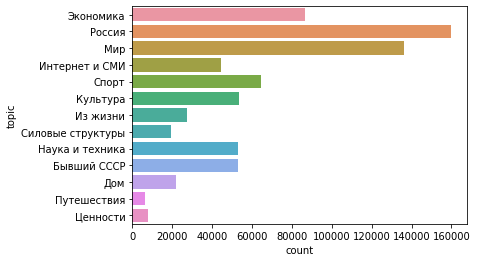

In [4]:
print(data["topic"].value_counts() / len(data.topic))
sns.countplot(y = data["topic"])

In [4]:
data.describe()

,text,topic
count,734121,734121
unique,734121,13
top,"Только 30 процентов граждан России считают, чт...",Россия
freq,1,159889


Поиск пропущенных значений

In [8]:
data.isnull().sum()

text     0
topic    0
dtype: int64

### Удаление HTML-тегов

In [11]:
data['text'].apply(lambda t: if re.search('<[^<]+>', t) != None print(re.search('<[^<]+>', t)))

SyntaxError: invalid syntax (<ipython-input-11-ebb7d827ce4a>, line 1)

In [16]:
for index, item in data.iterrows():
    r=re.search('<[^<]+>', item.text)
    if r != None:
        print(index)
        print(r)

4423
<regex.Match object; span=(329, 332), match='<р>'>
4487
<regex.Match object; span=(395, 398), match='<р>'>
4501
<regex.Match object; span=(373, 376), match='<р>'>
50221
<regex.Match object; span=(868, 946), match='<нетривиальный и высококвалифицированный взгляд на спорт, искусство, политику>'>
51006
<regex.Match object; span=(1564, 1569), match='<ПСБ>'>
54199
<regex.Match object; span=(953, 991), match='<во время проведения подобных авиашоу>'>
97415
<regex.Match object; span=(2548, 2563), match='<домашней соты>'>
101934
<regex.Match object; span=(991, 994), match='<р>'>
114780
<regex.Match object; span=(1275, 1280), match='<...>'>
115613
<regex.Match object; span=(1895, 1900), match='<...>'>
121025
<regex.Match object; span=(1787, 1792), match='<...>'>
130217
<regex.Match object; span=(933, 937), match='<\np>'>


TypeError: expected string or buffer

In [17]:
for index, item in data.iterrows():
    if index== 130217:
        print(item)

url              https://lenta.ru/news/2005/09/13/estonia/
title    Президент Эстонии обвинил власти республики в ...
text     Осенняя сессия эстонского парламента началась ...
topic                                          Бывший СССР
tags                                                   Все
date                                            2005/09/13
Name: 130217, dtype: object


### Удаление ссылок

In [12]:
pattern=r'(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'
data['text'] = data['text'].map(lambda t: re.sub(pattern, ' ', t, re.IGNORECASE))

Удаление последовательностей с обратным слешем

In [14]:
data['text'] = data['text'].map(lambda t: re.sub(r'\\+[0-9a-z]+',' ', t))

### Перевод текстов в нижний регистр

In [16]:
data['text'] = data['text'].map(lambda t: str.lower(t))

In [18]:
data=data.drop_duplicates()

In [19]:
data.describe()

,text,topic
count,734120,734120
unique,734120,13
top,"руководство филиппинской полиции признало, что...",Россия
freq,1,159888


In [46]:
data.to_csv('news_734120.csv', index=False)

### Разделение данных пополам

In [2]:
data = pd.read_csv('news_734120.csv')

Россия               0.217795
Мир                  0.185506
Экономика            0.118218
Спорт                0.087700
Культура             0.073194
Бывший СССР          0.071934
Наука и техника      0.071862
Интернет и СМИ       0.060733
Из жизни             0.037533
Дом                  0.029531
Силовые структуры    0.026688
Ценности             0.010579
Путешествия          0.008729
Name: topic, dtype: float64


<AxesSubplot:xlabel='count', ylabel='topic'>

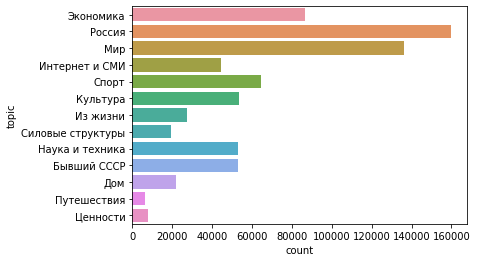

In [4]:
print(data["topic"].value_counts() / len(data.topic))
sns.countplot(y = data["topic"])

In [5]:
first_split = data.sample(frac=0.5,random_state=200)
first_split.reset_index(drop=True, inplace=True)

Россия               0.218163
Мир                  0.184515
Экономика            0.118343
Спорт                0.087476
Культура             0.073914
Наука и техника      0.071999
Бывший СССР          0.071574
Интернет и СМИ       0.061151
Из жизни             0.037528
Дом                  0.029325
Силовые структуры    0.026579
Ценности             0.010712
Путешествия          0.008721
Name: topic, dtype: float64


<AxesSubplot:xlabel='count', ylabel='topic'>

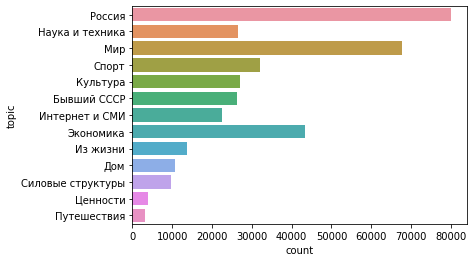

In [7]:
print(first_split["topic"].value_counts() / len(first_split.topic))
sns.countplot(y = first_split["topic"])

In [6]:
first_split.to_csv('news_367060.csv', index=False)

## Токенизация Natasha Razdel

In [8]:
data = pd.read_csv('news_367060.csv')

In [4]:
def razdelTokenization():
    global data
    punct = list(string.punctuation)
    punct.append('«')
    punct.append('»')
    punct.append('—')
    list_of_rows=[]
    for text in data['text']:
        tokens = rd.tokenize(text)
        str_tokens=[]
        for token in tokens:
            if token.text not in punct:
                str_tokens.append(token.text)
        list_of_rows.append(str_tokens)
    data=data.assign(tokens=list_of_rows)

In [10]:
razdelTokenization()

In [5]:
#все данные
razdelTokenization()

In [7]:
data.to_csv('tokens_all_data.csv', index=False)

In [6]:
data.to_csv('news_with_tokens_rd.csv', index=False)

## Токенизация NLTK

In [11]:
data = pd.read_csv('news_367060.csv')

In [14]:
def nltkTokenization():
    global data
    data = data.assign(tokens=data.apply(lambda row: [word for word in word_tokenize(row.text) 
                                       if ((word.isalpha())|(word.isdecimal()))], axis=1))

In [22]:
s='полеты истребителей су-27 приостановлены из-за аварии.'

In [23]:
word_tokenize(s)

['полеты', 'истребителей', 'су-27', 'приостановлены', 'из-за', 'аварии', '.']

In [15]:
nltkTokenization()

In [4]:
data.to_csv('news_with_tokens_nltk.csv', index=False)

## Лемматизация

In [18]:
data = pd.read_csv('news_with_tokens_nltk.csv')

In [21]:
data

,text,topic,tokens
0,в кремле «крайне негативно» оценивают законопр...,Россия,"['в', 'кремле', 'крайне', 'негативно', 'оценив..."
1,первый сотовый телефон на платформе android бу...,Наука и техника,"['первый', 'сотовый', 'телефон', 'на', 'платфо..."
2,в понедельник в 22 часа по московскому времени...,Наука и техника,"['в', 'понедельник', 'в', '22', 'часа', 'по', ..."
3,конституционный суд испании в четверг заблокир...,Мир,"['конституционный', 'суд', 'испании', 'в', 'че..."
4,министерство обороны болгарии обнародовало про...,Наука и техника,"['министерство', 'обороны', 'болгарии', 'обнар..."
...,...,...,...
367055,покупка жилья недоступна для большинства гражд...,Дом,"['покупка', 'жилья', 'недоступна', 'для', 'бол..."
367056,министр иностранных дел россии сергей лавров з...,Бывший СССР,"['министр', 'иностранных', 'дел', 'россии', 'с..."
367057,нападающий «барселоны» и сборной бразилии нейм...,Спорт,"['нападающий', 'барселоны', 'и', 'сборной', 'б..."
367058,в ростове-на-дону убита семья из четырех челов...,Россия,"['в', 'убита', 'семья', 'из', 'четырех', 'чело..."


In [5]:
header = ['tokens', 'topic']
data.to_csv('news_onlytokens_nltk.csv', columns=header, index=False)

In [8]:
data = pd.read_csv('tokens_all_data.csv')

In [9]:
header = ['tokens', 'topic']
data.to_csv('only_tokens_all_data.csv', columns=header, index=False)

Лемматизация для Razdel

In [31]:
data = pd.read_csv('news_onlytokens_rd.csv', converters={'tokens':ast.literal_eval})

In [2]:
data = pd.read_csv('only_tokens_all_data.csv', converters={'tokens':ast.literal_eval})

In [3]:
def lemmatization():
    global data
    ru_stopwords = stopwords.words('russian')
    morph = pymorphy2.MorphAnalyzer()
    data=data.assign(tokens=data['tokens'].apply(lambda row: [morph.parse(token)[0].normal_form for token in row 
                                                              if token not in ru_stopwords]))

In [ ]:
lemmatization()

In [4]:
lemmatization()

In [5]:
data.to_csv('news_all_norm_tokens_rd.csv', index=False)

In [7]:
data.to_csv('news_norm_tokens_rd.csv', index=False)

Лемматизация для NLTK

In [ ]:
data = pd.read_csv('news_onlytokens_nltk.csv', converters={'tokens':ast.literal_eval})

In [6]:
lemmatization()

9733.404405355453 seconds ---


Удаление стоп-слов

In [5]:
ru_stopwords = stopwords.words('russian')
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if token not in ru_stopwords]))

In [6]:
data.to_csv('news_norm_tokens_rd.csv', index=False)

## Стемминг

In [7]:
data = pd.read_csv('only_tokens_all_data.csv', converters={'tokens':ast.literal_eval})

Стемминг для NLTK

In [4]:
data = pd.read_csv('news_onlytokens_nltk.csv', converters={'tokens':ast.literal_eval})

In [9]:
def stemmingSnowball():
    global data
    ru_stopwords = stopwords.words('russian')
    stemmer = SnowballStemmer('russian')
    data=data.assign(tokens=data['tokens'].apply(lambda row: [stemmer.stem(token) for token in row if token not in ru_stopwords]))

In [ ]:
stemmingSnowball()

In [29]:
data.to_csv('news_stem_tokens_nltk', index=False)

Стемминг для Razdel

In [2]:
data = pd.read_csv('news_onlytokens_rd.csv', converters={'tokens':ast.literal_eval})

In [4]:
stemmingSnowball()

1580.8387258052826 seconds


In [22]:
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if re.match('[a-zа-я]+-?[a-zа-я]+', token)]))

In [23]:
data.to_csv('news_all_norm_tokens_rd.csv', index=False)

In [ ]:
data.to_csv('news_all_norm_tokens_rd.csv', index=False)

## Униграммы - векторизация и обучение

In [11]:
def dummy_fun(doc):
    return doc

def tfidf_unigram():
    global tfidf, lbl, topics, unique_topics, X_train, X_test, Y_train, Y_test, vectors_tfidf, vectors_tfidf_test
    tfidf = TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df=100,
            max_df=0.75, 
            preprocessor=dummy_fun, 
            token_pattern=None)
    lbl = LabelEncoder()
    topics = lbl.fit_transform(data.topic.values)
    unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
    X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
    vectors_tfidf = tfidf.fit_transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)

Label fitting
TF-IDF fitting
TruncatedSVD fitting


TruncatedSVD(n_components=2000)

### Razdel + лемматизация

#### Подготовка

In [2]:
data = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [ ]:
def resultsToFiles_r_l():
    global tfidf, lbl, topics, unique_topics, X_train, X_test, Y_train, Y_test, vectors_tfidf, vectors_tfidf_test
    vectors_tfidf = tfidf.transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)
    svd_train=tsvd.transform(vectors_tfidf)
    svd_test=tsvd.transform(vectors_tfidf_test)

    topics.tofile('topics')
    Y_test.tofile('y_test')
    Y_train.tofile('y_train')

    pickle.dump(tsvd, open("tsvd200.pkl", 'wb'))
    pickle.dump(lbl, open("lbl.pkl", 'wb'))
    pickle.dump(tfidf, open("tfidf_100_0-75.pkl", 'wb'))

    np.save('svd_test.npy', svd_test)
    np.save('svd_train.npy', svd_train)

    sparse.save_npz("tfidf100_0-75_train.npz", vectors_tfidf)
    sparse.save_npz("tfidf100_0-75_test.npz", vectors_tfidf_test)

In [4]:
def resultsFromFiles_r_l():
    global tfidf, lbl, topics, unique_topics, X_train, X_test, Y_train, Y_test, vectors_tfidf, vectors_tfidf_test
    Y_train=np.fromfile('y_train',  dtype = np.int)
    Y_test=np.fromfile('y_test',  dtype = np.int)
    topics=np.fromfile('topics',  dtype = np.int)

    vectors_tfidf = sparse.load_npz("tfidf100_0-75_train.npz")
    vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test.npz")

    #svd_model = pickle.load(open("tsvd200.pkl", 'rb'))
#     svd_test = np.load('svd_test.npy')
#     svd_train = np.load('svd_train.npy')

    #tfidf100075 = pickle.load(open("tfidf_100_0-75.pkl", 'rb'))
    class_label = pickle.load(open("lbl.pkl", 'rb'))

    unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

In [5]:
resultsFromFiles_r_l()

#### Подбор для TF-IDF

In [3]:
def tfidf_difference(maxdf):    
    tfidf = TfidfVectorizer(
        analyzer='word',
        tokenizer=dummy_fun,
        #min_df=mindf,
        max_df=maxdf, 
        preprocessor=dummy_fun, 
        token_pattern=None)
    print(maxdf)
    lbl = LabelEncoder()
    topics = lbl.fit_transform(data.topic.values)
    unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
    X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
    vectors_tfidf = tfidf.fit_transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)
    print(vectors_tfidf.shape)
    print(vectors_tfidf_test.shape)
    modelNB = MultinomialNB()
    modelNB.fit(vectors_tfidf, Y_train)
    predictionsictions = modelNB.predictionsict(vectors_tfidf_test)
    print(metrics.accuracy_score(Y_test, predictionsictions))
    print(metrics.matthews_corrcoef(Y_test, predictionsictions))
    print('\nClassification Report\n')
    print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

In [6]:
max_df_list=[0.9, 0.85, 0.75, 0.7]
min_df_list=[0.01, 0.05, 10, 50, 100]
for i in max_df_list:
    for j in min_df_list:
        tfidf_difference(j, i)

0.01 0.9
(293648, 1835)
(73412, 1835)
0.7368550100800959
0.696676073493059

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.74      0.54      0.62      5254
              Дом       0.83      0.67      0.74      2153
         Из жизни       0.54      0.43      0.48      2755
   Интернет и СМИ       0.69      0.53      0.60      4489
         Культура       0.79      0.81      0.80      5426
              Мир       0.73      0.79      0.76     13546
  Наука и техника       0.75      0.80      0.77      5286
      Путешествия       0.69      0.35      0.47       640
           Россия       0.66      0.79      0.72     16016
Силовые структуры       0.55      0.06      0.12      1951
            Спорт       0.96      0.92      0.94      6422
         Ценности       0.92      0.70      0.80       786
        Экономика       0.76      0.86      0.81      8688

         accuracy                           0.74     73412
        macro 

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 63150)
(73412, 63150)
0.7829918814362774
0.7499317773187366

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.72      0.76      5254
              Дом       0.90      0.60      0.72      2153
         Из жизни       0.68      0.44      0.53      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.85      0.82      5286
      Путешествия       0.96      0.07      0.13       640
           Россия       0.71      0.83      0.77     16016
Силовые структуры       0.72      0.07      0.13      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.97      0.60      0.74       786
        Экономика       0.80      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 63150)
(73412, 63150)
0.7829918814362774
0.7499317773187366

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.72      0.76      5254
              Дом       0.90      0.60      0.72      2153
         Из жизни       0.68      0.44      0.53      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.85      0.82      5286
      Путешествия       0.96      0.07      0.13       640
           Россия       0.71      0.83      0.77     16016
Силовые структуры       0.72      0.07      0.13      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.97      0.60      0.74       786
        Экономика       0.80      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 63150)
(73412, 63150)
0.7829918814362774
0.7499317773187366

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.72      0.76      5254
              Дом       0.90      0.60      0.72      2153
         Из жизни       0.68      0.44      0.53      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.85      0.82      5286
      Путешествия       0.96      0.07      0.13       640
           Россия       0.71      0.83      0.77     16016
Силовые структуры       0.72      0.07      0.13      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.97      0.60      0.74       786
        Экономика       0.80      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 63150)
(73412, 63150)
0.7829918814362774
0.7499317773187366

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.72      0.76      5254
              Дом       0.90      0.60      0.72      2153
         Из жизни       0.68      0.44      0.53      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.85      0.82      5286
      Путешествия       0.96      0.07      0.13       640
           Россия       0.71      0.83      0.77     16016
Силовые структуры       0.72      0.07      0.13      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.97      0.60      0.74       786
        Экономика       0.80      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

#### Модели

Наивный байесовский классификатор max_df=0.75, min_df=100

In [4]:
modelNB = MultinomialNB()
modelNB.fit(vectors_tfidf, Y_train)
predictionsictions = modelNB.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictionsictions))
print(metrics.f1_score(Y_test, predictionsictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictionsictions))

0.7879501988775677
0.7821770488008609
0.7565125478768728


In [43]:
from sklearn.preprocessing import label_binarize

unique_num_topics=np.unique(topics).tolist()
ytest = label_binarize(Y_test, classes=unique_num_topics)
ypredictionss = label_binarize(predictionsictions, classes=unique_num_topics)
macro_roc_auc_ovo = roc_auc_score(ytest, ypredictionss, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(ytest, ypredictionss, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(ytest, ypredictionss, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(ytest, ypredictionss, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.845321 (macro),
0.876794 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.845321 (macro),
0.876794 (weighted by prevalence)


In [30]:
print('\nClassification Report\n')
print(classification_report(Y_test, predictionsictions, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.75      0.76      5254
              Дом       0.81      0.74      0.77      2153
         Из жизни       0.56      0.60      0.58      2755
   Интернет и СМИ       0.74      0.62      0.68      4489
         Культура       0.83      0.87      0.85      5426
              Мир       0.78      0.82      0.80     13546
  Наука и техника       0.80      0.84      0.82      5286
      Путешествия       0.79      0.44      0.56       640
           Россия       0.75      0.79      0.77     16016
Силовые структуры       0.54      0.17      0.26      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.87      0.75      0.81       786
        Экономика       0.82      0.88      0.85      8688

         accuracy                           0.79     73412
        macro avg       0.77      0.71      0.73     73412
     weighted avg       0.78  

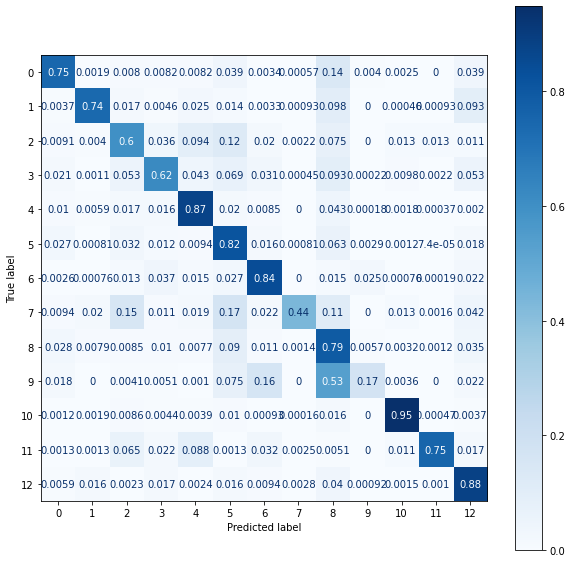

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator = modelNB, X=vectors_tfidf_test, y_true=Y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [9]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
predictions_test_full =0
cv_score =[]
i=1
tok=data.tokens.values
mnb = MultinomialNB()

for train_index, test_index in kf.split(tok, topics):
    print('{} of KFold {}'.format(i, kf.n_splits))
    xtr, xvl = tok.take(train_index),  tok.take(test_index)
    Y_train, Y_test = topics.take(train_index), topics.take(test_index)
    
    vectors_tfidf = tfidf.fit_transform(xtr)
    vectors_tfidf_test = tfidf.transform(xvl)
    
    mnb = MultinomialNB()
    mnb.fit(vectors_tfidf, Y_train)
    predictions= mnb.predictionsict(vectors_tfidf_test)
    score = metrics.matthews_corrcoef(Y_test, predictions)
    print('Matthews score:', score)

1 of KFold 5
Matthews score: 0.7568432826434879
1 of KFold 5
Matthews score: 0.7577864526571677
1 of KFold 5
Matthews score: 0.7545678224619744
1 of KFold 5
Matthews score: 0.7576322702315261
1 of KFold 5
Matthews score: 0.7587573669888945


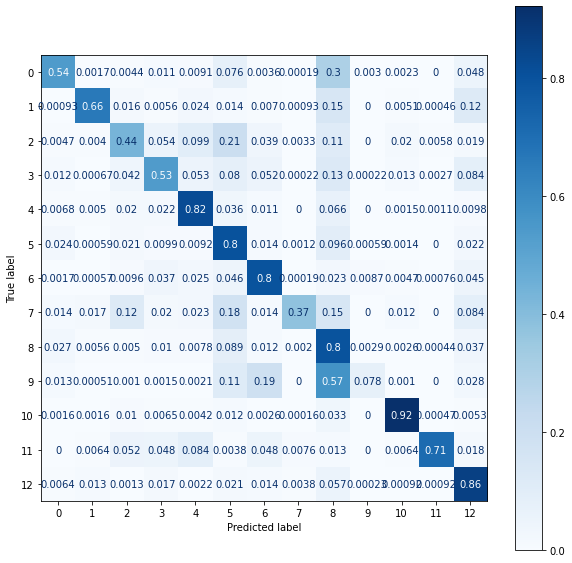

In [147]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator = mnb, X=vectors_tfidf_test, y_true=Y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

Логистическая регрессия без SVD

In [9]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
modelLR.fit(vectors_tfidf, Y_train)
predictions_lg = modelLR.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.5min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.7min remaining:   18.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.9min finished


0.8388819266604914
0.8395847593185719
0.8164133543662292


In [5]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
modelLR.fit(vectors_tfidf, Y_train)
predictions_lg = modelLR.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.1min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.2min remaining:   12.8s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.3min finished


0.8353130278428594
0.8364066696442561
0.8130083025662818


In [9]:
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.89      0.85      5254
              Дом       0.82      0.87      0.84      2153
         Из жизни       0.58      0.72      0.64      2755
   Интернет и СМИ       0.76      0.78      0.77      4489
         Культура       0.88      0.91      0.89      5426
              Мир       0.85      0.81      0.83     13546
  Наука и техника       0.84      0.87      0.86      5286
      Путешествия       0.65      0.80      0.72       640
           Россия       0.87      0.78      0.82     16016
Силовые структуры       0.59      0.68      0.63      1951
            Спорт       0.96      0.97      0.96      6422
         Ценности       0.86      0.86      0.86       786
        Экономика       0.88      0.87      0.88      8688

         accuracy                           0.84     73412
        macro avg       0.79      0.83      0.81     73412
     weighted avg       0.84      0.84      0.84     7

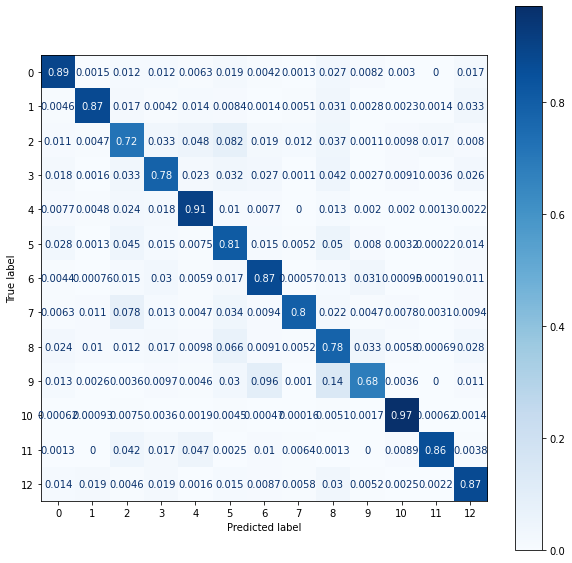

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator = modelLR, X=vectors_tfidf_test, y_true=Y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

----

#### SVD

Наинвый Байес с SVD

In [10]:
def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    n_components = 0
    for explained_variance in var_ratio:
        total_variance += explained_variance
        print(total_variance)
        n_components += 1
        if total_variance >= goal_var:
            break
    return n_components

In [6]:
modelNB = GaussianNB()
modelNB.fit(svd_train, Y_train)
predictions= modelNB.predictionsict(svd_test)

In [10]:
print(metrics.accuracy_score(Y_test, predictions))
print(metrics.matthews_corrcoef(Y_test, predictions))
print(metrics.f1_score(Y_test, predictions, average='weighted'))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions, target_names=unique_topics))

0.6211654770337275
0.5818447475672556
0.6467862739943432

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.66      0.63      0.64      5254
              Дом       0.75      0.68      0.72      2153
         Из жизни       0.18      0.75      0.29      2755
   Интернет и СМИ       0.50      0.55      0.52      4489
         Культура       0.85      0.69      0.76      5426
              Мир       0.74      0.54      0.62     13546
  Наука и техника       0.80      0.60      0.68      5286
      Путешествия       0.31      0.67      0.43       640
           Россия       0.68      0.55      0.61     16016
Силовые структуры       0.31      0.52      0.39      1951
            Спорт       0.96      0.88      0.92      6422
         Ценности       0.75      0.75      0.75       786
        Экономика       0.73      0.65      0.69      8688

         accuracy                           0.62     73412
        macro avg       0.63    

Логистическая регрессия с SVD 200 компонент

In [8]:
lg_svd = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg_svd.fit(svd_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.3min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.7min remaining:   50.7s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.4min finished


LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [9]:
predictions_lg = lg_svd.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.771617719173977
0.7756056133385214
0.7426876687670763
                   precision    recall  f1-score   support

      Бывший СССР       0.74      0.82      0.77      5254
              Дом       0.69      0.83      0.76      2153
         Из жизни       0.46      0.66      0.54      2755
   Интернет и СМИ       0.69      0.71      0.70      4489
         Культура       0.84      0.87      0.86      5426
              Мир       0.82      0.74      0.78     13546
  Наука и техника       0.80      0.82      0.81      5286
      Путешествия       0.39      0.79      0.52       640
           Россия       0.83      0.68      0.75     16016
Силовые структуры       0.41      0.56      0.48      1951
            Спорт       0.95      0.96      0.95      6422
         Ценности       0.66      0.85      0.74       786
        Экономика       0.84      0.83      0.83      8688

         accuracy                           0.77     73412
        macro avg       0.70      0.78      0.73     7341

### NLTK + лемматизация

#### Подготовка

In [4]:
data = pd.read_csv('news_norm_tokens_nltk.csv', converters={'tokens':ast.literal_eval})

подготовка

In [9]:
data = data.drop('axix', axis=1)

In [5]:
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if re.match('[a-zа-я]+-?[a-zа-я]+', token)]))

In [3]:
vectors_tfidf_test stopwords.words('russian')
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if token not in ru_stopwords]))

In [10]:
data.to_csv('news_norm_tokens_nltk.csv', index=False)

---------

In [6]:
def dummy_fun(doc):
    return doc


print('Label fitting')
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
print('TF-IDF fitting')
tfidf = TfidfVectorizer(
            analyzer='word',
            min_df= 100,
            max_df=0.75,
            tokenizer=dummy_fun,
            preprocessor=dummy_fun, 
            token_pattern=None)
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
tfidf.fit(X_train)
vectors_tfidf = tfidf.transform(X_train)
print('TruncatedSVD fitting')
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(vectors_tfidf)

Label fitting
TF-IDF fitting
TruncatedSVD fitting


TruncatedSVD(n_components=2000)

Запись моделей и данных в файлы

In [7]:
#vectors_tfidf = tfidf.transform(X_train)
vectors_tfidf_test = tfidf.transform(X_test)
svd_train=tsvd.transform(vectors_tfidf)
svd_test=tsvd.transform(vectors_tfidf_test)

topics.tofile('topics_l_n')
Y_test.tofile('y_test_l_n')
Y_train.tofile('y_train_l_n')

pickle.dump(tsvd, open("tsvd200_l_n.pkl", 'wb'))
pickle.dump(lbl, open("lbl_l_n.pkl", 'wb'))
pickle.dump(tfidf, open("tfidf_100_0-75_l_n.pkl", 'wb'))

np.save('svd_test_l_n.npy', svd_test)
np.save('svd_train_l_n.npy', svd_train)
svd_tr = sparse.csr_matrix(svd_train)
svd_ts = sparse.csr_matrix(svd_test)
sparse.save_npz("svd_tr_l_n.npz", svd_tr)
sparse.save_npz("svd_ts_l_n.npz", svd_ts)

sparse.save_npz("tfidf100_0-75_train_l_n.npz", vectors_tfidf)
sparse.save_npz("tfidf100_0-75_test_l_n.npz", vectors_tfidf_test)

Чтение из файлов

In [10]:
Y_train=np.fromfile('y_train_l_n',  dtype = np.int)
Y_test=np.fromfile('y_test_l_n',  dtype = np.int)
topics=np.fromfile('topics_l_n',  dtype = np.int)

vectors_tfidf = sparse.load_npz("tfidf100_0-75_train_l_n.npz")
vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test_l_n.npz")

# svd_model = pickle.load(open("tsvd200_l_n.pkl", 'rb'))
svd_test = np.load('svd_test_l_n.npy')
svd_train = np.load('svd_train_l_n.npy')

#tfidf100075 = pickle.load(open("tfidf_100_0-75_l_n.pkl", 'rb'))
class_label = pickle.load(open("lbl_l_n.pkl", 'rb'))

unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

#### Подбор TF-IDF

In [5]:
def dummy_fun(doc):
    return doc

def tfidf_difference(mindf, maxdf):    
    tfidf = TfidfVectorizer(
        analyzer='word',
        tokenizer=dummy_fun,
        min_df=mindf,
        max_df=maxdf, 
        preprocessor=dummy_fun, 
        token_pattern=None)
    print(mindf)
    print(maxdf)
    lbl = LabelEncoder()
    topics = lbl.fit_transform(data.topic.values)
    unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
    X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=50, shuffle=True)
    vectors_tfidf = tfidf.fit_transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)
    print(vectors_tfidf.shape)
    print(vectors_tfidf_test.shape)
    modelNB = MultinomialNB()
    modelNB.fit(vectors_tfidf, Y_train)
    predictionsictions = modelNB.predictionsict(vectors_tfidf_test)
    print(metrics.accuracy_score(Y_test, predictionsictions))
    print(metrics.matthews_corrcoef(Y_test, predictionsictions))
    print('\nClassification Report\n')
    print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

In [6]:
max_df_list=[0.9, 0.85, 0.75, 0.7]
min_df_list=[0.01, 0.05, 10, 50, 100]
for i in max_df_list:
    for j in min_df_list:
        tfidf_difference(j, i)

0.01
0.9
(293648, 1810)
(73412, 1810)
0.7380809676892062
0.6981224440232291

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.73      0.54      0.62      5254
              Дом       0.81      0.66      0.73      2153
         Из жизни       0.58      0.43      0.50      2755
   Интернет и СМИ       0.69      0.54      0.61      4489
         Культура       0.80      0.82      0.81      5426
              Мир       0.73      0.79      0.76     13546
  Наука и техника       0.75      0.80      0.77      5286
      Путешествия       0.68      0.38      0.48       640
           Россия       0.66      0.78      0.72     16016
Силовые структуры       0.55      0.07      0.12      1951
            Спорт       0.96      0.92      0.94      6422
         Ценности       0.92      0.71      0.80       786
        Экономика       0.76      0.86      0.81      8688

         accuracy                           0.74     73412
        macro

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 59120)
(73412, 59120)
0.7793140086089467
0.745692370394336

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.70      0.74      5254
              Дом       0.88      0.60      0.71      2153
         Из жизни       0.68      0.45      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.88      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.81      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.06      0.12      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.64      0.77       786
        Экономика       0.79      0.90      0.84      8688

         accuracy                           0.78     73412
        macro avg    

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 59120)
(73412, 59120)
0.7793140086089467
0.745692370394336

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.70      0.74      5254
              Дом       0.88      0.60      0.71      2153
         Из жизни       0.68      0.45      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.88      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.81      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.06      0.12      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.64      0.77       786
        Экономика       0.79      0.90      0.84      8688

         accuracy                           0.78     73412
        macro avg    

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 59120)
(73412, 59120)
0.7793140086089467
0.745692370394336

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.70      0.74      5254
              Дом       0.88      0.60      0.71      2153
         Из жизни       0.68      0.45      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.88      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.81      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.06      0.12      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.64      0.77       786
        Экономика       0.79      0.90      0.84      8688

         accuracy                           0.78     73412
        macro avg    

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 59120)
(73412, 59120)
0.7793140086089467
0.745692370394336

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.70      0.74      5254
              Дом       0.88      0.60      0.71      2153
         Из жизни       0.68      0.45      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.88      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.81      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.06      0.12      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.64      0.77       786
        Экономика       0.79      0.90      0.84      8688

         accuracy                           0.78     73412
        macro avg    

#### Модели без SVD

Наивный байес 100 0.75 без SVD

In [3]:
model = MultinomialNB()
model.fit(vectors_tfidf, Y_train)
predictionsictions = model.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictionsictions))
print(metrics.f1_score(Y_test, predictionsictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictionsictions))
print('\nClassification Report\n')
print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

0.7856753664251076
0.7795816263134643
0.7538625381967192

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.73      0.75      5254
              Дом       0.81      0.74      0.77      2153
         Из жизни       0.56      0.60      0.58      2755
   Интернет и СМИ       0.73      0.61      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.78      0.82      0.80     13546
  Наука и техника       0.80      0.84      0.82      5286
      Путешествия       0.79      0.44      0.57       640
           Россия       0.74      0.79      0.76     16016
Силовые структуры       0.56      0.16      0.25      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.88      0.75      0.81       786
        Экономика       0.81      0.89      0.85      8688

         accuracy                           0.79     73412
        macro avg       0.77    

Логистическая регрессия без SVD

In [12]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10,n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.3min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.6min remaining:   17.8s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.9min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [13]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.8360894676619626
0.8369035678085006
0.8132794599537618

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.82      0.88      0.85      5254
              Дом       0.84      0.87      0.85      2153
         Из жизни       0.58      0.68      0.63      2755
   Интернет и СМИ       0.76      0.78      0.77      4489
         Культура       0.89      0.90      0.89      5426
              Мир       0.83      0.82      0.83     13546
  Наука и техника       0.85      0.87      0.86      5286
      Путешествия       0.76      0.78      0.77       640
           Россия       0.85      0.79      0.82     16016
Силовые структуры       0.60      0.67      0.64      1951
            Спорт       0.97      0.97      0.97      6422
         Ценности       0.92      0.86      0.89       786
        Экономика       0.88      0.88      0.88      8688

         accuracy                           0.84     73412
        macro avg       0.81    

In [4]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.0min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.1min remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.3min finished


LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [5]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.8326704081076663
0.8338318709340975
0.8100425606232545

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.88      0.84      5254
              Дом       0.82      0.87      0.84      2153
         Из жизни       0.58      0.72      0.64      2755
   Интернет и СМИ       0.76      0.77      0.77      4489
         Культура       0.88      0.91      0.89      5426
              Мир       0.85      0.81      0.83     13546
  Наука и техника       0.84      0.87      0.85      5286
      Путешествия       0.65      0.80      0.72       640
           Россия       0.87      0.77      0.82     16016
Силовые структуры       0.57      0.68      0.62      1951
            Спорт       0.96      0.97      0.96      6422
         Ценности       0.86      0.85      0.86       786
        Экономика       0.88      0.87      0.87      8688

         accuracy                           0.83     73412
        macro avg       0.79    

#### Модели с SVD

Наивный байес с SVD 200 компонент

In [7]:
modelNB = GaussianNB()
modelNB.fit(svd_train, Y_train)
modelNB_predictions = modelNB.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, modelNB_predictions))
print(metrics.f1_score(Y_test, modelNB_predictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, modelNB_predictions))
print('\nClassification Report\n')
print(classification_report(Y_test, modelNB_predictions, target_names=unique_topics))

0.6191767013567264
0.6453423745525189
0.5796781667323578

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.65      0.63      0.64      5254
              Дом       0.77      0.68      0.72      2153
         Из жизни       0.18      0.75      0.29      2755
   Интернет и СМИ       0.52      0.55      0.53      4489
         Культура       0.84      0.70      0.76      5426
              Мир       0.74      0.53      0.62     13546
  Наука и техника       0.81      0.57      0.67      5286
      Путешествия       0.32      0.67      0.43       640
           Россия       0.68      0.55      0.61     16016
Силовые структуры       0.30      0.52      0.38      1951
            Спорт       0.96      0.88      0.92      6422
         Ценности       0.72      0.75      0.73       786
        Экономика       0.74      0.66      0.69      8688

         accuracy                           0.62     73412
        macro avg       0.63    

In [8]:
lg_svd = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg_svd.fit(svd_train, Y_train)
predictions_lg = lg_svd.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.4min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.5min remaining:   48.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.3min finished


0.768294011878167
0.7724968884044635
0.7390713524502137
                   precision    recall  f1-score   support

      Бывший СССР       0.74      0.81      0.77      5254
              Дом       0.70      0.84      0.76      2153
         Из жизни       0.45      0.66      0.54      2755
   Интернет и СМИ       0.69      0.70      0.70      4489
         Культура       0.84      0.87      0.86      5426
              Мир       0.81      0.73      0.77     13546
  Наука и техника       0.80      0.82      0.81      5286
      Путешествия       0.38      0.80      0.51       640
           Россия       0.83      0.67      0.74     16016
Силовые структуры       0.39      0.55      0.46      1951
            Спорт       0.95      0.96      0.95      6422
         Ценности       0.65      0.84      0.73       786
        Экономика       0.84      0.82      0.83      8688

         accuracy                           0.77     73412
        macro avg       0.70      0.78      0.73     7341

### NLTK+стемминг

#### Подготовка

In [ ]:
data = pd.read_csv('news_stem_tokens_nltk.csv', converters={'tokens':ast.literal_eval})

In [3]:
data = data.drop('axix', axis=1)

удаление стоп-слов

In [9]:
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if re.match('[a-zа-я]+-?[a-zа-я]+', token)]))
ru_stopwords = stopwords.words('russian')
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if token not in ru_stopwords]))

In [4]:
data.to_csv('news_stem_tokens_nltk.csv', index=False)

----

In [12]:
def dummy_fun(doc):
    return doc


print('Label fitting')
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
print('TF-IDF fitting')
tfidf = TfidfVectorizer(
            analyzer='word',
            min_df= 100,
            max_df=0.75,
            tokenizer=dummy_fun,
            preprocessor=dummy_fun, 
            token_pattern=None)
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
tfidf.fit(X_train)
vectors_tfidf = tfidf.transform(X_train)
print('TruncatedSVD fitting')
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(vectors_tfidf)

Label fitting
TF-IDF fitting
TruncatedSVD fitting


TruncatedSVD(n_components=2000)

Запись моделей и данных в файлы

In [13]:
#vectors_tfidf = tfidf.transform(X_train)
vectors_tfidf_test = tfidf.transform(X_test)
svd_train=tsvd.transform(vectors_tfidf)
svd_test=tsvd.transform(vectors_tfidf_test)

topics.tofile('topics_s_n')
Y_test.tofile('y_test_s_n')
Y_train.tofile('y_train_s_n')

pickle.dump(tsvd, open("tsvd200_s_n.pkl", 'wb'))
pickle.dump(lbl, open("lbl_s_n.pkl", 'wb'))
pickle.dump(tfidf, open("tfidf_100_0-75_s_n.pkl", 'wb'))

np.save('svd_test_s_n.npy', svd_test)
np.save('svd_train_s_n.npy', svd_train)
svd_tr = sparse.csr_matrix(svd_train)
svd_ts = sparse.csr_matrix(svd_test)
sparse.save_npz("svd_tr_s_n.npz", svd_tr)
sparse.save_npz("svd_ts_s_n.npz", svd_ts)

sparse.save_npz("tfidf100_0-75_train_s_n.npz", vectors_tfidf)
sparse.save_npz("tfidf100_0-75_test_s_n.npz", vectors_tfidf_test)

Чтение из файлов

In [14]:
Y_train=np.fromfile('y_train_s_n',  dtype = np.int)
Y_test=np.fromfile('y_test_s_n',  dtype = np.int)
topics=np.fromfile('topics_s_n',  dtype = np.int)

vectors_tfidf = sparse.load_npz("tfidf100_0-75_train_s_n.npz")
vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test_s_n.npz")

# svd_model = pickle.load(open("tsvd200_s_n.pkl", 'rb'))
svd_test = np.load('svd_test_s_n.npy')
svd_train = np.load('svd_train_s_n.npy')

#tfidf100075 = pickle.load(open("tfidf_100_0-75_s_n.pkl", 'rb'))
class_label = pickle.load(open("lbl_s_n.pkl", 'rb'))

unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

#### Подбор для TF-IDF

Лучшее - 100 и 0.75

In [8]:
def dummy_fun(doc):
    return doc

def tfidf_difference(mindf, maxdf):    
    tfidf = TfidfVectorizer(
        analyzer='word',
        tokenizer=dummy_fun,
        min_df=mindf,
        max_df=maxdf, 
        preprocessor=dummy_fun, 
        token_pattern=None)
    print(mindf)
    print(maxdf)
    lbl = LabelEncoder()
    topics = lbl.fit_transform(data.topic.values)
    unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
    X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=50, shuffle=True)
    vectors_tfidf = tfidf.fit_transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)
    print(vectors_tfidf.shape)
    print(vectors_tfidf_test.shape)
    modelNB = MultinomialNB()
    modelNB.fit(vectors_tfidf, Y_train)
    predictionsictions = modelNB.predictionsict(vectors_tfidf_test)
    print(metrics.accuracy_score(Y_test, predictionsictions))
    print(metrics.matthews_corrcoef(Y_test, predictionsictions))
    print('\nClassification Report\n')
    print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

In [ ]:
max_df_list=[0.9, 0.85, 0.75, 0.7]
min_df_list=[0.01, 0.05, 10, 50, 100]
for i in max_df_list:
    for j in min_df_list:
        tfidf_difference(j, i)

---

#### Модели без SVD

Наивный байес 100 0.75 без SVD

In [4]:
model = MultinomialNB()
model.fit(vectors_tfidf, Y_train)
predictionsictions = model.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictionsictions))
print(metrics.f1_score(Y_test, predictionsictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictionsictions))
print('\nClassification Report\n')
print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

0.7852394703863128
0.7788716669986936
0.7533203760372221

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.73      0.75      5254
              Дом       0.81      0.74      0.77      2153
         Из жизни       0.56      0.59      0.57      2755
   Интернет и СМИ       0.73      0.61      0.67      4489
         Культура       0.82      0.88      0.85      5426
              Мир       0.78      0.82      0.80     13546
  Наука и техника       0.80      0.84      0.82      5286
      Путешествия       0.80      0.44      0.57       640
           Россия       0.74      0.79      0.77     16016
Силовые структуры       0.56      0.16      0.24      1951
            Спорт       0.96      0.95      0.96      6422
         Ценности       0.89      0.75      0.81       786
        Экономика       0.82      0.88      0.85      8688

         accuracy                           0.79     73412
        macro avg       0.77    

Логистическая регрессия без SVD

In [15]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr',C=10, n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.4min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.6min remaining:   17.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.9min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [16]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.8329973301367624
0.8338315770986501
0.8097755201687308

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.82      0.87      0.84      5254
              Дом       0.84      0.86      0.85      2153
         Из жизни       0.58      0.68      0.63      2755
   Интернет и СМИ       0.75      0.77      0.76      4489
         Культура       0.89      0.90      0.89      5426
              Мир       0.83      0.82      0.82     13546
  Наука и техника       0.84      0.86      0.85      5286
      Путешествия       0.74      0.78      0.76       640
           Россия       0.85      0.79      0.82     16016
Силовые структуры       0.59      0.65      0.62      1951
            Спорт       0.96      0.97      0.97      6422
         Ценности       0.91      0.86      0.88       786
        Экономика       0.88      0.87      0.87      8688

         accuracy                           0.83     73412
        macro avg       0.81    

In [5]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:   58.0s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.1min remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.3min finished


LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [6]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.8314035852449191
0.8324806739181386
0.8085850948784988

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.88      0.84      5254
              Дом       0.81      0.88      0.84      2153
         Из жизни       0.58      0.72      0.64      2755
   Интернет и СМИ       0.75      0.77      0.76      4489
         Культура       0.88      0.91      0.89      5426
              Мир       0.85      0.81      0.83     13546
  Наука и техника       0.84      0.87      0.85      5286
      Путешествия       0.64      0.80      0.71       640
           Россия       0.86      0.77      0.82     16016
Силовые структуры       0.57      0.66      0.61      1951
            Спорт       0.96      0.97      0.96      6422
         Ценности       0.86      0.85      0.86       786
        Экономика       0.87      0.87      0.87      8688

         accuracy                           0.83     73412
        macro avg       0.79    

#### Модели с SVD

Наивный байес с SVD

In [7]:
bnb = GaussianNB()
bnb.fit(svd_train, Y_train)
bnb_predictions = bnb.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, bnb_predictions))
print(metrics.f1_score(Y_test, bnb_predictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, bnb_predictions))
print('\nClassification Report\n')
print(classification_report(Y_test, bnb_predictions, target_names=unique_topics))

0.6210020160191794
0.64651639318134
0.5813821356884848

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.66      0.62      0.64      5254
              Дом       0.78      0.69      0.73      2153
         Из жизни       0.18      0.74      0.29      2755
   Интернет и СМИ       0.51      0.55      0.53      4489
         Культура       0.83      0.70      0.76      5426
              Мир       0.74      0.52      0.61     13546
  Наука и техника       0.80      0.59      0.68      5286
      Путешествия       0.31      0.66      0.42       640
           Россия       0.67      0.56      0.61     16016
Силовые структуры       0.32      0.52      0.39      1951
            Спорт       0.96      0.88      0.92      6422
         Ценности       0.77      0.73      0.75       786
        Экономика       0.75      0.66      0.70      8688

         accuracy                           0.62     73412
        macro avg       0.64      

Логистическая регрессия c SVD

In [8]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
modelLR.fit(svd_train, Y_train)
predictions_lg = modelLR.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.4min remaining:  9.9min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.6min remaining:   49.6s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.3min finished


0.7684847163951397
0.7724091585946288
0.7391706415165447

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.74      0.81      0.77      5254
              Дом       0.69      0.83      0.76      2153
         Из жизни       0.45      0.65      0.53      2755
   Интернет и СМИ       0.69      0.71      0.70      4489
         Культура       0.84      0.87      0.86      5426
              Мир       0.82      0.74      0.78     13546
  Наука и техника       0.79      0.82      0.81      5286
      Путешествия       0.38      0.80      0.52       640
           Россия       0.82      0.67      0.74     16016
Силовые структуры       0.40      0.54      0.46      1951
            Спорт       0.95      0.96      0.95      6422
         Ценности       0.64      0.83      0.72       786
        Экономика       0.84      0.82      0.83      8688

         accuracy                           0.77     73412
        macro avg       0.70    

### Razdel+стемминг

#### Подготовка

In [5]:
data = pd.read_csv('news_stem_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [3]:
data = data.drop('axix', axis=1)

удаление стоп-слов

In [4]:
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if re.match('[a-zа-я]+-?[a-zа-я]+', token)]))
ru_stopwords = stopwords.words('russian')
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if token not in ru_stopwords]))

In [5]:
data.to_csv('news_stem_tokens_rd.csv', index=False)

----

In [6]:
def dummy_fun(doc):
    return doc


print('Label fitting')
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
print('TF-IDF fitting')
tfidf = TfidfVectorizer(
            analyzer='word',
            min_df= 100,
            max_df=0.75,
            tokenizer=dummy_fun,
            preprocessor=dummy_fun, 
            token_pattern=None)
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
tfidf.fit(X_train)
vectors_tfidf = tfidf.transform(X_train)
print('TruncatedSVD fitting')
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(vectors_tfidf)

Label fitting
TF-IDF fitting
TruncatedSVD fitting


TruncatedSVD(n_components=2000)

Запись моделей и данных в файлы

In [8]:
#vectors_tfidf = tfidf.transform(X_train)
vectors_tfidf_test = tfidf.transform(X_test)
svd_train=tsvd.transform(vectors_tfidf)
svd_test=tsvd.transform(vectors_tfidf_test)

topics.tofile('topics_s_r')
Y_test.tofile('y_test_s_r')
Y_train.tofile('y_train_s_r')

pickle.dump(tsvd, open("tsvd200_s_r.pkl", 'wb'))
pickle.dump(lbl, open("lbl_s_r.pkl", 'wb'))
pickle.dump(tfidf, open("tfidf_100_0-75_s_r.pkl", 'wb'))

np.save('svd_test_s_r.npy', svd_test)
np.save('svd_train_s_r.npy', svd_train)
svd_tr = sparse.csr_matrix(svd_train)
svd_ts = sparse.csr_matrix(svd_test)
sparse.save_npz("svd_tr_s_r.npz", svd_tr)
sparse.save_npz("svd_ts_s_r.npz", svd_ts)

sparse.save_npz("tfidf100_0-75_train_s_r.npz", vectors_tfidf)
sparse.save_npz("tfidf100_0-75_test_s_r.npz", vectors_tfidf_test)

Чтение из файлов

In [19]:
Y_train=np.fromfile('y_train_s_r',  dtype = np.int)
Y_test=np.fromfile('y_test_s_r',  dtype = np.int)
topics=np.fromfile('topics_s_r',  dtype = np.int)

vectors_tfidf = sparse.load_npz("tfidf100_0-75_train_s_r.npz")
vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test_s_r.npz")

# svd_model = pickle.load(open("tsvd200_s_r.pkl", 'rb'))
svd_test = np.load('svd_test_s_r.npy')
svd_train = np.load('svd_train_s_r.npy')

#tfidf100075 = pickle.load(open("tfidf_100_0-75_s_r.pkl", 'rb'))
class_label = pickle.load(open("lbl_s_r.pkl", 'rb'))

unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

#### Подбор для TF-IDF

In [6]:
def dummy_fun(doc):
    return doc

def tfidf_difference(mindf, maxdf):    
    tfidf = TfidfVectorizer(
        analyzer='word',
        tokenizer=dummy_fun,
        min_df=mindf,
        max_df=maxdf, 
        preprocessor=dummy_fun, 
        token_pattern=None)
    print(mindf)
    print(maxdf)
    lbl = LabelEncoder()
    topics = lbl.fit_transform(data.topic.values)
    unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
    X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=50, shuffle=True)
    vectors_tfidf = tfidf.fit_transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)
    print(vectors_tfidf.shape)
    print(vectors_tfidf_test.shape)
    modelNB = MultinomialNB()
    modelNB.fit(vectors_tfidf, Y_train)
    predictionsictions = modelNB.predictionsict(vectors_tfidf_test)
    print(metrics.accuracy_score(Y_test, predictionsictions))
    print(metrics.matthews_corrcoef(Y_test, predictionsictions))
    print('\nClassification Report\n')
    print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

In [7]:
max_df_list=[0.9, 0.85, 0.75, 0.7]
min_df_list=[0.01, 0.05, 10, 50, 100]
for i in max_df_list:
    for j in min_df_list:
        tfidf_difference(j, i)

0.01
0.9
(293648, 1832)
(73412, 1832)
0.7390344902740696
0.6991679121935335

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.73      0.54      0.62      5254
              Дом       0.81      0.66      0.73      2153
         Из жизни       0.59      0.43      0.50      2755
   Интернет и СМИ       0.70      0.55      0.62      4489
         Культура       0.79      0.81      0.80      5426
              Мир       0.73      0.79      0.76     13546
  Наука и техника       0.75      0.80      0.77      5286
      Путешествия       0.70      0.37      0.48       640
           Россия       0.66      0.79      0.72     16016
Силовые структуры       0.57      0.07      0.12      1951
            Спорт       0.96      0.92      0.94      6422
         Ценности       0.92      0.73      0.81       786
        Экономика       0.76      0.86      0.81      8688

         accuracy                           0.74     73412
        macro

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 62282)
(73412, 62282)
0.7819021413392906
0.7486748134752803

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.71      0.75      5254
              Дом       0.89      0.60      0.72      2153
         Из жизни       0.69      0.44      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.82      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.08      0.14      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.63      0.76       786
        Экономика       0.79      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 62282)
(73412, 62282)
0.7819021413392906
0.7486748134752803

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.71      0.75      5254
              Дом       0.89      0.60      0.72      2153
         Из жизни       0.69      0.44      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.82      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.08      0.14      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.63      0.76       786
        Экономика       0.79      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 62282)
(73412, 62282)
0.7819021413392906
0.7486748134752803

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.71      0.75      5254
              Дом       0.89      0.60      0.72      2153
         Из жизни       0.69      0.44      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.82      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.08      0.14      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.63      0.76       786
        Экономика       0.79      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 62282)
(73412, 62282)
0.7819021413392906
0.7486748134752803

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.71      0.75      5254
              Дом       0.89      0.60      0.72      2153
         Из жизни       0.69      0.44      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.82      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.08      0.14      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.63      0.76       786
        Экономика       0.79      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

#### Модели без SVD

Наивный байес 100 0.75 без SVD

In [4]:
model = MultinomialNB()
model.fit(vectors_tfidf, Y_train)
predictionsictions = model.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictionsictions))
print(metrics.f1_score(Y_test, predictionsictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictionsictions))
print('\nClassification Report\n')
print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

0.7873508418242249
0.7813516247544843
0.7557979047775307

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.75      0.76      5254
              Дом       0.81      0.74      0.77      2153
         Из жизни       0.56      0.59      0.57      2755
   Интернет и СМИ       0.74      0.62      0.67      4489
         Культура       0.82      0.88      0.85      5426
              Мир       0.78      0.82      0.80     13546
  Наука и техника       0.80      0.84      0.82      5286
      Путешествия       0.80      0.44      0.57       640
           Россия       0.74      0.79      0.77     16016
Силовые структуры       0.53      0.16      0.25      1951
            Спорт       0.96      0.95      0.96      6422
         Ценности       0.89      0.75      0.81       786
        Экономика       0.82      0.88      0.85      8688

         accuracy                           0.79     73412
        macro avg       0.77    

Логистическая регрессия без SVD

In [20]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.5min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.8min remaining:   19.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.0min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [21]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.8362801721789354
0.837033628569393
0.8134561122971913

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.83      0.88      0.85      5254
              Дом       0.84      0.86      0.85      2153
         Из жизни       0.58      0.68      0.63      2755
   Интернет и СМИ       0.76      0.78      0.77      4489
         Культура       0.89      0.90      0.89      5426
              Мир       0.83      0.82      0.82     13546
  Наука и техника       0.84      0.87      0.86      5286
      Путешествия       0.75      0.77      0.76       640
           Россия       0.85      0.80      0.82     16016
Силовые структуры       0.60      0.66      0.63      1951
            Спорт       0.96      0.97      0.97      6422
         Ценности       0.91      0.86      0.89       786
        Экономика       0.88      0.87      0.88      8688

         accuracy                           0.84     73412
        macro avg       0.81     

In [ ]:
predictionsictions_modelLR = lg.predictionsict(vectors_tfidf)
print(metrics.accuracy_score(Y_test, predictionsictions_modelLR))
print(metrics.f1_score(Y_test, predictionsictions_modelLR, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictionsictions_modelLR))
print('\nClassification Report\n')
print(classification_report(Y_test, predictionsictions_modelLR, target_names=unique_topics))

In [6]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:   56.4s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.1min remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.3min finished


LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [6]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.834196044243448
0.8352340982463093
0.8117000130314993

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.89      0.85      5254
              Дом       0.81      0.88      0.84      2153
         Из жизни       0.58      0.72      0.64      2755
   Интернет и СМИ       0.76      0.78      0.77      4489
         Культура       0.88      0.91      0.89      5426
              Мир       0.85      0.81      0.83     13546
  Наука и техника       0.84      0.87      0.85      5286
      Путешествия       0.65      0.79      0.71       640
           Россия       0.87      0.78      0.82     16016
Силовые структуры       0.58      0.67      0.62      1951
            Спорт       0.96      0.97      0.96      6422
         Ценности       0.87      0.86      0.86       786
        Экономика       0.88      0.87      0.87      8688

         accuracy                           0.83     73412
        macro avg       0.79     

#### Модели с SVD

In [7]:
bnb = GaussianNB()
bnb.fit(svd_train, Y_train)
bnb_predictions = bnb.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, bnb_predictions))
print(metrics.f1_score(Y_test, bnb_predictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, bnb_predictions))
print('\nClassification Report\n')
print(classification_report(Y_test, bnb_predictions, target_names=unique_topics))

0.6234811747398246
0.6485785176531632
0.5837412002845692

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.66      0.62      0.64      5254
              Дом       0.76      0.70      0.73      2153
         Из жизни       0.18      0.74      0.29      2755
   Интернет и СМИ       0.53      0.55      0.54      4489
         Культура       0.82      0.70      0.76      5426
              Мир       0.75      0.52      0.62     13546
  Наука и техника       0.79      0.59      0.68      5286
      Путешествия       0.31      0.67      0.42       640
           Россия       0.67      0.57      0.61     16016
Силовые структуры       0.32      0.52      0.39      1951
            Спорт       0.96      0.89      0.92      6422
         Ценности       0.80      0.72      0.76       786
        Экономика       0.75      0.66      0.70      8688

         accuracy                           0.62     73412
        macro avg       0.64    

Логистическая регрессия c SVD

In [8]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
modelLR.fit(svd_train, Y_train)
predictions_lg = modelLR.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.3min remaining:  9.7min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.5min remaining:   49.5s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.3min finished


0.7700784612869831
0.7740778504025387
0.7410575076238092

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.73      0.81      0.77      5254
              Дом       0.69      0.83      0.75      2153
         Из жизни       0.45      0.66      0.54      2755
   Интернет и СМИ       0.69      0.71      0.70      4489
         Культура       0.84      0.87      0.86      5426
              Мир       0.82      0.74      0.77     13546
  Наука и техника       0.79      0.82      0.81      5286
      Путешествия       0.39      0.80      0.52       640
           Россия       0.83      0.67      0.74     16016
Силовые структуры       0.41      0.56      0.48      1951
            Спорт       0.95      0.96      0.95      6422
         Ценности       0.66      0.84      0.74       786
        Экономика       0.84      0.82      0.83      8688

         accuracy                           0.77     73412
        macro avg       0.70    

## Биграммы - векторизация и обучение

#### SMOTE

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [16]:
counter = Counter(Y_train)
print(counter)

Counter({8: 127910, 5: 108947, 12: 69429, 10: 51506, 4: 42986, 0: 42247, 6: 42204, 3: 35668, 2: 22043, 1: 17343, 9: 15674, 11: 6213, 7: 5126})


In [7]:
undersampling = RandomUnderSampler()
vectors_tfidf, Y_train = undersampling.fit_resample(vectors_tfidf, Y_train)

In [36]:
tl = RandomUnderSampler(sampling_strategy='majority')
vectors_tfidf, Y_train = tl.fit_resample(vectors_tfidf, Y_train)

In [17]:
oversample = SMOTE(random_state=10, n_jobs=-1)
#vectors_tfidf2, Y_train2 = oversample.fit_resample(vectors_tfidf, Y_train)

In [37]:
counter = Counter(Y_train)
print(counter)

Counter({5: 54182, 12: 34751, 10: 25687, 4: 21705, 6: 21142, 0: 21018, 3: 17957, 2: 11020, 1: 8611, 9: 7805, 11: 3146, 7: 2561, 8: 2561})


In [17]:
vectors_tfidf.shape

(33293, 48204)

In [16]:
vectors_tfidf.todense()[0]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [38]:
modelNB = MultinomialNB()
modelNB.fit(vectors_tfidf, Y_train)

MultinomialNB()

In [9]:
predictions = modelNB.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions, average='weighted'))
print(classification_report(Y_test, predictions, target_names=unique_topics))

Accuracy:  0.7773660981855828
Weighted Average F-measure:  0.7835566392495972
                   precision    recall  f1-score   support

      Бывший СССР       0.74      0.82      0.78      5254
              Дом       0.73      0.84      0.78      2153
         Из жизни       0.43      0.76      0.55      2755
   Интернет и СМИ       0.68      0.67      0.68      4489
         Культура       0.86      0.85      0.85      5426
              Мир       0.83      0.75      0.79     13546
  Наука и техника       0.83      0.81      0.82      5286
      Путешествия       0.39      0.81      0.53       640
           Россия       0.85      0.67      0.75     16016
Силовые структуры       0.42      0.71      0.53      1951
            Спорт       0.97      0.94      0.96      6422
         Ценности       0.76      0.87      0.81       786
        Экономика       0.85      0.86      0.86      8688

         accuracy                           0.78     73412
        macro avg       0.72      0

In [20]:
#undersampling
predictions = modelNB.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions, average='weighted'))
print(classification_report(Y_test, predictions, target_names=unique_topics))

Accuracy:  0.7428077153598867
Weighted Average F-measure:  0.7517925980629957
                   precision    recall  f1-score   support

      Бывший СССР       0.66      0.83      0.73      5254
              Дом       0.63      0.88      0.73      2153
         Из жизни       0.45      0.68      0.54      2755
   Интернет и СМИ       0.70      0.66      0.68      4489
         Культура       0.86      0.85      0.85      5426
              Мир       0.83      0.70      0.76     13546
  Наука и техника       0.83      0.79      0.81      5286
      Путешествия       0.27      0.88      0.42       640
           Россия       0.87      0.56      0.68     16016
Силовые структуры       0.31      0.80      0.45      1951
            Спорт       0.96      0.95      0.96      6422
         Ценности       0.64      0.92      0.75       786
        Экономика       0.83      0.85      0.84      8688

         accuracy                           0.74     73412
        macro avg       0.68      0

In [28]:
#nearmiss
predictions = modelNB.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions, average='weighted'))
print(classification_report(Y_test, predictions, target_names=unique_topics))

Accuracy:  0.6330027788372473
Weighted Average F-measure:  0.6397037646521226
                   precision    recall  f1-score   support

      Бывший СССР       0.49      0.82      0.61      5254
              Дом       0.70      0.82      0.75      2153
         Из жизни       0.40      0.66      0.50      2755
   Интернет и СМИ       0.61      0.68      0.64      4489
         Культура       0.80      0.86      0.83      5426
              Мир       0.80      0.53      0.64     13546
  Наука и техника       0.81      0.75      0.78      5286
      Путешествия       0.58      0.72      0.64       640
           Россия       0.82      0.24      0.37     16016
Силовые структуры       0.15      0.87      0.25      1951
            Спорт       0.94      0.96      0.95      6422
         Ценности       0.57      0.91      0.70       786
        Экономика       0.85      0.80      0.83      8688

         accuracy                           0.63     73412
        macro avg       0.66      0

In [39]:
#Tomek links
predictions = modelNB.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions, average='weighted'))
print(classification_report(Y_test, predictions, target_names=unique_topics))

Accuracy:  0.6566773824442871
Weighted Average F-measure:  0.5886198441763063
                   precision    recall  f1-score   support

      Бывший СССР       0.49      0.85      0.62      5254
              Дом       0.70      0.78      0.74      2153
         Из жизни       0.51      0.60      0.55      2755
   Интернет и СМИ       0.60      0.68      0.63      4489
         Культура       0.79      0.89      0.84      5426
              Мир       0.65      0.88      0.75     13546
  Наука и техника       0.78      0.86      0.82      5286
      Путешествия       0.81      0.31      0.45       640
           Россия       0.98      0.00      0.01     16016
Силовые структуры       0.22      0.62      0.32      1951
            Спорт       0.96      0.96      0.96      6422
         Ценности       0.96      0.69      0.80       786
        Экономика       0.75      0.91      0.82      8688

         accuracy                           0.66     73412
        macro avg       0.71      0

In [40]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
modelLR.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.5min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.6min remaining:   17.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.8min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [75]:
predictions_lg = modelLR.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions_lg))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

Accuracy:  0.8442625183893642
Weighted Average F-measure:  0.8449234960918622
                   precision    recall  f1-score   support

      Бывший СССР       0.84      0.88      0.86      5254
              Дом       0.85      0.88      0.87      2153
         Из жизни       0.61      0.68      0.64      2755
   Интернет и СМИ       0.78      0.78      0.78      4489
         Культура       0.89      0.89      0.89      5426
              Мир       0.83      0.82      0.83     13546
  Наука и техника       0.86      0.87      0.87      5286
      Путешествия       0.77      0.81      0.79       640
           Россия       0.85      0.81      0.83     16016
Силовые структуры       0.65      0.76      0.70      1951
            Спорт       0.97      0.97      0.97      6422
         Ценности       0.91      0.90      0.90       786
        Экономика       0.89      0.88      0.89      8688

         accuracy                           0.84     73412
        macro avg       0.82      0

In [16]:
predictions_lg = modelLR.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions_lg))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

Accuracy:  0.8457609110227211
Weighted Average F-measure:  0.8464037812545179
                   precision    recall  f1-score   support

      Бывший СССР       0.85      0.88      0.86      5254
              Дом       0.86      0.87      0.87      2153
         Из жизни       0.61      0.68      0.65      2755
   Интернет и СМИ       0.78      0.78      0.78      4489
         Культура       0.89      0.89      0.89      5426
              Мир       0.83      0.82      0.83     13546
  Наука и техника       0.87      0.87      0.87      5286
      Путешествия       0.78      0.82      0.80       640
           Россия       0.85      0.81      0.83     16016
Силовые структуры       0.66      0.76      0.70      1951
            Спорт       0.97      0.97      0.97      6422
         Ценности       0.92      0.90      0.91       786
        Экономика       0.89      0.88      0.89      8688

         accuracy                           0.85     73412
        macro avg       0.83      0

In [22]:
#undersampling
predictions_lg = modelLR.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions_lg))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

Accuracy:  0.7963411976243666
Weighted Average F-measure:  0.8009584663953776
                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.88      0.82      5254
              Дом       0.73      0.90      0.81      2153
         Из жизни       0.49      0.73      0.58      2755
   Интернет и СМИ       0.72      0.76      0.74      4489
         Культура       0.88      0.88      0.88      5426
              Мир       0.84      0.75      0.79     13546
  Наука и техника       0.84      0.83      0.83      5286
      Путешествия       0.43      0.90      0.58       640
           Россия       0.88      0.67      0.76     16016
Силовые структуры       0.44      0.83      0.57      1951
            Спорт       0.96      0.96      0.96      6422
         Ценности       0.74      0.91      0.81       786
        Экономика       0.87      0.85      0.86      8688

         accuracy                           0.80     73412
        macro avg       0.74      0

In [30]:
#nearmiss
predictions_lg = modelLR.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions_lg))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

Accuracy:  0.6640058845965238
Weighted Average F-measure:  0.6783225017507839
                   precision    recall  f1-score   support

      Бывший СССР       0.63      0.89      0.74      5254
              Дом       0.72      0.87      0.79      2153
         Из жизни       0.38      0.73      0.50      2755
   Интернет и СМИ       0.61      0.80      0.69      4489
         Культура       0.87      0.86      0.87      5426
              Мир       0.86      0.50      0.63     13546
  Наука и техника       0.76      0.81      0.79      5286
      Путешествия       0.66      0.79      0.72       640
           Россия       0.82      0.34      0.48     16016
Силовые структуры       0.16      0.92      0.27      1951
            Спорт       0.94      0.97      0.96      6422
         Ценности       0.58      0.94      0.72       786
        Экономика       0.91      0.71      0.80      8688

         accuracy                           0.66     73412
        macro avg       0.69      0

In [41]:
#Tomek links
predictions_lg = modelLR.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions_lg))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

Accuracy:  0.7862611017272381
Weighted Average F-measure:  0.7760744582671021
                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.91      0.84      5254
              Дом       0.77      0.90      0.83      2153
         Из жизни       0.56      0.71      0.63      2755
   Интернет и СМИ       0.72      0.81      0.76      4489
         Культура       0.87      0.91      0.89      5426
              Мир       0.73      0.88      0.80     13546
  Наука и техника       0.84      0.89      0.86      5286
      Путешествия       0.72      0.80      0.76       640
           Россия       0.97      0.42      0.59     16016
Силовые структуры       0.43      0.81      0.56      1951
            Спорт       0.96      0.98      0.97      6422
         Ценности       0.90      0.89      0.89       786
        Экономика       0.82      0.91      0.87      8688

         accuracy                           0.79     73412
        macro avg       0.77      0

### Razdel + лемматизация

#### Подготовка

In [68]:
data = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [2]:
data = pd.read_csv('news_all_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [ ]:
def tfidf_bigram():
    global tfidf, lbl, topics, unique_topics, X_train, X_test, 
        Y_train, Y_test, vectors_tfidf, vectors_tfidf_test
    print('Label fitting')
    lbl = LabelEncoder()
    lbl.fit(data.topic.values)
    topics=lbl.transform(data.topic.values)
    unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
    print('TF-IDF fitting')
    tfidf = TfidfVectorizer(
                analyzer='word',
                tokenizer=dummy_fun,
                min_df= 10,
                max_df= 0.8,
                ngram_range=(1,2),
                preprocessor=dummy_fun, 
                token_pattern=None)
    X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                             test_size=0.2, random_state=10, shuffle=True)
    tfidf.fit(X_train)
    vectors_tfidf = tfidf.transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)
    tsvd = TruncatedSVD(n_components=200)
    tsvd.fit(vectors_tfidf)

In [3]:
def dummy_fun(doc):
    return doc


print('Label fitting')
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
print('TF-IDF fitting')
tfidf = TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            preprocessor=dummy_fun, 
            token_pattern=None)
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
tfidf.fit(X_train)
vectors_tfidf = tfidf.transform(X_train)
vectors_tfidf_test = tfidf.transform(X_test)
print(vectors_tfidf.shape)



Label fitting
TF-IDF fitting
(587296, 91195)


In [ ]:
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(vectors_tfidf)
svd_train=tsvd.transform(vectors_tfidf)
svd_test=tsvd.transform(vectors_tfidf_test)

Данные для настройки

In [7]:
topics.tofile('topics_unigr_all_15007515k')
Y_test.tofile('y_test_unigr_all_15007515k')
Y_train.tofile('y_train_unigr_all_15007515k')

pickle.dump(lbl, open("lbl_unigr_all_15007515k.pkl", 'wb'))
pickle.dump(tfidf, open("tfidf_100_0-75_unigr_all_15007515k.pkl", 'wb'))

sparse.save_npz("tfidf100_0-75_train_unigr_all_15007515k.npz", vectors_tfidf)
sparse.save_npz("tfidf100_0-75_test_unigr_all_15007515k.npz", vectors_tfidf_test)

In [2]:
Y_train=np.fromfile('y_train_unigr_all_15007515k',  dtype = np.int)
Y_test=np.fromfile('y_test_unigr_all_15007515k',  dtype = np.int)
topics=np.fromfile('topics_unigr_all_15007515k',  dtype = np.int)

vectors_tfidf = sparse.load_npz("tfidf100_0-75_train_unigr_all_15007515k.npz")
vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test_unigr_all_15007515k.npz")

class_label = pickle.load(open("lbl_unigr_all_15007515k.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

Запись на диск

In [6]:
#svd_train=tsvd.transform(vectors_tfidf)
#svd_test=tsvd.transform(vectors_tfidf_test)

topics.tofile('topics_bigr_all')
Y_test.tofile('y_test_bigr_all')
Y_train.tofile('y_train_bigr_all')

#pickle.dump(tsvd, open("tsvd200_bigr.pkl", 'wb'))
pickle.dump(lbl, open("lbl_bigr_all.pkl", 'wb'))
pickle.dump(tfidf, open("tfidf_100_0-75_bigr_all.pkl", 'wb'))
#pickle.dump(selector, open("kbest_25000_bigr_all.pkl", 'wb'))

#np.save('svd_test_bigr.npy', svd_test)
#np.save('svd_train_bigr.npy', svd_train)

sparse.save_npz("tfidf100_0-75_train_bigr_all.npz", vectors_tfidf)
sparse.save_npz("tfidf100_0-75_test_bigr_all.npz", vectors_tfidf_test)
#sparse.save_npz("tfidf100_0-75_train_kbest_bigr.npz", v_tfidf_kbest)
#sparse.save_npz("tfidf100_0-75_test_kbest_bigr.npz", v_tfidf_kbest_test)

Все данные

In [2]:
Y_train=np.fromfile('y_train_bigr_all',  dtype = np.int)
Y_test=np.fromfile('y_test_bigr_all',  dtype = np.int)
topics=np.fromfile('topics_bigr_all',  dtype = np.int)

vectors_tfidf = sparse.load_npz("tfidf100_0-75_train_bigr_all.npz")
vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test_bigr_all.npz")
#v_tfidf_kbest = sparse.load_npz("tfidf100_0-75_train_kbest_bigr.npz")
#v_tfidf_kbest_test = sparse.load_npz("tfidf100_0-75_test_kbest_bigr.npz")

#svd_model = pickle.load(open("tsvd200_bigr.pkl", 'rb'))
#svd_test = np.load('svd_test_bigr.npy')
#svd_train = np.load('svd_train_bigr.npy')

tfidf100075 = pickle.load(open("tfidf_100_0-75_bigr_all.pkl", 'rb'))
#kbest_selector = pickle.load(open("kbest_25000_bigr.pkl", 'rb'))
class_label = pickle.load(open("lbl_bigr_all.pkl", 'rb'))

unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

Чтение с диска

In [2]:
Y_train=np.fromfile('y_train_bigr',  dtype = np.int)
Y_test=np.fromfile('y_test_bigr',  dtype = np.int)
topics=np.fromfile('topics_bigr',  dtype = np.int)

vectors_tfidf = sparse.load_npz("tfidf100_0-75_train_bigr.npz")
vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test_bigr.npz")
#v_tfidf_kbest = sparse.load_npz("tfidf100_0-75_train_kbest_bigr.npz")
#v_tfidf_kbest_test = sparse.load_npz("tfidf100_0-75_test_kbest_bigr.npz")

#svd_model = pickle.load(open("tsvd200_bigr.pkl", 'rb'))
#svd_test = np.load('svd_test_bigr.npy')
#svd_train = np.load('svd_train_bigr.npy')

#tfidf100075 = pickle.load(open("tfidf_100_0-75_bigr.pkl", 'rb'))
#kbest_selector = pickle.load(open("kbest_25000_bigr.pkl", 'rb'))
class_label = pickle.load(open("lbl_bigr.pkl", 'rb'))

unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

------

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

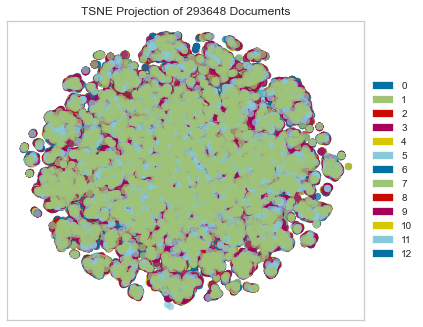

<AxesSubplot:title={'center':'TSNE Projection of 293648 Documents'}>

In [12]:
tsne = TSNEVisualizer()
tsne.fit(vectors_tfidf, topics)
tsne.show()

#### Подбор для TF-IDF и k-best

##### k-best

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

def selectkbest(kbest):
    print(str(kbest), str(vectors_tfidf.shape[1]))
    selector = SelectKBest(chi2, k=min(kbest, vectors_tfidf.shape[1]))
    selector.fit(vectors_tfidf, Y_train)
    v_tfidf = selector.transform(vectors_tfidf).astype('float32')
    v_tfidf_test = selector.transform(vectors_tfidf_test).astype('float32')
    modelNB = MultinomialNB()
    modelNB.fit(v_tfidf, Y_train)
    predictionsictions = modelNB.predictionsict(v_tfidf_test)
    print(metrics.accuracy_score(Y_test, predictionsictions))
    print(metrics.matthews_corrcoef(Y_test, predictionsictions))
    print(metrics.f1_score(Y_test, predictionsictions, average='weighted'))
#     print('\nClassification Report\n')
#     print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

In [71]:
kbest_list=[10000, 15000, 20000, 25000, 30000, 35000, 40000]
for k in kbest_list:
    selectkbest(k)

10000 48204
0.7822290633683866
0.7492020975340505
0.7746233912343363

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.71      0.75      5254
              Дом       0.86      0.74      0.79      2153
         Из жизни       0.61      0.45      0.52      2755
   Интернет и СМИ       0.76      0.60      0.67      4489
         Культура       0.84      0.86      0.85      5426
              Мир       0.75      0.83      0.79     13546
  Наука и техника       0.81      0.83      0.82      5286
      Путешествия       0.82      0.40      0.53       640
           Россия       0.70      0.82      0.76     16016
Силовые структуры       0.58      0.15      0.24      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.93      0.75      0.83       786
        Экономика       0.84      0.86      0.85      8688

         accuracy                           0.78     73412
        macro avg   

In [80]:
#chi2
kbest_list= [ i*1000+20000  for i in range(1,10)]
for k in kbest_list:
    selectkbest(k)

21000 48204
0.7932490600991664
0.7622926917967846
0.7872447368711704
22000 48204
0.7932081948455293
0.762272964247607
0.7871845678592595
23000 48204
0.7935214951234131
0.7626561758044229
0.7873798906770751
24000 48204
0.7932626818503787
0.7623831788348278
0.7870992858516698
25000 48204
0.7933035471040157
0.7624482363053731
0.7871779785430901
26000 48204
0.7932626818503787
0.7624145791903102
0.7871763511717416
27000 48204
0.7934397646161391
0.7626322627828998
0.7872777246917801
28000 48204
0.7931400860894676
0.7622933052351274
0.78687695382803
29000 48204
0.7930583555821936
0.7622169472888878
0.786803662634165


In [77]:
kbest_list= [ i*1000+20000  for i in range(1,10)]
for k in kbest_list:
    selectkbest(k)

21000 48204
0.7922274287582411
0.761081606778908
0.7860770194721698
22000 48204
0.7924726202800632
0.7613838315715235
0.7863492796489423
23000 48204
0.7925543507873373
0.761504565303626
0.7864203651462163
24000 48204
0.7922682940118781
0.7612008004911636
0.7860788538494126
25000 48204
0.7927859205579469
0.761820822317731
0.786535336076298
26000 48204
0.7925679725385496
0.7615933432038078
0.7863968526567954
27000 48204
0.7924862420312755
0.7615064659155902
0.7862406307394235
28000 48204
0.7927178118018853
0.7617956109474484
0.7864987025523511
29000 48204
0.7924862420312755
0.7615394287058614
0.7861938871788073


##### Униграммы и биграммы

In [61]:
max_df_list=[0.8, 0.75, 0.7, 0.65]
min_df_list=[50, 100, 150]
for i in min_df_list:
    for j in max_df_list:
        tfidf_difference(i, j)

50 0.8
(293648, 98308)
(73412, 98308)
0.7900888138179044
0.758459183008857

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.79      0.75      0.77      5254
              Дом       0.87      0.69      0.77      2153
         Из жизни       0.66      0.48      0.56      2755
   Интернет и СМИ       0.76      0.60      0.67      4489
         Культура       0.81      0.88      0.84      5426
              Мир       0.77      0.85      0.81     13546
  Наука и техника       0.78      0.87      0.82      5286
      Путешествия       0.95      0.12      0.21       640
           Россия       0.74      0.81      0.78     16016
Силовые структуры       0.71      0.10      0.17      1951
            Спорт       0.96      0.95      0.96      6422
         Ценности       0.98      0.62      0.76       786
        Экономика       0.81      0.90      0.85      8688

         accuracy                           0.79     73412
        macro 

KeyboardInterrupt: 

##### Биграммы

In [59]:
def dummy_fun(doc):
    return doc

def tfidf_difference(mindf, maxdf):    
    tfidf = TfidfVectorizer(
        analyzer='word',
        tokenizer=dummy_fun,
        min_df=mindf,
        max_df=maxdf,
        ngram_range=(1,2),
        preprocessor=dummy_fun, 
        token_pattern=None)
    print(mindf, maxdf)
    lbl = LabelEncoder()
    topics = lbl.fit_transform(data.topic.values)
    unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
    X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
    vectors_tfidf = tfidf.fit_transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)
    print(vectors_tfidf.shape)
    print(vectors_tfidf_test.shape)
    modelNB = MultinomialNB()
    modelNB.fit(vectors_tfidf, Y_train)
    predictionsictions = modelNB.predictionsict(vectors_tfidf_test)
    print(metrics.accuracy_score(Y_test, predictionsictions))
    print(metrics.matthews_corrcoef(Y_test, predictionsictions))
    print('\nClassification Report\n')
    print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

In [77]:
max_df_list=[0.75, 0.7, 0.65, 0.6]
min_df_list=[100, 150, 200, 300]
for i in min_df_list:
    for j in max_df_list:
        tfidf_difference(i, j)

100 0.75
(293648, 31048)
(73412, 31048)
0.7694382389800033
0.7344489467344972

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.79      0.72      0.75      5254
              Дом       0.82      0.71      0.76      2153
         Из жизни       0.57      0.41      0.48      2755
   Интернет и СМИ       0.70      0.52      0.60      4489
         Культура       0.79      0.81      0.80      5426
              Мир       0.74      0.84      0.79     13546
  Наука и техника       0.77      0.84      0.80      5286
      Путешествия       0.88      0.19      0.31       640
           Россия       0.73      0.81      0.76     16016
Силовые структуры       0.72      0.20      0.31      1951
            Спорт       0.96      0.94      0.95      6422
         Ценности       0.97      0.64      0.77       786
        Экономика       0.80      0.88      0.83      8688

         accuracy                           0.77     73412
        mac

KeyboardInterrupt: 

In [66]:
max_df_list=[0.9, 0.85, 0.75, 0.7]
min_df_list=[5, 10, 50, 100]
for i in min_df_list:
    for j in max_df_list:
        tfidf_difference(i, j)

5 0.9
(293648, 1011501)
(73412, 1011501)
0.7413774314825914
0.7025355327090459

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.88      0.51      0.65      5254
              Дом       0.97      0.44      0.61      2153
         Из жизни       0.88      0.07      0.13      2755
   Интернет и СМИ       0.87      0.37      0.52      4489
         Культура       0.84      0.78      0.81      5426
              Мир       0.67      0.89      0.76     13546
  Наука и техника       0.83      0.82      0.83      5286
      Путешествия       1.00      0.01      0.02       640
           Россия       0.63      0.88      0.73     16016
Силовые структуры       0.95      0.03      0.06      1951
            Спорт       0.96      0.94      0.95      6422
         Ценности       0.99      0.49      0.66       786
        Экономика       0.77      0.90      0.83      8688

         accuracy                           0.74     73412
        ma

In [3]:
def dummy_fun(doc):
    return doc

def tfidf_difference(maxdf):    
    tfidf = TfidfVectorizer(
        analyzer='word',
        tokenizer=dummy_fun,
        #min_df=mindf,
        max_df=maxdf, 
        preprocessor=dummy_fun, 
        token_pattern=None)
    print(mindf, maxdf)
    lbl = LabelEncoder()
    topics = lbl.fit_transform(data.topic.values)
    unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
    X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
    vectors_tfidf = tfidf.fit_transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)
    print(vectors_tfidf.shape)
    print(vectors_tfidf_test.shape)
    modelNB = MultinomialNB()
    modelNB.fit(vectors_tfidf, Y_train)
    predictionsictions = modelNB.predictionsict(vectors_tfidf_test)
    print(metrics.accuracy_score(Y_test, predictionsictions))
    print(metrics.matthews_corrcoef(Y_test, predictionsictions))
    print('\nClassification Report\n')
    print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

In [6]:
max_df_list=[0.9, 0.85, 0.75, 0.7]
min_df_list=[0.01, 0.05, 10, 50, 100]
for i in max_df_list:
    for j in min_df_list:
        tfidf_difference(j, i)

0.01 0.9
(293648, 1835)
(73412, 1835)
0.7368550100800959
0.696676073493059

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.74      0.54      0.62      5254
              Дом       0.83      0.67      0.74      2153
         Из жизни       0.54      0.43      0.48      2755
   Интернет и СМИ       0.69      0.53      0.60      4489
         Культура       0.79      0.81      0.80      5426
              Мир       0.73      0.79      0.76     13546
  Наука и техника       0.75      0.80      0.77      5286
      Путешествия       0.69      0.35      0.47       640
           Россия       0.66      0.79      0.72     16016
Силовые структуры       0.55      0.06      0.12      1951
            Спорт       0.96      0.92      0.94      6422
         Ценности       0.92      0.70      0.80       786
        Экономика       0.76      0.86      0.81      8688

         accuracy                           0.74     73412
        macro 

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 63150)
(73412, 63150)
0.7829918814362774
0.7499317773187366

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.72      0.76      5254
              Дом       0.90      0.60      0.72      2153
         Из жизни       0.68      0.44      0.53      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.85      0.82      5286
      Путешествия       0.96      0.07      0.13       640
           Россия       0.71      0.83      0.77     16016
Силовые структуры       0.72      0.07      0.13      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.97      0.60      0.74       786
        Экономика       0.80      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 63150)
(73412, 63150)
0.7829918814362774
0.7499317773187366

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.72      0.76      5254
              Дом       0.90      0.60      0.72      2153
         Из жизни       0.68      0.44      0.53      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.85      0.82      5286
      Путешествия       0.96      0.07      0.13       640
           Россия       0.71      0.83      0.77     16016
Силовые структуры       0.72      0.07      0.13      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.97      0.60      0.74       786
        Экономика       0.80      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 63150)
(73412, 63150)
0.7829918814362774
0.7499317773187366

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.72      0.76      5254
              Дом       0.90      0.60      0.72      2153
         Из жизни       0.68      0.44      0.53      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.85      0.82      5286
      Путешествия       0.96      0.07      0.13       640
           Россия       0.71      0.83      0.77     16016
Силовые структуры       0.72      0.07      0.13      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.97      0.60      0.74       786
        Экономика       0.80      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 63150)
(73412, 63150)
0.7829918814362774
0.7499317773187366

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.72      0.76      5254
              Дом       0.90      0.60      0.72      2153
         Из жизни       0.68      0.44      0.53      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.85      0.82      5286
      Путешествия       0.96      0.07      0.13       640
           Россия       0.71      0.83      0.77     16016
Силовые структуры       0.72      0.07      0.13      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.97      0.60      0.74       786
        Экономика       0.80      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

#### Модели без SVD

Наивный байесовский классификатор max_df=0.75, min_df=100

In [10]:
modelNB = MultinomialNB()
modelNB.fit(vectors_tfidf, Y_train)

MultinomialNB()

In [11]:
predictions = modelNB.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions, average='weighted'))

Accuracy:  0.7910968234076173
Weighted Average F-measure:  0.7837157761266145


In [13]:
print('\nClassification Report\n')
print(classification_report(Y_test, predictions, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.76      0.77      5254
              Дом       0.82      0.74      0.78      2153
         Из жизни       0.58      0.58      0.58      2755
   Интернет и СМИ       0.74      0.61      0.67      4489
         Культура       0.81      0.87      0.84      5426
              Мир       0.78      0.83      0.81     13546
  Наука и техника       0.79      0.86      0.82      5286
      Путешествия       0.87      0.28      0.42       640
           Россия       0.76      0.80      0.77     16016
Силовые структуры       0.64      0.17      0.27      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.69      0.80       786
        Экономика       0.82      0.89      0.85      8688

         accuracy                           0.79     73412
        macro avg       0.79      0.69      0.72     73412
     weighted avg       0.79  

In [10]:
modelNB = MultinomialNB()
modelNB.fit(v_tfidf_kbest, Y_train)
predictions = modelNB.predict(v_tfidf_kbest_test)
print(metrics.accuracy_score(Y_test, predictions))
print(metrics.f1_score(Y_test, predictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions))

0.7933035471040157
0.7871779785430901
0.7624482363053731


In [11]:
print('\nClassification Report\n')
print(classification_report(Y_test, predictionsictions, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.76      0.77      5254
              Дом       0.83      0.75      0.79      2153
         Из жизни       0.59      0.57      0.58      2755
   Интернет и СМИ       0.75      0.62      0.68      4489
         Культура       0.83      0.87      0.85      5426
              Мир       0.78      0.83      0.80     13546
  Наука и техника       0.81      0.85      0.83      5286
      Путешествия       0.84      0.38      0.52       640
           Россия       0.75      0.80      0.78     16016
Силовые структуры       0.60      0.19      0.29      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.93      0.74      0.82       786
        Экономика       0.83      0.88      0.86      8688

         accuracy                           0.79     73412
        macro avg       0.79      0.71      0.73     73412
     weighted avg       0.79  

In [5]:
from sklearn.preprocessing import label_binarize

unique_num_topics=np.unique(topics).tolist()
ytest = label_binarize(Y_test, classes=unique_num_topics)
ypredictionss = label_binarize(predictionsictions, classes=unique_num_topics)
macro_roc_auc_ovo = roc_auc_score(ytest, ypredictionss, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(ytest, ypredictionss, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(ytest, ypredictionss, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(ytest, ypredictionss, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.837628 (macro),
0.878474 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.837628 (macro),
0.878474 (weighted by prevalence)


In [6]:
print('\nClassification Report\n')
print(classification_report(Y_test, predictionsictions, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.76      0.77      5254
              Дом       0.82      0.74      0.78      2153
         Из жизни       0.58      0.58      0.58      2755
   Интернет и СМИ       0.74      0.61      0.67      4489
         Культура       0.81      0.87      0.84      5426
              Мир       0.78      0.83      0.81     13546
  Наука и техника       0.79      0.86      0.82      5286
      Путешествия       0.87      0.28      0.42       640
           Россия       0.76      0.80      0.77     16016
Силовые структуры       0.64      0.17      0.27      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.69      0.80       786
        Экономика       0.82      0.89      0.85      8688

         accuracy                           0.79     73412
        macro avg       0.79      0.69      0.72     73412
     weighted avg       0.79  

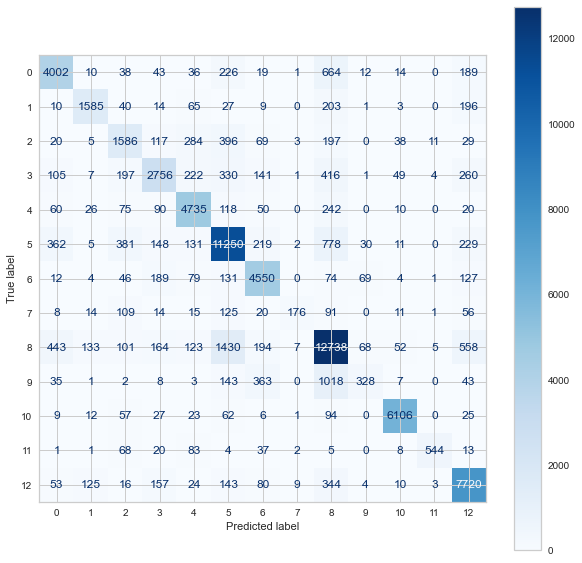

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator = modelNB, X=vectors_tfidf_test, y_true=Y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
predictions_test_full =0
cv_score =[]
i=1
tok=data.tokens.values
mnb = MultinomialNB()

for train_index, test_index in kf.split(tok, topics):
    print('{} of KFold {}'.format(i, kf.n_splits))
    xtr, xvl = tok.take(train_index),  tok.take(test_index)
    Y_train, Y_test = topics.take(train_index), topics.take(test_index)
    
    vectors_tfidf = tfidf.fit_transform(xtr)
    vectors_tfidf_test = tfidf.transform(xvl)
    
    mnb = MultinomialNB()
    mnb.fit(vectors_tfidf, Y_train)
    predictions= mnb.predictionsict(vectors_tfidf_test)
    score = metrics.matthews_corrcoef(Y_test, predictions)
    print('Matthews score:', score)

In [10]:
# fig, ax = plt.subplots(figsize=(10, 10))
# plot_confusion_matrix(estimator = mnb, X=vectors_tfidf_test, y_true=Y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
# plt.show()

Логистическая регрессия без SVD

Лучшие параметры

In [3]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
modelLR.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.7min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  2.1min remaining:   23.2s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.4min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [54]:
pickle.dump(modelLR, open("logreg_alldata_bigr.pkl", 'wb'))

In [53]:
#На всех данных
predictions_lg = modelLR.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions_lg))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions_lg, average='weighted'))

Accuracy:  0.8596891516373345
Weighted Average F-measure:  0.859821986927759


In [14]:
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

                   precision    recall  f1-score   support

      Бывший СССР       0.86      0.90      0.88     10561
              Дом       0.87      0.89      0.88      4336
         Из жизни       0.66      0.71      0.69      5511
   Интернет и СМИ       0.79      0.80      0.80      8917
         Культура       0.89      0.91      0.90     10747
              Мир       0.85      0.84      0.85     27237
  Наука и техника       0.87      0.88      0.88     10551
      Путешествия       0.78      0.80      0.79      1282
           Россия       0.86      0.83      0.84     31978
Силовые структуры       0.71      0.71      0.71      3918
            Спорт       0.97      0.97      0.97     12876
         Ценности       0.94      0.90      0.92      1553
        Экономика       0.89      0.90      0.89     17357

         accuracy                           0.86    146824
        macro avg       0.84      0.85      0.85    146824
     weighted avg       0.86      0.86      0.86    14

In [10]:
predictions_lg = modelLR.predict(vectors_tfidf_test)
print("Accuracy: ", metrics.accuracy_score(Y_test, predictions_lg))
print("Weighted Average F-measure: ", metrics.f1_score(Y_test, predictions_lg, average='weighted'))

Accuracy:  0.8512777202637171
Weighted Average F-measure:  0.8514980057403596


In [12]:
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

                   precision    recall  f1-score   support

      Бывший СССР       0.85      0.89      0.87      5254
              Дом       0.87      0.87      0.87      2153
         Из жизни       0.63      0.69      0.66      2755
   Интернет и СМИ       0.79      0.78      0.79      4489
         Культура       0.89      0.90      0.90      5426
              Мир       0.84      0.84      0.84     13546
  Наука и техника       0.86      0.88      0.87      5286
      Путешествия       0.80      0.78      0.79       640
           Россия       0.85      0.82      0.84     16016
Силовые структуры       0.69      0.71      0.70      1951
            Спорт       0.97      0.97      0.97      6422
         Ценности       0.94      0.88      0.91       786
        Экономика       0.89      0.89      0.89      8688

         accuracy                           0.85     73412
        macro avg       0.84      0.84      0.84     73412
     weighted avg       0.85      0.85      0.85     7

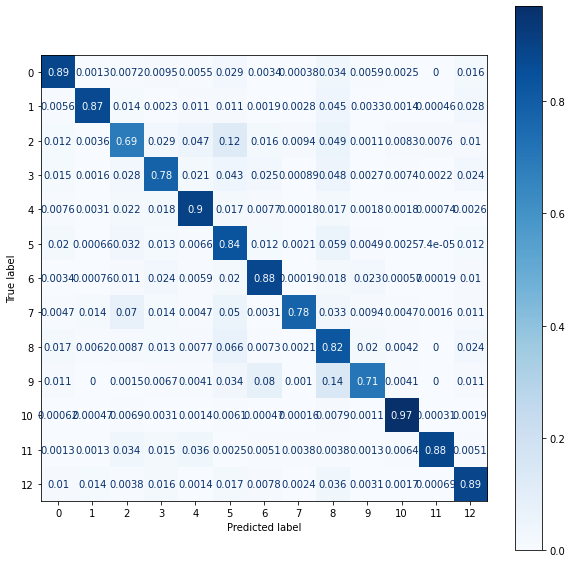

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.grid(False)
plot_confusion_matrix(estimator = modelLR, X=vectors_tfidf_test, y_true=Y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

Логистическая регрессия на k-best

In [14]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
modelLR.fit(v_tfidf_kbest, Y_train)
predictions_lg = modelLR.predictionsict(v_tfidf_kbest_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.3min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.4min remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.0min finished


In [15]:
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.8481174739824552
0.8487319281891137
0.8268329654779211
                   precision    recall  f1-score   support

      Бывший СССР       0.84      0.89      0.86      5254
              Дом       0.85      0.88      0.87      2153
         Из жизни       0.61      0.70      0.65      2755
   Интернет и СМИ       0.77      0.79      0.78      4489
         Культура       0.89      0.90      0.90      5426
              Мир       0.84      0.83      0.84     13546
  Наука и техника       0.85      0.87      0.86      5286
      Путешествия       0.76      0.78      0.77       640
           Россия       0.86      0.81      0.84     16016
Силовые структуры       0.66      0.72      0.69      1951
            Спорт       0.97      0.97      0.97      6422
         Ценности       0.94      0.88      0.91       786
        Экономика       0.89      0.88      0.89      8688

         accuracy                           0.85     73412
        macro avg       0.83      0.84      0.83     734

На простом TF-IDF

In [14]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
modelLR.fit(vectors_tfidf, Y_train)
predictions_lg = modelLR.predictionsict(vectors_tfidf_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.3min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.5min remaining:   16.6s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.8min finished


In [15]:
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.844943605949981
0.8455986109975031
0.823641965657533
                   precision    recall  f1-score   support

      Бывший СССР       0.82      0.90      0.85      5254
              Дом       0.83      0.88      0.86      2153
         Из жизни       0.61      0.72      0.66      2755
   Интернет и СМИ       0.77      0.78      0.78      4489
         Культура       0.88      0.91      0.89      5426
              Мир       0.85      0.82      0.84     13546
  Наука и техника       0.85      0.88      0.86      5286
      Путешествия       0.68      0.80      0.74       640
           Россия       0.87      0.80      0.83     16016
Силовые структуры       0.65      0.71      0.68      1951
            Спорт       0.96      0.97      0.96      6422
         Ценности       0.89      0.86      0.88       786
        Экономика       0.88      0.88      0.88      8688

         accuracy                           0.84     73412
        macro avg       0.81      0.84      0.82     73412

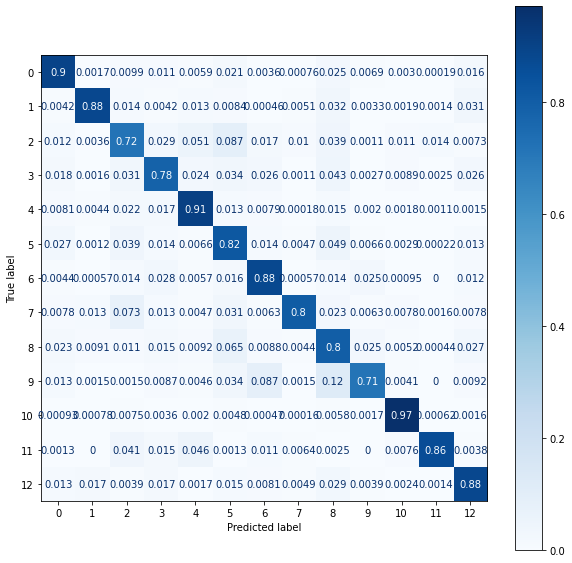

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator = modelLR, X=vectors_tfidf_test, y_true=Y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [3]:
lr = LogisticRegression()
parameters = {
    "penalty" : ['l2'],
    "C" : [0.01, 0.1, 1.0, 10],
    "class_weight" : ['balanced', None],
    "solver": ['saga', 'sag',  'newton-cg'],
    "multi_class": ['ovr',  'multiclass'],
}
gridsearchLr = GridSearchCV(lr, parameters, scoring='f1_weighted', verbose=3, n_jobs=-1)
gridsearchLr = gridsearchLr.fit(vectors_tfidf, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.62115441 0.7880313  0.78803769        nan        nan        nan
 0.64773472 0.64772449 0.64771669        nan        nan        nan
 0.6462667  0.81990209 0.81994006        nan        nan        nan
 0.7878838  0.78790413 0.7879013         nan        nan        nan
 0.75601304 0.82969562 0.84380318        nan        nan        nan
 0.83896947 0.83897921 0.83897552        nan        nan        nan
 0.81068853 0.82863541 0.84869184        nan        nan        nan
 0.84756008 0.84761714 0.84761334        nan        nan        nan]
  warnings.warn(


In [4]:
gridsearchLr.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [5]:
gridsearchLr.best_score_

0.8486918390854011

----

#### Модели с SVD

Наинвый Байес с SVD

In [10]:
def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    n_components = 0
    for explained_variance in var_ratio:
        total_variance += explained_variance
        print(total_variance)
        n_components += 1
        if total_variance >= goal_var:
            break
    return n_components

In [17]:
modelNB = GaussianNB()
modelNB.fit(svd_train, Y_train)

In [18]:
predictions= modelNB.predict(svd_test)
print(metrics.accuracy_score(Y_test, predictions))
print(metrics.f1_score(Y_test, predictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions, target_names=unique_topics))

0.6372255217130715
0.5980694943979855

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.69      0.64      0.66      5254
              Дом       0.78      0.68      0.73      2153
         Из жизни       0.19      0.75      0.30      2755
   Интернет и СМИ       0.57      0.55      0.56      4489
         Культура       0.86      0.70      0.78      5426
              Мир       0.74      0.53      0.61     13546
  Наука и техника       0.83      0.64      0.72      5286
      Путешествия       0.31      0.68      0.42       640
           Россия       0.68      0.59      0.63     16016
Силовые структуры       0.32      0.52      0.40      1951
            Спорт       0.96      0.90      0.93      6422
         Ценности       0.80      0.74      0.77       786
        Экономика       0.75      0.66      0.70      8688

         accuracy                           0.64     73412
        macro avg       0.65      0.66      0.63   

Логистическая регрессия с SVD 200 компонент

In [19]:
lg_svd = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg_svd.fit(svd_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.4min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.7min remaining:   50.7s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.4min finished


LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [20]:
predictions_lr = lg_svd.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_lr))
print(metrics.f1_score(Y_test, predictions_lr, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lr))
print(classification_report(Y_test, predictions_lr, target_names=unique_topics))

0.7772298806734593
0.7808780353215105
0.7487105700717608
                   precision    recall  f1-score   support

      Бывший СССР       0.75      0.83      0.78      5254
              Дом       0.71      0.83      0.76      2153
         Из жизни       0.47      0.66      0.54      2755
   Интернет и СМИ       0.70      0.70      0.70      4489
         Культура       0.84      0.87      0.86      5426
              Мир       0.82      0.75      0.78     13546
  Наука и техника       0.81      0.82      0.82      5286
      Путешествия       0.40      0.79      0.53       640
           Россия       0.83      0.69      0.75     16016
Силовые структуры       0.43      0.59      0.50      1951
            Спорт       0.95      0.96      0.95      6422
         Ценности       0.68      0.84      0.75       786
        Экономика       0.84      0.83      0.84      8688

         accuracy                           0.78     73412
        macro avg       0.71      0.78      0.74     734

#### Подбор гиперпараметров логистической регрессии

In [3]:
lr = LogisticRegression()
parameters = {
    "penalty" : ['l2'],
    "C" : [0.01, 0.1, 1.0, 10],
    "class_weight" : ['balanced', None],
    "solver": ['saga', 'sag',  'newton-cg'],
    "multi_class": ['ovr',  'multiclass'],
}
gridsearchLr = GridSearchCV(lr, parameters, scoring='f1_weighted', verbose=3, n_jobs=-1)
gridsearchLr = gridsearchLr.fit(vectors_tfidf, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.62115441 0.7880313  0.78803769        nan        nan        nan
 0.64773472 0.64772449 0.64771669        nan        nan        nan
 0.6462667  0.81990209 0.81994006        nan        nan        nan
 0.7878838  0.78790413 0.7879013         nan        nan        nan
 0.75601304 0.82969562 0.84380318        nan        nan        nan
 0.83896947 0.83897921 0.83897552        nan        nan        nan
 0.81068853 0.82863541 0.84869184        nan        nan        nan
 0.84756008 0.84761714 0.84761334        nan        nan        nan]
  warnings.warn(


In [4]:
gridsearchLr.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [5]:
gridsearchLr.best_score_

0.8486918390854011

In [9]:
gridsearchLr.predictionsict()

5

### NLTK + лемматизация

#### Подготовка

In [21]:
data = pd.read_csv('news_norm_tokens_nltk.csv', converters={'tokens':ast.literal_eval})

подготовка

In [9]:
data = data.drop('axix', axis=1)

In [5]:
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if re.match('[a-zа-я]+-?[a-zа-я]+', token)]))

In [3]:
vectors_tfidf_test stopwords.words('russian')
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if token not in ru_stopwords]))

In [10]:
data.to_csv('news_norm_tokens_nltk.csv', index=False)

---------

In [22]:
def dummy_fun(doc):
    return doc


print('Label fitting')
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
print('TF-IDF fitting')
tfidf = TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.75,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
tfidf.fit(X_train)
vectors_tfidf = tfidf.transform(X_train)
vectors_tfidf_test = tfidf.transform(X_test)
print('Selector fitting')
selector = SelectKBest(chi2, k=25000)
selector.fit(vectors_tfidf, Y_train)
v_tfidf_kbest = selector.transform(vectors_tfidf).astype('float32')
v_tfidf_kbest_test = selector.transform(vectors_tfidf_test).astype('float32')
print('TruncatedSVD fitting')
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(vectors_tfidf)

Label fitting
TF-IDF fitting
Selector fitting
TruncatedSVD fitting


TruncatedSVD(n_components=200)

Запись на диск

In [24]:
svd_train=tsvd.transform(vectors_tfidf)
svd_test=tsvd.transform(vectors_tfidf_test)

topics.tofile('topics_bigr_l_n')
Y_test.tofile('y_test_bigr_l_n')
Y_train.tofile('y_train_bigr_l_n')

pickle.dump(tsvd, open("tsvd200_bigr_l_n.pkl", 'wb'))
pickle.dump(lbl, open("lbl_bigr_l_n.pkl", 'wb'))
pickle.dump(tfidf, open("tfidf_100_0-75_bigr_l_n.pkl", 'wb'))
pickle.dump(selector, open("kbest_25000_bigr_l_n.pkl", 'wb'))

np.save('svd_test_bigr_l_n.npy', svd_test)
np.save('svd_train_bigr_l_n.npy', svd_train)

sparse.save_npz("tfidf100_0-75_train_bigr_l_n.npz", vectors_tfidf)
sparse.save_npz("tfidf100_0-75_test_bigr_l_n.npz", vectors_tfidf_test)
sparse.save_npz("tfidf100_0-75_train_kbest_bigr_l_n.npz", v_tfidf_kbest)
sparse.save_npz("tfidf100_0-75_test_kbest_bigr_l_n.npz", v_tfidf_kbest_test)

Чтение с диска

In [23]:
Y_train=np.fromfile('y_train_bigr_l_n',  dtype = np.int)
Y_test=np.fromfile('y_test_bigr_l_n',  dtype = np.int)
topics=np.fromfile('topics_bigr_l_n',  dtype = np.int)

vectors_tfidf = sparse.load_npz("tfidf100_0-75_train_bigr_l_n.npz")
vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test_bigr_l_n.npz")
v_tfidf_kbest = sparse.load_npz("tfidf100_0-75_train_kbest_bigr_l_n.npz")
v_tfidf_kbest_test = sparse.load_npz("tfidf100_0-75_test_kbest_bigr_l_n.npz")

#svd_model = pickle.load(open("tsvd200_bigr_l_n.pkl", 'rb'))
svd_test = np.load('svd_test_bigr_l_n.npy')
svd_train = np.load('svd_train_bigr_l_n.npy')

#tfidf100075 = pickle.load(open("tfidf_100_0-75_bigr_l_n.pkl", 'rb'))
kbest_selector = pickle.load(open("kbest_25000_bigr_l_n.pkl", 'rb'))
class_label = pickle.load(open("lbl_bigr_l_n.pkl", 'rb'))

unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

#### Подбор TF-IDF

In [6]:
max_df_list=[0.9, 0.85, 0.75, 0.7]
min_df_list=[0.01, 0.05, 10, 50, 100]
for i in max_df_list:
    for j in min_df_list:
        tfidf_difference(j, i)

0.01
0.9
(293648, 1810)
(73412, 1810)
0.7380809676892062
0.6981224440232291

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.73      0.54      0.62      5254
              Дом       0.81      0.66      0.73      2153
         Из жизни       0.58      0.43      0.50      2755
   Интернет и СМИ       0.69      0.54      0.61      4489
         Культура       0.80      0.82      0.81      5426
              Мир       0.73      0.79      0.76     13546
  Наука и техника       0.75      0.80      0.77      5286
      Путешествия       0.68      0.38      0.48       640
           Россия       0.66      0.78      0.72     16016
Силовые структуры       0.55      0.07      0.12      1951
            Спорт       0.96      0.92      0.94      6422
         Ценности       0.92      0.71      0.80       786
        Экономика       0.76      0.86      0.81      8688

         accuracy                           0.74     73412
        macro

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 59120)
(73412, 59120)
0.7793140086089467
0.745692370394336

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.70      0.74      5254
              Дом       0.88      0.60      0.71      2153
         Из жизни       0.68      0.45      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.88      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.81      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.06      0.12      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.64      0.77       786
        Экономика       0.79      0.90      0.84      8688

         accuracy                           0.78     73412
        macro avg    

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 59120)
(73412, 59120)
0.7793140086089467
0.745692370394336

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.70      0.74      5254
              Дом       0.88      0.60      0.71      2153
         Из жизни       0.68      0.45      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.88      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.81      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.06      0.12      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.64      0.77       786
        Экономика       0.79      0.90      0.84      8688

         accuracy                           0.78     73412
        macro avg    

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 59120)
(73412, 59120)
0.7793140086089467
0.745692370394336

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.70      0.74      5254
              Дом       0.88      0.60      0.71      2153
         Из жизни       0.68      0.45      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.88      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.81      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.06      0.12      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.64      0.77       786
        Экономика       0.79      0.90      0.84      8688

         accuracy                           0.78     73412
        macro avg    

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 59120)
(73412, 59120)
0.7793140086089467
0.745692370394336

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.70      0.74      5254
              Дом       0.88      0.60      0.71      2153
         Из жизни       0.68      0.45      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.88      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.81      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.06      0.12      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.64      0.77       786
        Экономика       0.79      0.90      0.84      8688

         accuracy                           0.78     73412
        macro avg    

#### Модели без SVD

Наивный байес 100 0.75 без SVD

In [6]:
model = MultinomialNB()
model.fit(vectors_tfidf, Y_train)
predictionsictions = model.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictionsictions))
print(metrics.f1_score(Y_test, predictionsictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictionsictions))
print('\nClassification Report\n')
print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

0.7891352912330409
0.7814449259302837
0.7577405499693355

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.75      0.76      5254
              Дом       0.82      0.74      0.78      2153
         Из жизни       0.58      0.57      0.58      2755
   Интернет и СМИ       0.73      0.61      0.67      4489
         Культура       0.81      0.87      0.84      5426
              Мир       0.78      0.83      0.80     13546
  Наука и техника       0.79      0.86      0.82      5286
      Путешествия       0.88      0.28      0.42       640
           Россия       0.75      0.79      0.77     16016
Силовые структуры       0.64      0.16      0.25      1951
            Спорт       0.96      0.95      0.96      6422
         Ценности       0.95      0.68      0.80       786
        Экономика       0.81      0.89      0.85      8688

         accuracy                           0.79     73412
        macro avg       0.79    

Логистическая регрессия без SVD

In [25]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.8min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  2.2min remaining:   23.7s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.5min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [26]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.848921157303983
0.8491368410328993
0.8274273571448413

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.84      0.88      0.86      5254
              Дом       0.86      0.87      0.87      2153
         Из жизни       0.63      0.68      0.66      2755
   Интернет и СМИ       0.78      0.77      0.78      4489
         Культура       0.89      0.90      0.90      5426
              Мир       0.83      0.83      0.83     13546
  Наука и техника       0.86      0.88      0.87      5286
      Путешествия       0.80      0.79      0.79       640
           Россия       0.85      0.82      0.84     16016
Силовые структуры       0.69      0.71      0.70      1951
            Спорт       0.97      0.97      0.97      6422
         Ценности       0.93      0.88      0.90       786
        Экономика       0.89      0.89      0.89      8688

         accuracy                           0.85     73412
        macro avg       0.83     

In [7]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.4min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.5min remaining:   16.3s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.7min finished


LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [9]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.8425734212390344
0.8432503982321002
0.8209657443888937

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.89      0.85      5254
              Дом       0.83      0.88      0.86      2153
         Из жизни       0.60      0.72      0.65      2755
   Интернет и СМИ       0.77      0.78      0.77      4489
         Культура       0.88      0.91      0.89      5426
              Мир       0.85      0.82      0.83     13546
  Наука и техника       0.85      0.87      0.86      5286
      Путешествия       0.68      0.81      0.74       640
           Россия       0.87      0.79      0.83     16016
Силовые структуры       0.64      0.71      0.68      1951
            Спорт       0.96      0.97      0.96      6422
         Ценности       0.89      0.85      0.87       786
        Экономика       0.88      0.88      0.88      8688

         accuracy                           0.84     73412
        macro avg       0.81    

#### Модели с SVD

Наивный байес с SVD 200 компонент

In [12]:
modelNB = GaussianNB()
modelNB.fit(svd_train, Y_train)
modelNB_predictions = modelNB.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, modelNB_predictions))
print(metrics.f1_score(Y_test, modelNB_predictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, modelNB_predictions))

print('\nClassification Report\n')
print(classification_report(Y_test, modelNB_predictions, target_names=unique_topics))

0.6330027788372473
0.6579675919032141
0.593393166526518

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.68      0.63      0.66      5254
              Дом       0.79      0.69      0.74      2153
         Из жизни       0.18      0.74      0.30      2755
   Интернет и СМИ       0.57      0.55      0.56      4489
         Культура       0.86      0.70      0.77      5426
              Мир       0.73      0.53      0.61     13546
  Наука и техника       0.84      0.62      0.72      5286
      Путешествия       0.30      0.68      0.42       640
           Россия       0.67      0.59      0.63     16016
Силовые структуры       0.31      0.51      0.39      1951
            Спорт       0.96      0.90      0.93      6422
         Ценности       0.77      0.74      0.75       786
        Экономика       0.74      0.66      0.70      8688

         accuracy                           0.63     73412
        macro avg       0.65     

In [28]:
lg_svd = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
lg_svd.fit(svd_train, Y_train)
predictions_lg = lg_svd.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.9min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  5.3min remaining:   57.5s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  6.1min finished


0.7750640222306979
0.7787643255892119
0.7465068891528067
                   precision    recall  f1-score   support

      Бывший СССР       0.74      0.82      0.78      5254
              Дом       0.70      0.85      0.76      2153
         Из жизни       0.47      0.64      0.54      2755
   Интернет и СМИ       0.70      0.71      0.70      4489
         Культура       0.84      0.88      0.86      5426
              Мир       0.82      0.74      0.78     13546
  Наука и техника       0.81      0.82      0.82      5286
      Путешествия       0.39      0.82      0.53       640
           Россия       0.83      0.68      0.75     16016
Силовые структуры       0.42      0.58      0.49      1951
            Спорт       0.95      0.97      0.96      6422
         Ценности       0.65      0.85      0.74       786
        Экономика       0.84      0.83      0.84      8688

         accuracy                           0.78     73412
        macro avg       0.70      0.78      0.73     734

In [13]:
lg_svd = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg_svd.fit(svd_train, Y_train)
predictions_lg = lg_svd.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.4min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.6min remaining:   50.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.3min finished


0.7746962349479649
0.7785701989799019
0.7458372836060996
                   precision    recall  f1-score   support

      Бывший СССР       0.75      0.82      0.78      5254
              Дом       0.70      0.83      0.76      2153
         Из жизни       0.46      0.65      0.54      2755
   Интернет и СМИ       0.70      0.70      0.70      4489
         Культура       0.85      0.87      0.86      5426
              Мир       0.81      0.75      0.78     13546
  Наука и техника       0.81      0.82      0.82      5286
      Путешествия       0.39      0.80      0.52       640
           Россия       0.83      0.69      0.75     16016
Силовые структуры       0.42      0.58      0.49      1951
            Спорт       0.95      0.96      0.95      6422
         Ценности       0.66      0.84      0.74       786
        Экономика       0.84      0.83      0.83      8688

         accuracy                           0.77     73412
        macro avg       0.71      0.78      0.73     734

### NLTK+стемминг

#### Подготовка

In [3]:
data = pd.read_csv('news_stem_tokens_nltk.csv', converters={'tokens':ast.literal_eval})

In [3]:
data = data.drop('axix', axis=1)

удаление стоп-слов

In [9]:
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if re.match('[a-zа-я]+-?[a-zа-я]+', token)]))
ru_stopwords = stopwords.words('russian')
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if token not in ru_stopwords]))

In [4]:
data.to_csv('news_stem_tokens_nltk.csv', index=False)

----

In [4]:
def dummy_fun(doc):
    return doc


print('Label fitting')
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
print('TF-IDF fitting')
tfidf = TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.75,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
tfidf.fit(X_train)
vectors_tfidf = tfidf.transform(X_train)
vectors_tfidf_test = tfidf.transform(X_test)
print('Selector fitting')
selector = SelectKBest(chi2, k=25000)
selector.fit(vectors_tfidf, Y_train)
v_tfidf_kbest = selector.transform(vectors_tfidf).astype('float32')
v_tfidf_kbest_test = selector.transform(vectors_tfidf_test).astype('float32')
print('TruncatedSVD fitting')
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(vectors_tfidf)

Label fitting
TF-IDF fitting
Selector fitting
TruncatedSVD fitting


TruncatedSVD(n_components=200)

Запись на диск

In [5]:
svd_train=tsvd.transform(vectors_tfidf)
svd_test=tsvd.transform(vectors_tfidf_test)

topics.tofile('topics_bigr_n_s')
Y_test.tofile('y_test_bigr_n_s')
Y_train.tofile('y_train_bigr_n_s')

pickle.dump(tsvd, open("tsvd200_bigr_n_s.pkl", 'wb'))
pickle.dump(lbl, open("lbl_bigr_n_s.pkl", 'wb'))
pickle.dump(tfidf, open("tfidf_100_0-75_bigr_n_s.pkl", 'wb'))
pickle.dump(selector, open("kbest_25000_bigr_n_s.pkl", 'wb'))

np.save('svd_test_bigr_n_s.npy', svd_test)
np.save('svd_train_bigr_n_s.npy', svd_train)

sparse.save_npz("tfidf100_0-75_train_bigr_n_s.npz", vectors_tfidf)
sparse.save_npz("tfidf100_0-75_test_bigr_n_s.npz", vectors_tfidf_test)
sparse.save_npz("tfidf100_0-75_train_kbest_bigr_n_s.npz", v_tfidf_kbest)
sparse.save_npz("tfidf100_0-75_test_kbest_bigr_n_s.npz", v_tfidf_kbest_test)

Чтение с диска

In [3]:
Y_train=np.fromfile('y_train_bigr_n_s',  dtype = np.int)
Y_test=np.fromfile('y_test_bigr_n_s',  dtype = np.int)
topics=np.fromfile('topics_bigr_n_s',  dtype = np.int)

vectors_tfidf = sparse.load_npz("tfidf100_0-75_train_bigr_n_s.npz")
vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test_bigr_n_s.npz")
v_tfidf_kbest = sparse.load_npz("tfidf100_0-75_train_kbest_bigr_n_s.npz")
v_tfidf_kbest_test = sparse.load_npz("tfidf100_0-75_test_kbest_bigr_n_s.npz")

#svd_model = pickle.load(open("tsvd200_bigr_n_s.pkl", 'rb'))
svd_test = np.load('svd_test_bigr_n_s.npy')
svd_train = np.load('svd_train_bigr_n_s.npy')

#tfidf100075 = pickle.load(open("tfidf_100_0-75_bigr_n_s.pkl", 'rb'))
kbest_selector = pickle.load(open("kbest_25000_bigr_n_s.pkl", 'rb'))
class_label = pickle.load(open("lbl_bigr_n_s.pkl", 'rb'))

unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

#### Подбор для TF-IDF

Лучшее - 100 и 0.75

In [8]:
def dummy_fun(doc):
    return doc

def tfidf_difference(mindf, maxdf):    
    tfidf = TfidfVectorizer(
        analyzer='word',
        tokenizer=dummy_fun,
        min_df=mindf,
        max_df=maxdf, 
        preprocessor=dummy_fun, 
        token_pattern=None)
    print(mindf)
    print(maxdf)
    lbl = LabelEncoder()
    topics = lbl.fit_transform(data.topic.values)
    unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
    X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=50, shuffle=True)
    vectors_tfidf = tfidf.fit_transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)
    print(vectors_tfidf.shape)
    print(vectors_tfidf_test.shape)
    modelNB = MultinomialNB()
    modelNB.fit(vectors_tfidf, Y_train)
    predictionsictions = modelNB.predictionsict(vectors_tfidf_test)
    print(metrics.accuracy_score(Y_test, predictionsictions))
    print(metrics.matthews_corrcoef(Y_test, predictionsictions))
    print('\nClassification Report\n')
    print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

In [ ]:
max_df_list=[0.9, 0.85, 0.75, 0.7]
min_df_list=[0.01, 0.05, 10, 50, 100]
for i in max_df_list:
    for j in min_df_list:
        tfidf_difference(j, i)

---

#### Модели без SVD

Наивный байес 100 0.75 без SVD

In [7]:
model = MultinomialNB()
model.fit(vectors_tfidf, Y_train)
predictionsictions = model.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictionsictions))
print(metrics.f1_score(Y_test, predictionsictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictionsictions))
print('\nClassification Report\n')
print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

0.7886176646869721
0.7807674782259535
0.75714389489089

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.74      0.76      5254
              Дом       0.82      0.74      0.78      2153
         Из жизни       0.58      0.57      0.58      2755
   Интернет и СМИ       0.73      0.61      0.67      4489
         Культура       0.81      0.87      0.84      5426
              Мир       0.78      0.83      0.80     13546
  Наука и техника       0.78      0.86      0.82      5286
      Путешествия       0.87      0.29      0.43       640
           Россия       0.75      0.79      0.77     16016
Силовые структуры       0.64      0.15      0.24      1951
            Спорт       0.96      0.95      0.96      6422
         Ценности       0.95      0.67      0.79       786
        Экономика       0.81      0.89      0.85      8688

         accuracy                           0.79     73412
        macro avg       0.79      

Логистическая регрессия без SVD

In [4]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.8min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  2.1min remaining:   22.7s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.4min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [5]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.847177573148804
0.8473529294499438
0.8254505705608531

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.84      0.88      0.86      5254
              Дом       0.86      0.87      0.87      2153
         Из жизни       0.63      0.68      0.66      2755
   Интернет и СМИ       0.78      0.78      0.78      4489
         Культура       0.89      0.90      0.90      5426
              Мир       0.83      0.83      0.83     13546
  Наука и техника       0.86      0.87      0.86      5286
      Путешествия       0.79      0.78      0.79       640
           Россия       0.85      0.82      0.83     16016
Силовые структуры       0.67      0.68      0.68      1951
            Спорт       0.97      0.97      0.97      6422
         Ценности       0.92      0.88      0.90       786
        Экономика       0.89      0.88      0.88      8688

         accuracy                           0.85     73412
        macro avg       0.83     

In [4]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.4min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.5min remaining:   16.6s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.7min finished


LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [ ]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

#### Модели с SVD

Наивный байес с SVD

In [9]:
bnb = GaussianNB()
bnb.fit(svd_train, Y_train)
bnb_predictions = bnb.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, bnb_predictions))
print(metrics.f1_score(Y_test, bnb_predictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, bnb_predictions))
print('\nClassification Report\n')
print(classification_report(Y_test, bnb_predictions, target_names=unique_topics))

0.6334522966272544
0.6579199597702144
0.5937073232952331

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.67      0.62      0.64      5254
              Дом       0.77      0.69      0.73      2153
         Из жизни       0.18      0.73      0.29      2755
   Интернет и СМИ       0.58      0.54      0.56      4489
         Культура       0.85      0.71      0.77      5426
              Мир       0.74      0.53      0.62     13546
  Наука и техника       0.84      0.62      0.71      5286
      Путешествия       0.31      0.68      0.43       640
           Россия       0.67      0.59      0.62     16016
Силовые структуры       0.32      0.53      0.40      1951
            Спорт       0.95      0.90      0.93      6422
         Ценности       0.79      0.74      0.77       786
        Экономика       0.75      0.67      0.71      8688

         accuracy                           0.63     73412
        macro avg       0.65    

Логистическая регрессия c SVD

In [8]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
modelLR.fit(svd_train, Y_train)
predictions_lg = modelLR.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.4min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.6min remaining:   49.8s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.3min finished


0.7733340598267313
0.7772233623127801
0.7444186757081395

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.74      0.82      0.78      5254
              Дом       0.70      0.83      0.76      2153
         Из жизни       0.47      0.66      0.55      2755
   Интернет и СМИ       0.69      0.71      0.70      4489
         Культура       0.85      0.87      0.86      5426
              Мир       0.82      0.75      0.78     13546
  Наука и техника       0.80      0.82      0.81      5286
      Путешествия       0.39      0.80      0.52       640
           Россия       0.83      0.68      0.75     16016
Силовые структуры       0.41      0.56      0.47      1951
            Спорт       0.95      0.96      0.95      6422
         Ценности       0.66      0.84      0.74       786
        Экономика       0.84      0.83      0.84      8688

         accuracy                           0.77     73412
        macro avg       0.70    

### Razdel+стемминг

#### Подготовка

In [5]:
data = pd.read_csv('news_stem_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [3]:
data = data.drop('axix', axis=1)

удаление стоп-слов

In [4]:
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if re.match('[a-zа-я]+-?[a-zа-я]+', token)]))
ru_stopwords = stopwords.words('russian')
data=data.assign(tokens=data['tokens'].apply(lambda row: [token for token in row if token not in ru_stopwords]))

In [5]:
data.to_csv('news_stem_tokens_rd.csv', index=False)

----

In [3]:
def dummy_fun(doc):
    return doc


print('Label fitting')
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
print('TF-IDF fitting')
tfidf = TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.75,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)
tfidf.fit(X_train)
vectors_tfidf = tfidf.transform(X_train)
vectors_tfidf_test = tfidf.transform(X_test)
print('Selector fitting')
selector = SelectKBest(chi2, k=25000)
selector.fit(vectors_tfidf, Y_train)
v_tfidf_kbest = selector.transform(vectors_tfidf).astype('float32')
v_tfidf_kbest_test = selector.transform(vectors_tfidf_test).astype('float32')
print('TruncatedSVD fitting')
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(vectors_tfidf)

Label fitting
TF-IDF fitting
Selector fitting
TruncatedSVD fitting


TruncatedSVD(n_components=200)

Запись на диск

In [4]:
svd_train=tsvd.transform(vectors_tfidf)
svd_test=tsvd.transform(vectors_tfidf_test)

topics.tofile('topics_bigr_r_s')
Y_test.tofile('y_test_bigr_r_s')
Y_train.tofile('y_train_bigr_r_s')

pickle.dump(tsvd, open("tsvd200_bigr_r_s.pkl", 'wb'))
pickle.dump(lbl, open("lbl_bigr_r_s.pkl", 'wb'))
pickle.dump(tfidf, open("tfidf_100_0-75_bigr_r_s.pkl", 'wb'))
pickle.dump(selector, open("kbest_25000_bigr_r_s.pkl", 'wb'))

np.save('svd_test_bigr_r_s.npy', svd_test)
np.save('svd_train_bigr_r_s.npy', svd_train)

sparse.save_npz("tfidf100_0-75_train_bigr_r_s.npz", vectors_tfidf)
sparse.save_npz("tfidf100_0-75_test_bigr_r_s.npz", vectors_tfidf_test)
sparse.save_npz("tfidf100_0-75_train_kbest_bigr_r_s.npz", v_tfidf_kbest)
sparse.save_npz("tfidf100_0-75_test_kbest_bigr_r_s.npz", v_tfidf_kbest_test)

Чтение с диска

In [30]:
Y_train=np.fromfile('y_train_bigr_r_s',  dtype = np.int)
Y_test=np.fromfile('y_test_bigr_r_s',  dtype = np.int)
topics=np.fromfile('topics_bigr_r_s',  dtype = np.int)

vectors_tfidf = sparse.load_npz("tfidf100_0-75_train_bigr_r_s.npz")
vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test_bigr_r_s.npz")
v_tfidf_kbest = sparse.load_npz("tfidf100_0-75_train_kbest_bigr_r_s.npz")
v_tfidf_kbest_test = sparse.load_npz("tfidf100_0-75_test_kbest_bigr_r_s.npz")

#svd_model = pickle.load(open("tsvd200_bigr_r_s.pkl", 'rb'))
svd_test = np.load('svd_test_bigr_r_s.npy')
svd_train = np.load('svd_train_bigr_r_s.npy')

#tfidf100075 = pickle.load(open("tfidf_100_0-75_bigr_r_s.pkl", 'rb'))
kbest_selector = pickle.load(open("kbest_25000_bigr_r_s.pkl", 'rb'))
class_label = pickle.load(open("lbl_bigr_r_s.pkl", 'rb'))

unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

#### Подбор для TF-IDF

In [6]:
def dummy_fun(doc):
    return doc

def tfidf_difference(mindf, maxdf):    
    tfidf = TfidfVectorizer(
        analyzer='word',
        tokenizer=dummy_fun,
        min_df=mindf,
        max_df=maxdf, 
        preprocessor=dummy_fun, 
        token_pattern=None)
    print(mindf)
    print(maxdf)
    lbl = LabelEncoder()
    topics = lbl.fit_transform(data.topic.values)
    unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
    X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=50, shuffle=True)
    vectors_tfidf = tfidf.fit_transform(X_train)
    vectors_tfidf_test = tfidf.transform(X_test)
    print(vectors_tfidf.shape)
    print(vectors_tfidf_test.shape)
    modelNB = MultinomialNB()
    modelNB.fit(vectors_tfidf, Y_train)
    predictionsictions = modelNB.predictionsict(vectors_tfidf_test)
    print(metrics.accuracy_score(Y_test, predictionsictions))
    print(metrics.matthews_corrcoef(Y_test, predictionsictions))
    print('\nClassification Report\n')
    print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

In [7]:
max_df_list=[0.9, 0.85, 0.75, 0.7]
min_df_list=[0.01, 0.05, 10, 50, 100]
for i in max_df_list:
    for j in min_df_list:
        tfidf_difference(j, i)

0.01
0.9
(293648, 1832)
(73412, 1832)
0.7390344902740696
0.6991679121935335

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.73      0.54      0.62      5254
              Дом       0.81      0.66      0.73      2153
         Из жизни       0.59      0.43      0.50      2755
   Интернет и СМИ       0.70      0.55      0.62      4489
         Культура       0.79      0.81      0.80      5426
              Мир       0.73      0.79      0.76     13546
  Наука и техника       0.75      0.80      0.77      5286
      Путешествия       0.70      0.37      0.48       640
           Россия       0.66      0.79      0.72     16016
Силовые структуры       0.57      0.07      0.12      1951
            Спорт       0.96      0.92      0.94      6422
         Ценности       0.92      0.73      0.81       786
        Экономика       0.76      0.86      0.81      8688

         accuracy                           0.74     73412
        macro

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 62282)
(73412, 62282)
0.7819021413392906
0.7486748134752803

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.71      0.75      5254
              Дом       0.89      0.60      0.72      2153
         Из жизни       0.69      0.44      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.82      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.08      0.14      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.63      0.76       786
        Экономика       0.79      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 62282)
(73412, 62282)
0.7819021413392906
0.7486748134752803

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.71      0.75      5254
              Дом       0.89      0.60      0.72      2153
         Из жизни       0.69      0.44      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.82      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.08      0.14      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.63      0.76       786
        Экономика       0.79      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 62282)
(73412, 62282)
0.7819021413392906
0.7486748134752803

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.71      0.75      5254
              Дом       0.89      0.60      0.72      2153
         Из жизни       0.69      0.44      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.82      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.08      0.14      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.63      0.76       786
        Экономика       0.79      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(293648, 62282)
(73412, 62282)
0.7819021413392906
0.7486748134752803

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.71      0.75      5254
              Дом       0.89      0.60      0.72      2153
         Из жизни       0.69      0.44      0.54      2755
   Интернет и СМИ       0.78      0.59      0.67      4489
         Культура       0.82      0.87      0.85      5426
              Мир       0.75      0.86      0.80     13546
  Наука и техника       0.80      0.83      0.82      5286
      Путешествия       0.95      0.06      0.12       640
           Россия       0.71      0.82      0.76     16016
Силовые структуры       0.72      0.08      0.14      1951
            Спорт       0.97      0.95      0.96      6422
         Ценности       0.96      0.63      0.76       786
        Экономика       0.79      0.89      0.84      8688

         accuracy                           0.78     73412
        macro avg   

#### Модели без SVD

Наивный байес 100 0.75 без SVD

In [11]:
model = MultinomialNB()
model.fit(vectors_tfidf, Y_train)
predictionsictions = model.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictionsictions))
print(metrics.f1_score(Y_test, predictionsictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictionsictions))
print('\nClassification Report\n')
print(classification_report(Y_test, predictionsictions, target_names=unique_topics))

0.7886176646869721
0.7807674782259535
0.75714389489089

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.78      0.74      0.76      5254
              Дом       0.82      0.74      0.78      2153
         Из жизни       0.58      0.57      0.58      2755
   Интернет и СМИ       0.73      0.61      0.67      4489
         Культура       0.81      0.87      0.84      5426
              Мир       0.78      0.83      0.80     13546
  Наука и техника       0.78      0.86      0.82      5286
      Путешествия       0.87      0.29      0.43       640
           Россия       0.75      0.79      0.77     16016
Силовые структуры       0.64      0.15      0.24      1951
            Спорт       0.96      0.95      0.96      6422
         Ценности       0.95      0.67      0.79       786
        Экономика       0.81      0.89      0.85      8688

         accuracy                           0.79     73412
        macro avg       0.79      

Логистическая регрессия без SVD

In [31]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.8min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  2.1min remaining:   23.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.4min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [32]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.847177573148804
0.8473529294499438
0.8254505705608531

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.84      0.88      0.86      5254
              Дом       0.86      0.87      0.87      2153
         Из жизни       0.63      0.68      0.66      2755
   Интернет и СМИ       0.78      0.78      0.78      4489
         Культура       0.89      0.90      0.90      5426
              Мир       0.83      0.83      0.83     13546
  Наука и техника       0.86      0.87      0.86      5286
      Путешествия       0.79      0.78      0.79       640
           Россия       0.85      0.82      0.83     16016
Силовые структуры       0.67      0.68      0.68      1951
            Спорт       0.97      0.97      0.97      6422
         Ценности       0.92      0.88      0.90       786
        Экономика       0.89      0.88      0.88      8688

         accuracy                           0.85     73412
        macro avg       0.83     

In [5]:
lg = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.3min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.5min remaining:   16.2s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.7min finished


LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [6]:
predictions_lg = lg.predictionsict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

0.8408843240887048
0.8415295509431031
0.8190490856703858

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.81      0.89      0.85      5254
              Дом       0.83      0.88      0.85      2153
         Из жизни       0.61      0.72      0.66      2755
   Интернет и СМИ       0.76      0.77      0.77      4489
         Культура       0.88      0.90      0.89      5426
              Мир       0.85      0.82      0.83     13546
  Наука и техника       0.85      0.87      0.86      5286
      Путешествия       0.67      0.80      0.73       640
           Россия       0.87      0.79      0.83     16016
Силовые структуры       0.63      0.70      0.66      1951
            Спорт       0.96      0.97      0.96      6422
         Ценности       0.89      0.86      0.88       786
        Экономика       0.88      0.88      0.88      8688

         accuracy                           0.84     73412
        macro avg       0.81    

#### Модели с SVD

Наивный байес с SVD 200 компонент

In [8]:
modelNB = GaussianNB()
modelNB.fit(svd_train, Y_train)
modelNB_predictions = modelNB.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, modelNB_predictions))
print(metrics.f1_score(Y_test, modelNB_predictions, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, modelNB_predictions))

print('\nClassification Report\n')
print(classification_report(Y_test, modelNB_predictions, target_names=unique_topics))

0.632825696071487
0.6569238102464662
0.5928661595937001

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.68      0.62      0.65      5254
              Дом       0.77      0.68      0.72      2153
         Из жизни       0.19      0.74      0.30      2755
   Интернет и СМИ       0.56      0.54      0.55      4489
         Культура       0.84      0.70      0.77      5426
              Мир       0.73      0.53      0.62     13546
  Наука и техника       0.84      0.62      0.71      5286
      Путешествия       0.31      0.67      0.43       640
           Россия       0.67      0.59      0.62     16016
Силовые структуры       0.32      0.53      0.40      1951
            Спорт       0.95      0.90      0.93      6422
         Ценности       0.77      0.75      0.76       786
        Экономика       0.75      0.67      0.71      8688

         accuracy                           0.63     73412
        macro avg       0.64     

In [9]:
lg_svd = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', n_jobs=-1,verbose=2 )
lg_svd.fit(svd_train, Y_train)
predictions_lg = lg_svd.predictionsict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.4min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.6min remaining:   50.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.3min finished


0.7729254072903613
0.7767790716206036
0.7439451745459736
                   precision    recall  f1-score   support

      Бывший СССР       0.74      0.81      0.77      5254
              Дом       0.70      0.83      0.76      2153
         Из жизни       0.46      0.65      0.54      2755
   Интернет и СМИ       0.69      0.70      0.70      4489
         Культура       0.84      0.87      0.86      5426
              Мир       0.82      0.75      0.78     13546
  Наука и техника       0.81      0.82      0.81      5286
      Путешествия       0.39      0.80      0.52       640
           Россия       0.83      0.68      0.75     16016
Силовые структуры       0.42      0.57      0.48      1951
            Спорт       0.95      0.96      0.95      6422
         Ценности       0.66      0.84      0.74       786
        Экономика       0.84      0.83      0.84      8688

         accuracy                           0.77     73412
        macro avg       0.70      0.78      0.73     734

## Логистическая регрессия на всех данных

Кросс-валидация

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

def dummy_fun(doc):
    return doc

# На всех данных + дополнительные
data = pd.read_csv('all_data_withdop_tokens_rd.csv', converters={'tokens':ast.literal_eval})
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=10)
splits=[]
for train_index, test_index in sss.split(data.tokens.values, data.topic.values):
    splits.append((train_index, test_index))
    X_train, X_test = data.tokens.values[train_index], data.tokens.values[test_index]
    Y_train, Y_test = topics[train_index], topics[test_index]
    pipeline_lr = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1, verbose=2))])
    pipeline_lr.fit(X_train, Y_train)
    preds=pipeline_lr.predict(X_test)
    print(metrics.accuracy_score(Y_test, preds))
    print(metrics.f1_score(Y_test, preds, average='weighted'))
    print(classification_report(Y_test, preds, target_names=unique_topics))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.5min remaining: 50.5min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.2min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.9min finished


0.8746230892262513
0.874345669033758
                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.89      0.90      0.89      5199
         Из жизни       0.75      0.74      0.74      6462
   Интернет и СМИ       0.83      0.81      0.82      9893
         Культура       0.90      0.92      0.91     10747
              Мир       0.86      0.87      0.86     27237
  Наука и техника       0.88      0.89      0.89     10551
      Путешествия       0.86      0.87      0.86      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.81      0.78      0.79      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.92      0.93      2425
        Экономика       0.90      0.91      0.90     17357

         accuracy                           0.87    152556
        macro avg       0.87      0.87      0.87    152556
     weighted avg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.8min remaining: 49.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.3min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.4min finished


0.8751147119746192
0.874879735592278
                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.89      0.90      0.89      5199
         Из жизни       0.75      0.74      0.74      6462
   Интернет и СМИ       0.83      0.82      0.82      9893
         Культура       0.90      0.92      0.91     10747
              Мир       0.86      0.86      0.86     27237
  Наука и техника       0.88      0.90      0.89     10551
      Путешествия       0.86      0.87      0.86      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.81      0.79      0.80      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.92      0.93      2425
        Экономика       0.90      0.90      0.90     17357

         accuracy                           0.88    152556
        macro avg       0.87      0.87      0.87    152556
     weighted avg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.8min remaining: 51.2min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.0min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.7min finished


0.8747017488659902
0.8744009215334118
                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.89      0.89      0.89      5199
         Из жизни       0.75      0.74      0.75      6462
   Интернет и СМИ       0.84      0.81      0.82      9893
         Культура       0.90      0.92      0.91     10747
              Мир       0.86      0.86      0.86     27237
  Наука и техника       0.88      0.90      0.89     10551
      Путешествия       0.87      0.88      0.87      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.81      0.78      0.79      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.92      0.93      2425
        Экономика       0.90      0.91      0.90     17357

         accuracy                           0.87    152556
        macro avg       0.87      0.87      0.87    152556
     weighted av

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.8min remaining: 51.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 27.2min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.8min finished


0.8750163874249456
0.8747588970441209
                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.89      0.89      0.89      5199
         Из жизни       0.76      0.74      0.75      6462
   Интернет и СМИ       0.84      0.82      0.83      9893
         Культура       0.90      0.92      0.91     10747
              Мир       0.86      0.86      0.86     27237
  Наука и техника       0.88      0.90      0.89     10551
      Путешествия       0.86      0.88      0.87      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.81      0.79      0.80      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.93      0.93      0.93      2425
        Экономика       0.90      0.91      0.90     17357

         accuracy                           0.88    152556
        macro avg       0.87      0.87      0.87    152556
     weighted av

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.7min remaining: 48.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.3min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.8min finished


0.8752392564042056
0.8750076527758833
                   precision    recall  f1-score   support

      Бывший СССР       0.86      0.91      0.89     10562
              Дом       0.89      0.89      0.89      5199
         Из жизни       0.75      0.75      0.75      6462
   Интернет и СМИ       0.83      0.82      0.83      9893
         Культура       0.89      0.93      0.91     10747
              Мир       0.86      0.86      0.86     27237
  Наука и техника       0.88      0.90      0.89     10551
      Путешествия       0.86      0.87      0.87      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.81      0.79      0.80      5185
            Спорт       0.97      0.98      0.98     12876
         Ценности       0.95      0.92      0.93      2425
        Экономика       0.90      0.90      0.90     17357

         accuracy                           0.88    152556
        macro avg       0.87      0.87      0.87    152556
     weighted av

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.2min remaining: 47.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.7min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.4min finished


0.8746755289860773
0.8743434930260319
                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.89      0.90      0.89      5199
         Из жизни       0.75      0.72      0.74      6462
   Интернет и СМИ       0.83      0.81      0.82      9893
         Культура       0.90      0.93      0.91     10747
              Мир       0.86      0.86      0.86     27237
  Наука и техника       0.88      0.90      0.89     10551
      Путешествия       0.86      0.86      0.86      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.81      0.79      0.80      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.93      0.93      0.93      2425
        Экономика       0.90      0.90      0.90     17357

         accuracy                           0.87    152556
        macro avg       0.87      0.87      0.87    152556
     weighted av

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.5min remaining: 48.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.6min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.3min finished


0.8740921366580141
0.8738512903123696
                   precision    recall  f1-score   support

      Бывший СССР       0.86      0.91      0.89     10562
              Дом       0.89      0.90      0.89      5199
         Из жизни       0.75      0.74      0.75      6462
   Интернет и СМИ       0.83      0.81      0.82      9893
         Культура       0.90      0.93      0.91     10747
              Мир       0.85      0.86      0.86     27237
  Наука и техника       0.88      0.90      0.89     10551
      Путешествия       0.85      0.86      0.86      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.81      0.78      0.80      5185
            Спорт       0.97      0.98      0.98     12876
         Ценности       0.94      0.91      0.93      2425
        Экономика       0.90      0.90      0.90     17357

         accuracy                           0.87    152556
        macro avg       0.87      0.87      0.87    152556
     weighted av

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.3min remaining: 50.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.0min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.5min finished


0.875055717244815
0.8747936422862401
                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.89      0.89      0.89      5199
         Из жизни       0.75      0.74      0.74      6462
   Интернет и СМИ       0.83      0.82      0.82      9893
         Культура       0.90      0.93      0.91     10747
              Мир       0.86      0.86      0.86     27237
  Наука и техника       0.88      0.89      0.88     10551
      Путешествия       0.86      0.88      0.87      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.81      0.78      0.79      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.92      0.93      2425
        Экономика       0.90      0.90      0.90     17357

         accuracy                           0.88    152556
        macro avg       0.87      0.87      0.87    152556
     weighted avg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.8min remaining: 48.9min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.6min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.8min finished


0.8739217074385799
0.8736947264787961
                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.88      0.89      0.89      5199
         Из жизни       0.74      0.74      0.74      6462
   Интернет и СМИ       0.83      0.81      0.82      9893
         Культура       0.90      0.93      0.91     10747
              Мир       0.86      0.86      0.86     27237
  Наука и техника       0.88      0.89      0.89     10551
      Путешествия       0.85      0.86      0.86      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.81      0.78      0.79      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.92      0.93      2425
        Экономика       0.90      0.90      0.90     17357

         accuracy                           0.87    152556
        macro avg       0.87      0.87      0.87    152556
     weighted av

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 22.0min remaining: 49.5min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.1min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.7min finished


0.876104512441333
0.8758673182990694
                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.89      0.90      0.89      5199
         Из жизни       0.75      0.74      0.75      6462
   Интернет и СМИ       0.84      0.82      0.83      9893
         Культура       0.90      0.92      0.91     10747
              Мир       0.86      0.87      0.86     27237
  Наука и техника       0.88      0.90      0.89     10551
      Путешествия       0.87      0.87      0.87      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.82      0.79      0.80      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.93      0.93      2425
        Экономика       0.90      0.91      0.90     17357

         accuracy                           0.88    152556
        macro avg       0.87      0.87      0.87    152556
     weighted avg

In [4]:
preds=pipeline_lr.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(classification_report(Y_test, preds, target_names=unique_topics))

0.876104512441333
0.8758673182990694
                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.89      0.90      0.89      5199
         Из жизни       0.75      0.74      0.75      6462
   Интернет и СМИ       0.84      0.82      0.83      9893
         Культура       0.90      0.92      0.91     10747
              Мир       0.86      0.87      0.86     27237
  Наука и техника       0.88      0.90      0.89     10551
      Путешествия       0.87      0.87      0.87      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.82      0.79      0.80      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.93      0.93      2425
        Экономика       0.90      0.91      0.90     17357

         accuracy                           0.88    152556
        macro avg       0.87      0.87      0.87    152556
     weighted avg

Сохранение лучшего разделения данных

In [7]:
splits[9]

(array([ 89892, 214708, 470094, ..., 401522, 627036,  79715], dtype=int64),
 array([515908, 298806, 466308, ..., 445928, 531446, 250881], dtype=int64))

In [52]:
splits[9][0].tofile('cv_best_split_alldatadop_train')
splits[9][1].tofile('cv_best_split_alldatadop_test')

In [66]:
sp_tr=np.fromfile('cv_best_split_alldatadop_train', dtype=np.int64)
sp_test=np.fromfile('cv_best_split_alldatadop_test', dtype=np.int64)

Сохранение лучшей модели

In [76]:
tfidf=TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
vectors_x_train=tfidf.fit_transform(X_train)
vectors_x_test=tfidf.transform(X_test)

In [78]:
pickle.dump(lbl, open("lbl_best_alldatadop.pkl", 'wb'))
pickle.dump(tfidf, open("tfidf0810__best_alldatadop.pkl", 'wb'))

In [83]:
sparse.save_npz("vectors_x_train_best_alldatadop.npz", vectors_x_train)
sparse.save_npz("vectors_x_test_best_alldatadop.npz", vectors_x_test)

In [89]:
Y_train.tofile('y_train_best_alldatadop')
Y_test.tofile('y_test_best_alldatadop')

In [92]:
ytr=np.fromfile('y_train_best_alldatadop', dtype=np.int)
yte=np.fromfile('y_test_best_alldatadop', dtype=np.int)

In [80]:
modellr=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1, verbose=2)
modellr.fit(vectors_x_train, Y_train)
preds=modellr.predict(vectors_x_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(classification_report(Y_test, preds, target_names=unique_topics))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 27.3min remaining: 61.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 31.2min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 32.8min finished


0.876104512441333
0.8758673182990694
                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.89      0.90      0.89      5199
         Из жизни       0.75      0.74      0.75      6462
   Интернет и СМИ       0.84      0.82      0.83      9893
         Культура       0.90      0.92      0.91     10747
              Мир       0.86      0.87      0.86     27237
  Наука и техника       0.88      0.90      0.89     10551
      Путешествия       0.87      0.87      0.87      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.82      0.79      0.80      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.93      0.93      2425
        Экономика       0.90      0.91      0.90     17357

         accuracy                           0.88    152556
        macro avg       0.87      0.87      0.87    152556
     weighted avg

In [81]:
pickle.dump(modellr, open("logreg_best_alldatadop.pkl", 'wb'))

#### Остальные модели

In [19]:
pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.7,
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2))])

#Все данные 0,7 10
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 50,
            max_df= 0.8,
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2))])

#Все данные 0,8 50
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 150,
            max_df= 0.75,
            max_features=15000,
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2))])

#Все данные 0,75 150 15000
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 150,
            max_df= 0.75,
            max_features=17500,
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2))])

#Все данные 0,75 150 17500
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.8,
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2))])

#Все данные 0,8 100
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.75,
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2))])

#Все данные 0,75 150
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.5min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  5.3min remaining:   58.3s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.9min finished


0.8564199313463738
0.8566473868529465
0.8361956004635663


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  3.8min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.6min remaining:   50.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.1min finished


0.8508895003541656
0.8513213813589047
0.8300331558557128


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  3.6min remaining:  8.2min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.4min remaining:   48.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.0min finished


0.8406186999400643
0.8416675969221888
0.8188102250675825


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  3.5min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.5min remaining:   49.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.0min finished


0.8420762273197843
0.8429767666718361
0.8203580882313565


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.9min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  5.7min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  6.1min finished


0.8469800577562251
0.8475807398587211
0.8257089230651213


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  3.5min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.4min remaining:   48.3s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.0min finished


0.8469800577562251
0.8475807398587211
0.8257089230651213


In [5]:
from sklearn.pipeline import Pipeline

def dummy_fun(doc):
    return doc

X_train, X_test = data.tokens.values[splits[0][0]], data.tokens.values[splits[0][1]]
Y_train, Y_test = data.topic.values[splits[0][0]], data.topic.values[splits[0][1]]
# pipeline_lr = Pipeline([
#     ('vect', TfidfVectorizer(
#             analyzer='word',
#             tokenizer=dummy_fun,
#             min_df= 10,
#             max_df= 0.8,
#             preprocessor=dummy_fun, 
#             token_pattern=None)),
#     ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2))])
# pipeline_lr.fit(X_train, Y_train)
# preds=pipeline_lr.predict(X_test)
# print(metrics.accuracy_score(Y_test, preds))
# print(metrics.f1_score(Y_test, preds, average='weighted'))
# print(metrics.matthews_corrcoef(Y_test, preds))
pipeline_lr = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2))])
pipeline_lr.fit(X_train, Y_train)
preds=pipeline_lr.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))
X_train, X_test = data.tokens.values[splits[0][0]], data.tokens.values[splits[0][1]]
Y_train, Y_test = data.topic.values[splits[0][0]], data.topic.values[splits[0][1]]
pipeline_lr = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.75,
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2))])
pipeline_lr.fit(X_train, Y_train)
preds=pipeline_lr.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))
pipeline_lr = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.75,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2))])
pipeline_lr.fit(X_train, Y_train)
preds=pipeline_lr.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.6min remaining: 48.6min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 24.8min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 26.2min finished


0.8743802103198387
0.8740970861111848
0.856421353691506


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  3.6min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.5min remaining:   49.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.0min finished


0.8469800577562251
0.8475807398587211
0.8257089230651213


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  5.3min remaining: 12.0min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  6.5min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  7.2min finished


0.8632239960769357
0.8632053361549034
0.8437450018485538


Word2Vec

In [11]:
from sklearn.preprocessing import scale

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

def buildWordVectorTfidf(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


X_train, X_test = data.tokens.values[splits[0][0]], data.tokens.values[splits[0][1]]
Y_train, Y_test = data.topic.values[splits[0][0]], data.topic.values[splits[0][1]]
modellg=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
# modelw2v = gensim.models.Word2Vec(data.tokens.values, workers=12, min_count=100, size=300, window=30, iter=30, sg=1)
# modelw2v.save('modelw2v_unigr_all_best.w2v')
modelw2v = gensim.models.Word2Vec.load('modelw2v_unigr_all_best.w2v')
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)
modellg.fit(train_vecs_w2v, Y_train)
preds = modellg.predict(test_vecs_w2v)
print('word2vec unigr')
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

modellg=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(len(tfidf))
train_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)
modellg.fit(train_vecs_w2v, Y_train)
preds = modellg.predict(test_vecs_w2v)
print('word2vec unigr*tfidf')
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

modellg=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
# bigram=Phraser.load('bigram_alldata')
# all_words = list(bigram[data.tokens.values])
# modelw2v = gensim.models.Word2Vec(all_words, workers=12, seed=10, min_count=100, size=300, iter=30, window=30, sg=1)
modelw2v = gensim.models.Word2Vec.load('modelw2v_bigr_all_best.w2v')
# modelw2v_bigr.save('modelw2v_bigr_all_best.w2v')
X_train=list(bigram[X_train])
X_test=list(bigram[X_test])
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)
modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print('word2vec unigr+bigr')
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

modellg=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(len(tfidf))
train_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)
modellg.fit(train_vecs_w2v, Y_train)
preds = modellg.predict(test_vecs_w2v)
print('word2vec unigr+bigr*tfidf')
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

word2vec unigr
0.8076881163842423
0.8094705014310307
0.782443321996919
25442
word2vec unigr*tfidf
0.8041192175666103
0.8060291326848649
0.7785333447825481
word2vec unigr+bigr
0.8095611071759385
0.8115077142799193
0.7847523174958186
36497
word2vec unigr+bigr*tfidf
0.8058559908461832
0.8078597114872742
0.7806300941164231


In [6]:
from sklearn.pipeline import Pipeline

# На всех данных со стеммингом
pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1, verbose=2))])

#Все данные 0,7 10
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 20.8min remaining: 46.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 24.3min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 25.6min finished


0.8746935105977225
0.8744178998510942
0.8567871868428699


In [8]:
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10561
              Дом       0.88      0.90      0.89      4336
         Из жизни       0.72      0.71      0.71      5511
   Интернет и СМИ       0.82      0.81      0.81      8917
         Культура       0.90      0.93      0.91     10747
              Мир       0.86      0.87      0.86     27237
  Наука и техника       0.89      0.90      0.89     10551
      Путешествия       0.81      0.81      0.81      1282
           Россия       0.88      0.85      0.86     31978
Силовые структуры       0.78      0.74      0.76      3918
            Спорт       0.97      0.98      0.98     12876
         Ценности       0.93      0.91      0.92      1553
        Экономика       0.90      0.91      0.90     17357

         accuracy                           0.87    146824
        macro avg       0.86      0.86      0.86    146824
     weighted avg       0.87  

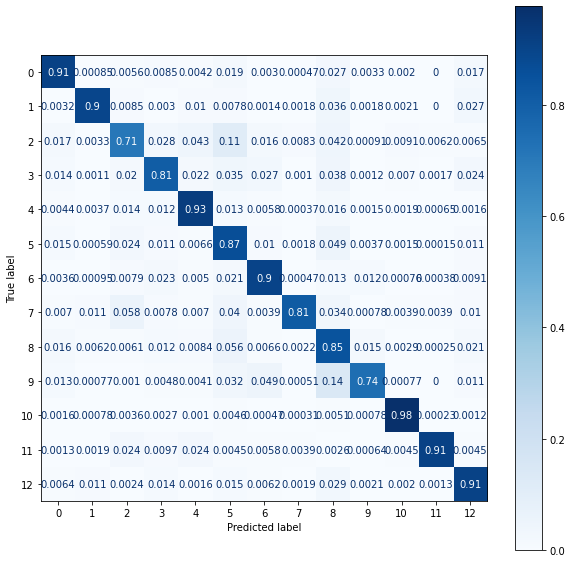

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator = pipeline_svm, X=X_test, y_true=Y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [3]:
from sklearn.pipeline import Pipeline

# На всех данных с лемматизацией
pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1, verbose=2))])

#Все данные 0,8 10
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 19.8min remaining: 44.5min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 23.4min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 24.7min finished


0.8743802103198387
0.8740970861111848
0.856421353691506


In [3]:
X_train.shape

(610223,)

In [4]:
from sklearn.pipeline import Pipeline

# На всех данных + дополнительные
pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1, verbose=2))])

#Все данные 0,8 10
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 21.5min remaining: 48.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 25.4min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 27.0min finished


0.8746230892262513
0.874345669033758
0.8577853588725475


In [5]:
from sklearn.pipeline import Pipeline

# На всех данных + дополнительные
pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.9,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1, verbose=2))])

#Все данные 0,8 10
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 23.1min remaining: 52.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 26.9min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 28.6min finished


0.8746230892262513
0.874345669033758
0.8577853588725475


In [7]:
preds=pipeline_svm.predict(X_test)
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.91      0.89     10562
              Дом       0.89      0.90      0.89      5199
         Из жизни       0.75      0.74      0.74      6462
   Интернет и СМИ       0.83      0.81      0.82      9893
         Культура       0.90      0.92      0.91     10747
              Мир       0.86      0.87      0.86     27237
  Наука и техника       0.88      0.89      0.89     10551
      Путешествия       0.86      0.87      0.86      2084
           Россия       0.87      0.85      0.86     31978
Силовые структуры       0.81      0.78      0.79      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.92      0.93      2425
        Экономика       0.90      0.91      0.90     17357

         accuracy                           0.87    152556
        macro avg       0.87      0.87      0.87    152556
     weighted avg       0.87  

## SVM

In [9]:
X=vectors_tfidf[:10000]

In [10]:
Y=Y_train[:10000]

In [ ]:
modelsvm = svm.SVC(cache_size=10000, verbose=2)
modelsvm.fit(vectors_tfidf, Y_train)

[LibSVM]

In [12]:
x_test=vectors_tfidf[10000:15000]
y_test=Y_test[10000:15000]

In [13]:
preds=modelsvm.predict(x_test)

In [14]:
print(metrics.accuracy_score(y_test, preds))
print(metrics.f1_score(y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(y_test, preds))

0.1474
0.13844451440873695
0.005547443997272164


#### LinearSVC

##### Подбор параметров LinearSVC

In [36]:
from sklearn.model_selection import GridSearchCV

params={'tol':[0.01, 0.001, 0.0001, 0.00001], 'C':[0.01, 0.001, 1, 10, 50], 'C':[0.01, 0.001, 1, 10, 50], 'penalty':['l1', 'l2'], 
        'class_weight':['balanced'], 'dual':[False]}
gridsvc=GridSearchCV(estimator=svm.LinearSVC(), param_grid=params, n_jobs=-1, scoring='f1_weighted', verbose=3)
gridsvc.fit(vectors_tfidf, Y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.001, 1, 10, 50],
                         'class_weight': ['balanced'], 'dual': [False],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.01, 0.001, 0.0001, 1e-05]},
             scoring='f1_weighted', verbose=3)

In [37]:
gridsvc.best_estimator_

LinearSVC(C=1, class_weight='balanced', dual=False, tol=0.01)

In [38]:
gridsvc.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'dual': False,
 'penalty': 'l2',
 'tol': 0.01}

In [11]:
from sklearn.multiclass import OneVsRestClassifier

pred = OneVsRestClassifier(svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1, random_state=100)).fit(vectors_tfidf, Y_train).predict(vectors_tfidf_test)

In [12]:
print(metrics.accuracy_score(Y_test, pred))
print(metrics.f1_score(Y_test, pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, pred))

0.848757696289435
0.8487131456309401
0.8269326194224371


In [13]:
print('\nClassification Report\n')
print(classification_report(Y_test, pred, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.85      0.88      0.86      5254
              Дом       0.88      0.86      0.87      2153
         Из жизни       0.63      0.67      0.65      2755
   Интернет и СМИ       0.79      0.77      0.78      4489
         Культура       0.89      0.89      0.89      5426
              Мир       0.83      0.84      0.83     13546
  Наука и техника       0.86      0.87      0.87      5286
      Путешествия       0.85      0.71      0.77       640
           Россия       0.84      0.83      0.84     16016
Силовые структуры       0.72      0.66      0.69      1951
            Спорт       0.97      0.97      0.97      6422
         Ценности       0.96      0.86      0.91       786
        Экономика       0.89      0.89      0.89      8688

         accuracy                           0.85     73412
        macro avg       0.84      0.82      0.83     73412
     weighted avg       0.85  

In [3]:
modelsvm = svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1)
modelsvm.fit(vectors_tfidf, Y_train)

LinearSVC(C=1, class_weight='balanced', dual=False, tol=0.01)

##### TF-IDF unigr

In [34]:
from sklearn.pipeline import Pipeline

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1))])

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

def dummy_fun(doc):
    return doc

# lbl = LabelEncoder()
# lbl.fit(data.topic.values)
# topics=lbl.transform(data.topic.values)
# unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
splits=[]
for train_index, test_index in sss.split(data.tokens.values, data.topic.values):
     splits.append((train_index, test_index))
#     X_train, X_test = data.tokens.values[train_index], data.tokens.values[test_index]
#     Y_train, Y_test = data.topic.values[train_index], data.topic.values[test_index]
#     pipeline_svm.fit(X_train, Y_train)
    
#     preds=pipeline_svm.predict(X_test)
#     print(metrics.accuracy_score(Y_test, preds))
#     print(metrics.f1_score(Y_test, preds, average='weighted'))
#     print(metrics.matthews_corrcoef(Y_test, preds))

In [4]:
X_train, X_test = data.tokens.values[splits[0][0]], data.tokens.values[splits[0][1]]
Y_train, Y_test = data.topic.values[splits[0][0]], data.topic.values[splits[0][1]]

In [35]:
#0,8 10
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8473274124121397
0.8477741635715748
0.8263480304289648


In [24]:
#Все данные 0,7 10
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8550168909715034
0.8554383378714712
0.835220737291162


In [26]:
#Все данные 0,8 50
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8508077698468915
0.8513238071999129
0.8305279928492951


In [28]:
#Все данные 0,75 150 15000
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8430842369094971
0.8438362345516306
0.8220342448540903


In [30]:
#Все данные 0,75 150 17500
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8453726911131695
0.8461651968278642
0.8244914414577317


In [32]:
#Все данные 0,8 100
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8488598594235275
0.8495381777645145
0.8283494934361243


In [34]:
#Все данные 0,75 100
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8488598594235275
0.8495381777645145
0.8283494934361243


##### TF-IDF unigr + bigr

In [35]:
from sklearn.pipeline import Pipeline

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1))])

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

def dummy_fun(doc):
    return doc

# lbl = LabelEncoder()
# lbl.fit(data.topic.values)
# topics=lbl.transform(data.topic.values)
# unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
splits=[]
for train_index, test_index in sss.split(data.tokens.values, data.topic.values):
    splits.append((train_index, test_index))
#     X_train, X_test = data.tokens.values[train_index], data.tokens.values[test_index]
#     Y_train, Y_test = data.topic.values[train_index], data.topic.values[test_index]
#     pipeline_svm.fit(X_train, Y_train)
    
#     preds=pipeline_svm.predict(X_test)
#     print(metrics.accuracy_score(Y_test, preds))
#     print(metrics.f1_score(Y_test, preds, average='weighted'))
#     print(metrics.matthews_corrcoef(Y_test, preds))

In [18]:
X_train, X_test = data.tokens.values[splits[0][0]], data.tokens.values[splits[0][1]]
Y_train, Y_test = data.topic.values[splits[0][0]], data.topic.values[splits[0][1]]

In [36]:
#Все данные 0,8 10
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.866765651392143
0.8666271966969996
0.8483863245935294


In [38]:
pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.7,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1))])

#Все данные 0,7 10
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 50,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1))])

#Все данные 0,8 50
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 150,
            max_df= 0.75,
            max_features=15000,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1))])

#Все данные 0,75 150 15000
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 150,
            max_df= 0.75,
            max_features=17500,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1))])

#Все данные 0,75 150 17500
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1))])

#Все данные 0,8 100
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.75,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1))])

#Все данные 0,75 150
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.866765651392143
0.8666271966969996
0.8483863245935294
0.8641162207813436
0.8642113664296333
0.8453596566826135
0.8454680433716558
0.8461668993734723
0.8246751577440875
0.848192393614123
0.8488765771309194
0.8276550051459778
0.862590584645562
0.8627994154337146
0.8436176699854221
0.8549283495886231
0.8551320741659787
0.8353123773669664


In [39]:
pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.75,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)),
    ('clf', svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1))])

#Все данные 0,75 100
pipeline_svm.fit(X_train, Y_train)
preds=pipeline_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.862590584645562
0.8627994154337146
0.8436176699854221


##### word2vec unigr

In [2]:
data = pd.read_csv('news_all_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [29]:
modelw2v.save('modelw2v_unigr_all_sg.w2v')

In [2]:
modelw2v=gensim.models.Word2Vec.load('modelw2v_unigr_all.w2v')

In [5]:
modelsvm=svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1)

In [8]:
X_train, X_test = data.tokens.values[train_index], data.tokens.values[test_index]
Y_train, Y_test = data.topic.values[train_index], data.topic.values[test_index]

Весь word2vec

In [11]:
from sklearn.preprocessing import scale

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

def buildWordVectorTfidf(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

modelsvm=svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1)
# modelw2v = gensim.models.Word2Vec(data.tokens.values, workers=12, min_count=100, size=300, window=30, iter=30, sg=1)
# modelw2v.save('modelw2v_unigr_all_best.w2v')
modelw2v = gensim.models.Word2Vec.load('modelw2v_unigr_all_best.w2v')
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)
modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print('word2vec unigr')
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

modelsvm=svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1)
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(len(tfidf))
train_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)
modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print('word2vec unigr*tfidf')
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

modelsvm=svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1)
# bigram=Phraser.load('bigram_alldata')
# all_words = list(bigram[data.tokens.values])
# modelw2v_bigr = gensim.models.Word2Vec(all_words, workers=12, seed=10, min_count=100, size=300, iter=30, window=30, sg=1)
modelw2v = gensim.models.Word2Vec.load('modelw2v_bigr_all_best.w2v')
# modelw2v_bigr.save('modelw2v_bigr_all_best.w2v')
X_train=list(bigram[X_train])
X_test=list(bigram[X_test])
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)
modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print('word2vec unigr+bigr')
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

modelsvm=svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1)
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(len(tfidf))
train_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)
modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print('word2vec unigr+bigr*tfidf')
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

word2vec unigr
0.8076881163842423
0.8094705014310307
0.782443321996919
25442
word2vec unigr*tfidf
0.8041192175666103
0.8060291326848649
0.7785333447825481
word2vec unigr+bigr
0.8095611071759385
0.8115077142799193
0.7847523174958186
36497
word2vec unigr+bigr*tfidf
0.8058559908461832
0.8078597114872742
0.7806300941164231


In [16]:
# Стандартный word2vec

modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.7956737318149621
0.7978050911619579
0.7692884043674403


In [19]:
#  word2vec window 10

modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.798466190813491
0.8006203050798731
0.7724510404435578


In [22]:
#  word2vec window 10 iter=10

modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8003596142320056
0.8024546904009583
0.774466793926574


In [25]:
#  word2vec window 15

modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8005639405001908
0.8026354089158105
0.7747690306193202


In [27]:
#  word2vec window 15 sg=1

modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8078107121451534
0.8096761863375901
0.7827573301682814


In [31]:
#  word2vec window 30

modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8021440636408217
0.8042258893088502
0.7765488239283415


In [38]:
#  word2vec window 50

modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8028251512014385
0.8048432832367509
0.7773501186389906


In [42]:
#  word2vec window 30 hs=1

modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8038059172887266
0.8057569734422296
0.7783381025414838


##### word2vec unigr+bigr

In [45]:
bigram=Phraser.load('bigram_alldata')

In [46]:
all_words = list(bigram[data.tokens.values])

In [47]:
modelw2v_bigr = gensim.models.Word2Vec(all_words, workers=12, min_count=100, size=300, iter=10, window=30, sg=1)

In [48]:
modelw2v_bigr.save('modelw2v_bigr_all_best.w2v')

In [49]:
X_train=list(bigram[X_train])

In [50]:
X_test=list(bigram[X_test])

In [11]:
X_train, X_test = data.tokens.values[train_index], data.tokens.values[test_index]
Y_train, Y_test = data.topic.values[train_index], data.topic.values[test_index]

In [54]:
from sklearn.preprocessing import scale

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v_bigr.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

# modelw2v = gensim.models.Word2Vec(data.tokens.values, workers=12, seed=10, min_count=100, size=300, window=30, sg=1, hs=1)
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)

In [55]:
modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8099357053342777
0.8118315727584194
0.7852917578523871


##### word2vec unigr+bigr * TF-IDF

In [45]:
bigram=Phraser.load('bigram_alldata')

In [46]:
all_words = list(bigram[data.tokens.values])

In [47]:
modelw2v_bigr = gensim.models.Word2Vec(all_words, workers=12, seed=10, min_count=100, size=300, iter=30, window=30, sg=1)

In [48]:
modelw2v_bigr.save('modelw2v_bigr_all_best.w2v')

In [68]:
X_train, X_test = data.tokens.values[train_index], data.tokens.values[test_index]
Y_train, Y_test = data.topic.values[train_index], data.topic.values[test_index]

In [69]:
X_train=list(bigram[X_train])
X_test=list(bigram[X_test])

In [57]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100, ngram_range=(1,2))
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(len(tfidf))

17153


In [70]:
from sklearn.preprocessing import scale

def buildWordVectorTrain(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v_bigr.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

# modelw2v = gensim.models.Word2Vec(data.tokens.values, workers=12, seed=10, min_count=100, size=300, window=30, sg=1, hs=1)
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
# train_vecs_w2v = scale(train_vecs_w2v)
# test_vecs_w2v = scale(test_vecs_w2v)

In [71]:
modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8088187217348662
0.8106824745190153
0.7840087678947893


##### word2vec unigr * TF-IDF

In [48]:
modelw2v_bigr=modelw2v_bigr.save('modelw2v_unigr_all_best.w2v')

In [68]:
X_train, X_test = data.tokens.values[train_index], data.tokens.values[test_index]
Y_train, Y_test = data.topic.values[train_index], data.topic.values[test_index]

In [57]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(len(tfidf))

17153


In [70]:
from sklearn.preprocessing import scale

def buildWordVectorTrain(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v_bigr.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

# modelw2v = gensim.models.Word2Vec(data.tokens.values, workers=12, seed=10, min_count=100, size=300, window=30, sg=1, hs=1)
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
# train_vecs_w2v = scale(train_vecs_w2v)
# test_vecs_w2v = scale(test_vecs_w2v)

In [71]:
modelsvm.fit(train_vecs_w2v, Y_train)
preds = modelsvm.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8088187217348662
0.8106824745190153
0.7840087678947893


#### SGD

In [7]:
modelsvc = SGDClassifier(loss='modified_huber', class_weight='balanced', n_jobs=-1)
modelsvc.fit(vectors_tfidf, Y_train)
svc_pred=modelsvc.predict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, svc_pred))
print(metrics.f1_score(Y_test, svc_pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, svc_pred))

0.8338963657167765
0.8349230435819122
0.811938013149015


In [13]:
modelsgb = SGDClassifier(loss='modified_huber', class_weight='balanced', n_jobs=-1, alpha=0.000015, random_state=15)
modelsgb.fit(vectors_tfidf, Y_train)

SGDClassifier(alpha=1.5e-05, class_weight='balanced', loss='modified_huber',
              n_jobs=-1, random_state=15)

In [14]:
#Все данные 
sgb_pred=modelsgb.predict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, sgb_pred))
print(metrics.f1_score(Y_test, sgb_pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, sgb_pred))

0.8537841224867869
0.8543377314149819
0.8340599418566681


In [54]:
sgb_pred_train=modelsgb.predict(vectors_tfidf)
print(metrics.accuracy_score(Y_train, sgb_pred_train))
print(metrics.f1_score(Y_train, sgb_pred_train, average='weighted'))
print(metrics.matthews_corrcoef(Y_train, sgb_pred_train))

0.9039394104506076
0.9038655799642491
0.890975903278429


In [57]:
print('\nClassification Report\n')
print(classification_report(Y_test, sgb_pred, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.83      0.91      0.87      5254
              Дом       0.84      0.90      0.87      2153
         Из жизни       0.63      0.71      0.67      2755
   Интернет и СМИ       0.78      0.79      0.79      4489
         Культура       0.89      0.91      0.90      5426
              Мир       0.86      0.82      0.84     13546
  Наука и техника       0.86      0.88      0.87      5286
      Путешествия       0.66      0.85      0.75       640
           Россия       0.88      0.80      0.84     16016
Силовые структуры       0.64      0.76      0.70      1951
            Спорт       0.96      0.98      0.97      6422
         Ценности       0.88      0.90      0.89       786
        Экономика       0.89      0.89      0.89      8688

         accuracy                           0.85     73412
        macro avg       0.82      0.85      0.83     73412
     weighted avg       0.85  

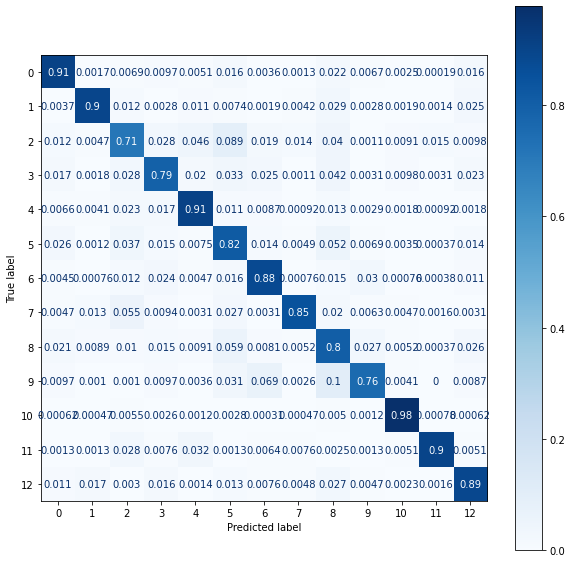

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator = modelsgb, X=vectors_tfidf_test, y_true=Y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [14]:
from sklearn.multiclass import OneVsRestClassifier

pred = OneVsRestClassifier(SGDClassifier(loss='modified_huber', 
                                         class_weight='balanced', 
                                         n_jobs=-1, alpha=0.000015, 
                                         random_state=15)).fit(vectors_tfidf, Y_train).predict(vectors_tfidf_test)

In [15]:
print(metrics.accuracy_score(Y_test, pred))
print(metrics.f1_score(Y_test, pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, pred))

0.8491799705770173
0.8498355874774842
0.8280956789700751


Ансамбль SGD и LR

In [5]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
modelLR.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.7min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  2.2min remaining:   23.7s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.5min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [6]:
lr_pred=modelLR.predict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, lr_pred))
print(metrics.f1_score(Y_test, lr_pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, lr_pred))

0.8512777202637171
0.8514980057403596
0.8301172838281087


In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

estimators = [('logreg', modelLR), ('sgdclass', modelsgb)]
ensemble = VotingClassifier(estimators)
kfold = model_selection.KFold(n_splits=10, random_state=10, shuffle=True)
results = model_selection.cross_val_score(ensemble, vectors_tfidf, Y_train, cv=kfold)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.5min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.8min remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.4min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.9min remaining:   20.8s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.5min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  1.8min remaining:   19.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent wo

In [13]:
ensemble.fit(vectors_tfidf, Y_train)
pred=ensemble.predict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, pred))
print(metrics.f1_score(Y_test, pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  1.6min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  2.1min remaining:   22.6s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  2.4min finished


0.8511959897564431
0.851925817594753
0.8306711070062096


## CatBoost

In [3]:
from catboost import Pool

train_dataset = Pool(data=svd_train,
                     label=Y_train)
test_dataset = Pool(data=svd_test,
                    label=Y_test)

In [5]:
from catboost import CatBoostClassifier

modelcatbst=CatBoostClassifier()
modelcatbst.fit(train_dataset)

Learning rate set to 0.105726
0:	learn: 2.1443999	total: 2.17s	remaining: 36m 4s
1:	learn: 1.9347091	total: 4.14s	remaining: 34m 27s
2:	learn: 1.7992701	total: 6.12s	remaining: 33m 54s
3:	learn: 1.6854256	total: 8.17s	remaining: 33m 55s
4:	learn: 1.5989132	total: 10.2s	remaining: 33m 56s
5:	learn: 1.5250064	total: 12.3s	remaining: 33m 51s
6:	learn: 1.4638263	total: 14.3s	remaining: 33m 52s
7:	learn: 1.4086794	total: 16.4s	remaining: 33m 52s
8:	learn: 1.3659267	total: 18.4s	remaining: 33m 45s
9:	learn: 1.3235153	total: 20.5s	remaining: 33m 47s
10:	learn: 1.2924356	total: 22.5s	remaining: 33m 41s
11:	learn: 1.2650775	total: 24.5s	remaining: 33m 38s
12:	learn: 1.2375538	total: 26.6s	remaining: 33m 39s
13:	learn: 1.2117221	total: 28.7s	remaining: 33m 39s
14:	learn: 1.1861079	total: 30.7s	remaining: 33m 39s
15:	learn: 1.1625936	total: 32.8s	remaining: 33m 35s
16:	learn: 1.1439890	total: 34.8s	remaining: 33m 30s
17:	learn: 1.1279488	total: 36.8s	remaining: 33m 28s
18:	learn: 1.1104653	total:

In [6]:
cb_pred=modelcatbst.predict(test_dataset)
print(metrics.accuracy_score(Y_test, cb_pred))
print(metrics.f1_score(Y_test, cb_pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, cb_pred))

0.809418078788209
0.8068263656543101
0.7812292239093951


In [2]:
data = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})
topics=np.fromfile('topics_bigr',  dtype = np.int)
class_label = pickle.load(open("lbl_bigr.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

In [3]:
data=data.assign(tokens_string=data['tokens'].apply(lambda row: ' '.join(row) ))

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens_string, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)

In [5]:
train_dataset2 = Pool(data=pd.DataFrame(X_train),
                     label=Y_train, text_features=['tokens_string'])
test_dataset2 = Pool(data=pd.DataFrame(X_test),
                    label=Y_test, text_features=['tokens_string'])

In [25]:
#'BoW:top_tokens_count=25000',
modelcatbst=CatBoostClassifier(task_type='GPU',auto_class_weights='Balanced', iterations=5000, tokenizers=[
        {
            'tokenizer_id': 'Token'
        }      
    ], dictionaries = [
        {
            'dictionary_id': 'Word', 'occurence_lower_bound':100
        }
    ], feature_calcers = ['BoW:top_tokens_count=20000'])
modelcatbst.fit(train_dataset2)

Learning rate set to 0.054135
0:	learn: 2.4560685	total: 122ms	remaining: 10m 11s
1:	learn: 2.3907964	total: 219ms	remaining: 9m 7s
2:	learn: 2.3417425	total: 312ms	remaining: 8m 39s
3:	learn: 2.2942064	total: 402ms	remaining: 8m 22s
4:	learn: 2.2596381	total: 493ms	remaining: 8m 12s
5:	learn: 2.2278026	total: 581ms	remaining: 8m 3s
6:	learn: 2.1986127	total: 667ms	remaining: 7m 56s
7:	learn: 2.1754467	total: 757ms	remaining: 7m 52s
8:	learn: 2.1502263	total: 847ms	remaining: 7m 49s
9:	learn: 2.1246588	total: 943ms	remaining: 7m 50s
10:	learn: 2.1048266	total: 1.03s	remaining: 7m 48s
11:	learn: 2.0842916	total: 1.13s	remaining: 7m 50s
12:	learn: 2.0606539	total: 1.24s	remaining: 7m 55s
13:	learn: 2.0428625	total: 1.33s	remaining: 7m 55s
14:	learn: 2.0249781	total: 1.42s	remaining: 7m 53s
15:	learn: 2.0051542	total: 1.52s	remaining: 7m 52s
16:	learn: 1.9815253	total: 1.65s	remaining: 8m 2s
17:	learn: 1.9651758	total: 1.74s	remaining: 8m
18:	learn: 1.9522113	total: 1.83s	remaining: 7m 59

In [26]:
cb_pred=modelcatbst.predict(test_dataset2)
print(metrics.accuracy_score(Y_test, cb_pred))
print(metrics.f1_score(Y_test, cb_pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, cb_pred))

0.8130959516155397
0.815877054605713
0.789846990778978


In [94]:
X_train=tfidf100075.inverse_transform(vectors_tfidf)
X_test=tfidf100075.inverse_transform(vectors_tfidf_test)
for i in range(0, len(X_test)):
    X_test[i]=' '.join(X_test[i])
for i in range(0, len(X_train)):
    X_train[i]=' '.join(X_train[i])
X_test=pd.DataFrame(X_test)
X_test=X_test.rename(columns={0:'tokens_string'})
X_train=pd.DataFrame(X_train)
X_train=X_train.rename(columns={0:'tokens_string'})

In [95]:
train_dataset3 = Pool(data=pd.DataFrame(X_train),
                     label=Y_train, text_features=['tokens_string'])
test_dataset3 = Pool(data=pd.DataFrame(X_test),
                    label=Y_test, text_features=['tokens_string'])
modelcatbst=CatBoostClassifier(task_type='GPU')
modelcatbst.fit(train_dataset3)

Learning rate set to 0.206881
0:	learn: 1.5328500	total: 63.4ms	remaining: 1m 3s
1:	learn: 1.3214757	total: 128ms	remaining: 1m 3s
2:	learn: 1.1918070	total: 194ms	remaining: 1m 4s
3:	learn: 1.0951266	total: 256ms	remaining: 1m 3s
4:	learn: 1.0402837	total: 310ms	remaining: 1m 1s
5:	learn: 0.9798498	total: 358ms	remaining: 59.4s
6:	learn: 0.9307289	total: 412ms	remaining: 58.4s
7:	learn: 0.8983797	total: 464ms	remaining: 57.5s
8:	learn: 0.8651418	total: 512ms	remaining: 56.3s
9:	learn: 0.8401704	total: 569ms	remaining: 56.3s
10:	learn: 0.8202235	total: 619ms	remaining: 55.6s
11:	learn: 0.8053230	total: 666ms	remaining: 54.8s
12:	learn: 0.7901892	total: 719ms	remaining: 54.6s
13:	learn: 0.7787117	total: 771ms	remaining: 54.3s
14:	learn: 0.7680279	total: 817ms	remaining: 53.7s
15:	learn: 0.7591871	total: 865ms	remaining: 53.2s
16:	learn: 0.7522791	total: 912ms	remaining: 52.8s
17:	learn: 0.7468880	total: 960ms	remaining: 52.4s
18:	learn: 0.7374918	total: 1.01s	remaining: 52s
19:	learn: 0

In [96]:
cb_pred=modelcatbst.predict(test_dataset3)
print(metrics.accuracy_score(Y_test, cb_pred))
print(metrics.f1_score(Y_test, cb_pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, cb_pred))

0.8373426687734975
0.8367752650414927
0.8139775839376653


In [97]:
print('\nClassification Report\n')
print(classification_report(Y_test, cb_pred, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.82      0.88      0.85      5254
              Дом       0.84      0.85      0.84      2153
         Из жизни       0.66      0.63      0.64      2755
   Интернет и СМИ       0.75      0.74      0.75      4489
         Культура       0.88      0.88      0.88      5426
              Мир       0.83      0.84      0.83     13546
  Наука и техника       0.85      0.87      0.86      5286
      Путешествия       0.68      0.79      0.73       640
           Россия       0.83      0.82      0.83     16016
Силовые структуры       0.69      0.60      0.64      1951
            Спорт       0.96      0.97      0.96      6422
         Ценности       0.84      0.89      0.87       786
        Экономика       0.88      0.87      0.87      8688

         accuracy                           0.84     73412
        macro avg       0.81      0.82      0.81     73412
     weighted avg       0.84  

## KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier

modelknn = KNeighborsClassifier(weights = 'distance',metric = 'cosine', n_jobs=-1)
modelknn.fit(vectors_tfidf, Y_train)

KNeighborsClassifier(n_jobs=-1)

In [14]:
predknn=modelknn.predict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, predknn))
print(metrics.f1_score(Y_test, predknn, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predknn))

0.7865199150002724
0.7840285255002403
0.7553480630533289


## AdaBoost

In [6]:
from sklearn.ensemble import AdaBoostClassifier

modelab = AdaBoostClassifier()
modelab.fit(vectors_tfidf, Y_train)

AdaBoostClassifier()

In [7]:
adaboost_pred=modelab.predict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, adaboost_pred))
print(metrics.f1_score(Y_test, adaboost_pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, adaboost_pred))

0.5723996076935651
0.5586058231897859
0.5067120629920662


## Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

modelrf = RandomForestClassifier(n_jobs=-1, verbose=3, class_weight='balanced')
modelrf.fit(vectors_tfidf, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100
building tree 11 of 100
building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.2min


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.1min finished


RandomForestClassifier(class_weight='balanced', n_jobs=-1, verbose=3)

In [5]:
rfpred = modelrf.predict(vectors_tfidf_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished


In [6]:
print(metrics.accuracy_score(Y_test, rfpred))
print(metrics.f1_score(Y_test, rfpred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, rfpred))

0.7774478286928568
0.7677458807188977
0.7436468651529857


In [7]:
print('\nClassification Report\n')
print(classification_report(Y_test, rfpred, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.80      0.69      0.74      5254
              Дом       0.85      0.72      0.78      2153
         Из жизни       0.72      0.34      0.46      2755
   Интернет и СМИ       0.79      0.53      0.64      4489
         Культура       0.85      0.84      0.84      5426
              Мир       0.72      0.83      0.77     13546
  Наука и техника       0.83      0.83      0.83      5286
      Путешествия       0.89      0.55      0.68       640
           Россия       0.70      0.84      0.76     16016
Силовые структуры       0.83      0.18      0.30      1951
            Спорт       0.93      0.97      0.95      6422
         Ценности       0.91      0.77      0.83       786
        Экономика       0.82      0.84      0.83      8688

         accuracy                           0.78     73412
        macro avg       0.82      0.69      0.73     73412
     weighted avg       0.78  

## word2vec

#### word2vec

In [5]:
data = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})
# topics=np.fromfile('topics_bigr',  dtype = np.int)
# class_label = pickle.load(open("lbl_bigr.pkl", 'rb'))
# unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
#X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
#                                                          test_size=0.2, random_state=10, shuffle=True)

In [6]:
model = gensim.models.Word2Vec(data.tokens.values, workers=12, min_count=100, size=300)

In [7]:
model.save("word2vec_unigr_all.w2v")

In [8]:
model.wv.vectors.shape

(33851, 300)

In [8]:
model.save("model_100_300.w2v")

In [17]:
topics=np.fromfile('topics_bigr',  dtype = np.int)
class_label = pickle.load(open("lbl_bigr.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                          test_size=0.2, random_state=10, shuffle=True)

NameError: name 'topics' is not defined

In [9]:
model.wv.vector_size

300

In [157]:
def text_vectorizer(text, model):
    text_vec =[]
    numw = 0
    for w in text:
        try:
            if numw == 0:
                text_vec = model.wv[w]
            else:
                text_vec = np.add(text_vec, model.wv[w])
            numw+=1
        except:
            pass
    return np.asarray(text_vec) / numw

data2 = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})    
model2 = gensim.models.Word2Vec(data2.tokens.values, workers=12)
V=[]
for tokens in data2.tokens.values:
    V.append(text_vectorizer(tokens, model2))

In [24]:
def news_to_vectors():
    global model, data
    data=data.assign(vectors=data['tokens'].apply(lambda row: np.mean(modelw2v_bigr.wv[[token for token in row if token in modelw2v_bigr.wv]], 
                                                                    axis=0)))
                
news_to_vectors()
topics=np.fromfile('topics_bigr',  dtype = np.int)
class_label = pickle.load(open("lbl_bigr.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(list(data.tokens.values), topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)

In [46]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
modelLR.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 19.8min remaining: 44.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 21.7min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 24.7min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [47]:
predictions_lg = modelLR.predict(X_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))

0.7870375415463412
0.7901833811861647
0.7599358719923613


In [153]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
modelLR.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  4.6min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  4.9min remaining:   53.2s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  5.7min finished


AttributeError: 'LogisticRegression' object has no attribute 'predicti'

In [154]:
predictions_lg = modelLR.predict(X_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))

0.7616465972865472
0.7656715475378677
0.7316356607482521


In [155]:
print('\nClassification Report\n')
print(classification_report(Y_test, predictions_lg, target_names=unique_topics))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.71      0.80      0.75      5254
              Дом       0.68      0.83      0.75      2153
         Из жизни       0.48      0.63      0.54      2755
   Интернет и СМИ       0.67      0.68      0.67      4489
         Культура       0.84      0.88      0.86      5426
              Мир       0.82      0.75      0.78     13546
  Наука и техника       0.79      0.81      0.80      5286
      Путешествия       0.36      0.80      0.49       640
           Россия       0.82      0.65      0.73     16016
Силовые структуры       0.33      0.46      0.38      1951
            Спорт       0.95      0.97      0.96      6422
         Ценности       0.64      0.84      0.72       786
        Экономика       0.83      0.83      0.83      8688

         accuracy                           0.76     73412
        macro avg       0.69      0.76      0.71     73412
     weighted avg       0.78  

In [91]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
classifier.fit(X_train, Y_train)

MLPClassifier()

In [8]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(max_iter=500)
classifier.fit(svd_train, Y_train)

MLPClassifier(max_iter=500)

In [7]:
#MLP с лучшей обработкой и SVD, параметры по умолчанию, итераций не хватило
predictions_mlp = classifier.predict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_mlp))
print(metrics.f1_score(Y_test, predictions_mlp, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_mlp))

0.821950089903558
0.8208507926090751
0.7961029168415542


In [9]:
#MLP с лучшей обработкой и SVD, max_iter=500
predictions_mlp = classifier.predict(svd_test)
print(metrics.accuracy_score(Y_test, predictions_mlp))
print(metrics.f1_score(Y_test, predictions_mlp, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_mlp))

0.8211327848308179
0.8195607415680691
0.7952250969799819


In [170]:
predictions_mlp = classifier.predict(X_test)
print(metrics.accuracy_score(Y_test, predictions_mlp))
print(metrics.f1_score(Y_test, predictions_mlp, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_mlp))

0.8142401787173759
0.8114643787597222
0.7870434483921338


In [50]:
#model = gensim.models.Word2Vec(data.tokens.values, workers=12, min_count=100, size=300 )
predictions_mlp = classifier.predict(X_test)
print(metrics.accuracy_score(Y_test, predictions_mlp))
print(metrics.f1_score(Y_test, predictions_mlp, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_mlp))

0.8225903122105378
0.8221907807434594
0.7970360698521761


#### word2vec для обычных алгоритмов

In [16]:
#w2v с биграммами обычное усреднение
def news_to_vectors():
    global modelw2v_bigr, X
    X=[]
    for text in all_words:
        tokens=[]
        for token in text:
            if token in modelw2v_bigr.wv:
                tokens.append(token)
        X.append(np.mean(modelw2v_bigr.wv[tokens], axis=0))

        
news_to_vectors()
topics=np.fromfile('topics_bigr',  dtype = np.int)
class_label = pickle.load(open("lbl_bigr.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)

In [17]:
modelsgb = SGDClassifier(loss='modified_huber', class_weight='balanced', n_jobs=-1, alpha=0.000015, random_state=15)
modelsgb.fit(X_train, Y_train)

SGDClassifier(alpha=1.5e-05, class_weight='balanced', loss='modified_huber',
              n_jobs=-1, random_state=15)

In [18]:
sgb_pred=modelsgb.predict(X_test)
print(metrics.accuracy_score(Y_test, sgb_pred))
print(metrics.f1_score(Y_test, sgb_pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, sgb_pred))

0.7836184819920449
0.7878140209358495
0.7559385617643744


##### Можно попробовать дообучить!!

In [20]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(max_iter=500)
classifier.fit(X_train, Y_train)

c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(max_iter=500)

In [30]:
classifier.n_iter_

293

In [21]:
predictions_mlp = classifier.predict(X_test)
print(metrics.accuracy_score(Y_test, predictions_mlp))
print(metrics.f1_score(Y_test, predictions_mlp, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_mlp))

0.8236255653026753
0.8231965911455801
0.7981733696262863


In [31]:
predictions_mlp = classifier.predict(X_train)
print(metrics.accuracy_score(Y_train, predictions_mlp))
print(metrics.f1_score(Y_train, predictions_mlp, average='weighted'))
print(metrics.matthews_corrcoef(Y_train, predictions_mlp))

0.8852299351604642
0.8847586973185895
0.8686237863848859


#### Doc2Vec

In [54]:
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
data_for_training = list(tagged_document(data.tokens))

In [58]:
modeld2v = gensim.models.Doc2Vec(data_for_training, workers=12, epochs=30)

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(modeld2v.docvecs, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)

In [84]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
modelLR.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:  2.6min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:  2.7min remaining:   29.7s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  3.2min finished


LogisticRegression(C=10, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   solver='newton-cg', verbose=2)

In [85]:
predictions_lg = modelLR.predict(X_test)
print(metrics.accuracy_score(Y_test, predictions_lg))
print(metrics.f1_score(Y_test, predictions_lg, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_lg))

0.7098294556748216
0.7147682015787424
0.6757766097420075


In [92]:
predictions_mlp = classifier.predict(X_test)
print(metrics.accuracy_score(Y_test, predictions_mlp))
print(metrics.f1_score(Y_test, predictions_mlp, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predictions_mlp))

0.7816705715686809
0.7792063210900418
0.7500924360732568


## FastText

#### классификация

In [56]:
def dummy_fun(doc):
    return doc

def razdelTokenization(text):
    punct = list(string.punctuation)
    punct.append('«')
    punct.append('»')
    punct.append('—')
    list_of_rows=[]
    tokens = rd.tokenize(text)
    str_tokens=[]
    for token in tokens:
        if token not in punct:
            str_tokens.append(token.text)
    return str_tokens
    
def lemmatization(tokens):
    ru_stopwords = stopwords.words('russian')
    morph = pymorphy2.MorphAnalyzer()
    norm_tokens = [morph.parse(token)[0].normal_form  for token in tokens if token not in ru_stopwords]
    return norm_tokens

text='Космический корабль Crew Dragon американской компании SpaceX вернется с Международной космической станции (МКС) на Землю 28 апреля и приводнится в одной из семи выбранных зон. Об этом сообщается на сайте НАСА. Планируется, что корабль отстыкуется от МКС 28 апреля в 07:05 по времени Восточного побережья США (14:05 по московскому времени) и приводнится в 12:40 (19:40 по московскому времени). Ранее исполняющий обязанности главы НАСА Стив Юрчик назвал возможные сроки полетов российских космонавтов на американских космических корабля Crew Dragon и Starliner. По словам временного администратора, первый полет произойдет не раньше следующего года. Согласно Юрчику, речь идет о миссии SpaceX Crew-4, запуск которой состоится не ранее первого квартала 2022 года.'
text = re.sub('<[^<]+>','', text)
print(text)
pattern=r'(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'
text = re.sub(pattern, ' ', text, re.IGNORECASE)
text = str.lower(text)
print(text)
tokens=razdelTokenization(text)
print(tokens)
tokens=lemmatization(tokens)
print(tokens)
tfidf = pickle.load(open("tfidf_100_0-75_bigr_all.pkl", 'rb'))
tokens = [t for t in tokens if re.match('[a-zа-я]+-?[a-zа-я]+', t)]
tftokens = tfidf.transform([tokens])

Космический корабль Crew Dragon американской компании SpaceX вернется с Международной космической станции (МКС) на Землю 28 апреля и приводнится в одной из семи выбранных зон. Об этом сообщается на сайте НАСА. Планируется, что корабль отстыкуется от МКС 28 апреля в 07:05 по времени Восточного побережья США (14:05 по московскому времени) и приводнится в 12:40 (19:40 по московскому времени). Ранее исполняющий обязанности главы НАСА Стив Юрчик назвал возможные сроки полетов российских космонавтов на американских космических корабля Crew Dragon и Starliner. По словам временного администратора, первый полет произойдет не раньше следующего года. Согласно Юрчику, речь идет о миссии SpaceX Crew-4, запуск которой состоится не ранее первого квартала 2022 года.
космический корабль crew dragon американской компании spacex вернется с международной космической станции (мкс) на землю 28 апреля и приводнится в одной из семи выбранных зон. об этом сообщается на сайте наса. планируется, что корабль отст

In [20]:
data = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [3]:
data = pd.read_csv('news_all_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [12]:
topics=np.fromfile('topics_bigr_all',  dtype = np.int)
class_label = pickle.load(open("lbl_bigr_all.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
# X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
#                                                          test_size=0.2, random_state=10, shuffle=True)

In [4]:
X_train_str=[]
for l in X_train:
    text=' '.join(l)
    X_train_str.append(text)
X_test_str=[]
for l in X_test:
    text=' '.join(l)
    X_test_str.append(text)

In [ ]:
n_train_samples=len(X_train_str)
n_test_samples=len(X_test_str)
with open('data_train_ft_all.txt', 'w+', encoding='utf-8') as train_outfile:
    for i in range(n_train_samples):
        train_outfile.write(f'__label__{Y_train[i]} {X_train_str[i]}\n')

with open('data_test_ft_all.txt', 'w+', encoding='utf-8') as test_outfile:
    for i in range(n_test_samples):
        test_outfile.write(f'__label__{Y_test[i]} {X_test_str[i]}\n')

In [7]:
X_test_str=[]
Y_test=[]
with open("data_test_ft_all.txt", "r", encoding='utf-8') as file:
    for line in file:
        X_test_str.append(line)
for i in range(len(X_test_str)):
    Y_test.append(int(re.sub(r'__label__', '', re.match(r'__label__\d+', X_test_str[i]).group(0))))
    X_test_str[i]=re.sub(r'__label__\d+\s', '', X_test_str[i])
    X_test_str[i]=re.sub(r'\n', '', X_test_str[i])
    
X_train_str=[]
Y_train=[]
with open("data_train_ft_all.txt", "r", encoding='utf-8') as file:
    for line in file:
        X_train_str.append(line)
for i in range(len(X_train_str)):
    Y_train.append(int(re.sub(r'__label__', '', re.match(r'__label__\d+', X_train_str[i]).group(0))))
    X_train_str[i]=re.sub(r'__label__\d+\s', '', X_train_str[i])
    X_train_str[i]=re.sub(r'\n', '', X_train_str[i])

In [57]:
import fasttext

ft2_classifier = fasttext.train_supervised('data_train_ft.txt', epoch=30, wordNgrams=2, loss='ova')

In [3]:
import fasttext

In [6]:
#все данные

ft2_classifier = fasttext.train_supervised('data_train_ft_all.txt', epoch=30, wordNgrams=2, loss='ova')

In [20]:
#все данные
import fasttext

ft2_classifier = fasttext.train_supervised('data_train_ft_all.txt', epoch=30, wordNgrams=2, loss='hs')

In [16]:
#Все данные 10 epochs loss hs train 
ft2_classifier.test('data_train_ft_all.txt')

(587296, 0.9941222143518771, 0.9941222143518771)

In [17]:
#Все данные 10 epochs loss hs test
ft2_classifier.test('data_test_ft_all.txt')

(146824, 0.8723097041355636, 0.8723097041355636)

In [22]:
#Все данные 30 epochs loss hs train 
ft2_classifier.test('data_train_ft_all.txt')

(587296, 0.9999267830872337, 0.9999267830872337)

In [21]:
#Все данные 30 epochs loss hs test 
ft2_classifier.test('data_test_ft_all.txt')

(146824, 0.8528646542799543, 0.8528646542799543)

In [14]:
#Все данные 30 epochs train
ft2_classifier.test('data_train_ft_all.txt')

(587296, 0.9999642429030676, 0.9999642429030676)

In [ ]:
#Все данные 30 epochs test
ft2_classifier.test('data_train_ft_all.txt')

In [66]:
ft3_classifier.test('data_test_ft.txt')

(73412, 0.8600228845420367, 0.8600228845420367)

In [35]:
#epoch=25, wordNgrams=2
ft_classifier.test('data_test_ft.txt')

(73412, 0.8581839481283714, 0.8581839481283714)

In [48]:
#tuned параметры
ft_classifier.test('data_test_ft.txt')

(73412, 0.8579660001089741, 0.8579660001089741)

In [75]:
ft2_classifier.save_model("model_ft_30_2_ova.bin")

In [9]:
ft2_classifier.save_model("model_ft_30_2_ova_all.bin")

In [4]:
modelft = fasttext.load_model('model_ft_30_2_ova_all.bin')

In [59]:
preds=modelft.predict(test_str[0])

In [60]:
preds

(('__label__6',), array([1.00001001]))

In [49]:
class_label.inverse_transform([int(preds[0][0].split('_')[-1])])[0]

'Наука и техника'

In [18]:
preds=ft2_classifier.predict(X_test_str)
test_preds=preds[0]
test_preds = [label[0].split('_')[-1] for label in test_preds]
test_preds = np.array(test_preds, dtype=int)

In [12]:
#Все данные 30 epochs
print(metrics.accuracy_score(Y_test, test_preds))
print(metrics.f1_score(Y_test, test_preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, test_preds))
print('\nClassification Report\n')
print(classification_report(Y_test, test_preds, target_names=unique_topics))

0.8735288508690677
0.8727902893653258
0.8551064249924019

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.88      0.90      0.89     10561
              Дом       0.89      0.88      0.89      4336
         Из жизни       0.75      0.66      0.70      5511
   Интернет и СМИ       0.83      0.79      0.81      8917
         Культура       0.90      0.92      0.91     10747
              Мир       0.85      0.87      0.86     27237
  Наука и техника       0.89      0.90      0.89     10551
      Путешествия       0.84      0.77      0.80      1282
           Россия       0.86      0.86      0.86     31978
Силовые структуры       0.81      0.70      0.75      3918
            Спорт       0.97      0.98      0.98     12876
         Ценности       0.93      0.90      0.92      1553
        Экономика       0.90      0.91      0.90     17357

         accuracy                           0.87    146824
        macro avg       0.87    

In [19]:
#Все данные 10 epochs ova
print(metrics.accuracy_score(Y_test, test_preds))
print(metrics.f1_score(Y_test, test_preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, test_preds))
print('\nClassification Report\n')
print(classification_report(Y_test, test_preds, target_names=unique_topics))

0.8723097041355636
0.871560387291167
0.8536918650246544

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.88      0.89      0.89     10561
              Дом       0.89      0.88      0.88      4336
         Из жизни       0.74      0.67      0.70      5511
   Интернет и СМИ       0.82      0.79      0.81      8917
         Культура       0.90      0.92      0.91     10747
              Мир       0.85      0.88      0.86     27237
  Наука и техника       0.89      0.90      0.89     10551
      Путешествия       0.84      0.75      0.79      1282
           Россия       0.86      0.86      0.86     31978
Силовые структуры       0.81      0.68      0.74      3918
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.88      0.91      1553
        Экономика       0.90      0.91      0.90     17357

         accuracy                           0.87    146824
        macro avg       0.87     

In [64]:
print(metrics.accuracy_score(Y_test, test_preds))
print(metrics.f1_score(Y_test, test_preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, test_preds))
print('\nClassification Report\n')
print(classification_report(Y_test, test_preds, target_names=unique_topics))

0.8624339345066202
0.8615184189718595
0.8423542352254966

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.87      0.89      0.88      5254
              Дом       0.89      0.86      0.88      2153
         Из жизни       0.73      0.64      0.68      2755
   Интернет и СМИ       0.82      0.77      0.79      4489
         Культура       0.90      0.91      0.91      5426
              Мир       0.84      0.86      0.85     13546
  Наука и техника       0.88      0.89      0.88      5286
      Путешествия       0.83      0.74      0.78       640
           Россия       0.84      0.86      0.85     16016
Силовые структуры       0.77      0.66      0.71      1951
            Спорт       0.97      0.98      0.97      6422
         Ценности       0.93      0.87      0.90       786
        Экономика       0.90      0.89      0.90      8688

         accuracy                           0.86     73412
        macro avg       0.86    

In [70]:
print(metrics.accuracy_score(Y_test, test_preds))
print(metrics.f1_score(Y_test, test_preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, test_preds))
print('\nClassification Report\n')
print(classification_report(Y_test, test_preds, target_names=unique_topics))

0.8600228845420367
0.8591259255770659
0.839582634327807

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.86      0.89      0.88      5254
              Дом       0.89      0.86      0.87      2153
         Из жизни       0.72      0.63      0.67      2755
   Интернет и СМИ       0.82      0.77      0.79      4489
         Культура       0.89      0.91      0.90      5426
              Мир       0.83      0.86      0.84     13546
  Наука и техника       0.87      0.89      0.88      5286
      Путешествия       0.82      0.74      0.78       640
           Россия       0.84      0.86      0.85     16016
Силовые структуры       0.77      0.66      0.71      1951
            Спорт       0.97      0.98      0.97      6422
         Ценности       0.93      0.87      0.90       786
        Экономика       0.90      0.89      0.89      8688

         accuracy                           0.86     73412
        macro avg       0.85     

#### FastText

In [9]:
data = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})
# topics=np.fromfile('topics_bigr',  dtype = np.int)
# class_label = pickle.load(open("lbl_bigr.pkl", 'rb'))
# unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
#X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
#                                                          test_size=0.2, random_state=10, shuffle=True)

In [12]:
ft = fasttext.load_model('cc.ru.300.bin')

In [28]:
fasttext.util.reduce_model(ft, 200)

In [29]:
ft.save_model('cc.en.200.bin')

In [6]:
modelft.wv.most_similar('президент')

[('нерезидент', 0.8519907593727112),
 ('резидент', 0.8488664627075195),
 ('президентство', 0.8239386081695557),
 ('экс-президент', 0.810122013092041),
 ('президентский', 0.79488205909729),
 ('вице-президент', 0.7261044979095459),
 ('премьер-министр', 0.6915513277053833),
 ('пропрезидентский', 0.6903234720230103),
 ('госсекретарь', 0.6154685020446777),
 ('премьер', 0.6060658693313599)]

## Нейронная сеть

In [2]:
def dummy_fun(doc):
    return doc

data = pd.read_csv('all_data_withdop_tokens_rd.csv', converters={'tokens':ast.literal_eval})
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
sp_tr=np.fromfile('cv_best_split_alldatadop_train', dtype=np.int64)
sp_test=np.fromfile('cv_best_split_alldatadop_test', dtype=np.int64)
X_train, X_test = data.tokens.values[sp_tr], data.tokens.values[sp_test]
Y_train, Y_test = topics[sp_tr], topics[sp_test]
tfidf=TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
vectors_tfidf=tfidf.fit_transform(X_train)
vectors_tfidf_test=tfidf.transform(X_test)

In [3]:
del data
del X_train
del X_test

In [4]:
from keras.models import load_model
import h5py
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import os

def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch / batch_size
    counter = 0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size * counter:batch_size * (counter + 1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if counter > number_of_batches:
            counter = 0


def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch / batch_size
    counter = 0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size * counter:batch_size * (counter + 1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter = 0

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
batch = 256
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        min_delta=1e-4,
        patience=1,
        verbose=1,
        restore_best_weights=True),
    ModelCheckpoint(filepath='modelbestnn.{epoch}-{val_loss}.h5', verbose=1, save_weights_only=True)
]
# inputlayer = tf.keras.Input(shape=(vectors_tfidf.shape[1],))
# x = tf.keras.layers.Dense(1024, activation='relu')(inputlayer)
# x = tf.keras.layers.Dropout(0.7)(x)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.3)(x)
# outputlayer = tf.keras.layers.Dense(13)(x)
# modelnn = tf.keras.Model(inputlayer, outputlayer)
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf.shape[1]))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=10,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch),
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch, callbacks=callbacks)
preds = np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch,
                                  verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(modelnn.summary())
modelnn.save_weights('bestnn_weights.h5')
# modelnn.save('bestnn_fullmodel_end.h5')

Epoch 1/10
2383/2383 [==============================] - 12174s 5s/step - loss: 0.6242 - accuracy: 0.8060 - val_loss: 0.3903 - val_accuracy: 0.8687

Epoch 00001: saving model to modelbestnn.1-0.3903442919254303.h5
Epoch 2/10
2383/2383 [==============================] - 12270s 5s/step - loss: 0.2939 - accuracy: 0.9060 - val_loss: 0.3724 - val_accuracy: 0.8786

Epoch 00002: saving model to modelbestnn.2-0.3723611831665039.h5
Epoch 3/10
2383/2383 [==============================] - 12285s 5s/step - loss: 0.1614 - accuracy: 0.9499 - val_loss: 0.4144 - val_accuracy: 0.8787

Epoch 00003: saving model to modelbestnn.3-0.4143933057785034.h5
Epoch 4/10
2383/2383 [==============================] - 12269s 5s/step - loss: 0.0798 - accuracy: 0.9761 - val_loss: 0.4838 - val_accuracy: 0.8770
Restoring model weights from the end of the best epoch.

Epoch 00004: saving model to modelbestnn.4-0.4837716817855835.h5
Epoch 00004: early stopping
595/595 [==============================] - 900s 2s/step
0.878726

In [20]:
print(classification_report(Y_test, preds, target_names=unique_topics))

                   precision    recall  f1-score   support

      Бывший СССР       0.88      0.90      0.89     10562
              Дом       0.90      0.90      0.90      5199
         Из жизни       0.75      0.74      0.74      6462
   Интернет и СМИ       0.84      0.83      0.83      9893
         Культура       0.89      0.93      0.91     10747
              Мир       0.85      0.88      0.86     27237
  Наука и техника       0.90      0.89      0.90     10551
      Путешествия       0.91      0.84      0.88      2084
           Россия       0.88      0.85      0.86     31978
Силовые структуры       0.86      0.75      0.80      5185
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.94      0.93      0.93      2425
        Экономика       0.90      0.92      0.91     17357

         accuracy                           0.88    152556
        macro avg       0.88      0.87      0.88    152556
     weighted avg       0.88      0.88      0.88    15

In [ ]:
lbl
tfidf (узнать форму)
для логрег с этими lbl и tfidf
попробовать предикт без генератора

In [5]:
vectors_tfidf.shape[1]

1052394

In [15]:
preds3 = np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test[10], 100000), steps=vectors_tfidf_test.shape[0]/100000, verbose=1), axis=-1)

1/1 [==============================] - 1s 474ms/step   


In [17]:
preds3[0]

8

In [5]:
Y_train=np.fromfile('y_train_best_alldatadop_nn',  dtype = np.int)
Y_test=np.fromfile('y_test_best_alldatadop_nn',  dtype = np.int)

vectors_tfidf = sparse.load_npz("vectors_x_train_best_alldatadop_nn.npz")
vectors_tfidf_test = sparse.load_npz("vectors_x_test_best_alldatadop_nn.npz")

class_label = pickle.load(open("lbl_best_alldatadop_nn.pkl", 'rb'))

In [ ]:
preds2 = np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test[50], batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)

In [12]:
# pickle.dump(lbl, open("lbl_best_alldatadop_nn.pkl", 'wb'))
# pickle.dump(tfidf, open("tfidf0810__best_alldatadop_nn.pkl", 'wb'))
sparse.save_npz("vectors_x_train_best_alldatadop_nn.npz", vectors_tfidf)
sparse.save_npz("vectors_x_test_best_alldatadop_nn.npz", vectors_tfidf_test)
Y_train.tofile('y_train_best_alldatadop_nn')
Y_test.tofile('y_test_best_alldatadop_nn')

In [4]:
# modellr=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1, verbose=2)
# # modellr.fit(vectors_tfidf2, Y_train2)
# preds2=modellr.predict(vectors_tfidf_test2)
print(metrics.accuracy_score(Y_test2, preds2))
print(metrics.f1_score(Y_test2, preds2, average='weighted'))

0.876104512441333
0.8758673182990694


In [12]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0

batch=100000
inputlayer = tf.keras.Input(shape=(1052394,))
x = tf.keras.layers.Dense(1024, activation='relu')(inputlayer)
x = tf.keras.layers.Dropout(0.7)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputlayer = tf.keras.layers.Dense(13, activation='softmax')(x)
modelnn = tf.keras.Model(inputlayer, outputlayer)
modelnn.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelnn.load_weights('modelbestnn.2-0.3723611831665039.h5')

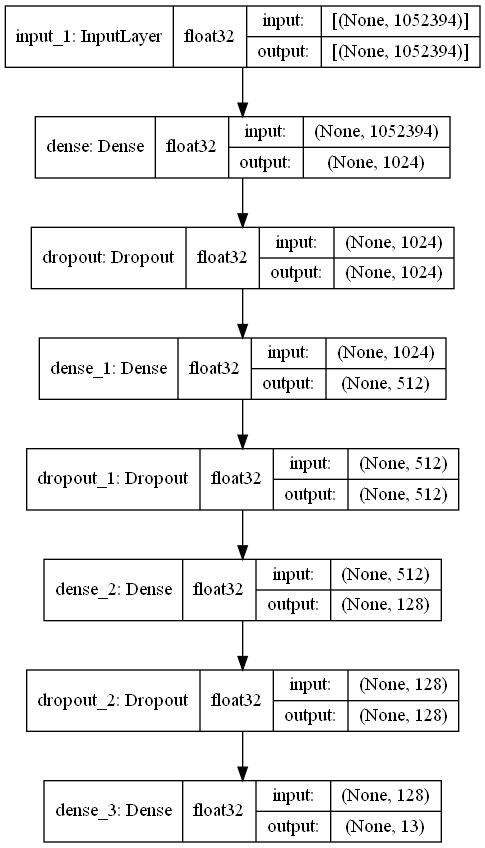

In [6]:
plot_model(modelnn, to_file='modelnn2.png', show_shapes=True, show_dtype=True)

In [6]:
preds = np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test[59], batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)

1/1 [==============================] - 1s 441ms/step   


In [7]:
preds

array([8, 8], dtype=int64)

In [13]:
preds = modelnn.predict(batch_X_generator(vectors_tfidf_test[2], batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1)

1/1 [==============================] - 1s 455ms/step   


In [14]:
preds

array([[1.67634207e-05, 9.94469523e-01, 3.81388527e-04, 1.03509985e-04,
        1.23475766e-05, 9.88802276e-06, 8.87959868e-06, 3.61305516e-04,
        7.55214191e-04, 1.00944439e-04, 1.30694543e-05, 1.21218145e-04,
        3.64608387e-03],
       [1.67634207e-05, 9.94469523e-01, 3.81388527e-04, 1.03509985e-04,
        1.23475766e-05, 9.88802276e-06, 8.87959868e-06, 3.61305516e-04,
        7.55214191e-04, 1.00944439e-04, 1.30694543e-05, 1.21218145e-04,
        3.64608387e-03]], dtype=float32)

In [7]:
from keras.models import load_model
import h5py
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import os
from tensorflow.keras.layers import BatchNormalization

def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch / batch_size
    counter = 0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size * counter:batch_size * (counter + 1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if counter > number_of_batches:
            counter = 0


def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch / batch_size
    counter = 0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size * counter:batch_size * (counter + 1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter = 0

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
batch = 256
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        min_delta=1e-4,
        patience=1,
        verbose=1,
        restore_best_weights=True),
    ModelCheckpoint(filepath='modeltestnn.{epoch}-{val_loss}.h5', verbose=1, save_weights_only=True)
]
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf.shape[1]))
modelnn.add(Dropout(0.7))
modelnn.add(BatchNormalization())
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(BatchNormalization())
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(BatchNormalization())
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=10,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch),
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch, callbacks=callbacks)
preds = np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch,
                                  verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(modelnn.summary())
modelnn.save_weights('modeltestnn_weights.h5')
# modelnn.save('bestnn_fullmodel_end.h5')

Epoch 1/10
2383/2383 [==============================] - 12356s 5s/step - loss: 0.6163 - accuracy: 0.8117 - val_loss: 0.3823 - val_accuracy: 0.8693

Epoch 00001: saving model to modeltestnn.1-0.3823411464691162.h5
Epoch 2/10
2383/2383 [==============================] - 12418s 5s/step - loss: 0.2882 - accuracy: 0.9086 - val_loss: 0.4272 - val_accuracy: 0.8755

Epoch 00002: saving model to modeltestnn.2-0.42724350094795227.h5
Epoch 3/10


KeyboardInterrupt: 

### остальные модели

In [3]:
def dummy_fun(doc):
    return doc

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

def dummy_fun(doc):
    return doc

# data = pd.read_csv('news_all_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})
# data = pd.read_csv('news_all_stem_tokens_nltk', converters={'tokens':ast.literal_eval})
data = pd.read_csv('all_data_withdop_tokens_rd.csv', converters={'tokens':ast.literal_eval})
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
splits=[]
for train_index, test_index in sss.split(data.tokens.values, data.topic.values):
    splits.append((train_index, test_index))
X_train, X_test = data.tokens.values[splits[0][0]], data.tokens.values[splits[0][1]]
Y_train, Y_test = topics[splits[0][0]], topics[splits[0][1]]

In [5]:
topics.tofile('all_topics_ann')
Y_test.tofile('all_y_test_ann')
Y_train.tofile('all_y_train_ann')
sparse.save_npz("tf_idf_unigr_bigr_ann.npz", vectors_tfidf)
sparse.save_npz("tf_idf_test_unigr_bigr_ann.npz", vectors_tfidf_test)

In [5]:
Y_train=np.fromfile('all_y_train_ann',  dtype = np.int)
Y_test=np.fromfile('all_y_test_ann',  dtype = np.int)
topics=np.fromfile('all_topics_ann',  dtype = np.int)
vectors_tfidf = sparse.load_npz("tf_idf_unigr_bigr_ann.npz")
vectors_tfidf_test = sparse.load_npz("tf_idf_test_unigr_bigr_ann.npz")

In [5]:
from sklearn.preprocessing import scale

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def buildWordVectorTfidf(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0
            

# X_train, X_test = data.tokens.values[splits[0][0]], data.tokens.values[splits[0][1]]
# Y_train, Y_test = topics[splits[0][0]], topics[splits[0][1]]
# print('tf-idf unigr ann')
# tfidf=TfidfVectorizer(
#             analyzer='word',
#             tokenizer=dummy_fun,
#             min_df= 10,
#             max_df= 0.8,
#             preprocessor=dummy_fun, 
#             token_pattern=None)
# vectors_tfidf=tfidf.fit_transform(X_train)
# vectors_tfidf_test=tfidf.transform(X_test)
# modelnn = Sequential()
# modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
# modelnn.add(Dropout(0.7))
# modelnn.add(Dense(512, activation='relu'))
# modelnn.add(Dropout(0.5))
# modelnn.add(Dense(128, activation='relu'))
# modelnn.add(Dropout(0.3))
# modelnn.add(Dense(13, activation='softmax'))
# modelnn.compile(optimizer='Adamax',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=7, 
#                       validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
#                       validation_steps=vectors_tfidf_test.shape[0]/128,
#                       steps_per_epoch=vectors_tfidf.shape[0]/128)
# preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=1), axis=-1)
# print(metrics.accuracy_score(Y_test, preds))
# print(metrics.f1_score(Y_test, preds, average='weighted'))
# print(metrics.matthews_corrcoef(Y_test, preds))

# print('tf-idf unigr+bigr ann')
# tfidf=TfidfVectorizer(
#             analyzer='word',
#             tokenizer=dummy_fun,
#             min_df= 10,
#             max_df= 0.8,
#             ngram_range=(1,2),
#             preprocessor=dummy_fun, 
#             token_pattern=None)
# vectors_tfidf=tfidf.fit_transform(X_train)
# vectors_tfidf_test=tfidf.transform(X_test)
# modelnn = Sequential()
# modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
# modelnn.add(Dropout(0.7))
# modelnn.add(Dense(512, activation='relu'))
# modelnn.add(Dropout(0.5))
# modelnn.add(Dense(128, activation='relu'))
# modelnn.add(Dropout(0.3))
# modelnn.add(Dense(13, activation='softmax'))
# modelnn.compile(optimizer='Adamax',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=7, 
#                       validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
#                       validation_steps=vectors_tfidf_test.shape[0]/128,
#                       steps_per_epoch=vectors_tfidf.shape[0]/128)
# preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=1), axis=-1)
# print(metrics.accuracy_score(Y_test, preds))
# print(metrics.f1_score(Y_test, preds, average='weighted'))
# print(metrics.matthews_corrcoef(Y_test, preds))

# modelw2v = gensim.models.Word2Vec.load('modelw2v_unigr_all_best.w2v')
# train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
# test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
# train_vecs_w2v = scale(train_vecs_w2v)
# test_vecs_w2v = scale(test_vecs_w2v)
# modelnn = Sequential()
# modelnn.add(Dense(1024, activation='relu', input_dim=300))
# modelnn.add(Dropout(0.7))
# modelnn.add(Dense(512, activation='relu'))
# modelnn.add(Dropout(0.5))
# modelnn.add(Dense(128, activation='relu'))
# modelnn.add(Dropout(0.3))
# modelnn.add(Dense(13, activation='softmax'))
# modelnn.compile(optimizer='Adamax',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# history = modelnn.fit(train_vecs_w2v, Y_train, epochs=150, batch_size=100,
#                    validation_data=(test_vecs_w2v, Y_test))
# preds=np.argmax(modelnn.predict(test_vecs_w2v), axis=-1)
# print('word2vec unigr ann')
# print(metrics.accuracy_score(Y_test, preds))
# print(metrics.f1_score(Y_test, preds, average='weighted'))
# print(metrics.matthews_corrcoef(Y_test, preds))

# print('word2vec unigr logreg')
# modellg=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
# modellg.fit(train_vecs_w2v, Y_train)
# preds = modellg.predict(test_vecs_w2v)
# print(metrics.accuracy_score(Y_test, preds))
# print(metrics.f1_score(Y_test, preds, average='weighted'))
# print(metrics.matthews_corrcoef(Y_test, preds))

# print('word2vec unigr*tfidf ann')
# vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100)
# matrix = vectorizer.fit_transform([x for x in X_train])
# tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
# train_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_train)])
# test_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_test)])
# train_vecs_w2v = scale(train_vecs_w2v)
# test_vecs_w2v = scale(test_vecs_w2v)
# modelnn = Sequential()
# modelnn.add(Dense(1024, activation='relu', input_dim=300))
# modelnn.add(Dropout(0.7))
# modelnn.add(Dense(512, activation='relu'))
# modelnn.add(Dropout(0.5))
# modelnn.add(Dense(128, activation='relu'))
# modelnn.add(Dropout(0.3))
# modelnn.add(Dense(13, activation='softmax'))
# modelnn.compile(optimizer='Adamax',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# history = modelnn.fit(train_vecs_w2v, Y_train, epochs=150, batch_size=100,
#                    validation_data=(test_vecs_w2v, Y_test))
# preds=np.argmax(modelnn.predict(test_vecs_w2v), axis=-1)
# print(metrics.accuracy_score(Y_test, preds))
# print(metrics.f1_score(Y_test, preds, average='weighted'))
# print(metrics.matthews_corrcoef(Y_test, preds))

# modellg=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
# modellg.fit(train_vecs_w2v, Y_train)
# preds = modellg.predict(test_vecs_w2v)
# print('word2vec unigr*tfidf logreg')
# print(metrics.accuracy_score(Y_test, preds))
# print(metrics.f1_score(Y_test, preds, average='weighted'))
# print(metrics.matthews_corrcoef(Y_test, preds))

# print('word2vec unigr+bigr ann')
# bigram=Phraser.load('bigram_alldata')
# modelw2v = gensim.models.Word2Vec.load('modelw2v_bigr_all_best.w2v')
# X_train=list(bigram[X_train])
# X_test=list(bigram[X_test])
# train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
# test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])
# train_vecs_w2v = scale(train_vecs_w2v)
# test_vecs_w2v = scale(test_vecs_w2v)
# modelnn = Sequential()
# modelnn.add(Dense(1024, activation='relu', input_dim=300))
# modelnn.add(Dropout(0.7))
# modelnn.add(Dense(512, activation='relu'))
# modelnn.add(Dropout(0.5))
# modelnn.add(Dense(128, activation='relu'))
# modelnn.add(Dropout(0.3))
# modelnn.add(Dense(13, activation='softmax'))
# modelnn.compile(optimizer='Adamax',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# history = modelnn.fit(train_vecs_w2v, Y_train, epochs=150, batch_size=100,
#                    validation_data=(test_vecs_w2v, Y_test))
# preds=np.argmax(modelnn.predict(test_vecs_w2v), axis=-1)
# print(metrics.accuracy_score(Y_test, preds))
# print(metrics.f1_score(Y_test, preds, average='weighted'))
# print(metrics.matthews_corrcoef(Y_test, preds))

print('word2vec unigr+bigr logreg')
modellg=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
modellg.fit(train_vecs_w2v, Y_train)
preds = modellg.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

print('word2vec unigr+bigr*tfidf ann')
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
train_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=300))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=150, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
preds=np.argmax(modelnn.predict(test_vecs_w2v), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

modellg=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
modellg.fit(train_vecs_w2v, Y_train)
preds = modellg.predict(test_vecs_w2v)
print('word2vec unigr+bigr*tfidf logreg')
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

word2vec unigr logreg


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 373.5min remaining: 840.3min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 376.2min remaining: 68.4min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 382.2min finished


0.8014834087070234
0.8043054300358252
0.7760050822705833
word2vec unigr*tfidf ann
Epoch 1/150
5873/5873 [==============================] - 21s 3ms/step - loss: 0.8607 - accuracy: 0.7350 - val_loss: 0.5339 - val_accuracy: 0.8164
Epoch 2/150
5873/5873 [==============================] - 19s 3ms/step - loss: 0.6071 - accuracy: 0.8002 - val_loss: 0.5097 - val_accuracy: 0.8224
Epoch 3/150
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5727 - accuracy: 0.8089 - val_loss: 0.4924 - val_accuracy: 0.8248
Epoch 4/150
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5488 - accuracy: 0.8150 - val_loss: 0.4826 - val_accuracy: 0.8294
Epoch 5/150
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5364 - accuracy: 0.8188 - val_loss: 0.4754 - val_accuracy: 0.8300
Epoch 6/150
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5257 - accuracy: 0.8199 - val_loss: 0.4659 - val_accuracy: 0.8321
Epoch 7/150
5873/5873 [===================

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 408.5min remaining: 919.1min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 410.6min remaining: 74.7min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 415.9min finished


word2vec unigr*tfidf logreg
0.7990246826131967
0.801837964142307
0.7732841701828302
word2vec unigr+bigr ann
Epoch 1/150
5873/5873 [==============================] - 20s 3ms/step - loss: 0.8481 - accuracy: 0.7373 - val_loss: 0.5190 - val_accuracy: 0.8205
Epoch 2/150
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5896 - accuracy: 0.8056 - val_loss: 0.4916 - val_accuracy: 0.8261
Epoch 3/150
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5547 - accuracy: 0.8126 - val_loss: 0.4742 - val_accuracy: 0.8299
Epoch 4/150
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5340 - accuracy: 0.8180 - val_loss: 0.4666 - val_accuracy: 0.8302
Epoch 5/150
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5197 - accuracy: 0.8217 - val_loss: 0.4610 - val_accuracy: 0.8333
Epoch 6/150
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5114 - accuracy: 0.8244 - val_loss: 0.4515 - val_accuracy: 0.8356
Epoch 7/150
5873

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed: 273.2min remaining: 614.6min
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed: 275.2min remaining: 50.0min


MemoryError: Unable to allocate 1.31 GiB for an array with shape (300, 587296) and data type float64

In [6]:
# print('word2vec unigr+bigr logreg')
# modellg=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
# modellg.fit(train_vecs_w2v, Y_train)
# preds = modellg.predict(test_vecs_w2v)
# print(metrics.accuracy_score(Y_test, preds))
# print(metrics.f1_score(Y_test, preds, average='weighted'))
# print(metrics.matthews_corrcoef(Y_test, preds))

print('word2vec unigr+bigr*tfidf ann')
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
train_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVectorTfidf(z, 300) for z in map(lambda x: x, X_test)])
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=300))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=150, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
preds=np.argmax(modelnn.predict(test_vecs_w2v), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

# modellg=LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
# modellg.fit(train_vecs_w2v, Y_train)
# preds = modellg.predict(test_vecs_w2v)
# print('word2vec unigr+bigr*tfidf logreg')
# print(metrics.accuracy_score(Y_test, preds))
# print(metrics.f1_score(Y_test, preds, average='weighted'))
# print(metrics.matthews_corrcoef(Y_test, preds))

word2vec unigr+bigr*tfidf ann
Epoch 1/150
5873/5873 [==============================] - 21s 3ms/step - loss: 0.8554 - accuracy: 0.7359 - val_loss: 0.5229 - val_accuracy: 0.8179
Epoch 2/150
5873/5873 [==============================] - 20s 3ms/step - loss: 0.6048 - accuracy: 0.8020 - val_loss: 0.4979 - val_accuracy: 0.8242
Epoch 3/150
5873/5873 [==============================] - 20s 3ms/step - loss: 0.5650 - accuracy: 0.8107 - val_loss: 0.4855 - val_accuracy: 0.8258
Epoch 4/150
5873/5873 [==============================] - 20s 3ms/step - loss: 0.5472 - accuracy: 0.8156 - val_loss: 0.4738 - val_accuracy: 0.8299
Epoch 5/150
5873/5873 [==============================] - 20s 3ms/step - loss: 0.5334 - accuracy: 0.8185 - val_loss: 0.4711 - val_accuracy: 0.8314
Epoch 6/150
5873/5873 [==============================] - 20s 3ms/step - loss: 0.5232 - accuracy: 0.8216 - val_loss: 0.4610 - val_accuracy: 0.8328
Epoch 7/150
5873/5873 [==============================] - 20s 3ms/step - loss: 0.5166 - accurac

In [12]:
preds=np.argmax(modelnn.predict(test_vecs_w2v), axis=-1)
print('word2vec unigr ann')
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

word2vec unigr ann
0.852776112897074
0.8495514680550192
0.8311171462865263


In [4]:
from sklearn.preprocessing import scale

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def buildWordVectorTfidf(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0
            

print('tf-idf unigr+bigr ann')
tfidf=TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 100,
            max_df= 0.75,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
vectors_tfidf=tfidf.fit_transform(X_train)
vectors_tfidf_test=tfidf.transform(X_test)
print('tf-idf')
batch=128
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=7, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch)
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

tf-idf unigr+bigr ann
tf-idf
Epoch 1/7
4588/4588 [==============================] - 334s 73ms/step - loss: 0.8375 - accuracy: 0.7377 - val_loss: 0.4113 - val_accuracy: 0.8594
Epoch 2/7
4588/4588 [==============================] - 330s 72ms/step - loss: 0.3898 - accuracy: 0.8720 - val_loss: 0.3890 - val_accuracy: 0.8675
Epoch 3/7
4588/4588 [==============================] - 345s 75ms/step - loss: 0.3081 - accuracy: 0.8983 - val_loss: 0.3919 - val_accuracy: 0.8701
Epoch 4/7
4588/4588 [==============================] - 341s 74ms/step - loss: 0.2428 - accuracy: 0.9198 - val_loss: 0.4120 - val_accuracy: 0.8713
Epoch 5/7
4588/4588 [==============================] - 346s 75ms/step - loss: 0.1877 - accuracy: 0.9386 - val_loss: 0.4419 - val_accuracy: 0.8709
Epoch 6/7
4588/4588 [==============================] - 349s 76ms/step - loss: 0.1436 - accuracy: 0.9543 - val_loss: 0.4921 - val_accuracy: 0.8707
Epoch 7/7
1147/1147 [==============================] - 69s 60ms/step
0.8702800632049257
0.86990

In [5]:
print('tf-idf unigr+bigr ann')
tfidf=TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 50,
            max_df= 0.75,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
vectors_tfidf=tfidf.fit_transform(X_train)
vectors_tfidf_test=tfidf.transform(X_test)
print('tf-idf')
batch=128
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=7, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch)
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

tf-idf unigr+bigr ann
tf-idf
Epoch 1/7
4588/4588 [==============================] - 577s 126ms/step - loss: 0.8338 - accuracy: 0.7399 - val_loss: 0.4031 - val_accuracy: 0.8624
Epoch 2/7
4588/4588 [==============================] - 623s 136ms/step - loss: 0.3681 - accuracy: 0.8807 - val_loss: 0.3847 - val_accuracy: 0.8702
Epoch 3/7
4588/4588 [==============================] - 641s 140ms/step - loss: 0.2679 - accuracy: 0.9128 - val_loss: 0.3988 - val_accuracy: 0.8725
Epoch 4/7
4588/4588 [==============================] - 652s 142ms/step - loss: 0.1954 - accuracy: 0.9371 - val_loss: 0.4291 - val_accuracy: 0.8728
Epoch 5/7
4588/4588 [==============================] - 660s 144ms/step - loss: 0.1361 - accuracy: 0.9568 - val_loss: 0.4847 - val_accuracy: 0.8723
Epoch 6/7
4588/4588 [==============================] - 642s 140ms/step - loss: 0.0941 - accuracy: 0.9711 - val_loss: 0.5425 - val_accuracy: 0.8715
Epoch 7/7
1147/1147 [==============================] - 128s 112ms/step
0.8703413610853812

In [7]:
from sklearn.preprocessing import scale

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def buildWordVectorTfidf(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0
            

print('tf-idf unigr+bigr ann')
# tfidf=TfidfVectorizer(
#             analyzer='word',
#             tokenizer=dummy_fun,
#             min_df= 75,
#             max_df= 0.8,
#             ngram_range=(1,2),
#             preprocessor=dummy_fun, 
#             token_pattern=Novne)
# vectors_tfidf=tfidf.fit_transform(X_train)
# vectors_tfidf_test=tfidf.transform(X_test)
print('tf-idf')
batch=128
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=4, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch)
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

tf-idf unigr+bigr ann
tf-idf
Epoch 1/4
4588/4588 [==============================] - 450s 98ms/step - loss: 0.8408 - accuracy: 0.7379 - val_loss: 0.4057 - val_accuracy: 0.8603
Epoch 2/4
4588/4588 [==============================] - 399s 87ms/step - loss: 0.3807 - accuracy: 0.8755 - val_loss: 0.3852 - val_accuracy: 0.8689
Epoch 3/4
4588/4588 [==============================] - 447s 97ms/step - loss: 0.2915 - accuracy: 0.9037 - val_loss: 0.3910 - val_accuracy: 0.8720
Epoch 4/4
1147/1147 [==============================] - 90s 79ms/step
0.8722960823843513
0.8720099341162685
0.8537993793296186


In [8]:
from sklearn.preprocessing import scale

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def buildWordVectorTfidf(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0
            

print('tf-idf unigr+bigr ann')
tfidf=TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 70,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
vectors_tfidf=tfidf.fit_transform(X_train)
vectors_tfidf_test=tfidf.transform(X_test)
print('tf-idf')
batch=128
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=7, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch)
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

tf-idf unigr+bigr ann
tf-idf
Epoch 1/7
4588/4588 [==============================] - 429s 94ms/step - loss: 0.8387 - accuracy: 0.7390 - val_loss: 0.4084 - val_accuracy: 0.8602
Epoch 2/7
4588/4588 [==============================] - 460s 100ms/step - loss: 0.3812 - accuracy: 0.8762 - val_loss: 0.3872 - val_accuracy: 0.8692
Epoch 3/7
4588/4588 [==============================] - 472s 103ms/step - loss: 0.2896 - accuracy: 0.9045 - val_loss: 0.3950 - val_accuracy: 0.8717
Epoch 4/7
4588/4588 [==============================] - 474s 103ms/step - loss: 0.2201 - accuracy: 0.9287 - val_loss: 0.4191 - val_accuracy: 0.8727
Epoch 5/7
4588/4588 [==============================] - 475s 104ms/step - loss: 0.1624 - accuracy: 0.9483 - val_loss: 0.4605 - val_accuracy: 0.8720
Epoch 6/7
4588/4588 [==============================] - 475s 103ms/step - loss: 0.1174 - accuracy: 0.9628 - val_loss: 0.5097 - val_accuracy: 0.8712
Epoch 7/7
1147/1147 [==============================] - 99s 86ms/step
0.870293684956138
0.8

In [3]:
from sklearn.preprocessing import scale

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def buildWordVectorTfidf(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0
            

print('tf-idf unigr+bigr ann')
tfidf=TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 60,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
vectors_tfidf=tfidf.fit_transform(X_train)
vectors_tfidf_test=tfidf.transform(X_test)
print('tf-idf')
batch=128
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=7, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch)
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

tf-idf unigr+bigr ann
tf-idf
Epoch 1/7
4588/4588 [==============================] - 535s 116ms/step - loss: 0.8439 - accuracy: 0.7384 - val_loss: 0.4065 - val_accuracy: 0.8608
Epoch 2/7
4588/4588 [==============================] - 543s 118ms/step - loss: 0.3746 - accuracy: 0.8774 - val_loss: 0.3866 - val_accuracy: 0.8695
Epoch 3/7
4588/4588 [==============================] - 552s 120ms/step - loss: 0.2807 - accuracy: 0.9078 - val_loss: 0.3949 - val_accuracy: 0.8725
Epoch 4/7
4588/4588 [==============================] - 547s 119ms/step - loss: 0.2097 - accuracy: 0.9324 - val_loss: 0.4249 - val_accuracy: 0.8730
Epoch 5/7
4588/4588 [==============================] - 556s 121ms/step - loss: 0.1516 - accuracy: 0.9520 - val_loss: 0.4691 - val_accuracy: 0.8718
Epoch 6/7
4588/4588 [==============================] - 549s 120ms/step - loss: 0.1066 - accuracy: 0.9664 - val_loss: 0.5243 - val_accuracy: 0.8708
Epoch 7/7
1147/1147 [==============================] - 113s 98ms/step
0.8704094698414429


In [5]:
from sklearn.preprocessing import scale

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def buildWordVectorTfidf(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0
            

print('tf-idf unigr+bigr ann')
tfidf=TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 10,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
vectors_tfidf=tfidf.fit_transform(X_train)
vectors_tfidf_test=tfidf.transform(X_test)
print('tf-idf')
batch=256
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=7, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch)
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

tf-idf unigr+bigr ann
tf-idf
Epoch 1/7
2383/2383 [==============================] - 11965s 5s/step - loss: 0.6175 - accuracy: 0.8078 - val_loss: 0.3949 - val_accuracy: 0.8675
Epoch 2/7
2383/2383 [==============================] - 12138s 5s/step - loss: 0.2916 - accuracy: 0.9069 - val_loss: 0.3798 - val_accuracy: 0.8763
Epoch 3/7
2383/2383 [==============================] - 12247s 5s/step - loss: 0.1602 - accuracy: 0.9503 - val_loss: 0.4146 - val_accuracy: 0.8773
Epoch 4/7
 128/2383 [>.............................] - ETA: 3:00:55 - loss: 0.1104 - accuracy: 0.9664

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-85f58d8f0fa9>", line 84, in <module>
    history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=7,
  File "c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1188, in fit
    tmp_logs = self.train_function(iterator)
  File "c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "c:\users\ekazah\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\eager\def_function.py", line 913, in _call
    return self._stateless_fn(*args, **kwds)  # pylint: disable=not-callable
  File "c:\users\ekazah\appdata\lo

TypeError: object of type 'NoneType' has no len()

In [8]:
batch=512
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

297/297 [==============================] - 811s 3s/step
0.8777104800860012
0.8773445111397042
0.8610049585915129


In [10]:
unique_topics=np.unique(lbl.inverse_transform(topics)).tolist()
print(classification_report(Y_test, preds, target_names=unique_topics))

                   precision    recall  f1-score   support

      Бывший СССР       0.89      0.90      0.90     10562
              Дом       0.91      0.88      0.89      5199
         Из жизни       0.76      0.72      0.74      6462
   Интернет и СМИ       0.86      0.79      0.82      9893
         Культура       0.91      0.92      0.91     10747
              Мир       0.85      0.88      0.86     27237
  Наука и техника       0.90      0.89      0.90     10551
      Путешествия       0.85      0.85      0.85      2084
           Россия       0.86      0.87      0.86     31978
Силовые структуры       0.83      0.76      0.80      5185
            Спорт       0.97      0.98      0.98     12876
         Ценности       0.96      0.91      0.94      2425
        Экономика       0.89      0.91      0.90     17357

         accuracy                           0.88    152556
        macro avg       0.88      0.87      0.87    152556
     weighted avg       0.88      0.88      0.88    15

In [14]:
import h5py
from keras.models import load_model

modelnn.save('best_ann_alldatadop_0810.h5')

NotImplementedError: Layer ModuleWrapper has arguments in `__init__` and therefore must override `get_config`.

#### Разные размеры словаря

In [ ]:
from sklearn.preprocessing import scale

def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def buildWordVectorTfidf(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0
            

print('tf-idf unigr+bigr ann')
tfidf=TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 60,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
vectors_tfidf=tfidf.fit_transform(X_train)
vectors_tfidf_test=tfidf.transform(X_test)
print('tf-idf')
batch=512
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=4, 
                       validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                        validation_steps=vectors_tfidf_test.shape[0]/batch,
                       steps_per_epoch=vectors_tfidf.shape[0]/batch)
                      
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

Epoch 1/4
   4/1147 [..............................] - ETA: 7:53:23 - loss: 2.5584 - accuracy: 0.1321

In [10]:
from sklearn.utils import class_weight

cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=Y_train)
class_weight_dict = dict(enumerate(cw))

In [6]:
topics.tofile('all_topics_ann_0875')
Y_test.tofile('all_y_test_ann_0875')
Y_train.tofile('all_y_train_ann_0875')
sparse.save_npz("tf_idf_unigr_bigr_ann_0875.npz", vectors_tfidf)
sparse.save_npz("tf_idf_test_unigr_bigr_ann_0875.npz", vectors_tfidf_test)

In [11]:

def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0

# print('tf-idf unigr+bigr ann')
# tfidf=TfidfVectorizer(
#             analyzer='word',
#             tokenizer=dummy_fun,
#             min_df= 75,
#             max_df= 0.8,
#             ngram_range=(1,2),
#             preprocessor=dummy_fun, 
#             token_pattern=None)
# vectors_tfidf=tfidf.fit_transform(X_train)
# vectors_tfidf_test=tfidf.transform(X_test)
# print('tf-idf')
batch=128
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=3, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch, class_weight=class_weight_dict)
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/3
4588/4588 [==============================] - 450s 98ms/step - loss: 0.6741 - accuracy: 0.7693 - val_loss: 0.5206 - val_accuracy: 0.8313
Epoch 2/3
4588/4588 [==============================] - 417s 91ms/step - loss: 0.3976 - accuracy: 0.8458 - val_loss: 0.4753 - val_accuracy: 0.8439
Epoch 3/3
1147/1147 [==============================] - 85s 74ms/step
0.852203999346156
0.8540479114707684
0.8332254911289838


In [4]:
Y_train=np.fromfile('all_y_train_ann_0875',  dtype = np.int)
Y_test=np.fromfile('all_y_test_ann_0875',  dtype = np.int)
topics=np.fromfile('all_topics_ann_0875',  dtype = np.int)
vectors_tfidf = sparse.load_npz("tf_idf_unigr_bigr_ann_0875.npz")
vectors_tfidf_test = sparse.load_npz("tf_idf_test_unigr_bigr_ann_0875.npz")

In [3]:
vectors_tfidf.shape[1]

130673

In [63]:
def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0

batch=128
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        min_delta=1e-2,
        patience=2,
        verbose=1)
]
modelnn2 = Sequential()
modelnn2.add(Dense(1024, activation='relu', input_dim=130673))
modelnn2.add(Dropout(0.7))
modelnn2.add(Dense(512, activation='relu'))
modelnn2.add(Dropout(0.5))
modelnn2.add(Dense(128, activation='relu'))
modelnn2.add(Dropout(0.3))
modelnn2.add(Dense(13, activation='softmax'))
modelnn2.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = modelnn2.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=7, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch, callbacks=callbacks)
preds=np.argmax(modelnn2.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

Epoch 1/7
4588/4588 [==============================] - 382s 83ms/step - loss: 0.6035 - accuracy: 0.8099 - val_loss: 0.4109 - val_accuracy: 0.8598
Epoch 2/7
4588/4588 [==============================] - 382s 83ms/step - loss: 0.3696 - accuracy: 0.8789 - val_loss: 0.3882 - val_accuracy: 0.8683
Epoch 3/7
4588/4588 [==============================] - 381s 83ms/step - loss: 0.2820 - accuracy: 0.9079 - val_loss: 0.3969 - val_accuracy: 0.8713
Epoch 4/7
4588/4588 [==============================] - 381s 83ms/step - loss: 0.2143 - accuracy: 0.9306 - val_loss: 0.4220 - val_accuracy: 0.8720
Epoch 5/7
4588/4588 [==============================] - 382s 83ms/step - loss: 0.1590 - accuracy: 0.9490 - val_loss: 0.4559 - val_accuracy: 0.8717
Epoch 00005: early stopping
1147/1147 [==============================] - 77s 67ms/step
0.8717239688334332
0.8712911323584308
0.8531186971632277


In [15]:
import tensorflow as tf

def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0

batch=128
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        min_delta=1e-2,
        patience=2,
        verbose=1)
]
inputlayer = tf.keras.Input(shape=(vectors_tfidf.shape[1]))
x = tf.keras.layers.Dense(1024, activation='relu')(inputlayer)
x = tf.keras.layers.Dropout(0.7)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputlayer = tf.keras.layers.Dense(13)(x)
modelnn2 = tf.keras.Model(inputlayer, outputlayer)
modelnn2.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = modelnn2.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=1, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch, callbacks=callbacks)
preds=np.argmax(modelnn2.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

  45/4588 [..............................] - ETA: 36:58 - loss: 3.8517 - accuracy: 0.1144

KeyboardInterrupt: 

In [16]:
preds=np.argmax(modelnn2.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

1147/1147 [==============================] - 137s 119ms/step
0.11767830872336947
0.12874886156670315
0.08435811236316117


In [17]:
from keras.models import load_model

modelnn2.save('test_fullmodel_2.h5')
del modelnn2
model = load_model('test_fullmodel_2.h5')
preds=np.argmax(model.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

1147/1147 [==============================] - 135s 118ms/step
0.11767830872336947
0.12874886156670315
0.08435811236316117


In [8]:
modelnn2.save_weights('test_model_weights_3.h5', overwrite=True)

In [7]:
modelnn2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 130673)]          0         
_________________________________________________________________
dense (Dense)                (None, 1024)              133810176 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0     

In [64]:
modelnn2.save_weights('test_model_weights_2.h5', overwrite=True)

In [9]:
import tensorflow as tf

# batch=128
# modelnn3 = Sequential([Dense(1024, activation='relu', input_dim=130673), Dropout(0.7), Dense(512, activation='relu'), Dropout(0.5), Dense(128, activation='relu'),
# Dropout(0.3), Dense(13, activation='softmax')])

# Dropout(0.3), Dense(13, activation='softmax')])

# declare input shape 
inputlayer = tf.keras.Input(shape=(130673))
x = tf.keras.layers.Dense(1024, activation='relu')(inputlayer)
x = tf.keras.layers.Dropout(0.7)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputlayer = tf.keras.layers.Dense(13)(x)

# bind all
modelnn4 = tf.keras.Model(inputlayer, outputlayer)
modelnn4.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
modelnn4.load_weights('test_model_weights_3.h5')

In [68]:
preds=np.argmax(modelnn4.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)

1147/1147 [==============================] - 77s 67ms/step


In [11]:
preds=np.argmax(modelnn4.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)

1147/1147 [==============================] - 138s 120ms/step


In [12]:
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.5924508254781234
0.5397645188660019
0.5305452415312154


In [69]:
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.8717239688334332
0.8712911323584308
0.8531186971632277


In [12]:
history2 = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=5, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch, class_weight=class_weight_dict)
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

Epoch 1/5
4588/4588 [==============================] - 400s 87ms/step - loss: 0.2448 - accuracy: 0.8943 - val_loss: 0.4508 - val_accuracy: 0.8568
Epoch 2/5
4588/4588 [==============================] - 403s 88ms/step - loss: 0.1912 - accuracy: 0.9145 - val_loss: 0.4588 - val_accuracy: 0.8603
Epoch 3/5
4588/4588 [==============================] - 388s 85ms/step - loss: 0.1494 - accuracy: 0.9314 - val_loss: 0.4776 - val_accuracy: 0.8629
Epoch 4/5
4588/4588 [==============================] - 389s 85ms/step - loss: 0.1144 - accuracy: 0.9460 - val_loss: 0.5075 - val_accuracy: 0.8633
Epoch 5/5
1147/1147 [==============================] - 79s 69ms/step
0.863925516264371
0.86408609966377
0.8449713866406354


In [21]:
print(metrics.balanced_accuracy_score(Y_test, preds))
print(classification_report(Y_test, preds))

0.8587207561014125
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     10561
           1       0.87      0.90      0.89      4336
           2       0.68      0.70      0.69      5511
           3       0.80      0.82      0.81      8917
           4       0.89      0.92      0.91     10747
           5       0.85      0.86      0.85     27237
           6       0.88      0.89      0.89     10551
           7       0.69      0.81      0.75      1282
           8       0.88      0.81      0.85     31978
           9       0.67      0.74      0.71      3918
          10       0.97      0.98      0.98     12876
          11       0.90      0.92      0.91      1553
          12       0.90      0.90      0.90     17357

    accuracy                           0.86    146824
   macro avg       0.83      0.86      0.85    146824
weighted avg       0.87      0.86      0.86    146824



In [ ]:
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=3, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch)
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1, 
               class_weigt=class_weight_dict)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(estimator = pipeline_svm, X=vectors_tfidf_test, y_true=Y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [6]:
def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0
            

def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0
            

print('tf-idf unigr+bigr ann')
tfidf=TfidfVectorizer(
            analyzer='word',
            tokenizer=dummy_fun,
            min_df= 75,
            max_df= 0.8,
            ngram_range=(1,2),
            preprocessor=dummy_fun, 
            token_pattern=None)
vectors_tfidf=tfidf.fit_transform(X_train)
vectors_tfidf_test=tfidf.transform(X_test)
print('tf-idf')
batch=128
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf[1]))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, batch), epochs=7, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, batch), 
                      validation_steps=vectors_tfidf_test.shape[0]/batch,
                      steps_per_epoch=vectors_tfidf.shape[0]/batch)
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, batch), steps=vectors_tfidf_test.shape[0]/batch, verbose=1), axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

tf-idf unigr+bigr ann
tf-idf
Epoch 1/7
4767/4767 [==============================] - 500s 105ms/step - loss: 0.5970 - accuracy: 0.8124 - val_loss: 0.4038 - val_accuracy: 0.8625
Epoch 2/7
4767/4767 [==============================] - 490s 103ms/step - loss: 0.3610 - accuracy: 0.8816 - val_loss: 0.3820 - val_accuracy: 0.8705
Epoch 3/7
4767/4767 [==============================] - 475s 100ms/step - loss: 0.2742 - accuracy: 0.9099 - val_loss: 0.3922 - val_accuracy: 0.8733
Epoch 4/7
4767/4767 [==============================] - 484s 101ms/step - loss: 0.2075 - accuracy: 0.9327 - val_loss: 0.4171 - val_accuracy: 0.8733
Epoch 5/7
4767/4767 [==============================] - 482s 101ms/step - loss: 0.1533 - accuracy: 0.9508 - val_loss: 0.4568 - val_accuracy: 0.8733
Epoch 6/7
4767/4767 [==============================] - 478s 100ms/step - loss: 0.1110 - accuracy: 0.9652 - val_loss: 0.5086 - val_accuracy: 0.8719
Epoch 7/7
1191/1191 [==============================] - 85s 71ms/step
0.8711948399276331
0

#### TF-IDF bigrams+unigrams

Веса классов

In [6]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=Y_train)
class_weight_dict = dict(enumerate(class_weights))

In [29]:
class_weight_dict

{0: 1.069344933003891,
 1: 2.604890467889949,
 2: 2.0494767220711965,
 3: 1.26658672716764,
 4: 1.0509611358259756,
 5: 0.414665987908023,
 6: 1.0704344466073212,
 7: 8.81322968876617,
 8: 0.35319064486447804,
 9: 2.882264602820938,
 10: 0.877113644713536,
 11: 7.271304584679766,
 12: 0.6506879745440001}

In [5]:
def dummy_fun(doc):
    return doc

Y_train=np.fromfile('y_train_bigr_all',  dtype = np.int)
Y_test=np.fromfile('y_test_bigr_all',  dtype = np.int)
topics=np.fromfile('topics_bigr_all',  dtype = np.int)

vectors_tfidf = sparse.load_npz("tfidf100_0-75_train_bigr_all.npz")
vectors_tfidf_test = sparse.load_npz("tfidf100_0-75_test_bigr_all.npz")
#v_tfidf_kbest = sparse.load_npz("tfidf100_0-75_train_kbest_bigr.npz")
#v_tfidf_kbest_test = sparse.load_npz("tfidf100_0-75_test_kbest_bigr.npz")

#svd_model = pickle.load(open("tsvd200_bigr.pkl", 'rb'))
#svd_test = np.load('svd_test_bigr.npy')
#svd_train = np.load('svd_train_bigr.npy')

tfidf100075 = pickle.load(open("tfidf_100_0-75_bigr_all.pkl", 'rb'))
#kbest_selector = pickle.load(open("kbest_25000_bigr.pkl", 'rb'))
class_label = pickle.load(open("lbl_bigr_all.pkl", 'rb'))

unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()

In [6]:
vectors_tfidf.shape[1]

63962

Нужно сделать генератор для передачи данных нейронке, потому что нейронка не принимает sparse, а dense слишком большой

In [7]:
def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0

In [30]:
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=vectors_tfidf.shape[1]))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'vectors_tfidf' is not defined

In [ ]:
#2 hidden layers 512 256 128 Adamax
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=10, steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(vectors_tfidf, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(vectors_tfidf_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [31]:
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

573/573 [==============================] - 15s 26ms/step - loss: 0.8705 - accuracy: 0.8446
Testing Accuracy:  0.8446


In [32]:
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf, Y_train, 128), steps=vectors_tfidf.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

2294/2294 [==============================] - 59s 26ms/step - loss: 0.0024 - accuracy: 0.9998
Testing Accuracy:  0.9998


In [ ]:
#2 hidden layers 1024 512 Adamax
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5, steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [41]:
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

573/573 [==============================] - 14s 25ms/step - loss: 0.6326 - accuracy: 0.8452
Testing Accuracy:  0.8452


In [43]:
#3 hidden layers 1024 512 128 Adamax
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5, steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
2294/2294 [==============================] - 63s 26ms/step - loss: 0.8661 - accuracy: 0.7297
Epoch 2/5
2294/2294 [==============================] - 60s 26ms/step - loss: 0.3586 - accuracy: 0.8803
Epoch 3/5
2294/2294 [==============================] - 60s 26ms/step - loss: 0.2400 - accuracy: 0.9192
Epoch 4/5
2294/2294 [==============================] - 60s 26ms/step - loss: 0.1387 - accuracy: 0.9547
Epoch 5/5
573/573 [==============================] - 15s 25ms/step - loss: 0.7238 - accuracy: 0.8471
Testing Accuracy:  0.8471


In [7]:
#3 hidden layers 1024 512 128 Adamax с весами классов 20 epochs все данные
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128, epochs=20, 
                      steps_per_epoch=vectors_tfidf.shape[0]/128, class_weight=class_weight_dict)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
4588/4588 [==============================] - 185s 40ms/step - loss: 0.7673 - accuracy: 0.7489 - val_loss: 0.4904 - val_accuracy: 0.8341
Epoch 2/20
4588/4588 [==============================] - 181s 40ms/step - loss: 0.3266 - accuracy: 0.8586 - val_loss: 0.4655 - val_accuracy: 0.8425
Epoch 3/20
4588/4588 [==============================] - 180s 39ms/step - loss: 0.2277 - accuracy: 0.8895 - val_loss: 0.4584 - val_accuracy: 0.8499
Epoch 4/20
4588/4588 [==============================] - 180s 39ms/step - loss: 0.1530 - accuracy: 0.9185 - val_loss: 0.4950 - val_accuracy: 0.8539
Epoch 5/20
4588/4588 [==============================] - 180s 39ms/step - loss: 0.0947 - accuracy: 0.9460 - val_loss: 0.5457 - val_accuracy: 0.8570
Epoch 6/20
4588/4588 [==============================] - 180s 39ms/step - loss: 0.0536 - accuracy: 0.9680 - val_loss: 0.6414 - v

KeyboardInterrupt: 

In [8]:
preds=modelnn.predict(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
preds=np.argmax(preds, axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))
print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=unique_topics))

1147/1147 [==============================] - 35s 31ms/step
0.8574006974336621
0.8571854200425131
0.8369416272984969

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.88      0.88      0.88     10561
              Дом       0.85      0.90      0.87      4336
         Из жизни       0.68      0.66      0.67      5511
   Интернет и СМИ       0.81      0.77      0.79      8917
         Культура       0.89      0.91      0.90     10747
              Мир       0.84      0.85      0.84     27237
  Наука и техника       0.87      0.88      0.88     10551
      Путешествия       0.72      0.80      0.76      1282
           Россия       0.85      0.83      0.84     31978
Силовые структуры       0.69      0.71      0.70      3918
            Спорт       0.98      0.97      0.97     12876
         Ценности       0.92      0.91      0.91      1553
        Экономика       0.89      0.90      0.89     17357

         accuracy               

In [27]:
#3 hidden layers 1024 512 128 Adamax с весами классов 20 epochs
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), validation_steps=vectors_tfidf_test.shape[0]/128, epochs=10, steps_per_epoch=vectors_tfidf.shape[0]/128, class_weight=class_weight_dict)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
2294/2294 [==============================] - 69s 30ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 1.0728 - val_accuracy: 0.8429
Epoch 2/10
2294/2294 [==============================] - 68s 30ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 1.1287 - val_accuracy: 0.8437
Epoch 3/10
2294/2294 [==============================] - 68s 30ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.1939 - val_accuracy: 0.8436
Epoch 4/10
2294/2294 [==============================] - 69s 30ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 1.2374 - val_accuracy: 0.8438
Epoch 5/10
2294/2294 [==============================] - 69s 30ms/step - loss: 6.6314e-04 - accuracy: 0.9998 - val_loss: 1.2792 - val_accuracy: 0.8444
Epoch 6/10
2294/2294 [==============================] - 68s 30ms/step - loss: 5.5324e-04 - accuracy: 0.9998 - val_loss: 1.3167 - val_accuracy: 0.8431
Epoch 7/10
2294/2294 [==============================] - 68s 30ms/step - loss: 4.9264e-04 - accuracy: 0.9998 - val_lo

In [28]:
preds=modelnn.predict(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)

573/573 [==============================] - 13s 23ms/step


In [29]:
preds=np.argmax(preds, axis=-1)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))
print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=unique_topics))

0.8431319130387402
0.8433210250860219
0.8208942255582671

Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.86      0.87      0.86      5254
              Дом       0.85      0.87      0.86      2153
         Из жизни       0.64      0.65      0.64      2755
   Интернет и СМИ       0.78      0.77      0.77      4489
         Культура       0.90      0.89      0.89      5426
              Мир       0.81      0.85      0.83     13546
  Наука и техника       0.86      0.87      0.87      5286
      Путешествия       0.71      0.76      0.73       640
           Россия       0.86      0.80      0.83     16016
Силовые структуры       0.64      0.68      0.66      1951
            Спорт       0.96      0.97      0.97      6422
         Ценности       0.86      0.90      0.88       786
        Экономика       0.89      0.87      0.88      8688

         accuracy                           0.84     73412
        macro avg       0.82    

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


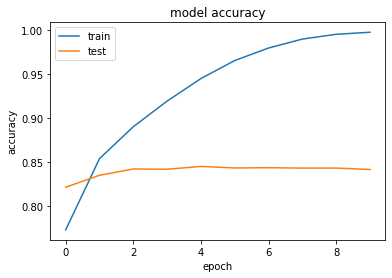

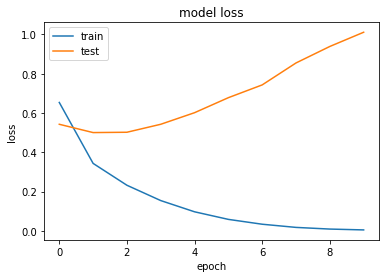

In [26]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


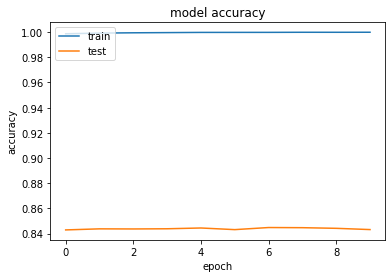

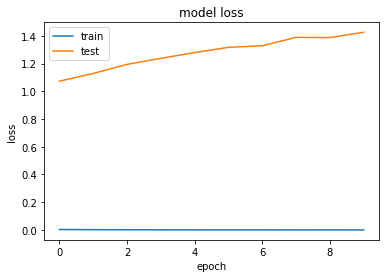

In [30]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
#3 hidden layers 1024 512 128 Adamax с randomoversampling 10 epochs
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), validation_steps=vectors_tfidf_test.shape[0]/128, epochs=10, steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
6506/6506 [==============================] - 171s 26ms/step - loss: 0.5436 - accuracy: 0.8309 - val_loss: 3.5516 - val_accuracy: 0.2777
Epoch 2/10
6506/6506 [==============================] - 170s 26ms/step - loss: 0.2877 - accuracy: 0.9070 - val_loss: 2.9617 - val_accuracy: 0.3762
Epoch 3/10
6506/6506 [==============================] - 172s 26ms/step - loss: 0.1837 - accuracy: 0.9393 - val_loss: 2.4984 - val_accuracy: 0.5012
Epoch 4/10
6506/6506 [==============================] - 172s 26ms/step - loss: 0.1039 - accuracy: 0.9667 - val_loss: 1.9136 - val_accuracy: 0.6492
Epoch 5/10
6506/6506 [==============================] - 171s 26ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 1.6660 - val_accuracy: 0.7318
Epoch 6/10
6506/6506 [==============================] - 171s 26ms/step - loss: 0.0187 - accuracy: 0.9947 - val_loss: 1.6810 - val_accuracy: 0.7605
Epoch 7/10
1889/6506 [=======>......................] - ETA: 1:53 - loss: 0.0088 - accuracy: 0.9975

KeyboardInterrupt: 

In [45]:
#3 hidden layers 1024 512 128 Adamax с under-sampling Tomek links 5 epochs
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), validation_steps=vectors_tfidf_test.shape[0]/128, epochs=5, steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
1813/1813 [==============================] - 59s 32ms/step - loss: 1.3184 - accuracy: 0.7034 - val_loss: 8.8688 - val_accuracy: 0.1183
Epoch 2/5
1813/1813 [==============================] - 59s 33ms/step - loss: 0.9001 - accuracy: 0.7993 - val_loss: 7.9660 - val_accuracy: 0.1183
Epoch 3/5
1813/1813 [==============================] - 59s 33ms/step - loss: 0.4751 - accuracy: 0.8751 - val_loss: 8.6295 - val_accuracy: 0.1189
Epoch 4/5
1813/1813 [==============================] - 58s 32ms/step - loss: 0.2547 - accuracy: 0.9248 - val_loss: 9.1258 - val_accuracy: 0.1335
Epoch 5/5
573/573 [==============================] - 14s 24ms/step - loss: 9.4022 - accuracy: 0.1638
Testing Accuracy:  0.1638


In [59]:
#3 hidden layers 1024 512 128 уменьшение dropout 5 epochs
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), validation_steps=vectors_tfidf_test.shape[0]/128, 
                      epochs=5, steps_per_epoch=vectors_tfidf.shape[0]/128, class_weight=class_weight_dict)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
2294/2294 [==============================] - 71s 31ms/step - loss: 0.9462 - accuracy: 0.6984 - val_loss: 0.5464 - val_accuracy: 0.8201
Epoch 2/5
2294/2294 [==============================] - 70s 30ms/step - loss: 0.3537 - accuracy: 0.8506 - val_loss: 0.4988 - val_accuracy: 0.8339
Epoch 3/5
2294/2294 [==============================] - 70s 30ms/step - loss: 0.2445 - accuracy: 0.8848 - val_loss: 0.5018 - val_accuracy: 0.8404
Epoch 4/5
2294/2294 [==============================] - 70s 31ms/step - loss: 0.1668 - accuracy: 0.9137 - val_loss: 0.5225 - val_accuracy: 0.8443
Epoch 5/5
573/573 [==============================] - 14s 24ms/step - loss: 0.5803 - accuracy: 0.8434
Testing Accuracy:  0.8434


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


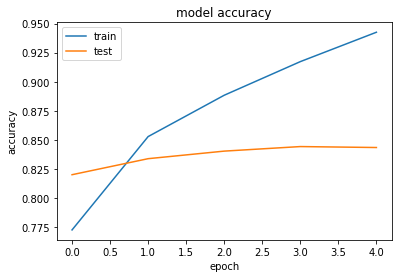

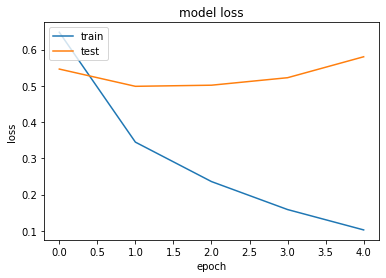

In [60]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### TF-IDF unigrams

In [6]:
vectors_tfidf.shape

(587296, 15000)

Нужно сделать генератор для передачи данных нейронке, потому что нейронка не принимает sparse, а dense слишком большой

In [5]:
def batch_generator(X_data, Y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(Y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        Y_batch = Y_data[index_batch]
        counter += 1
        yield X_batch, Y_batch
        if (counter > number_of_batches):
            counter=0

In [12]:
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=20184))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=91195))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#3 hidden layers 1024 512 128 Adamax softmax все данные input dim 17k, то есть меньше
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
4588/4588 [==============================] - 68s 15ms/step - loss: 0.7407 - accuracy: 0.7658 - val_loss: 0.4167 - val_accuracy: 0.8537
Epoch 2/5
4588/4588 [==============================] - 69s 15ms/step - loss: 0.3933 - accuracy: 0.8649 - val_loss: 0.3996 - val_accuracy: 0.8592
Epoch 3/5
4588/4588 [==============================] - 69s 15ms/step - loss: 0.3175 - accuracy: 0.8893 - val_loss: 0.4118 - val_accuracy: 0.8618
Epoch 4/5
4588/4588 [==============================] - 69s 15ms/step - loss: 0.2395 - accuracy: 0.9159 - val_loss: 0.4475 - val_accuracy: 0.8620
Epoch 5/5
1147/1147 [==============================] - 13s 11ms/step - loss: 0.5192 - accuracy: 0.8611
Testing Accuracy:  0.8611


In [13]:
#3 hidden layers 1024 512 128 Adamax softmax все данные input dim 20184
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
4588/4588 [==============================] - 71s 15ms/step - loss: 0.7449 - accuracy: 0.7650 - val_loss: 0.4193 - val_accuracy: 0.8523
Epoch 2/5
4588/4588 [==============================] - 71s 15ms/step - loss: 0.3968 - accuracy: 0.8634 - val_loss: 0.4007 - val_accuracy: 0.8594
Epoch 3/5
4588/4588 [==============================] - 70s 15ms/step - loss: 0.3195 - accuracy: 0.8887 - val_loss: 0.4094 - val_accuracy: 0.8624
Epoch 4/5
4588/4588 [==============================] - 70s 15ms/step - loss: 0.2438 - accuracy: 0.9145 - val_loss: 0.4445 - val_accuracy: 0.8626
Epoch 5/5
1147/1147 [==============================] - 13s 11ms/step - loss: 0.5148 - accuracy: 0.8613
Testing Accuracy:  0.8613


In [16]:
#3 hidden layers 1024 512 128 Adamax sigmoid все данные input dim 20184
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
4588/4588 [==============================] - 70s 15ms/step - loss: 0.7373 - accuracy: 0.7683 - val_loss: 0.4167 - val_accuracy: 0.8537
Epoch 2/5
4588/4588 [==============================] - 70s 15ms/step - loss: 0.3959 - accuracy: 0.8638 - val_loss: 0.4000 - val_accuracy: 0.8602
Epoch 3/5
4588/4588 [==============================] - 70s 15ms/step - loss: 0.3171 - accuracy: 0.8891 - val_loss: 0.4105 - val_accuracy: 0.8620
Epoch 4/5
4588/4588 [==============================] - 69s 15ms/step - loss: 0.2407 - accuracy: 0.9157 - val_loss: 0.4492 - val_accuracy: 0.8619
Epoch 5/5
1147/1147 [==============================] - 13s 11ms/step - loss: 0.5172 - accuracy: 0.8614
Testing Accuracy:  0.8614


In [21]:
#3 hidden layers 1024 512 128 Adamax softmax все данные input dim 15000
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
4588/4588 [==============================] - 54s 12ms/step - loss: 0.7446 - accuracy: 0.7645 - val_loss: 0.4233 - val_accuracy: 0.8509
Epoch 2/5
4588/4588 [==============================] - 53s 12ms/step - loss: 0.4058 - accuracy: 0.8601 - val_loss: 0.4031 - val_accuracy: 0.8587
Epoch 3/5
4588/4588 [==============================] - 54s 12ms/step - loss: 0.3306 - accuracy: 0.8842 - val_loss: 0.4097 - val_accuracy: 0.8613
Epoch 4/5
4588/4588 [==============================] - 54s 12ms/step - loss: 0.2587 - accuracy: 0.9090 - val_loss: 0.4431 - val_accuracy: 0.8617
Epoch 5/5
1147/1147 [==============================] - 10s 9ms/step - loss: 0.5038 - accuracy: 0.8603
Testing Accuracy:  0.8603


In [25]:
#3 hidden layers 1024 512 128 Adamax softmax все данные input dim 17500
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
4588/4588 [==============================] - 63s 14ms/step - loss: 0.7316 - accuracy: 0.7680 - val_loss: 0.4217 - val_accuracy: 0.8523
Epoch 2/5
4588/4588 [==============================] - 59s 13ms/step - loss: 0.4004 - accuracy: 0.8624 - val_loss: 0.4014 - val_accuracy: 0.8598
Epoch 3/5
4588/4588 [==============================] - 58s 13ms/step - loss: 0.3229 - accuracy: 0.8873 - val_loss: 0.4092 - val_accuracy: 0.8624
Epoch 4/5
4588/4588 [==============================] - 59s 13ms/step - loss: 0.2497 - accuracy: 0.9124 - val_loss: 0.4390 - val_accuracy: 0.8625
Epoch 5/5
1147/1147 [==============================] - 11s 9ms/step - loss: 0.5070 - accuracy: 0.8615
Testing Accuracy:  0.8615


In [8]:
#3 hidden layers 1024 512 128 Adamax softmax все данные input dim 25422
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
4588/4588 [==============================] - 82s 18ms/step - loss: 0.7312 - accuracy: 0.7683 - val_loss: 0.4134 - val_accuracy: 0.8547
Epoch 2/5
4588/4588 [==============================] - 81s 18ms/step - loss: 0.3848 - accuracy: 0.8677 - val_loss: 0.3973 - val_accuracy: 0.8614
Epoch 3/5
4588/4588 [==============================] - 83s 18ms/step - loss: 0.3037 - accuracy: 0.8939 - val_loss: 0.4113 - val_accuracy: 0.8640
Epoch 4/5
4588/4588 [==============================] - 83s 18ms/step - loss: 0.2258 - accuracy: 0.9214 - val_loss: 0.4533 - val_accuracy: 0.8638
Epoch 5/5
1147/1147 [==============================] - 16s 14ms/step - loss: 0.5366 - accuracy: 0.8631
Testing Accuracy:  0.8631


In [12]:
#3 hidden layers 1024 512 128 Adamax softmax все данные input dim 37440
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
4588/4588 [==============================] - 113s 25ms/step - loss: 0.7403 - accuracy: 0.7665 - val_loss: 0.4089 - val_accuracy: 0.8565
Epoch 2/5
4588/4588 [==============================] - 115s 25ms/step - loss: 0.3755 - accuracy: 0.8714 - val_loss: 0.3952 - val_accuracy: 0.8632
Epoch 3/5
4588/4588 [==============================] - 118s 26ms/step - loss: 0.2898 - accuracy: 0.8991 - val_loss: 0.4123 - val_accuracy: 0.8647
Epoch 4/5
4588/4588 [==============================] - 117s 26ms/step - loss: 0.2084 - accuracy: 0.9280 - val_loss: 0.4587 - val_accuracy: 0.8648
Epoch 5/5
1147/1147 [==============================] - 22s 19ms/step - loss: 0.5514 - accuracy: 0.8638
Testing Accuracy:  0.8638


In [15]:
#3 hidden layers 1024 512 128 Adamax softmax все данные input dim 91195
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
4588/4588 [==============================] - 309s 67ms/step - loss: 0.7166 - accuracy: 0.7739 - val_loss: 0.3987 - val_accuracy: 0.8599
Epoch 2/5
4588/4588 [==============================] - 295s 64ms/step - loss: 0.3552 - accuracy: 0.8783 - val_loss: 0.3884 - val_accuracy: 0.8665
Epoch 3/5
4588/4588 [==============================] - 293s 64ms/step - loss: 0.2608 - accuracy: 0.9093 - val_loss: 0.4199 - val_accuracy: 0.8673
Epoch 4/5
4588/4588 [==============================] - 274s 60ms/step - loss: 0.1744 - accuracy: 0.9399 - val_loss: 0.4903 - val_accuracy: 0.8656
Epoch 5/5
1147/1147 [==============================] - 60s 53ms/step - loss: 0.5984 - accuracy: 0.8640
Testing Accuracy:  0.8640


In [18]:
#3 hidden layers 1024 512 128 Adamax softmax все данные input dim 91195
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
4588/4588 [==============================] - 267s 58ms/step - loss: 0.7228 - accuracy: 0.7725 - val_loss: 0.3996 - val_accuracy: 0.8593
Epoch 2/5
4588/4588 [==============================] - 277s 60ms/step - loss: 0.3557 - accuracy: 0.8783 - val_loss: 0.3895 - val_accuracy: 0.8655
Epoch 3/5
4588/4588 [==============================] - 280s 61ms/step - loss: 0.2624 - accuracy: 0.9094 - val_loss: 0.4158 - val_accuracy: 0.8663
Epoch 4/5
4588/4588 [==============================] - 276s 60ms/step - loss: 0.1765 - accuracy: 0.9394 - val_loss: 0.4956 - val_accuracy: 0.8651
Epoch 5/5
1147/1147 [==============================] - 53s 46ms/step - loss: 0.6079 - accuracy: 0.8643
Testing Accuracy:  0.8643


In [9]:
#3 hidden layers 1024 512 128 Adamax softmax все данные input dim 91195 0,7 0,5 0,3
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=10, 
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
4588/4588 [==============================] - 283s 62ms/step - loss: 0.8601 - accuracy: 0.7325 - val_loss: 0.4268 - val_accuracy: 0.8538
Epoch 2/10
4588/4588 [==============================] - 273s 59ms/step - loss: 0.4314 - accuracy: 0.8584 - val_loss: 0.3984 - val_accuracy: 0.8624
Epoch 3/10
4588/4588 [==============================] - 289s 63ms/step - loss: 0.3616 - accuracy: 0.8794 - val_loss: 0.3937 - val_accuracy: 0.8657
Epoch 4/10
4588/4588 [==============================] - 324s 71ms/step - loss: 0.3107 - accuracy: 0.8956 - val_loss: 0.3972 - val_accuracy: 0.8678
Epoch 5/10
4588/4588 [==============================] - 320s 70ms/step - loss: 0.2687 - accuracy: 0.9100 - val_loss: 0.4120 - val_accuracy: 0.8691
Epoch 6/10
4588/4588 [==============================] - 320s 70ms/step - loss: 0.2335 - accuracy: 0.9221 - val_loss: 0.4298 - val_accuracy: 0.8695
Epoch 7/10
4588/4588 [==============================] - 311s 68ms/step - loss: 0.1983 - accuracy: 0.9338 - val_loss: 0

In [12]:
def batch_X_generator(X_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(X_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch].toarray()
        counter += 1
        yield X_batch
        if (counter > number_of_batches):
            counter=0

In [50]:
preds=np.argmax(modelnn.predict(batch_X_generator(vectors_tfidf_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=1), axis=-1)

1147/1147 [==============================] - 55s 48ms/step


In [52]:
print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=unique_topics))
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))


Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.88      0.90      0.89     10561
              Дом       0.88      0.89      0.89      4336
         Из жизни       0.74      0.65      0.69      5511
   Интернет и СМИ       0.82      0.80      0.81      8917
         Культура       0.90      0.92      0.91     10747
              Мир       0.85      0.86      0.86     27237
  Наука и техника       0.89      0.88      0.89     10551
      Путешествия       0.85      0.76      0.80      1282
           Россия       0.85      0.86      0.86     31978
Силовые структуры       0.75      0.68      0.72      3918
            Спорт       0.97      0.98      0.97     12876
         Ценности       0.93      0.90      0.91      1553
        Экономика       0.89      0.90      0.90     17357

         accuracy                           0.87    146824
        macro avg       0.86      0.85      0.85    146824
     weighted avg       0.87  

##### Тюнинг параметров для всех данных 15k features

In [19]:
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=15000))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='ftrl',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#3 hidden layers 1024 512 128 Adamax softmax elu
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
# loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.6300 - accuracy: 0.7970 - val_loss: 0.4371 - val_accuracy: 0.8476
Epoch 2/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.4236 - accuracy: 0.8551 - val_loss: 0.4314 - val_accuracy: 0.8497
Epoch 3/3
1147/1147 [==============================] - 10s 9ms/step - loss: 0.4319 - accuracy: 0.8497


In [14]:
#3 hidden layers 1024 512 128 Adamax softmax sigmoid
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 56s 12ms/step - loss: 1.6621 - accuracy: 0.4531 - val_loss: 0.7080 - val_accuracy: 0.7766
Epoch 2/3
4588/4588 [==============================] - 55s 12ms/step - loss: 0.7888 - accuracy: 0.7538 - val_loss: 0.5778 - val_accuracy: 0.8076
Epoch 3/3
1147/1147 [==============================] - 10s 9ms/step - loss: 0.5251 - accuracy: 0.8213


In [16]:
#3 hidden layers 1024 512 128 Adamax softmax selu
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.6036 - accuracy: 0.8049 - val_loss: 0.4436 - val_accuracy: 0.8473
Epoch 2/3
4588/4588 [==============================] - 55s 12ms/step - loss: 0.4253 - accuracy: 0.8560 - val_loss: 0.4417 - val_accuracy: 0.8486
Epoch 3/3
4588/4588 [==============================] - 55s 12ms/step - loss: 0.3933 - accuracy: 0.8655 - val_loss: 0.4475 - val_accuracy: 0.8475


In [18]:
#3 hidden layers 1024 512 128 Adamax softmax tanh
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.6324 - accuracy: 0.7965 - val_loss: 0.4399 - val_accuracy: 0.8482
Epoch 2/3
4588/4588 [==============================] - 55s 12ms/step - loss: 0.4289 - accuracy: 0.8542 - val_loss: 0.4346 - val_accuracy: 0.8504
Epoch 3/3
4588/4588 [==============================] - 55s 12ms/step - loss: 0.3998 - accuracy: 0.8627 - val_loss: 0.4383 - val_accuracy: 0.8503


In [20]:
#3 hidden layers 1024 512 128 Adamax softmax relu tanh relu
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.7068 - accuracy: 0.7751 - val_loss: 0.4181 - val_accuracy: 0.8518
Epoch 2/3
4588/4588 [==============================] - 55s 12ms/step - loss: 0.3936 - accuracy: 0.8633 - val_loss: 0.4021 - val_accuracy: 0.8591
Epoch 3/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.3153 - accuracy: 0.8881 - val_loss: 0.4123 - val_accuracy: 0.8613


In [23]:
#3 hidden layers 1024 512 128 Adamax softmax relu relu relu 0,7 0,5 0,3
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 54s 12ms/step - loss: 0.3672 - accuracy: 0.8752 - val_loss: 0.4039 - val_accuracy: 0.8603
Epoch 2/3
4588/4588 [==============================] - 53s 12ms/step - loss: 0.3342 - accuracy: 0.8858 - val_loss: 0.4047 - val_accuracy: 0.8625
Epoch 3/3
4588/4588 [==============================] - 52s 11ms/step - loss: 0.3033 - accuracy: 0.8965 - val_loss: 0.4118 - val_accuracy: 0.8635


In [27]:
#3 hidden layers 1024 512 128 Adamax softmax relu relu relu 0,7 0,7 0,7
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.3772 - accuracy: 0.8866 - val_loss: 0.4461 - val_accuracy: 0.8607
Epoch 2/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.3536 - accuracy: 0.8939 - val_loss: 0.4539 - val_accuracy: 0.8612
Epoch 3/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.3290 - accuracy: 0.9017 - val_loss: 0.4638 - val_accuracy: 0.8615


In [31]:
#3 hidden layers 1024 512 128 Adamax softmax relu relu relu 0,7 0,3 0,5
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.3771 - accuracy: 0.8740 - val_loss: 0.4079 - val_accuracy: 0.8594
Epoch 2/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.3434 - accuracy: 0.8838 - val_loss: 0.4098 - val_accuracy: 0.8614
Epoch 3/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.3120 - accuracy: 0.8947 - val_loss: 0.4168 - val_accuracy: 0.8623


In [34]:
#3 hidden layers 1024 512 128 Adamax softmax relu relu relu 0,3 0,5 0,7
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.3340 - accuracy: 0.8937 - val_loss: 0.4397 - val_accuracy: 0.8619
Epoch 2/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.2649 - accuracy: 0.9163 - val_loss: 0.4762 - val_accuracy: 0.8620
Epoch 3/3
4588/4588 [==============================] - 56s 12ms/step - loss: 0.1962 - accuracy: 0.9393 - val_loss: 0.5339 - val_accuracy: 0.8611


поиск оптимизатора

In [6]:
#3 hidden layers 1024 512 128 adam softmax relu relu relu 0,7 0,5 0,3  
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 54s 12ms/step - loss: 0.7207 - accuracy: 0.7711 - val_loss: 0.4197 - val_accuracy: 0.8514
Epoch 2/3
4588/4588 [==============================] - 54s 12ms/step - loss: 0.4357 - accuracy: 0.8551 - val_loss: 0.4052 - val_accuracy: 0.8585
Epoch 3/3
4588/4588 [==============================] - 54s 12ms/step - loss: 0.3698 - accuracy: 0.8748 - val_loss: 0.4111 - val_accuracy: 0.8620


In [8]:
#3 hidden layers 1024 512 128 sgd softmax relu relu relu 0,7 0,5 0,3  
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 54s 12ms/step - loss: 2.3140 - accuracy: 0.2136 - val_loss: 2.0342 - val_accuracy: 0.3335
Epoch 2/3
4588/4588 [==============================] - 54s 12ms/step - loss: 1.8265 - accuracy: 0.4227 - val_loss: 1.1183 - val_accuracy: 0.6698
Epoch 3/3
4588/4588 [==============================] - 53s 12ms/step - loss: 1.1658 - accuracy: 0.6512 - val_loss: 0.8505 - val_accuracy: 0.7423


In [14]:
#3 hidden layers 1024 512 128 rmsprop softmax relu relu relu 0,7 0,5 0,3  
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=6,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/6
4588/4588 [==============================] - 58s 13ms/step - loss: 0.7313 - accuracy: 0.7772 - val_loss: 0.4940 - val_accuracy: 0.8384
Epoch 2/6
4588/4588 [==============================] - 58s 13ms/step - loss: 0.5696 - accuracy: 0.8341 - val_loss: 0.4963 - val_accuracy: 0.8374
Epoch 3/6
4588/4588 [==============================] - 58s 13ms/step - loss: 0.5917 - accuracy: 0.8357 - val_loss: 0.5035 - val_accuracy: 0.8395
Epoch 4/6
4588/4588 [==============================] - 58s 13ms/step - loss: 0.6239 - accuracy: 0.8340 - val_loss: 0.5131 - val_accuracy: 0.8377
Epoch 5/6
4588/4588 [==============================] - 58s 13ms/step - loss: 0.6558 - accuracy: 0.8333 - val_loss: 0.5309 - val_accuracy: 0.8355
Epoch 6/6
4588/4588 [==============================] - 58s 13ms/step - loss: 0.6926 - accuracy: 0.8328 - val_loss: 0.5334 - val_accuracy: 0.8395


In [12]:
#3 hidden layers 1024 512 128 adagrad softmax relu relu relu 0,7 0,5 0,3  
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 54s 12ms/step - loss: 2.4202 - accuracy: 0.2048 - val_loss: 2.2563 - val_accuracy: 0.2178
Epoch 2/3
4588/4588 [==============================] - 55s 12ms/step - loss: 2.2661 - accuracy: 0.2148 - val_loss: 2.2290 - val_accuracy: 0.2178
Epoch 3/3
4588/4588 [==============================] - 54s 12ms/step - loss: 2.2360 - accuracy: 0.2209 - val_loss: 2.1676 - val_accuracy: 0.2181


In [16]:
#3 hidden layers 1024 512 128 adadelta softmax relu relu relu 0,7 0,5 0,3  
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 54s 12ms/step - loss: 2.5570 - accuracy: 0.1084 - val_loss: 2.5249 - val_accuracy: 0.2264
Epoch 2/3
4588/4588 [==============================] - 54s 12ms/step - loss: 2.5112 - accuracy: 0.2088 - val_loss: 2.4573 - val_accuracy: 0.2178
Epoch 3/3
4588/4588 [==============================] - 54s 12ms/step - loss: 2.4367 - accuracy: 0.2140 - val_loss: 2.3604 - val_accuracy: 0.2178


In [18]:
#3 hidden layers 1024 512 128 nadam softmax relu relu relu 0,7 0,5 0,3  
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 87s 19ms/step - loss: 0.7033 - accuracy: 0.7769 - val_loss: 0.4158 - val_accuracy: 0.8532
Epoch 2/3
4588/4588 [==============================] - 86s 19ms/step - loss: 0.4355 - accuracy: 0.8547 - val_loss: 0.4058 - val_accuracy: 0.8587
Epoch 3/3
4588/4588 [==============================] - 86s 19ms/step - loss: 0.3692 - accuracy: 0.8746 - val_loss: 0.4157 - val_accuracy: 0.8606


In [20]:
#3 hidden layers 1024 512 128 ftrl softmax relu relu relu 0,7 0,5 0,3  
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=3,
                      validation_data=batch_generator(vectors_tfidf_test, Y_test, 128), 
                      validation_steps=vectors_tfidf_test.shape[0]/128,
                      steps_per_epoch=vectors_tfidf.shape[0]/128)
#loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
4588/4588 [==============================] - 55s 12ms/step - loss: 2.5373 - accuracy: 0.2169 - val_loss: 2.5008 - val_accuracy: 0.2178
Epoch 2/3
4588/4588 [==============================] - 52s 11ms/step - loss: 2.4939 - accuracy: 0.2171 - val_loss: 2.4756 - val_accuracy: 0.2178
Epoch 3/3
4588/4588 [==============================] - 54s 12ms/step - loss: 2.4672 - accuracy: 0.2171 - val_loss: 2.4139 - val_accuracy: 0.2178


##### Половина данных

In [54]:
#2 hidden layers 512 256 Adamax
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=10, steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
2294/2294 [==============================] - 24s 10ms/step - loss: 0.9314 - accuracy: 0.7155
Epoch 2/10
2294/2294 [==============================] - 23s 10ms/step - loss: 0.4375 - accuracy: 0.8515
Epoch 3/10
2294/2294 [==============================] - 23s 10ms/step - loss: 0.3722 - accuracy: 0.8710
Epoch 4/10
2294/2294 [==============================] - 23s 10ms/step - loss: 0.3238 - accuracy: 0.8870
Epoch 5/10
2294/2294 [==============================] - 23s 10ms/step - loss: 0.2807 - accuracy: 0.9024
Epoch 6/10
2294/2294 [==============================] - 24s 10ms/step - loss: 0.2399 - accuracy: 0.9176
Epoch 7/10
2294/2294 [==============================] - 24s 10ms/step - loss: 0.1997 - accuracy: 0.9321
Epoch 8/10
2294/2294 [==============================] - 24s 10ms/step - loss: 0.1627 - accuracy: 0.9456
Epoch 9/10
2294/2294 [==============================] - 23s 10ms/step - loss: 0.1263 - accuracy: 0.9594
Epoch 10/10
573/573 [==============================] - 6s 10ms/s

In [52]:
#2 hidden layers 1024 512 Adamax
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5, steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
2294/2294 [==============================] - 24s 10ms/step - loss: 0.8185 - accuracy: 0.7429
Epoch 2/5
2294/2294 [==============================] - 24s 11ms/step - loss: 0.4018 - accuracy: 0.8608
Epoch 3/5
2294/2294 [==============================] - 24s 11ms/step - loss: 0.3317 - accuracy: 0.8828
Epoch 4/5
2294/2294 [==============================] - 24s 11ms/step - loss: 0.2726 - accuracy: 0.9042
Epoch 5/5
573/573 [==============================] - 6s 10ms/step - loss: 0.4971 - accuracy: 0.8480
Testing Accuracy:  0.8480


In [50]:
#3 hidden layers 1024 512 128 Adamax
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5, steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
2294/2294 [==============================] - 24s 10ms/step - loss: 0.8956 - accuracy: 0.7206
Epoch 2/5
2294/2294 [==============================] - 24s 10ms/step - loss: 0.4296 - accuracy: 0.8561
Epoch 3/5
2294/2294 [==============================] - 24s 10ms/step - loss: 0.3454 - accuracy: 0.8822
Epoch 4/5
2294/2294 [==============================] - 24s 10ms/step - loss: 0.2672 - accuracy: 0.9084
Epoch 5/5
573/573 [==============================] - 6s 10ms/step - loss: 0.5583 - accuracy: 0.8495
Testing Accuracy:  0.8495


In [57]:
#4 hidden layers 1024 512 128 64 Adamax
history = modelnn.fit(batch_generator(vectors_tfidf, Y_train, 128), epochs=5, steps_per_epoch=vectors_tfidf.shape[0]/128)
loss, accuracy = modelnn.evaluate(batch_generator(vectors_tfidf_test, Y_test, 128), steps=vectors_tfidf_test.shape[0]/128, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
2294/2294 [==============================] - 24s 10ms/step - loss: 1.0635 - accuracy: 0.6744
Epoch 2/5
2294/2294 [==============================] - 23s 10ms/step - loss: 0.5036 - accuracy: 0.8437
Epoch 3/5
2294/2294 [==============================] - 23s 10ms/step - loss: 0.3915 - accuracy: 0.8763
Epoch 4/5
2294/2294 [==============================] - 23s 10ms/step - loss: 0.2937 - accuracy: 0.9073
Epoch 5/5
573/573 [==============================] - 6s 10ms/step - loss: 0.6246 - accuracy: 0.8475
Testing Accuracy:  0.8475


#### word2vec * TF-IDF unigram+bigram

In [ ]:
data = pd.read_csv('news_all_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [4]:
phrases = Phrases(data.tokens.values)
bigram = Phraser(phrases)

In [5]:
phrases.save('phrases_alldata')

In [8]:
bigram.save('bigram_alldata')

In [7]:
bigram=Phraser.load('bigram_alldata')

In [5]:
all_words = list(bigram[data.tokens.values])

In [7]:
modelw2v_bigr = gensim.models.Word2Vec(all_words, workers=12, min_count=100, size=300, iter=30)

In [9]:
modelw2v_bigr.save('modelw2v_bigr_all')

In [17]:
modelw2v_bigr=gensim.models.Word2Vec.load('modelw2v_bigr_all')

Векторы word2vec, усредненные с помощью TF-IDF

In [18]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100)
matrix = vectorizer.fit_transform([x for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(len(tfidf))

NameError: name 'X_train' is not defined

In [39]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v_bigr[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [41]:
from sklearn.preprocessing import scale

In [42]:
# train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

<ipython-input-39-602095c26e08>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec += modelw2v_bigr[word].reshape((1, size)) * tfidf[word]


shape for training set :  (293648, 300) 
shape for test set :  (73412, 300)


In [43]:
train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)

In [103]:
modelnn = Sequential()
modelnn.add(Dense(512, activation='relu', input_dim=300))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(256, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modelnn.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               154112    
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 13)                3341      
Total params: 288,781
Trainable params: 288,781
Non-trainable params: 0
_________________________________________________________________


In [57]:
#default
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpvqwat0_k.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpvqwat0_k.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5873/5873 [==============================] - 25s 953us/step - loss: 0.9186 - accuracy: 0.7184 - val_loss: 0.5519 - val_accuracy: 0.8083
Epoch 2/20
5873/5873 [==============================] - 5s 884us/step - loss: 0.6709 - accuracy: 0.7780 - val_loss: 0.5322 - val_accuracy: 0.8092
Epoch 3/20
5873/5873 [==============================] - 5s 887us/step - loss: 0.6607 - accuracy: 0.7807

In [65]:
#Dropout=0.3
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 4s 1ms/step - loss: 0.7340 - accuracy: 0.7597 - val_loss: 0.5126 - val_accuracy: 0.8169
Epoch 2/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5362 - accuracy: 0.8134 - val_loss: 0.4947 - val_accuracy: 0.8203
Epoch 3/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5178 - accuracy: 0.8171 - val_loss: 0.4868 - val_accuracy: 0.8252
Epoch 4/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5051 - accuracy: 0.8213 - val_loss: 0.4810 - val_accuracy: 0.8268
Epoch 5/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4966 - accuracy: 0.8236 - val_loss: 0.4802 - val_accuracy: 0.8288
Epoch 6/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4936 - accuracy: 0.8243 - val_loss: 0.4787 - val_accuracy: 0.8277
Epoch 7/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4855 - accuracy: 0.8258 - val_loss: 0.4776 - val_accuracy:

In [67]:
#Dropout=0.1
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 4s 1ms/step - loss: 0.6764 - accuracy: 0.7743 - val_loss: 0.5025 - val_accuracy: 0.8217
Epoch 2/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5083 - accuracy: 0.8199 - val_loss: 0.4899 - val_accuracy: 0.8249
Epoch 3/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4806 - accuracy: 0.8285 - val_loss: 0.4796 - val_accuracy: 0.8284
Epoch 4/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4682 - accuracy: 0.8322 - val_loss: 0.4739 - val_accuracy: 0.8304
Epoch 5/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4598 - accuracy: 0.8334 - val_loss: 0.4747 - val_accuracy: 0.8294
Epoch 6/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4507 - accuracy: 0.8369 - val_loss: 0.4705 - val_accuracy: 0.8315
Epoch 7/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4458 - accuracy: 0.8385 - val_loss: 0.4708 - val_accuracy:

In [70]:
#Dropout=0.5
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 4s 1ms/step - loss: 0.8125 - accuracy: 0.7421 - val_loss: 0.5235 - val_accuracy: 0.8136
Epoch 2/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5832 - accuracy: 0.8017 - val_loss: 0.5101 - val_accuracy: 0.8186
Epoch 3/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5633 - accuracy: 0.8058 - val_loss: 0.4983 - val_accuracy: 0.8193
Epoch 4/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5498 - accuracy: 0.8093 - val_loss: 0.4939 - val_accuracy: 0.8220
Epoch 5/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5467 - accuracy: 0.8100 - val_loss: 0.4889 - val_accuracy: 0.8237
Epoch 6/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5426 - accuracy: 0.8111 - val_loss: 0.4901 - val_accuracy: 0.8232
Epoch 7/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5380 - accuracy: 0.8114 - val_loss: 0.4872 - val_accuracy:

In [72]:
#256 dense
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 4s 1ms/step - loss: 0.6795 - accuracy: 0.7744 - val_loss: 0.5028 - val_accuracy: 0.8216
Epoch 2/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5216 - accuracy: 0.8172 - val_loss: 0.4887 - val_accuracy: 0.8251
Epoch 3/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4993 - accuracy: 0.8228 - val_loss: 0.4820 - val_accuracy: 0.8278
Epoch 4/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4857 - accuracy: 0.8267 - val_loss: 0.4789 - val_accuracy: 0.8277
Epoch 5/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4788 - accuracy: 0.8284 - val_loss: 0.4754 - val_accuracy: 0.8306
Epoch 6/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4664 - accuracy: 0.8327 - val_loss: 0.4799 - val_accuracy: 0.8278
Epoch 7/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4617 - accuracy: 0.8326 - val_loss: 0.4659 - val_accuracy:

In [75]:
#SGD optimizer 40 epochs
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5070 - accuracy: 0.8217 - val_loss: 0.4867 - val_accuracy: 0.8252
Epoch 2/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5062 - accuracy: 0.8219 - val_loss: 0.4852 - val_accuracy: 0.8259
Epoch 3/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5044 - accuracy: 0.8227 - val_loss: 0.4839 - val_accuracy: 0.8265
Epoch 4/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.5023 - accuracy: 0.8235 - val_loss: 0.4828 - val_accuracy: 0.8263
Epoch 5/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4997 - accuracy: 0.8241 - val_loss: 0.4813 - val_accuracy: 0.8271
Epoch 6/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4985 - accuracy: 0.8247 - val_loss: 0.4809 - val_accuracy: 0.8270
Epoch 7/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.4977 - accuracy: 0.8244 - val_loss: 0.4801 - val_accuracy:

In [79]:
#hidden layer sigmoid actication
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 4s 1ms/step - loss: 1.3962 - accuracy: 0.5768 - val_loss: 0.7735 - val_accuracy: 0.7546
Epoch 2/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.8196 - accuracy: 0.7419 - val_loss: 0.6823 - val_accuracy: 0.7720
Epoch 3/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.7405 - accuracy: 0.7588 - val_loss: 0.6430 - val_accuracy: 0.7822
Epoch 4/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.7018 - accuracy: 0.7700 - val_loss: 0.6217 - val_accuracy: 0.7880
Epoch 5/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.6790 - accuracy: 0.7755 - val_loss: 0.6069 - val_accuracy: 0.7919
Epoch 6/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.6622 - accuracy: 0.7813 - val_loss: 0.5970 - val_accuracy: 0.7945
Epoch 7/20
2937/2937 [==============================] - 3s 1ms/step - loss: 0.6498 - accuracy: 0.7842 - val_loss: 0.5885 - val_accuracy:

In [83]:
#2 hidden layers
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 5s 2ms/step - loss: 1.2263 - accuracy: 0.6223 - val_loss: 0.6454 - val_accuracy: 0.7857
Epoch 2/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.7377 - accuracy: 0.7655 - val_loss: 0.5959 - val_accuracy: 0.7996
Epoch 3/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.6847 - accuracy: 0.7779 - val_loss: 0.5717 - val_accuracy: 0.8046
Epoch 4/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.6541 - accuracy: 0.7857 - val_loss: 0.5561 - val_accuracy: 0.8085
Epoch 5/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.6359 - accuracy: 0.7905 - val_loss: 0.5456 - val_accuracy: 0.8118
Epoch 6/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.6179 - accuracy: 0.7944 - val_loss: 0.5362 - val_accuracy: 0.8135
Epoch 7/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.6085 - accuracy: 0.7982 - val_loss: 0.5292 - val_accuracy:

In [85]:
#2 hidden layers 128 64
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 5s 1ms/step - loss: 1.2909 - accuracy: 0.6049 - val_loss: 0.6548 - val_accuracy: 0.7862
Epoch 2/20
2937/2937 [==============================] - 4s 1ms/step - loss: 0.7756 - accuracy: 0.7576 - val_loss: 0.6030 - val_accuracy: 0.7982
Epoch 3/20
2937/2937 [==============================] - 4s 1ms/step - loss: 0.7195 - accuracy: 0.7725 - val_loss: 0.5797 - val_accuracy: 0.8023
Epoch 4/20
2937/2937 [==============================] - 4s 1ms/step - loss: 0.6802 - accuracy: 0.7818 - val_loss: 0.5634 - val_accuracy: 0.8064
Epoch 5/20
2937/2937 [==============================] - 4s 1ms/step - loss: 0.6594 - accuracy: 0.7863 - val_loss: 0.5525 - val_accuracy: 0.8082
Epoch 6/20
2937/2937 [==============================] - 4s 1ms/step - loss: 0.6450 - accuracy: 0.7890 - val_loss: 0.5435 - val_accuracy: 0.8104
Epoch 7/20
2937/2937 [==============================] - 4s 1ms/step - loss: 0.6319 - accuracy: 0.7922 - val_loss: 0.5370 - val_accuracy:

In [87]:
#2 hidden layers 128 64 with 1 dropout
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 3s 1ms/step - loss: 1.1165 - accuracy: 0.6588 - val_loss: 0.6310 - val_accuracy: 0.7911
Epoch 2/20
2937/2937 [==============================] - 3s 967us/step - loss: 0.6781 - accuracy: 0.7821 - val_loss: 0.5792 - val_accuracy: 0.8034
Epoch 3/20
2937/2937 [==============================] - 3s 962us/step - loss: 0.6269 - accuracy: 0.7952 - val_loss: 0.5553 - val_accuracy: 0.8093
Epoch 4/20
2937/2937 [==============================] - 3s 963us/step - loss: 0.5983 - accuracy: 0.8018 - val_loss: 0.5398 - val_accuracy: 0.8131
Epoch 5/20
2937/2937 [==============================] - 3s 983us/step - loss: 0.5801 - accuracy: 0.8063 - val_loss: 0.5289 - val_accuracy: 0.8160
Epoch 6/20
2937/2937 [==============================] - 3s 957us/step - loss: 0.5617 - accuracy: 0.8111 - val_loss: 0.5203 - val_accuracy: 0.8176
Epoch 7/20
2937/2937 [==============================] - 3s 969us/step - loss: 0.5536 - accuracy: 0.8129 - val_loss: 0.5138 - v

In [90]:
#2 hidden layers 512 256 adam 40 epochs - слишком много эпох = переобучение
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 7s 3ms/step - loss: 0.4338 - accuracy: 0.8420 - val_loss: 0.4640 - val_accuracy: 0.8355
Epoch 2/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.4318 - accuracy: 0.8421 - val_loss: 0.4649 - val_accuracy: 0.8346
Epoch 3/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.4266 - accuracy: 0.8442 - val_loss: 0.4628 - val_accuracy: 0.8355
Epoch 4/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.4258 - accuracy: 0.8438 - val_loss: 0.4643 - val_accuracy: 0.8349
Epoch 5/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.4206 - accuracy: 0.8452 - val_loss: 0.4609 - val_accuracy: 0.8380
Epoch 6/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.4201 - accuracy: 0.8453 - val_loss: 0.4629 - val_accuracy: 0.8367
Epoch 7/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.4191 - accuracy: 0.8468 - val_loss: 0.4671 - val_accuracy:

In [93]:
#2 hidden layers 256 128 RMSprop
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 6s 2ms/step - loss: 0.7422 - accuracy: 0.7615 - val_loss: 0.5248 - val_accuracy: 0.8155
Epoch 2/20
2937/2937 [==============================] - 6s 2ms/step - loss: 0.5877 - accuracy: 0.8038 - val_loss: 0.5209 - val_accuracy: 0.8187
Epoch 3/20
2937/2937 [==============================] - 6s 2ms/step - loss: 0.5804 - accuracy: 0.8079 - val_loss: 0.5270 - val_accuracy: 0.8172
Epoch 4/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.5857 - accuracy: 0.8085 - val_loss: 0.5350 - val_accuracy: 0.8233
Epoch 5/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.5960 - accuracy: 0.8071 - val_loss: 0.5410 - val_accuracy: 0.8216
Epoch 6/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.6100 - accuracy: 0.8062 - val_loss: 0.5459 - val_accuracy: 0.8210
Epoch 7/20
2937/2937 [==============================] - 6s 2ms/step - loss: 0.6165 - accuracy: 0.8063 - val_loss: 0.5571 - val_accuracy:

In [98]:
#2 hidden layers 256 128 Adamax 40 epochs = переобучение, на 20 было лучше
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.4446 - accuracy: 0.8392 - val_loss: 0.4431 - val_accuracy: 0.8393
Epoch 2/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.4428 - accuracy: 0.8399 - val_loss: 0.4437 - val_accuracy: 0.8402
Epoch 3/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.4402 - accuracy: 0.8408 - val_loss: 0.4431 - val_accuracy: 0.8402
Epoch 4/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.4389 - accuracy: 0.8412 - val_loss: 0.4425 - val_accuracy: 0.8408
Epoch 5/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.4371 - accuracy: 0.8418 - val_loss: 0.4427 - val_accuracy: 0.8400
Epoch 6/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.4362 - accuracy: 0.8422 - val_loss: 0.4420 - val_accuracy: 0.8407
Epoch 7/20
2937/2937 [==============================] - 5s 2ms/step - loss: 0.4329 - accuracy: 0.8433 - val_loss: 0.4407 - val_accuracy:

In [100]:
#2 hidden layers 512 256 Adamax sigmoid
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.7191 - accuracy: 0.7654 - val_loss: 0.5056 - val_accuracy: 0.8202
Epoch 2/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.5396 - accuracy: 0.8131 - val_loss: 0.4800 - val_accuracy: 0.8296
Epoch 3/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.5099 - accuracy: 0.8208 - val_loss: 0.4707 - val_accuracy: 0.8332
Epoch 4/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.4888 - accuracy: 0.8267 - val_loss: 0.4617 - val_accuracy: 0.8342
Epoch 5/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.4737 - accuracy: 0.8318 - val_loss: 0.4571 - val_accuracy: 0.8363
Epoch 6/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.4676 - accuracy: 0.8326 - val_loss: 0.4498 - val_accuracy: 0.8369
Epoch 7/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.4533 - accuracy: 0.8360 - val_loss: 0.4467 - val_accuracy:

In [102]:
#3 hidden layers 512 256 128 Adamax
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 11s 3ms/step - loss: 0.8275 - accuracy: 0.7399 - val_loss: 0.5243 - val_accuracy: 0.8201
Epoch 2/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.5840 - accuracy: 0.8056 - val_loss: 0.4950 - val_accuracy: 0.8261
Epoch 3/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.5456 - accuracy: 0.8153 - val_loss: 0.4830 - val_accuracy: 0.8303
Epoch 4/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.5246 - accuracy: 0.8192 - val_loss: 0.4720 - val_accuracy: 0.8319
Epoch 5/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.5065 - accuracy: 0.8241 - val_loss: 0.4656 - val_accuracy: 0.8343
Epoch 6/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.4937 - accuracy: 0.8277 - val_loss: 0.4593 - val_accuracy: 0.8349
Epoch 7/20
2937/2937 [==============================] - 9s 3ms/step - loss: 0.4832 - accuracy: 0.8303 - val_loss: 0.4549 - val_acc

In [105]:
#2 hidden layers 512 256 Adamax softmax 40 epochs - лучше совсем чуть-чуть на тесте, на трейне намного лучше
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 7s 3ms/step - loss: 0.3887 - accuracy: 0.8561 - val_loss: 0.4346 - val_accuracy: 0.8433
Epoch 2/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.3862 - accuracy: 0.8563 - val_loss: 0.4350 - val_accuracy: 0.8432
Epoch 3/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.3827 - accuracy: 0.8574 - val_loss: 0.4344 - val_accuracy: 0.8440
Epoch 4/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.3804 - accuracy: 0.8585 - val_loss: 0.4339 - val_accuracy: 0.8435
Epoch 5/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.3760 - accuracy: 0.8598 - val_loss: 0.4349 - val_accuracy: 0.8429
Epoch 6/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.3724 - accuracy: 0.8608 - val_loss: 0.4364 - val_accuracy: 0.8431
Epoch 7/20
2937/2937 [==============================] - 7s 3ms/step - loss: 0.3697 - accuracy: 0.8617 - val_loss: 0.4358 - val_accuracy:

In [112]:
prednn=np.argmax(modelnn.predict(test_vecs_w2v), axis=-1)

In [115]:
print('\nClassification Report\n')
print(classification_report(Y_test, prednn, target_names=unique_topics))



Classification Report

                   precision    recall  f1-score   support

      Бывший СССР       0.83      0.87      0.85      5254
              Дом       0.85      0.84      0.85      2153
         Из жизни       0.67      0.62      0.64      2755
   Интернет и СМИ       0.78      0.77      0.77      4489
         Культура       0.88      0.91      0.90      5426
              Мир       0.84      0.82      0.83     13546
  Наука и техника       0.83      0.88      0.86      5286
      Путешествия       0.76      0.72      0.74       640
           Россия       0.83      0.84      0.84     16016
Силовые структуры       0.66      0.56      0.61      1951
            Спорт       0.96      0.98      0.97      6422
         Ценности       0.88      0.86      0.87       786
        Экономика       0.88      0.89      0.88      8688

         accuracy                           0.84     73412
        macro avg       0.82      0.81      0.82     73412
     weighted avg       0.84  

In [116]:
print(metrics.accuracy_score(Y_test, prednn))
print(metrics.f1_score(Y_test, prednn, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, prednn))

0.8429139650193429
0.8418787664291649
0.8203149306552617


#### word2vec * TF-IDF unigram

In [19]:
data = pd.read_csv('news_all_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [4]:
modelw2v = gensim.models.Word2Vec(data.tokens.values, workers=12, min_count=100, size=300, iter=30)

In [5]:
modelw2v.save('modelw2v_unigr')

In [2]:
modelw2v=gensim.models.Word2Vec.load('modelw2v_unigr')

In [5]:
topics=np.fromfile('topics_bigr_all',  dtype = np.int)
class_label = pickle.load(open("lbl_bigr_all.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)

Векторы word2vec, усредненные с помощью TF-IDF

In [7]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100)
matrix = vectorizer.fit_transform(X_train)
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(len(tfidf))

17156


In [8]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [9]:
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

shape for training set :  (293648, 300) 
shape for test set :  (73412, 300)


In [36]:
from sklearn.preprocessing import scale

train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)

In [39]:
modelnn = Sequential()
modelnn.add(Dense(512, activation='relu', input_dim=300))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(256, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#2 hidden layers 512 256 Adamax softmax
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3966 - accuracy: 0.8537 - val_loss: 0.4424 - val_accuracy: 0.8412
Epoch 2/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3930 - accuracy: 0.8544 - val_loss: 0.4430 - val_accuracy: 0.8414
Epoch 3/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3903 - accuracy: 0.8552 - val_loss: 0.4403 - val_accuracy: 0.8421
Epoch 4/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3872 - accuracy: 0.8559 - val_loss: 0.4436 - val_accuracy: 0.8421
Epoch 5/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3830 - accuracy: 0.8574 - val_loss: 0.4425 - val_accuracy: 0.8418
Epoch 6/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3814 - accuracy: 0.8580 - val_loss: 0.4420 - val_accuracy: 0.8426
Epoch 7/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3772 - accuracy: 0.8594 - val_loss: 0.4441 - val_accuracy:

#### word2vec unigram

In [ ]:
data = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [4]:
modelw2v = gensim.models.Word2Vec(data.tokens.values, workers=12, min_count=100, size=300, iter=30)

In [5]:
modelw2v.save('modelw2v_unigr')

In [4]:
modelw2v=gensim.models.Word2Vec.load('modelw2v_unigr')

In [5]:
topics=np.fromfile('topics',  dtype = np.int)
class_label = pickle.load(open("lbl.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)

Векторы word2vec, усредненные с помощью TF-IDF

In [6]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [7]:
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

shape for training set :  (293648, 300) 
shape for test set :  (73412, 300)


In [10]:
from sklearn.preprocessing import scale

train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)

In [11]:
modelnn = Sequential()
modelnn.add(Dense(512, activation='relu', input_dim=300))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(256, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#2 hidden layers 512 256 Adamax softmax
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 9s 3ms/step - loss: 0.7425 - accuracy: 0.7568 - val_loss: 0.5100 - val_accuracy: 0.8194
Epoch 2/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.5435 - accuracy: 0.8106 - val_loss: 0.4822 - val_accuracy: 0.8264
Epoch 3/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.5103 - accuracy: 0.8195 - val_loss: 0.4682 - val_accuracy: 0.8305
Epoch 4/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4940 - accuracy: 0.8241 - val_loss: 0.4616 - val_accuracy: 0.8332
Epoch 5/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4806 - accuracy: 0.8288 - val_loss: 0.4529 - val_accuracy: 0.8355
Epoch 6/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4704 - accuracy: 0.8319 - val_loss: 0.4504 - val_accuracy: 0.8362
Epoch 7/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4579 - accuracy: 0.8349 - val_loss: 0.4457 - val_accuracy:

#### word2vec unigram+bigr

In [8]:
bigram=Phraser.load('bigram_alldata')

In [9]:
X_train=list(bigram[X_train])

In [11]:
X_test=list(bigram[X_test])

In [ ]:
all_words = list(bigram[data.tokens.values])

In [3]:
data = pd.read_csv('news_all_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [4]:
modelw2v_bigr=gensim.models.Word2Vec.load('modelw2v_bigr_all')

In [15]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=100, max_df=0.75)
matrix = vectorizer.fit_transform(X_train)
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(len(tfidf))

36485


In [15]:
topics=np.fromfile('topics',  dtype = np.int)
class_label = pickle.load(open("lbl.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)

In [18]:
modelw2v_bigr.wv.most_similar('новый')

[('обновить', 0.5813459157943726),
 ('новый_поколение', 0.5807369947433472),
 ('будущее', 0.5348131656646729),
 ('будущий', 0.5307416915893555),
 ('принципиально_новый', 0.5160552263259888),
 ('полноценный', 0.4957966208457947),
 ('альтернативный', 0.49420472979545593),
 ('следующий_поколение', 0.47611552476882935),
 ('следующий', 0.46416109800338745),
 ('усовершенствовать', 0.44028252363204956)]

Векторы word2vec, усредненные с помощью TF-IDF

In [6]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v_bigr.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [27]:
train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x, X_test)])

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

shape for training set :  (587296, 300) 
shape for test set :  (146824, 300)


In [13]:
np.save('train_vecs_w2v_300_alldata_notfidf.npy', train_vecs_w2v)
np.save('test_vecs_w2v_300_alldata_notfidf.npy', test_vecs_w2v)
np.save('Y_train_mlp_all_notfidf.npy', Y_train)
np.save('Y_test_mlp_all_notfidf.npy', Y_test)

In [21]:
from sklearn.preprocessing import scale

train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)

In [12]:
modelnn = Sequential()
modelnn.add(Dense(1280, activation='elu', input_dim=300))
modelnn.add(Dense(128, activation='elu'))
modelnn.add(Dropout(0.2))
modelnn.add(Dense(320, activation='elu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(13, activation='sigmoid'))
modelnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=300))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# modelnn = Sequential()
# modelnn.add(Dense(1280, activation='elu', input_dim=300))
# modelnn.add(Dense(128, activation='elu'))
# modelnn.add(Dropout(0.2))
# modelnn.add(Dense(320, activation='elu'))
# modelnn.add(Dropout(0.5))
# modelnn.add(Dense(13, activation='sigmoid'))
# modelnn.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test), class_weight=class_weight_dict)
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
5873/5873 [==============================] - 20s 3ms/step - loss: 0.7631 - accuracy: 0.7110 - val_loss: 0.6909 - val_accuracy: 0.7538
Epoch 2/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.6203 - accuracy: 0.7524 - val_loss: 0.6798 - val_accuracy: 0.7603
Epoch 3/20
5873/5873 [==============================] - 20s 3ms/step - loss: 0.6003 - accuracy: 0.7604 - val_loss: 0.6487 - val_accuracy: 0.7746
Epoch 4/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5800 - accuracy: 0.7649 - val_loss: 0.6555 - val_accuracy: 0.7632
Epoch 5/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5721 - accuracy: 0.7669 - val_loss: 0.6657 - val_accuracy: 0.7689
Epoch 6/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5586 - accuracy: 0.7727 - val_loss: 0.5903 - val_accuracy: 0.7907
Epoch 7/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.5461 - accuracy: 0.7752 - val_loss: 0.5885 - val_ac

In [10]:
# modelnn = Sequential()
# modelnn.add(Dense(1280, activation='relu', input_dim=300))
# modelnn.add(Dense(128, activation='relu'))
# modelnn.add(Dropout(0.2))
# modelnn.add(Dense(320, activation='tanh'))
# modelnn.add(Dropout(0.5))
# modelnn.add(Dense(13, activation='sigmoid'))
# modelnn.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test), class_weight=class_weight_dict)
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.3846 - accuracy: 0.8260 - val_loss: 0.5443 - val_accuracy: 0.8201
Epoch 2/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.3809 - accuracy: 0.8274 - val_loss: 0.5489 - val_accuracy: 0.8202
Epoch 3/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.3820 - accuracy: 0.8274 - val_loss: 0.5580 - val_accuracy: 0.8143
Epoch 4/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.3773 - accuracy: 0.8288 - val_loss: 0.5735 - val_accuracy: 0.8084
Epoch 5/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.3767 - accuracy: 0.8293 - val_loss: 0.5576 - val_accuracy: 0.8175
Epoch 6/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.3752 - accuracy: 0.8294 - val_loss: 0.5748 - val_accuracy: 0.8098
Epoch 7/20
5873/5873 [==============================] - 19s 3ms/step - loss: 0.3731 - accuracy: 0.8308 - val_loss: 0.5653 - val_ac

In [40]:
#3  layers 1024 512 128 Adamax softmax все данные class weigth
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test), class_weight=class_weight_dict)
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
5873/5873 [==============================] - 23s 4ms/step - loss: 0.7837 - accuracy: 0.7056 - val_loss: 0.6427 - val_accuracy: 0.7670
Epoch 2/20
5873/5873 [==============================] - 22s 4ms/step - loss: 0.5698 - accuracy: 0.7633 - val_loss: 0.5839 - val_accuracy: 0.7872
Epoch 3/20
5873/5873 [==============================] - 22s 4ms/step - loss: 0.5291 - accuracy: 0.7738 - val_loss: 0.5868 - val_accuracy: 0.7785
Epoch 4/20
5873/5873 [==============================] - 22s 4ms/step - loss: 0.5035 - accuracy: 0.7793 - val_loss: 0.5723 - val_accuracy: 0.7817
Epoch 5/20
5873/5873 [==============================] - 23s 4ms/step - loss: 0.4883 - accuracy: 0.7832 - val_loss: 0.5503 - val_accuracy: 0.7915
Epoch 6/20
5873/5873 [==============================] - 22s 4ms/step - loss: 0.4716 - accuracy: 0.7863 - val_loss: 0.5710 - val_accuracy: 0.7806
Epoch 7/20
5873/5873 [==============================] - 22s 4ms/step - loss: 0.4607 - accuracy: 0.7897 - val_loss: 0.5617 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


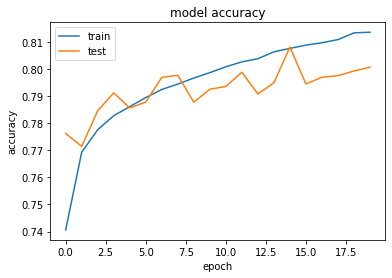

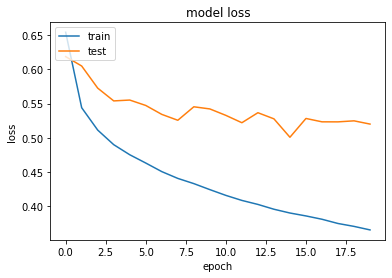

In [35]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
#2 hidden layers 512 256 Adamax softmax все данные обычный scale
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=10, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test), class_weight=class_weight_dict)
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
5873/5873 [==============================] - 59s 3ms/step - loss: 0.7627 - accuracy: 0.7088 - val_loss: 0.6420 - val_accuracy: 0.7697
Epoch 2/10
5873/5873 [==============================] - 18s 3ms/step - loss: 0.5551 - accuracy: 0.7654 - val_loss: 0.6151 - val_accuracy: 0.7715
Epoch 3/10
5873/5873 [==============================] - 18s 3ms/step - loss: 0.5161 - accuracy: 0.7763 - val_loss: 0.5804 - val_accuracy: 0.7847
Epoch 4/10
5873/5873 [==============================] - 18s 3ms/step - loss: 0.4980 - accuracy: 0.7814 - val_loss: 0.5622 - val_accuracy: 0.7905
Epoch 5/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4848 - accuracy: 0.7850 - val_loss: 0.5606 - val_accuracy: 0.7900
Epoch 6/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4713 - accuracy: 0.7869 - val_loss: 0.5604 - val_accuracy: 0.7883
Epoch 7/10
5873/5873 [==============================] - 18s 3ms/step - loss: 0.4601 - accuracy: 0.7903 - val_loss: 0.5454 - val_ac

In [23]:
#2 hidden layers 512 256 Adamax softmax все данные without scaler 
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=10, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test), class_weight=class_weight_dict)
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
5873/5873 [==============================] - 18s 3ms/step - loss: 0.7611 - accuracy: 0.7063 - val_loss: 0.6231 - val_accuracy: 0.7768
Epoch 2/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.5541 - accuracy: 0.7665 - val_loss: 0.5835 - val_accuracy: 0.7864
Epoch 3/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.5171 - accuracy: 0.7748 - val_loss: 0.5734 - val_accuracy: 0.7888
Epoch 4/10
5873/5873 [==============================] - 18s 3ms/step - loss: 0.4977 - accuracy: 0.7796 - val_loss: 0.5643 - val_accuracy: 0.7901
Epoch 5/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4843 - accuracy: 0.7836 - val_loss: 0.5536 - val_accuracy: 0.7920
Epoch 6/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4714 - accuracy: 0.7869 - val_loss: 0.5584 - val_accuracy: 0.7898
Epoch 7/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4601 - accuracy: 0.7911 - val_loss: 0.5404 - val_ac

In [16]:
#2 hidden layers 512 256 Adamax softmax все данные standscal
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=10, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test), class_weight=class_weight_dict)
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
5873/5873 [==============================] - 19s 3ms/step - loss: 0.7638 - accuracy: 0.7073 - val_loss: 0.6380 - val_accuracy: 0.7691
Epoch 2/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.5562 - accuracy: 0.7654 - val_loss: 0.6104 - val_accuracy: 0.7723
Epoch 3/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.5186 - accuracy: 0.7755 - val_loss: 0.5739 - val_accuracy: 0.7882
Epoch 4/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4989 - accuracy: 0.7797 - val_loss: 0.5616 - val_accuracy: 0.7910
Epoch 5/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4884 - accuracy: 0.7824 - val_loss: 0.5760 - val_accuracy: 0.7848
Epoch 6/10
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4728 - accuracy: 0.7875 - val_loss: 0.5464 - val_accuracy:

In [38]:
#2 hidden layers 512 256 Adamax softmax все данные
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test), class_weight=class_weight_dict)
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
5873/5873 [==============================] - 18s 3ms/step - loss: 0.7502 - accuracy: 0.7111 - val_loss: 0.6247 - val_accuracy: 0.7773
Epoch 2/20
5873/5873 [==============================] - 17s 3ms/step - loss: 0.5541 - accuracy: 0.7662 - val_loss: 0.6094 - val_accuracy: 0.7704
Epoch 3/20
5873/5873 [==============================] - 17s 3ms/step - loss: 0.5184 - accuracy: 0.7763 - val_loss: 0.5657 - val_accuracy: 0.7884
Epoch 4/20
5873/5873 [==============================] - 17s 3ms/step - loss: 0.5011 - accuracy: 0.7797 - val_loss: 0.5690 - val_accuracy: 0.7857
Epoch 5/20
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4816 - accuracy: 0.7841 - val_loss: 0.5713 - val_accuracy: 0.7823
Epoch 6/20
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4731 - accuracy: 0.7868 - val_loss: 0.5487 - val_accuracy: 0.7924
Epoch 7/20
5873/5873 [==============================] - 17s 3ms/step - loss: 0.4630 - accuracy: 0.7885 - val_loss: 0.5416 - val_ac

In [22]:
#2 hidden layers 512 256 Adamax softmax
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4152 - accuracy: 0.8478 - val_loss: 0.4353 - val_accuracy: 0.8435
Epoch 2/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4123 - accuracy: 0.8485 - val_loss: 0.4360 - val_accuracy: 0.8428
Epoch 3/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4100 - accuracy: 0.8494 - val_loss: 0.4374 - val_accuracy: 0.8427
Epoch 4/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4036 - accuracy: 0.8510 - val_loss: 0.4370 - val_accuracy: 0.8430
Epoch 5/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4028 - accuracy: 0.8515 - val_loss: 0.4352 - val_accuracy: 0.8437
Epoch 6/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3989 - accuracy: 0.8526 - val_loss: 0.4368 - val_accuracy: 0.8435
Epoch 7/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3972 - accuracy: 0.8531 - val_loss: 0.4364 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


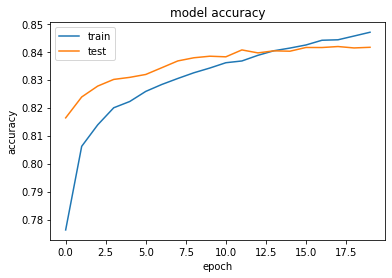

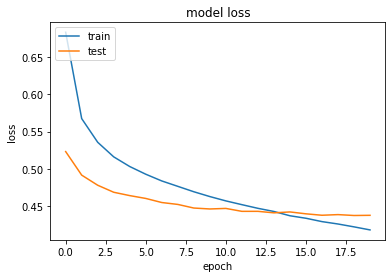

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
modelsgb = SGDClassifier(loss='modified_huber', class_weight='balanced', n_jobs=-1, alpha=0.000015, random_state=15, max_iter=5000)
modelsgb.fit(train_vecs_w2v, Y_train)

SGDClassifier(alpha=1.5e-05, class_weight='balanced', loss='modified_huber',
              max_iter=5000, n_jobs=-1, random_state=15)

In [26]:
sgb_pred=modelsgb.predict(test_vecs_w2v)
print(metrics.accuracy_score(Y_test, sgb_pred))
print(metrics.f1_score(Y_test, sgb_pred, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, sgb_pred))

0.766060044679344
0.7699455505236235
0.7346576446092341


#### fastText * TF-IDF unigram

In [3]:
data = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [8]:
topics=np.fromfile('topics',  dtype = np.int)
class_label = pickle.load(open("lbl.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)

In [9]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x)
matrix = vectorizer.fit_transform(X_train)
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print(len(tfidf))

400889


In [7]:
#Предобученыые векторы
modelft = fasttext.load_model('cc.en.200.bin')

In [42]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelft.get_word_vector(word).reshape((1, size))*tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [43]:
train_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in map(lambda x: x, X_test)])

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

shape for training set :  (293648, 200) 
shape for test set :  (73412, 200)


In [44]:
modelnn = Sequential()
modelnn.add(Dense(512, activation='relu', input_dim=200))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(256, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
modelnn = Sequential()
modelnn.add(Dense(1024, activation='relu', input_dim=200))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dense(256, activation='relu'))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
#2 hidden layers 512 256 Adamax softmax предобученный fasttext 40 epochs
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=40, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/40
2937/2937 [==============================] - 9s 3ms/step - loss: 1.0553 - accuracy: 0.6689 - val_loss: 0.6740 - val_accuracy: 0.7725
Epoch 2/40
2937/2937 [==============================] - 8s 3ms/step - loss: 0.6944 - accuracy: 0.7691 - val_loss: 0.6342 - val_accuracy: 0.7839
Epoch 3/40
2937/2937 [==============================] - 8s 3ms/step - loss: 0.6584 - accuracy: 0.7785 - val_loss: 0.6113 - val_accuracy: 0.7890
Epoch 4/40
2937/2937 [==============================] - 8s 3ms/step - loss: 0.6403 - accuracy: 0.7831 - val_loss: 0.6015 - val_accuracy: 0.7925
Epoch 5/40
2937/2937 [==============================] - 8s 3ms/step - loss: 0.6214 - accuracy: 0.7881 - val_loss: 0.5885 - val_accuracy: 0.7952
Epoch 6/40
2937/2937 [==============================] - 8s 3ms/step - loss: 0.6090 - accuracy: 0.7916 - val_loss: 0.5814 - val_accuracy: 0.7962
Epoch 7/40
2937/2937 [==============================] - 8s 3ms/step - loss: 0.5965 - accuracy: 0.7954 - val_loss: 0.5757 - val_accuracy:

In [44]:
#3 hidden layers 1024 03 02 01 512 256 Adamax softmax обычный fasttext
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.9345 - accuracy: 0.7007 - val_loss: 0.6411 - val_accuracy: 0.7804
Epoch 2/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.6586 - accuracy: 0.7769 - val_loss: 0.6008 - val_accuracy: 0.7919
Epoch 3/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.6152 - accuracy: 0.7890 - val_loss: 0.5968 - val_accuracy: 0.7899
Epoch 4/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.5950 - accuracy: 0.7945 - val_loss: 0.5704 - val_accuracy: 0.8006
Epoch 5/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.5721 - accuracy: 0.8015 - val_loss: 0.5598 - val_accuracy: 0.8038
Epoch 6/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.5617 - accuracy: 0.8045 - val_loss: 0.5571 - val_accuracy: 0.8030
Epoch 7/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.5483 - accuracy: 0.8075 - val_loss: 0.5444 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


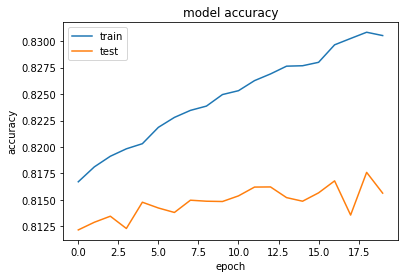

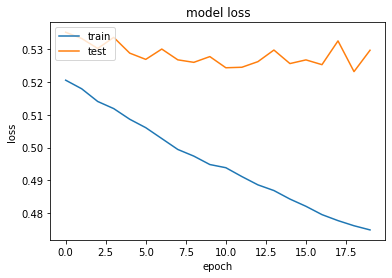

In [23]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
#3 hidden layers 1024 03 02 01 512 256 Adamax softmax
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.4425 - accuracy: 0.8392 - val_loss: 0.5175 - val_accuracy: 0.8186
Epoch 2/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.4371 - accuracy: 0.8415 - val_loss: 0.5236 - val_accuracy: 0.8173
Epoch 3/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.4303 - accuracy: 0.8434 - val_loss: 0.5218 - val_accuracy: 0.8195
Epoch 4/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.4251 - accuracy: 0.8449 - val_loss: 0.5219 - val_accuracy: 0.8186
Epoch 5/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.4196 - accuracy: 0.8470 - val_loss: 0.5245 - val_accuracy: 0.8192
Epoch 6/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.4143 - accuracy: 0.8491 - val_loss: 0.5249 - val_accuracy: 0.8188
Epoch 7/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.4100 - accuracy: 0.8499 - val_loss: 0.5253 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


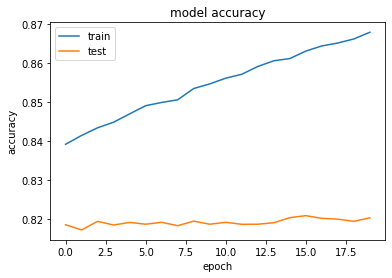

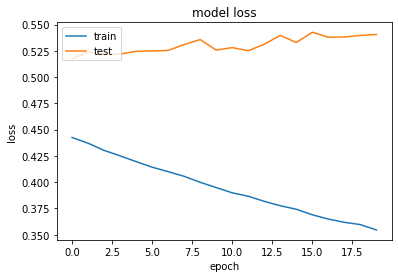

In [46]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
#3 hidden layers 1024 03 02 01 512 256 Adamax softmax
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.3516 - accuracy: 0.8689 - val_loss: 0.5417 - val_accuracy: 0.8200
Epoch 2/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.3492 - accuracy: 0.8703 - val_loss: 0.5438 - val_accuracy: 0.8203
Epoch 3/20
2937/2937 [==============================] - 10s 3ms/step - loss: 0.3450 - accuracy: 0.8704 - val_loss: 0.5520 - val_accuracy: 0.8190
Epoch 4/20
1249/2937 [===========>..................] - ETA: 5s - loss: 0.3367 - accuracy: 0.8742

KeyboardInterrupt: 

In [41]:
#2 hidden layers 512 256 Adamax softmax
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=50, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4915 - accuracy: 0.8251 - val_loss: 0.5297 - val_accuracy: 0.8155
Epoch 2/10
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4889 - accuracy: 0.8264 - val_loss: 0.5269 - val_accuracy: 0.8152
Epoch 3/10
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4879 - accuracy: 0.8266 - val_loss: 0.5282 - val_accuracy: 0.8146
Epoch 4/10
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4851 - accuracy: 0.8270 - val_loss: 0.5256 - val_accuracy: 0.8154
Epoch 5/10
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4823 - accuracy: 0.8278 - val_loss: 0.5269 - val_accuracy: 0.8157
Epoch 6/10
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4806 - accuracy: 0.8290 - val_loss: 0.5257 - val_accuracy: 0.8158
Epoch 7/10
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4788 - accuracy: 0.8291 - val_loss: 0.5287 - val_accuracy:

In [14]:
#2 hidden layers 512 256 Adamax softmax
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3966 - accuracy: 0.8537 - val_loss: 0.4424 - val_accuracy: 0.8412
Epoch 2/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3930 - accuracy: 0.8544 - val_loss: 0.4430 - val_accuracy: 0.8414
Epoch 3/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3903 - accuracy: 0.8552 - val_loss: 0.4403 - val_accuracy: 0.8421
Epoch 4/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3872 - accuracy: 0.8559 - val_loss: 0.4436 - val_accuracy: 0.8421
Epoch 5/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3830 - accuracy: 0.8574 - val_loss: 0.4425 - val_accuracy: 0.8418
Epoch 6/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3814 - accuracy: 0.8580 - val_loss: 0.4420 - val_accuracy: 0.8426
Epoch 7/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3772 - accuracy: 0.8594 - val_loss: 0.4441 - val_accuracy:

In [70]:
#2 hidden layers 512 256 Adamax softmax fasttext 60 epochs
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3677 - accuracy: 0.8614 - val_loss: 0.4694 - val_accuracy: 0.8368
Epoch 2/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.3662 - accuracy: 0.8622 - val_loss: 0.4703 - val_accuracy: 0.8377
Epoch 3/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.3654 - accuracy: 0.8627 - val_loss: 0.4740 - val_accuracy: 0.8373
Epoch 4/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.3620 - accuracy: 0.8639 - val_loss: 0.4724 - val_accuracy: 0.8368
Epoch 5/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.3604 - accuracy: 0.8638 - val_loss: 0.4722 - val_accuracy: 0.8371
Epoch 6/20
2937/2937 [==============================] - 7s 2ms/step - loss: 0.3589 - accuracy: 0.8649 - val_loss: 0.4754 - val_accuracy: 0.8377
Epoch 7/20
2937/2937 [==============================] - 7s 3ms/step - loss: 0.3576 - accuracy: 0.8652 - val_loss: 0.4741 - val_accuracy:

In [ ]:
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2 )
modelLR.fit(train_vecs_w2v, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


#### fastText unigram

In [2]:
data = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})

In [4]:
modelw2v = gensim.models.Word2Vec(data.tokens.values, workers=12, min_count=100, size=300, iter=30)

In [5]:
modelw2v.save('modelw2v_unigr')

In [4]:
modelw2v=gensim.models.Word2Vec.load('modelw2v_unigr')

In [5]:
topics=np.fromfile('topics',  dtype = np.int)
class_label = pickle.load(open("lbl.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)

In [36]:
modelft.get_nearest_neighbors('диана')

[(0.7561860084533691, 'алина'),
 (0.7183884978294373, 'жанна'),
 (0.7113822102546692, 'ксения'),
 (0.7109999060630798, 'анна'),
 (0.7048076391220093, 'кристина'),
 (0.7039011120796204, 'мария'),
 (0.6960844397544861, 'карина'),
 (0.6952154040336609, 'олеся'),
 (0.6942341923713684, 'катя'),
 (0.6924735307693481, 'арина')]

In [27]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelft.get_word_vector(word).reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [28]:
train_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in map(lambda x: x, X_train)])
test_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in map(lambda x: x, X_test)])

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

shape for training set :  (293648, 200) 
shape for test set :  (73412, 200)


In [37]:
from sklearn.preprocessing import scale

train_vecs_w2v = scale(train_vecs_w2v)
test_vecs_w2v = scale(test_vecs_w2v)

In [39]:
modelnn = Sequential()
modelnn.add(Dense(512, activation='relu', input_dim=200))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(256, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
#2 hidden layers 512 256 Adamax softmax предобe fasttext 40 epochs
history = modelnn.fit(train_vecs_w2v, Y_train, epochs=20, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test))
loss, accuracy = modelnn.evaluate(train_vecs_w2v, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelnn.evaluate(test_vecs_w2v, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4634 - accuracy: 0.8337 - val_loss: 0.5021 - val_accuracy: 0.8225
Epoch 2/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4593 - accuracy: 0.8350 - val_loss: 0.5020 - val_accuracy: 0.8225
Epoch 3/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4564 - accuracy: 0.8361 - val_loss: 0.5010 - val_accuracy: 0.8225
Epoch 4/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4534 - accuracy: 0.8368 - val_loss: 0.5014 - val_accuracy: 0.8228
Epoch 5/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4515 - accuracy: 0.8378 - val_loss: 0.5037 - val_accuracy: 0.8222
Epoch 6/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4477 - accuracy: 0.8384 - val_loss: 0.5016 - val_accuracy: 0.8227
Epoch 7/20
2937/2937 [==============================] - 8s 3ms/step - loss: 0.4456 - accuracy: 0.8395 - val_loss: 0.5026 - val_accuracy:

## Сверточная НС

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def dummy_fun(doc):
    return doc

data = pd.read_csv('news_all_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
splits=[]
for train_index, test_index in sss.split(data.tokens.values, data.topic.values):
    splits.append((train_index, test_index))
X_train, X_test = data.tokens.values[splits[0][0]], data.tokens.values[splits[0][1]]
Y_train, Y_test = topics[splits[0][0]], topics[splits[0][1]]
# bigram=Phraser.load('bigram_alldata')
modelw2v = gensim.models.Word2Vec.load('modelw2v_unigr_all_best.w2v')
# X_train=list(bigram[X_train])
# X_test=list(bigram[X_test])
X_train_str=[]
for l in X_train:
    text=' '.join(l)
    X_train_str.append(text)
X_test_str=[]
for l in X_test:
    text=' '.join(l)
    X_test_str.append(text)

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

text_length = 300
vocab_size=int(len(TRAIN_VOCAB)/2)

def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=text_length)

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
# vocab_size = len(tokenizer.word_index) + 1
wv_size = 300
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    else:
        continue

In [24]:
wv_size = 300
embedding_matrix = np.zeros((vocab_size, wv_size))

for word, i in tokenizer.word_index.items():
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    else:
        continue

In [23]:
tokenizer.num_words

290746

In [25]:
embedding_matrix.shape

(290746, 300)

In [26]:
wv_size

300

In [27]:
text_length

300

In [28]:
np.save('embedding_matrix_cnn_all_300_300.npy', embedding_matrix)
np.save('X_train_seq_cnn_all_300_300.npy', X_train_seq)
np.save('X_test_seq_cnn_all_300_300.npy', X_test_seq)
np.save('Y_train_cnn_all_300_300.npy', Y_train)
np.save('Y_test_cnn_all_300_300.npy', Y_test)

In [3]:
embedding_matrix=np.load('embedding_matrix_cnn_all_300_300.npy')
X_train_seq=np.load('X_train_seq_cnn_all_300_300.npy')
X_test_seq=np.load('X_test_seq_cnn_all_300_300.npy')
Y_train=np.load('Y_train_cnn_all_300_300.npy')
Y_test=np.load('Y_test_cnn_all_300_300.npy')

In [5]:
#vocab_size=359863
vocab_size=359863
wv_size=300
text_length=300

In [14]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(512, 2, activation='relu'))
modelcnn.add(GlobalMaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='sigmoid'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# modelcnn = Sequential()
# modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
# modelcnn.add(Conv1D(512, 2, activation='relu'))
# modelcnn.add(GlobalMaxPooling1D())
# modelcnn.add(Flatten())
# modelcnn.add(Dense(128, activation='relu'))
# modelcnn.add(Dense(13, activation='sigmoid'))
# modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 84s 14ms/step - loss: 0.6381 - accuracy: 0.7886 - val_loss: 0.5052 - val_accuracy: 0.8264
Epoch 2/5
5873/5873 [==============================] - 85s 14ms/step - loss: 0.4465 - accuracy: 0.8451 - val_loss: 0.4758 - val_accuracy: 0.8359
Epoch 3/5
5873/5873 [==============================] - 85s 14ms/step - loss: 0.3818 - accuracy: 0.8658 - val_loss: 0.4645 - val_accuracy: 0.8399
Epoch 4/5
5873/5873 [==============================] - 87s 15ms/step - loss: 0.3324 - accuracy: 0.8824 - val_loss: 0.4704 - val_accuracy: 0.8387
Epoch 5/5
5873/5873 [==============================] - 86s 15ms/step - loss: 0.2929 - accuracy: 0.8953 - val_loss: 0.4928 - val_accuracy: 0.8358


In [4]:
def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=text_length)


vocab_size=100000
wv_size = 300
text_length = 500
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if i > vocab_size:
        continue
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    else:
        continue
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 2, activation='relu'))
modelcnn.add(GlobalMaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='sigmoid'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 122s 20ms/step - loss: 0.4899 - accuracy: 0.8269 - val_loss: 0.4257 - val_accuracy: 0.8452
Epoch 2/5
5873/5873 [==============================] - 118s 20ms/step - loss: 0.3941 - accuracy: 0.8561 - val_loss: 0.4189 - val_accuracy: 0.8474
Epoch 3/5
5873/5873 [==============================] - 119s 20ms/step - loss: 0.3533 - accuracy: 0.8696 - val_loss: 0.4247 - val_accuracy: 0.8465
Epoch 4/5
5873/5873 [==============================] - 122s 21ms/step - loss: 0.3210 - accuracy: 0.8800 - val_loss: 0.4091 - val_accuracy: 0.8537
Epoch 5/5
5873/5873 [==============================] - 118s 20ms/step - loss: 0.2931 - accuracy: 0.8900 - val_loss: 0.4226 - val_accuracy: 0.8525


In [5]:
# def get_sequences(tokenizer, x):
#     sequences = tokenizer.texts_to_sequences(x)
#     return pad_sequences(sequences, maxlen=text_length)


# vocab_size=100000
# wv_size = 300
# text_length = 500
# tokenizer = Tokenizer(num_words=vocab_size)
# tokenizer.fit_on_texts(X_train_str)
# X_train_seq = get_sequences(tokenizer, X_train_str)
# X_test_seq = get_sequences(tokenizer, X_test_str)
# embedding_matrix = np.zeros((vocab_size, wv_size))
# for word, i in tokenizer.word_index.items():
#     if i > vocab_size:
#         continue
#     if word in modelw2v.wv.vocab.keys():
#         embedding_matrix[i] = modelw2v.wv[word]
#     else:
#         continue
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(GlobalMaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='sigmoid'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.4822 - accuracy: 0.8289 - val_loss: 0.4174 - val_accuracy: 0.8491
Epoch 2/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.3835 - accuracy: 0.8597 - val_loss: 0.4178 - val_accuracy: 0.8467
Epoch 3/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.3357 - accuracy: 0.8758 - val_loss: 0.4072 - val_accuracy: 0.8546
Epoch 4/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.2959 - accuracy: 0.8888 - val_loss: 0.4141 - val_accuracy: 0.8555
Epoch 5/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.2594 - accuracy: 0.9024 - val_loss: 0.4450 - val_accuracy: 0.8530


In [6]:
#softmax вместо sigmoid
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(GlobalMaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 145s 25ms/step - loss: 0.4830 - accuracy: 0.8293 - val_loss: 0.4211 - val_accuracy: 0.8449
Epoch 2/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.3836 - accuracy: 0.8596 - val_loss: 0.4118 - val_accuracy: 0.8504
Epoch 3/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.3359 - accuracy: 0.8756 - val_loss: 0.4103 - val_accuracy: 0.8528
Epoch 4/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.2966 - accuracy: 0.8887 - val_loss: 0.4052 - val_accuracy: 0.8562
Epoch 5/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.2610 - accuracy: 0.9016 - val_loss: 0.4332 - val_accuracy: 0.8556


In [7]:
#softmax и adamax
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(GlobalMaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 145s 25ms/step - loss: 0.5074 - accuracy: 0.8228 - val_loss: 0.4333 - val_accuracy: 0.8436
Epoch 2/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.3873 - accuracy: 0.8600 - val_loss: 0.4013 - val_accuracy: 0.8539
Epoch 3/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.3332 - accuracy: 0.8787 - val_loss: 0.3992 - val_accuracy: 0.8558
Epoch 4/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.2876 - accuracy: 0.8955 - val_loss: 0.4200 - val_accuracy: 0.8528
Epoch 5/5
5873/5873 [==============================] - 150s 25ms/step - loss: 0.2475 - accuracy: 0.9104 - val_loss: 0.4350 - val_accuracy: 0.8519


In [8]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 4, activation='relu'))
modelcnn.add(GlobalMaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 179s 30ms/step - loss: 0.4816 - accuracy: 0.8295 - val_loss: 0.4283 - val_accuracy: 0.8453
Epoch 2/5
5873/5873 [==============================] - 179s 30ms/step - loss: 0.3801 - accuracy: 0.8609 - val_loss: 0.4115 - val_accuracy: 0.8503
Epoch 3/5
5873/5873 [==============================] - 179s 30ms/step - loss: 0.3260 - accuracy: 0.8791 - val_loss: 0.4295 - val_accuracy: 0.8473
Epoch 4/5
5873/5873 [==============================] - 172s 29ms/step - loss: 0.2788 - accuracy: 0.8957 - val_loss: 0.4229 - val_accuracy: 0.8529
Epoch 5/5
5873/5873 [==============================] - 170s 29ms/step - loss: 0.2355 - accuracy: 0.9114 - val_loss: 0.4560 - val_accuracy: 0.8511


In [9]:
modelcnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_20 (ModuleWra (None, 500, 300)          30000000  
_________________________________________________________________
module_wrapper_21 (ModuleWra (None, 497, 500)          600500    
_________________________________________________________________
module_wrapper_22 (ModuleWra (None, 500)               0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 500)               0         
_________________________________________________________________
module_wrapper_23 (ModuleWra (None, 128)               64128     
_________________________________________________________________
module_wrapper_24 (ModuleWra (None, 13)                1677      
Total params: 30,666,305
Trainable params: 666,305
Non-trainable params: 30,000,000
____________________________________

In [10]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 5, activation='relu'))
modelcnn.add(GlobalMaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 180s 31ms/step - loss: 0.4795 - accuracy: 0.8303 - val_loss: 0.4137 - val_accuracy: 0.8486
Epoch 2/5
5873/5873 [==============================] - 181s 31ms/step - loss: 0.3757 - accuracy: 0.8626 - val_loss: 0.4021 - val_accuracy: 0.8547
Epoch 3/5
5873/5873 [==============================] - 182s 31ms/step - loss: 0.3172 - accuracy: 0.8822 - val_loss: 0.4086 - val_accuracy: 0.8535
Epoch 4/5
5873/5873 [==============================] - 182s 31ms/step - loss: 0.2638 - accuracy: 0.9010 - val_loss: 0.4237 - val_accuracy: 0.8544
Epoch 5/5
5873/5873 [==============================] - 182s 31ms/step - loss: 0.2155 - accuracy: 0.9185 - val_loss: 0.4807 - val_accuracy: 0.8529


In [11]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(MaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 158s 27ms/step - loss: 0.5354 - accuracy: 0.8138 - val_loss: 0.4619 - val_accuracy: 0.8328
Epoch 2/5
5873/5873 [==============================] - 160s 27ms/step - loss: 0.4091 - accuracy: 0.8499 - val_loss: 0.4580 - val_accuracy: 0.8358
Epoch 3/5
5873/5873 [==============================] - 160s 27ms/step - loss: 0.3145 - accuracy: 0.8820 - val_loss: 0.5112 - val_accuracy: 0.8275
Epoch 4/5
5873/5873 [==============================] - 159s 27ms/step - loss: 0.2160 - accuracy: 0.9189 - val_loss: 0.6518 - val_accuracy: 0.8197
Epoch 5/5
5873/5873 [==============================] - 157s 27ms/step - loss: 0.1359 - accuracy: 0.9495 - val_loss: 0.8435 - val_accuracy: 0.8162


In [14]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(Dropout(0.5))
modelcnn.add(GlobalMaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 169s 29ms/step - loss: 0.5920 - accuracy: 0.7987 - val_loss: 0.5688 - val_accuracy: 0.8259
Epoch 2/5
5873/5873 [==============================] - 170s 29ms/step - loss: 0.5135 - accuracy: 0.8175 - val_loss: 0.5461 - val_accuracy: 0.8326
Epoch 3/5
5873/5873 [==============================] - 170s 29ms/step - loss: 0.4921 - accuracy: 0.8246 - val_loss: 0.5208 - val_accuracy: 0.8392
Epoch 4/5
5873/5873 [==============================] - 171s 29ms/step - loss: 0.4803 - accuracy: 0.8282 - val_loss: 0.4955 - val_accuracy: 0.8436
Epoch 5/5
5873/5873 [==============================] - 170s 29ms/step - loss: 0.4705 - accuracy: 0.8308 - val_loss: 0.4800 - val_accuracy: 0.8446


In [16]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(MaxPooling1D(5))
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.5138 - accuracy: 0.8205 - val_loss: 0.4557 - val_accuracy: 0.8349
Epoch 2/5
5873/5873 [==============================] - 147s 25ms/step - loss: 0.3951 - accuracy: 0.8542 - val_loss: 0.4488 - val_accuracy: 0.8385
Epoch 3/5
5873/5873 [==============================] - 149s 25ms/step - loss: 0.3183 - accuracy: 0.8801 - val_loss: 0.4603 - val_accuracy: 0.8404
Epoch 4/5
5873/5873 [==============================] - 149s 25ms/step - loss: 0.2440 - accuracy: 0.9073 - val_loss: 0.5337 - val_accuracy: 0.8352
Epoch 5/5
5873/5873 [==============================] - 149s 25ms/step - loss: 0.1801 - accuracy: 0.9317 - val_loss: 0.6396 - val_accuracy: 0.8292


In [17]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(MaxPooling1D(5))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(MaxPooling1D(5))
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 199s 34ms/step - loss: 0.5049 - accuracy: 0.8234 - val_loss: 0.4351 - val_accuracy: 0.8407
Epoch 2/5
5873/5873 [==============================] - 196s 33ms/step - loss: 0.3980 - accuracy: 0.8537 - val_loss: 0.4047 - val_accuracy: 0.8530
Epoch 3/5
5873/5873 [==============================] - 194s 33ms/step - loss: 0.3463 - accuracy: 0.8701 - val_loss: 0.4100 - val_accuracy: 0.8519
Epoch 4/5
5873/5873 [==============================] - 195s 33ms/step - loss: 0.2971 - accuracy: 0.8865 - val_loss: 0.4318 - val_accuracy: 0.8474
Epoch 5/5
5873/5873 [==============================] - 194s 33ms/step - loss: 0.2498 - accuracy: 0.9033 - val_loss: 0.4670 - val_accuracy: 0.8503


In [18]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(MaxPooling1D(3))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(MaxPooling1D(3))
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 233s 40ms/step - loss: 0.5108 - accuracy: 0.8218 - val_loss: 0.4509 - val_accuracy: 0.8389
Epoch 2/5
5873/5873 [==============================] - 234s 40ms/step - loss: 0.4029 - accuracy: 0.8531 - val_loss: 0.4230 - val_accuracy: 0.8495
Epoch 3/5
5873/5873 [==============================] - 234s 40ms/step - loss: 0.3501 - accuracy: 0.8694 - val_loss: 0.4240 - val_accuracy: 0.8504
Epoch 4/5
5873/5873 [==============================] - 233s 40ms/step - loss: 0.3003 - accuracy: 0.8856 - val_loss: 0.4492 - val_accuracy: 0.8462
Epoch 5/5
5873/5873 [==============================] - 239s 41ms/step - loss: 0.2504 - accuracy: 0.9040 - val_loss: 0.4709 - val_accuracy: 0.8432


In [19]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(MaxPooling1D(7))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(MaxPooling1D(7))
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 186s 32ms/step - loss: 0.5430 - accuracy: 0.8108 - val_loss: 0.4697 - val_accuracy: 0.8312
Epoch 2/5
5873/5873 [==============================] - 186s 32ms/step - loss: 0.4364 - accuracy: 0.8419 - val_loss: 0.4470 - val_accuracy: 0.8400
Epoch 3/5
5873/5873 [==============================] - 186s 32ms/step - loss: 0.3834 - accuracy: 0.8578 - val_loss: 0.4575 - val_accuracy: 0.8385
Epoch 4/5
5873/5873 [==============================] - 186s 32ms/step - loss: 0.3336 - accuracy: 0.8743 - val_loss: 0.4645 - val_accuracy: 0.8379
Epoch 5/5
5873/5873 [==============================] - 183s 31ms/step - loss: 0.2865 - accuracy: 0.8911 - val_loss: 0.5134 - val_accuracy: 0.8346


In [20]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 2, activation='relu'))
modelcnn.add(MaxPooling1D(5))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(MaxPooling1D(5))
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 184s 31ms/step - loss: 0.5068 - accuracy: 0.8226 - val_loss: 0.4346 - val_accuracy: 0.8411
Epoch 2/5
5873/5873 [==============================] - 169s 29ms/step - loss: 0.4005 - accuracy: 0.8530 - val_loss: 0.4154 - val_accuracy: 0.8477
Epoch 3/5
5873/5873 [==============================] - 171s 29ms/step - loss: 0.3498 - accuracy: 0.8689 - val_loss: 0.4020 - val_accuracy: 0.8546
Epoch 4/5
5873/5873 [==============================] - 173s 30ms/step - loss: 0.3004 - accuracy: 0.8852 - val_loss: 0.4412 - val_accuracy: 0.8455
Epoch 5/5
5873/5873 [==============================] - 172s 29ms/step - loss: 0.2520 - accuracy: 0.9030 - val_loss: 0.4685 - val_accuracy: 0.8498


In [21]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 2, activation='relu', strides=2))
modelcnn.add(MaxPooling1D(5))
modelcnn.add(Conv1D(500, 3, activation='relu', strides=2))
modelcnn.add(MaxPooling1D(5))
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 96s 16ms/step - loss: 0.9408 - accuracy: 0.6819 - val_loss: 0.8859 - val_accuracy: 0.6967
Epoch 2/5
5873/5873 [==============================] - 96s 16ms/step - loss: 0.8546 - accuracy: 0.7051 - val_loss: 0.8741 - val_accuracy: 0.7008
Epoch 3/5
5873/5873 [==============================] - 98s 17ms/step - loss: 0.8079 - accuracy: 0.7186 - val_loss: 0.8763 - val_accuracy: 0.7014
Epoch 4/5
5873/5873 [==============================] - 97s 17ms/step - loss: 0.7627 - accuracy: 0.7321 - val_loss: 0.8962 - val_accuracy: 0.7007
Epoch 5/5
5873/5873 [==============================] - 97s 16ms/step - loss: 0.7187 - accuracy: 0.7469 - val_loss: 0.9278 - val_accuracy: 0.6999


In [22]:
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 2, activation='relu'))
modelcnn.add(MaxPooling1D(5))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(MaxPooling1D(5))
modelcnn.add(Conv1D(500, 4, activation='relu'))
modelcnn.add(MaxPooling1D(5))
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 187s 32ms/step - loss: 0.5419 - accuracy: 0.8122 - val_loss: 0.4609 - val_accuracy: 0.8329
Epoch 2/5
5873/5873 [==============================] - 189s 32ms/step - loss: 0.4342 - accuracy: 0.8425 - val_loss: 0.4465 - val_accuracy: 0.8411
Epoch 3/5
5873/5873 [==============================] - 189s 32ms/step - loss: 0.3861 - accuracy: 0.8572 - val_loss: 0.4382 - val_accuracy: 0.8447
Epoch 4/5
5873/5873 [==============================] - 189s 32ms/step - loss: 0.3427 - accuracy: 0.8712 - val_loss: 0.4563 - val_accuracy: 0.8419
Epoch 5/5
5873/5873 [==============================] - 189s 32ms/step - loss: 0.3020 - accuracy: 0.8855 - val_loss: 0.4630 - val_accuracy: 0.8434


In [6]:
def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=text_length)


vocab_size=100000
wv_size = 300
text_length = 500
tokenizer = Tokenizer(num_words=vocab_size, split=' ')
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if i > vocab_size:
        continue
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    else:
        continue

In [34]:
#bigram+unigram
modelcnn = Sequential()
modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelcnn.add(Conv1D(500, 3, activation='relu'))
modelcnn.add(GlobalMaxPooling1D())
modelcnn.add(Flatten())
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dense(13, activation='softmax'))
modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=5, batch_size=100)

Epoch 1/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.5109 - accuracy: 0.8218 - val_loss: 0.4395 - val_accuracy: 0.8422
Epoch 2/5
5873/5873 [==============================] - 146s 25ms/step - loss: 0.3920 - accuracy: 0.8587 - val_loss: 0.4150 - val_accuracy: 0.8497
Epoch 3/5
5873/5873 [==============================] - 148s 25ms/step - loss: 0.3403 - accuracy: 0.8767 - val_loss: 0.4111 - val_accuracy: 0.8518
Epoch 4/5
5873/5873 [==============================] - 147s 25ms/step - loss: 0.2978 - accuracy: 0.8917 - val_loss: 0.4161 - val_accuracy: 0.8531
Epoch 5/5
5873/5873 [==============================] - 145s 25ms/step - loss: 0.2590 - accuracy: 0.9065 - val_loss: 0.4239 - val_accuracy: 0.8552


In [4]:
def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=text_length)

vocab_size=100000
wv_size = 300
text_length = 500
# tokenizer = Tokenizer(num_words=vocab_size)
# tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if i > vocab_size:
        continue
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    else:
        continue

In [9]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def stemmingSnowball():
    global data
    ru_stopwords = stopwords.words('russian')
    stemmer = SnowballStemmer('russian')
    data=data.assign(tokens=data['tokens'].apply(lambda row: [stemmer.stem(token) for token in row if token not in ru_stopwords]))
    
def create_model(num_filters, dense_size):
    model = Sequential()
    model.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
    model.add(Conv1D(num_filters, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    model.add(Dense(dense_size, activation='relu'))
    model.add(Dense(13, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
    return model

params = dict(num_filters=[32, 64, 128, 256, 512, 500, 1024], dense_size=[32, 64, 128, 256, 512, 500, 1024])
model = KerasClassifier(build_fn=create_model,
                            epochs=5, batch_size=128,
                            verbose=2)
grid = GridSearchCV(estimator=model, param_grid=params,
                              cv=3, verbose=2)
grid_result = grid.fit(X_train_seq, Y_train)
test_accuracy = grid.score(X_test_seq, Y_test)
print(test_accuracy)
data = pd.read_csv('only_tokens_all_data.csv', converters={'tokens':ast.literal_eval})
stemmingSnowball()
print("стемминг завершен")
data.to_csv('news_all_stem_tokens_nltk', index=False)

Fitting 3 folds for each of 49 candidates, totalling 147 fits
Epoch 1/5
3059/3059 - 20s - loss: 0.7509 - accuracy: 0.7599
Epoch 2/5
3059/3059 - 14s - loss: 0.5574 - accuracy: 0.8058
Epoch 3/5
3059/3059 - 14s - loss: 0.5196 - accuracy: 0.8170
Epoch 4/5
3059/3059 - 15s - loss: 0.4974 - accuracy: 0.8244
Epoch 5/5
3059/3059 - 14s - loss: 0.4821 - accuracy: 0.8295
1530/1530 - 4s - loss: 0.5094 - accuracy: 0.8194
[CV] END ......................dense_size=32, num_filters=32; total time= 1.4min
Epoch 1/5
3059/3059 - 15s - loss: 0.7373 - accuracy: 0.7606
Epoch 2/5
3059/3059 - 14s - loss: 0.5564 - accuracy: 0.8076
Epoch 3/5
3059/3059 - 14s - loss: 0.5184 - accuracy: 0.8181
Epoch 4/5
3059/3059 - 14s - loss: 0.4962 - accuracy: 0.8251
Epoch 5/5
3059/3059 - 14s - loss: 0.4815 - accuracy: 0.8297
1530/1530 - 4s - loss: 0.5146 - accuracy: 0.8186
[CV] END ......................dense_size=32, num_filters=32; total time= 1.3min
Epoch 1/5
3059/3059 - 15s - loss: 0.7734 - accuracy: 0.7536
Epoch 2/5
3059/305

KeyboardInterrupt: 

In [7]:
#все данные w2v полный словарь unigr
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=10, batch_size=100)

Epoch 1/10
5873/5873 [==============================] - 1608s 273ms/step - loss: 0.7073 - accuracy: 0.7756 - val_loss: 0.5033 - val_accuracy: 0.8253
Epoch 2/10
5873/5873 [==============================] - 1500s 255ms/step - loss: 0.4696 - accuracy: 0.8341 - val_loss: 0.4774 - val_accuracy: 0.8301
Epoch 3/10
5873/5873 [==============================] - 1493s 254ms/step - loss: 0.4225 - accuracy: 0.8497 - val_loss: 0.4697 - val_accuracy: 0.8355
Epoch 4/10
5873/5873 [==============================] - 1495s 254ms/step - loss: 0.3836 - accuracy: 0.8625 - val_loss: 0.4640 - val_accuracy: 0.8377
Epoch 5/10
5873/5873 [==============================] - 1497s 255ms/step - loss: 0.3516 - accuracy: 0.8736 - val_loss: 0.4797 - val_accuracy: 0.8378
Epoch 6/10
5873/5873 [==============================] - 1495s 255ms/step - loss: 0.3247 - accuracy: 0.8822 - val_loss: 0.5206 - val_accuracy: 0.8351
Epoch 7/10
5873/5873 [==============================] - 1495s 255ms/step - loss: 0.2969 - accuracy: 0.8920

In [26]:
#уменьшение словаря до размера словаря word2vec
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=10, batch_size=100)

Epoch 1/10
2937/2937 [==============================] - 460s 157ms/step - loss: 0.9091 - accuracy: 0.7437 - val_loss: 0.5311 - val_accuracy: 0.8147
Epoch 2/10
2937/2937 [==============================] - 456s 155ms/step - loss: 0.4958 - accuracy: 0.8272 - val_loss: 0.5004 - val_accuracy: 0.8236
Epoch 3/10
2937/2937 [==============================] - 483s 165ms/step - loss: 0.4352 - accuracy: 0.8454 - val_loss: 0.5096 - val_accuracy: 0.8221
Epoch 4/10
2937/2937 [==============================] - 492s 168ms/step - loss: 0.3958 - accuracy: 0.8573 - val_loss: 0.5084 - val_accuracy: 0.8242
Epoch 5/10
2937/2937 [==============================] - 475s 162ms/step - loss: 0.3571 - accuracy: 0.8705 - val_loss: 0.5139 - val_accuracy: 0.8227
Epoch 6/10
2937/2937 [==============================] - 481s 164ms/step - loss: 0.3228 - accuracy: 0.8819 - val_loss: 0.5903 - val_accuracy: 0.8088
Epoch 7/10
2937/2937 [==============================] - 477s 162ms/step - loss: 0.2955 - accuracy: 0.8927 - val_

In [27]:
scores = modelcnn.evaluate(X_test_seq, Y_test, verbose=1)

2295/2295 [==============================] - 36s 15ms/step - loss: 0.6482 - accuracy: 0.8143


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


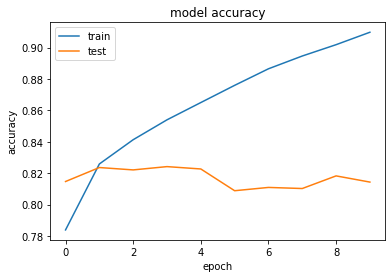

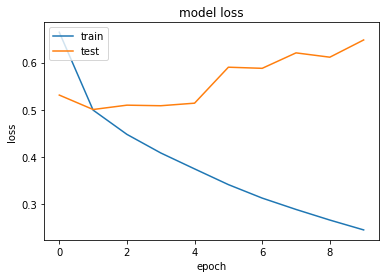

In [28]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
#Добавление двух dropout 0.3 30 epochs
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=10, batch_size=100)

Epoch 1/10
2937/2937 [==============================] - 643s 219ms/step - loss: 0.4444 - accuracy: 0.8404 - val_loss: 0.5143 - val_accuracy: 0.8185
Epoch 2/10
2937/2937 [==============================] - 647s 220ms/step - loss: 0.4356 - accuracy: 0.8430 - val_loss: 0.5057 - val_accuracy: 0.8221
Epoch 3/10
2937/2937 [==============================] - 652s 222ms/step - loss: 0.4349 - accuracy: 0.8435 - val_loss: 0.5058 - val_accuracy: 0.8222
Epoch 4/10
2937/2937 [==============================] - 663s 226ms/step - loss: 0.4298 - accuracy: 0.8448 - val_loss: 0.5130 - val_accuracy: 0.8222
Epoch 5/10
2937/2937 [==============================] - 646s 220ms/step - loss: 0.4294 - accuracy: 0.8450 - val_loss: 0.5111 - val_accuracy: 0.8233
Epoch 6/10
2937/2937 [==============================] - 644s 219ms/step - loss: 0.4242 - accuracy: 0.8470 - val_loss: 0.5112 - val_accuracy: 0.8226
Epoch 7/10
2937/2937 [==============================] - 632s 215ms/step - loss: 0.4209 - accuracy: 0.8475 - val_

In [31]:
scores = modelcnn.evaluate(X_test_seq, Y_test, verbose=1) #10 epochs

2295/2295 [==============================] - 36s 16ms/step - loss: 0.5103 - accuracy: 0.8214


In [35]:
scores = modelcnn.evaluate(X_test_seq, Y_test, verbose=1) #15 epochs

2295/2295 [==============================] - 37s 16ms/step - loss: 0.4974 - accuracy: 0.8225


In [38]:
scores = modelcnn.evaluate(X_test_seq, Y_test, verbose=1) #20 epochs

2295/2295 [==============================] - 36s 16ms/step - loss: 0.5004 - accuracy: 0.8219


In [42]:
scores = modelcnn.evaluate(X_test_seq, Y_test, verbose=1) #30 epochs

2295/2295 [==============================] - 36s 16ms/step - loss: 0.5309 - accuracy: 0.8193


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


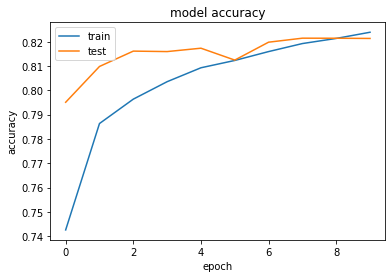

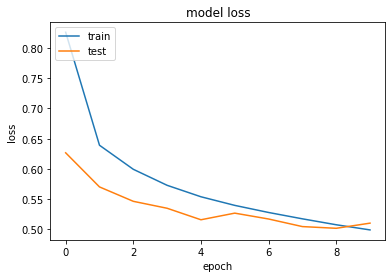

In [32]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


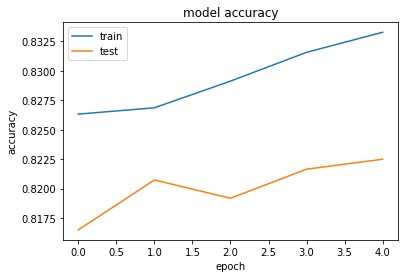

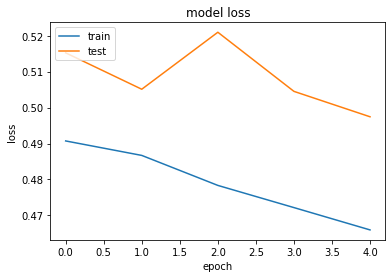

In [36]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


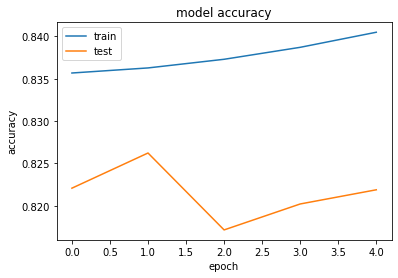

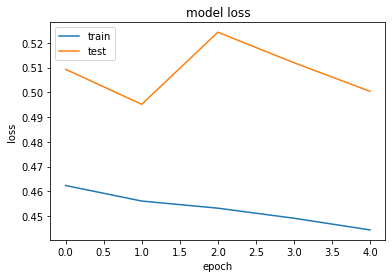

In [39]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


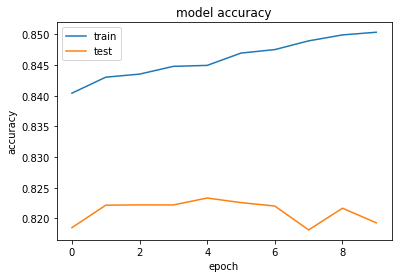

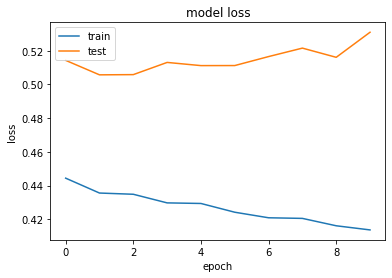

In [41]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# modelcnn = Sequential()
# modelcnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
# modelcnn.add(Conv1D(128, 3, activation='relu'))
# modelcnn.add(GlobalMaxPooling1D())
# modelcnn.add(Flatten())
# modelcnn.add(Dense(128, activation='relu'))
# modelcnn.add(Dropout(0.3))
# modelcnn.add(Dense(13, activation='softmax'))
# modelcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), class_weight=class_weight_dict, epochs=10, batch_size=100)

Epoch 1/10
2937/2937 [==============================] - 350s 119ms/step - loss: 0.5142 - accuracy: 0.7744 - val_loss: 0.6682 - val_accuracy: 0.7710
Epoch 2/10
2937/2937 [==============================] - 371s 126ms/step - loss: 0.4949 - accuracy: 0.7797 - val_loss: 0.6193 - val_accuracy: 0.7831
Epoch 3/10
2937/2937 [==============================] - 369s 126ms/step - loss: 0.4815 - accuracy: 0.7822 - val_loss: 0.6032 - val_accuracy: 0.7927
Epoch 4/10
2937/2937 [==============================] - 371s 126ms/step - loss: 0.4693 - accuracy: 0.7863 - val_loss: 0.5604 - val_accuracy: 0.8088
Epoch 5/10
2937/2937 [==============================] - 368s 125ms/step - loss: 0.4597 - accuracy: 0.7887 - val_loss: 0.5964 - val_accuracy: 0.7991
Epoch 6/10
2937/2937 [==============================] - 357s 122ms/step - loss: 0.4453 - accuracy: 0.7926 - val_loss: 0.5873 - val_accuracy: 0.8018
Epoch 7/10
2937/2937 [==============================] - 355s 121ms/step - loss: 0.4413 - accuracy: 0.7933 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


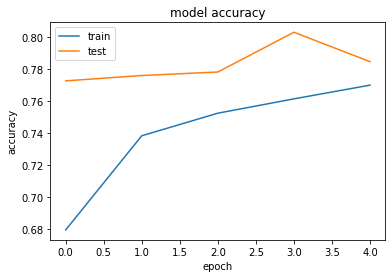

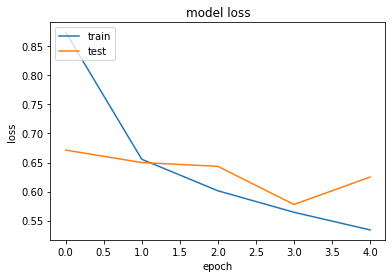

In [18]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history = modelcnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), class_weight=class_weight_dict, epochs=5, batch_size=100)

In [16]:
predcnn=np.argmax(modelcnn.predict(X_test_seq), axis=-1)

In [17]:
print(metrics.accuracy_score(Y_test, predcnn))
print(metrics.f1_score(Y_test, predcnn, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, predcnn))
print('\nClassification Report\n')
print(classification_report(Y_test, predcnn, target_names=unique_topics))

0.784517517572059
0.7907119295029115
0.760046355252641

Classification Report



NameError: name 'unique_topics' is not defined

In [7]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
    
def create_model(num_filters, dense_size):
    model = Sequential()
    model.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
    model.add(Conv1D(num_filters, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    model.add(Dense(dense_size, activation='relu'))
    model.add(Dense(13, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
    return model

params = dict(num_filters=[500, 512, 1024, 1500, 1500, 2048], dense_size=[500, 512, 1024, 1500, 2048])
model = KerasClassifier(build_fn=create_model,
                            epochs=5, batch_size=128,
                            verbose=2)
grid = GridSearchCV(estimator=model, param_grid=params,
                              cv=2, verbose=2)
grid_result = grid.fit(X_train_seq, Y_train)
test_accuracy = grid.score(X_test_seq, Y_test)
print(test_accuracy)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Epoch 1/5
2295/2295 - 66s - loss: 0.5578 - accuracy: 0.8069
Epoch 2/5
2295/2295 - 60s - loss: 0.4072 - accuracy: 0.8534
Epoch 3/5
2295/2295 - 60s - loss: 0.3359 - accuracy: 0.8784
Epoch 4/5
2295/2295 - 60s - loss: 0.2719 - accuracy: 0.9023
Epoch 5/5
2295/2295 - 61s - loss: 0.2115 - accuracy: 0.9246
2295/2295 - 26s - loss: 0.4887 - accuracy: 0.8418
[CV] END ....................dense_size=500, num_filters=500; total time= 5.6min
Epoch 1/5
2295/2295 - 61s - loss: 0.5613 - accuracy: 0.8068
Epoch 2/5
2295/2295 - 61s - loss: 0.4109 - accuracy: 0.8526
Epoch 3/5
2295/2295 - 61s - loss: 0.3395 - accuracy: 0.8777
Epoch 4/5
2295/2295 - 61s - loss: 0.2738 - accuracy: 0.9015
Epoch 5/5
2295/2295 - 61s - loss: 0.2135 - accuracy: 0.9241
2295/2295 - 26s - loss: 0.5036 - accuracy: 0.8383
[CV] END ....................dense_size=500, num_filters=500; total time= 5.5min
Epoch 1/5
2295/2295 - 75s - loss: 0.5578 - accuracy: 0.8074
Epoch 2/5
2295/22

KeyboardInterrupt: 

## Подбор параметров

In [5]:
train_vecs_w2v=np.load('train_vecs_w2v_300_alldata_notfidf.npy')
test_vecs_w2v=np.load('test_vecs_w2v_300_alldata_notfidf.npy')
Y_train=np.load('Y_train_mlp_all_notfidf.npy')
Y_test=np.load('Y_test_mlp_all_notfidf.npy')

In [5]:
from kerastuner.tuners import RandomSearch, Hyperband

In [6]:
def build_model(hp):
    model = Sequential()
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])    
    model.add(Dense(units=hp.Int('units_input',    # Полносвязный слой с разным количеством нейронов
                                   min_value=512,    # минимальное количество нейронов - 128
                                   max_value=2048,   # максимальное количество - 1024
                                   step=64),
                    input_dim=300,
                    activation=activation_choice))
    model.add(Dropout(rate=hp.Float('dropout1',
                    min_value=0.0,
                    max_value=0.5,
                    step=0.1
                )))
#     model.add(Dense(units=hp.Int('units_hidden',        
#                                    min_value=128,   
#                                    max_value=1024,   
#                                    step=64),
#                     activation=activation_choice))
#     dropout_choice2 = hp.Choice('dropout2', values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.0])    
#     model.add(Dropout(dropout_choice2))
    for i in range(hp.Int('layers', 1, 2)):
        model.add(Dense(
            units=hp.Int('units_' + str(i), 64, 1024, step=64),
            activation=hp.Choice('activation_' + str(i), values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])))
        model.add(Dropout(hp.Choice('dropout_' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.0])))
    model.add(Dense(13, activation=hp.Choice('activation3', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'Adamax', 'Adagrad','SGD']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [7]:
tuner4 = RandomSearch(
    build_model,                 # функция создания модели
    objective='val_accuracy',    # метрика, которую нужно оптимизировать - 
                                 # доля правильных ответов на проверочном наборе данных
    max_trials=1000,               # максимальное количество запусков обучения 
    seed=10,
    directory='test3_directory'   # каталог, куда сохраняются обученные сети  
    )

In [8]:
tuner4.search_space_summary()

Search space summary
Default search space size: 9
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 2048, 'step': 64, 'sampling': None}
dropout1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 1024, 'step': 64, 'sampling': None}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
dropout_0 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5, 0.0], 'ordered': True}
activation3 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu

In [ ]:
tuner4.search(train_vecs_w2v, Y_train, epochs=10, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test), class_weight=class_weight_dict)

Trial 170 Complete [00h 03m 28s]
val_accuracy: 0.026685010641813278

Best val_accuracy So Far: 0.8167465925216675
Total elapsed time: 09h 35m 45s

Search: Running Trial #171

Hyperparameter    |Value             |Best Value So Far 
activation        |relu              |relu              
units_input       |1920              |1280              
dropout1          |0.3               |0                 
layers            |2                 |2                 
units_0           |320               |128               
activation_0      |selu              |relu              
dropout_0         |0.5               |0.2               
activation3       |sigmoid           |sigmoid           
optimizer         |Adagrad           |adam              
units_1           |320               |320               
activation_1      |sigmoid           |tanh              
dropout_1         |0.2               |0.5               

Epoch 1/10
5873/5873 [==============================] - 20s 3ms/step - loss: 1.9462

In [24]:
tuner.search(train_vecs_w2v, Y_train, epochs=5, batch_size=100,
                   validation_data=(test_vecs_w2v, Y_test), class_weight=class_weight_dict)

Trial 10 Complete [00h 01m 36s]
val_accuracy: 0.790892481803894

Best val_accuracy So Far: 0.7936645150184631
Total elapsed time: 00h 17m 56s
INFO:tensorflow:Oracle triggered exit


In [27]:
models = tuner.get_best_models(num_models=2)

In [34]:
tuner.results_summary()

Results summary
Results in test_directory\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
activation: elu
units_input: 640
units_hidden: 352
optimizer: Adamax
Score: 0.7936645150184631
Trial summary
Hyperparameters:
activation: selu
units_input: 864
units_hidden: 384
optimizer: Adamax
Score: 0.7909878492355347
Trial summary
Hyperparameters:
activation: sigmoid
units_input: 736
units_hidden: 288
optimizer: adam
Score: 0.790892481803894
Trial summary
Hyperparameters:
activation: sigmoid
units_input: 576
units_hidden: 160
optimizer: adam
Score: 0.789530336856842
Trial summary
Hyperparameters:
activation: selu
units_input: 736
units_hidden: 256
optimizer: adam
Score: 0.785150945186615
Trial summary
Hyperparameters:
activation: selu
units_input: 608
units_hidden: 160
optimizer: rmsprop
Score: 0.7841088771820068
Trial summary
Hyperparameters:
activation: sigmoid
units_input: 800
units_hidden: 288
optimizer: rmsprop
Score:

In [29]:
for model in models:
    model.evaluate(test_vecs_w2v, Y_test)
    print() 

4589/4589 [==============================] - 7s 1ms/step - loss: 0.5735 - accuracy: 0.7941

4589/4589 [==============================] - 7s 1ms/step - loss: 0.5783 - accuracy: 0.7917



## LSTM

In [2]:
data = pd.read_csv('news_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})
topics=np.fromfile('topics_bigr',  dtype = np.int)
class_label = pickle.load(open("lbl_bigr.pkl", 'rb'))
unique_topics=np.unique(class_label.inverse_transform(topics)).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(data.tokens.values, topics, stratify=topics,
                                                         test_size=0.2, random_state=10, shuffle=True)

In [3]:
X_train_str=[]
for l in X_train:
    text=' '.join(l)
    X_train_str.append(text)
X_test_str=[]
for l in X_test:
    text=' '.join(l)
    X_test_str.append(text)

In [17]:
all_train_words = [word for tokens in X_train for word in tokens]
TRAIN_VOCAB = sorted(list(set(all_train_words)))

In [74]:
modelw2v=gensim.models.Word2Vec.load('modelw2v_unigr')

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

text_length = 500
vocab_size=20000

def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=text_length)

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
# vocab_size = len(tokenizer.word_index) + 1

In [7]:
vocab_size

20000

In [77]:
wv_size = modelw2v.vector_size
embedding_matrix = np.zeros((vocab_size, wv_size))

for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]

In [78]:
embedding_matrix.shape

(23126, 300)

In [8]:
#np.save('embedding_matrix.npy', embedding_matrix)
np.save('X_train_seq_20000.npy', X_train_seq)
np.save('X_test_seq_20000.npy', X_test_seq)
np.save('Y_train_20000.npy', Y_train)
np.save('Y_test_20000.npy', Y_test)

In [3]:
#359k
#embedding_matrix=np.load('embedding_matrix.npy')
X_train_seq=np.load('X_train_seq_20000.npy')
X_test_seq=np.load('X_test_seq_20000.npy')
Y_train=np.load('Y_train_20000.npy')
Y_test=np.load('Y_test_20000.npy')

In [4]:
vocab_size=20000
wv_size=300
text_length=500

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [5]:
from tensorflow.keras.layers import LSTM, GRU

modellstm = Sequential()
modellstm.add(Embedding(vocab_size, 300, input_length=text_length))
modellstm.add(LSTM(16))
modellstm.add(Dense(13, activation='softmax'))
modellstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = modellstm.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=3, batch_size=100)

Epoch 1/3
2937/2937 [==============================] - 755s 256ms/step - loss: 1.3896 - accuracy: 0.5817 - val_loss: 0.7855 - val_accuracy: 0.7720
Epoch 2/3
2937/2937 [==============================] - 749s 255ms/step - loss: 0.6789 - accuracy: 0.7999 - val_loss: 0.5730 - val_accuracy: 0.8180
Epoch 3/3
2937/2937 [==============================] - 761s 259ms/step - loss: 0.4605 - accuracy: 0.8523 - val_loss: 0.5120 - val_accuracy: 0.8337


In [9]:
history = modellstm.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=3, batch_size=100)

Epoch 1/3
2937/2937 [==============================] - 756s 257ms/step - loss: 0.3570 - accuracy: 0.8817 - val_loss: 0.5060 - val_accuracy: 0.8390
Epoch 2/3
2937/2937 [==============================] - 769s 262ms/step - loss: 0.2772 - accuracy: 0.9072 - val_loss: 0.5409 - val_accuracy: 0.8340
Epoch 3/3
2937/2937 [==============================] - 782s 266ms/step - loss: 0.2104 - accuracy: 0.9305 - val_loss: 0.6059 - val_accuracy: 0.8272


In [8]:
scores = modellstm.evaluate(X_test_seq, Y_test, verbose=1)

2295/2295 [==============================] - 67s 29ms/step - loss: 0.5120 - accuracy: 0.8337


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


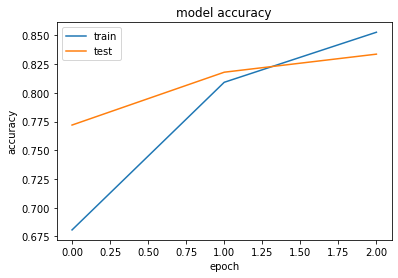

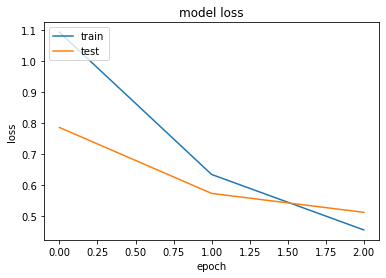

In [7]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
scores = modellstm.evaluate(X_test_seq, Y_test, verbose=1)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


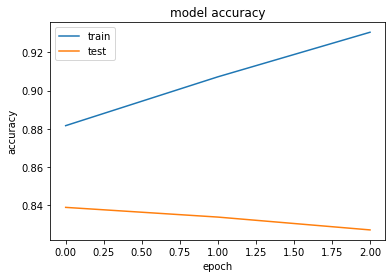

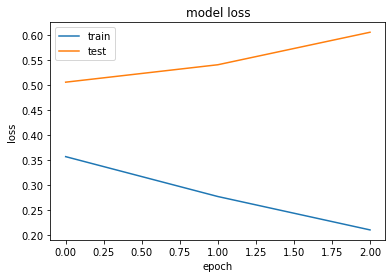

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## GRU

In [3]:
embedding_matrix=np.load('embedding_matrix_cnn_all_300_300.npy')
X_train_seq=np.load('X_train_seq_cnn_all_300_300.npy')
X_test_seq=np.load('X_test_seq_cnn_all_300_300.npy')
Y_train=np.load('Y_train_cnn_all_300_300.npy')
Y_test=np.load('Y_test_cnn_all_300_300.npy')

In [5]:
vocab_size=290746
wv_size=300
text_length=300

In [9]:
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
model.add(GRU(32))
model.add(Dense(13, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=3, batch_size=100)

Epoch 1/3
5873/5873 [==============================] - 686s 117ms/step - loss: 0.8847 - accuracy: 0.7150 - val_loss: 0.4831 - val_accuracy: 0.8276
Epoch 2/3
5873/5873 [==============================] - 706s 120ms/step - loss: 0.4727 - accuracy: 0.8318 - val_loss: 0.4583 - val_accuracy: 0.8358
Epoch 3/3
5873/5873 [==============================] - 717s 122ms/step - loss: 0.4475 - accuracy: 0.8387 - val_loss: 0.4505 - val_accuracy: 0.8384


## Простая сеть с Embedding

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

def dummy_fun(doc):
    return doc

data = pd.read_csv('news_all_norm_tokens_rd.csv', converters={'tokens':ast.literal_eval})
lbl = LabelEncoder()
lbl.fit(data.topic.values)
topics=lbl.transform(data.topic.values)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
splits=[]
for train_index, test_index in sss.split(data.tokens.values, data.topic.values):
    splits.append((train_index, test_index))
X_train, X_test = data.tokens.values[splits[0][0]], data.tokens.values[splits[0][1]]
Y_train, Y_test = topics[splits[0][0]], topics[splits[0][1]]
modelw2v = gensim.models.Word2Vec.load('modelw2v_unigr_all_best.w2v')

In [3]:
X_train_str=[]
for l in X_train:
    text=' '.join(l)
    X_train_str.append(text)
X_test_str=[]
for l in X_test:
    text=' '.join(l)
    X_test_str.append(text)

In [14]:
len(modelw2v.wv.vocab)

33851

In [36]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

text_length = 300
vocab_size=500000

def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=text_length)

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
wv_size = 300
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    elif i > vocab_size:
            continue

In [43]:
modelnn = Sequential()
modelnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelnn.add(Flatten())
modelnn.add(Dense(1024, activation='relu'))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=text_length)

vocab_size=50000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
wv_size = 300
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    elif i > vocab_size:
        continue
modelnn = Sequential()
modelnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelnn.add(Flatten())
modelnn.add(Dense(1024, activation='relu'))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(50000)
history = modelnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=10, batch_size=128)


50000
Epoch 1/10
4589/4589 [==============================] - 133s 29ms/step - loss: 1.0967 - accuracy: 0.6707 - val_loss: 0.6087 - val_accuracy: 0.8042
Epoch 2/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.6762 - accuracy: 0.7898 - val_loss: 0.5704 - val_accuracy: 0.8090
Epoch 3/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.5892 - accuracy: 0.8120 - val_loss: 0.5561 - val_accuracy: 0.8112
Epoch 4/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.5293 - accuracy: 0.8272 - val_loss: 0.5485 - val_accuracy: 0.8123
Epoch 5/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.4822 - accuracy: 0.8396 - val_loss: 0.5623 - val_accuracy: 0.8125
Epoch 6/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.4470 - accuracy: 0.8507 - val_loss: 0.5619 - val_accuracy: 0.8143
Epoch 7/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.4097 - accuracy: 0.8623 - val_l

IndexError: index 33858 is out of bounds for axis 0 with size 33851

In [48]:
vocab_size=len(modelw2v.wv.vocab)
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
wv_size = 300
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if i > vocab_size:
        continue
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    else:
        continue
modelnn = Sequential()
modelnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelnn.add(Flatten())
modelnn.add(Dense(1024, activation='relu'))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(len(modelw2v.wv.vocab))
history = modelnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=10, batch_size=128)
vocab_size=50000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
wv_size = 300
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if i > vocab_size:
        continue
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    else:
        continue
modelnn = Sequential()
modelnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelnn.add(Flatten())
modelnn.add(Dense(1024, activation='relu'))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(50000)
history = modelnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=10, batch_size=128)
vocab_size=100000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
wv_size = 300
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if i > vocab_size:
        continue
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    else:
        continue
modelnn = Sequential()
modelnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelnn.add(Flatten())
modelnn.add(Dense(1024, activation='relu'))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(100000)
history = modelnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=10, batch_size=128)
vocab_size=200000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
wv_size = 300
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if i > vocab_size:
        continue
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    else:
        continue
modelnn = Sequential()
modelnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelnn.add(Flatten())
modelnn.add(Dense(1024, activation='relu'))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(200000)
history = modelnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=10, batch_size=128)
vocab_size=800000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_str)
X_train_seq = get_sequences(tokenizer, X_train_str)
X_test_seq = get_sequences(tokenizer, X_test_str)
wv_size = 300
embedding_matrix = np.zeros((vocab_size, wv_size))
for word, i in tokenizer.word_index.items():
    if i > vocab_size:
        continue
    if word in modelw2v.wv.vocab.keys():
        embedding_matrix[i] = modelw2v.wv[word]
    else:
        continue
modelnn = Sequential()
modelnn.add(Embedding(vocab_size, wv_size, input_length=text_length, weights=[embedding_matrix], trainable=False))
modelnn.add(Flatten())
modelnn.add(Dense(1024, activation='relu'))
modelnn.add(Dropout(0.7))
modelnn.add(Dense(512, activation='relu'))
modelnn.add(Dropout(0.5))
modelnn.add(Dense(128, activation='relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(13, activation='softmax'))
modelnn.compile(optimizer='Adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(800000)
history = modelnn.fit(X_train_seq, Y_train, validation_data=(X_test_seq, Y_test), epochs=10, batch_size=128)

33851
Epoch 1/10
4589/4589 [==============================] - 135s 29ms/step - loss: 1.0869 - accuracy: 0.6727 - val_loss: 0.6113 - val_accuracy: 0.8031
Epoch 2/10
4589/4589 [==============================] - 133s 29ms/step - loss: 0.6747 - accuracy: 0.7892 - val_loss: 0.5705 - val_accuracy: 0.8090
Epoch 3/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.5879 - accuracy: 0.8116 - val_loss: 0.5510 - val_accuracy: 0.8116
Epoch 4/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.5298 - accuracy: 0.8267 - val_loss: 0.5486 - val_accuracy: 0.8128
Epoch 5/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.4812 - accuracy: 0.8405 - val_loss: 0.5519 - val_accuracy: 0.8152
Epoch 6/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.4418 - accuracy: 0.8521 - val_loss: 0.5610 - val_accuracy: 0.8147
Epoch 7/10
4589/4589 [==============================] - 132s 29ms/step - loss: 0.4073 - accuracy: 0.8631 - val_l

## Стекинг

In [ ]:
from mlens.ensemble import SuperLearner

modelsvm = svm.LinearSVC(class_weight='balanced',  tol=0.01, dual=False, C=1)
modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced', multi_class='ovr', C=10, n_jobs=-1,verbose=2)
modelsgd = SGDClassifier(loss='modified_huber', class_weight='balanced', n_jobs=-1, alpha=0.000015, random_state=15)
ensemble = SuperLearner(scorer=metrics.accuracy_score, random_state=50, verbose=2)
ensemble.add([modelsvm, modelsgd])
ensemble.add_meta(svm.SVC())
ensemble.fit(vectors_tfidf, Y_train)


Fitting 2 layers
Processing layer-1             done | 00:03:03
Processing layer-2             

In [14]:
preds = ensemble.predict(vectors_tfidf_test)


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


In [15]:
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.6021835667193375
0.5087322121779727
0.553843825977075


In [18]:
ensemble.data

                          score-m  score-s    ft-m  ft-s  pt-m  pt-s
layer-1  linearsvc           0.85     0.00  109.99  1.03  0.54  0.07
layer-1  sgdclassifier       0.85     0.00   19.98  0.65  1.62  0.07

## Градиентный бустинг

In [ ]:
preds = modelgbc.predict(vectors_tfidf_test)
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

In [ ]:
import xgboost as xgb 

dtrain = xgb.DMatrix(vectors_tfidf, label=Y_train)
dtest = xgb.DMatrix(vectors_tfidf_test, label=Y_test)
param = {
    'max_depth': 100,
    'verbosity':2,
    'nthread':-1, 
   'objective': 'multi:softmax',
   'num_class': 13}
num_round = 20
modelxgb = xgb.train(param, dtrain, num_round)

In [21]:
preds = modelxgb.predict(dtest)

In [18]:
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.7716040974227647
0.7666185683176044
0.7370333185972825


In [22]:
#max_death=10
print(metrics.accuracy_score(Y_test, preds))
print(metrics.f1_score(Y_test, preds, average='weighted'))
print(metrics.matthews_corrcoef(Y_test, preds))

0.7940799869231189
0.7901739058997461
0.7632494104441472


## Результаты

In [44]:
prtable_first = PrettyTable()
prtable_first.field_names = ["Типы токенов", "Токенизация", "Лемматизация", "Стемминг", "Векторизация",
                            "Алгоритм обучения", "Accuracy", "Weighted Average F-measure"]

In [45]:
prtable_first.add_rows(
    [
        ["Униграммы", "Razdel", "PyMorphy2", "-", "TF-IDF", "MultinominalNB", "0.7879", "0.7821"],
        ["Униграммы", "Razdel","PyMorphy2", "-", "TF-IDF", "LogisticRegression", "0.8388", "0.8395"],
        ["Униграммы", "Razdel","PyMorphy2", "-", "TF-IDF + SVD", "GaussianNB", "0.6211", "0.6467"],
        ["Униграммы", "Razdel", "PyMorphy2","-", "TF-IDF + SVD", "LogisticRegression", "0.7718", "0.7758"],
        
        ["Униграммы", "Razdel", "-", "Showball", "TF-IDF", "MultinominalNB", "0.7873", "0.7813"],
        ["Униграммы", "Razdel","-", "Showball", "TF-IDF", "LogisticRegression", "0.8362", "0.8370"],
        ["Униграммы", "Razdel","-", "Showball", "TF-IDF + SVD", "GaussianNB", "0.6234", "0.6485"],
        ["Униграммы", "Razdel", "-", "Showball", "TF-IDF + SVD", "LogisticRegression", "0.7701", "0.7741"],
        
        ["Униграммы", "NLTK", "PyMorphy2","-", "TF-IDF", "MultinominalNB", "0.7856", "0.7795"],
        ["Униграммы", "NLTK","PyMorphy2", "-", "TF-IDF", "LogisticRegression", "0.8360", "0.8369"],
        ["Униграммы", "NLTK", "PyMorphy2","-", "TF-IDF + SVD", "GaussianNB","0.6191", "0.6453" ],
        ["Униграммы", "NLTK", "PyMorphy2","-", "TF-IDF + SVD", "LogisticRegression", "0.7682", "0.7724"],
        
        ["Униграммы", "NLTK",  "-", "Showball", "TF-IDF", "MultinominalNB", "0.7852", "0.7788"],
        ["Униграммы", "NLTK", "-", "Showball", "TF-IDF", "LogisticRegression", "0.8329", "0.8338"],
        ["Униграммы", "NLTK",  "-", "Showball", "TF-IDF + SVD", "GaussianNB","0.6210", "0.6465" ],
        ["Униграммы", "NLTK",  "-", "Showball", "TF-IDF + SVD", "LogisticRegression", "0.7684", "0.7724"],

    ]
)

In [48]:
from prettytable import MSWORD_FRIENDLY

prtable_first.set_style(MSWORD_FRIENDLY)
table1 = prtable_first.get_string()
with open('table1.txt', 'w') as f:
    f.write(table1)

In [24]:
# first_res = prtable_first.get_string()
# with open('test.txt', 'w') as f:
#     f.write(first_res)
print(prtable_first.get_string(sortby="Accuracy", reversesort=True))

+--------------+-------------+--------------+----------+--------------+--------------------+----------+----------------------------+
| Типы токенов | Токенизация | Лемматизация | Стемминг | Векторизация | Алгоритм обучения  | Accuracy | Weighted Average F-measure |
+--------------+-------------+--------------+----------+--------------+--------------------+----------+----------------------------+
|  Униграммы   |    Razdel   |  PyMorphy2   |    -     |    TF-IDF    | LogisticRegression |  0.8388  |           0.8395           |
|  Униграммы   |    Razdel   |      -       | Showball |    TF-IDF    | LogisticRegression |  0.8362  |           0.8370           |
|  Униграммы   |     NLTK    |  PyMorphy2   |    -     |    TF-IDF    | LogisticRegression |  0.8360  |           0.8369           |
|  Униграммы   |     NLTK    |      -       | Showball |    TF-IDF    | LogisticRegression |  0.8329  |           0.8338           |
|  Униграммы   |    Razdel   |  PyMorphy2   |    -     |    TF-IDF   

In [9]:
prtable_first_bigr = PrettyTable()
prtable_first_bigr.field_names = ["Типы токенов", "Токенизация", "Лемматизация", "Стемминг", "Векторизация",
                            "Алгоритм обучения", "Accuracy", "Weighted Average F-measure"]
prtable_first_bigr.add_rows(
    [
        ["Униграммы+Биграммы", "Razdel", "PyMorphy2", "-", "TF-IDF", "MultinominalNB", "0.7911", "0.7837"],
        ["Униграммы+Биграммы", "Razdel","PyMorphy2", "-", "TF-IDF", "LogisticRegression", "0.8512", "0.8514"],
        ["Униграммы+Биграммы", "Razdel","PyMorphy2", "-", "TF-IDF + SVD", "GaussianNB", "0.6372", "0.5980"],
        ["Униграммы+Биграммы", "Razdel", "PyMorphy2","-", "TF-IDF + SVD", "LogisticRegression", "0.7772", "0.7809"],
        
        ["Униграммы+Биграммы", "Razdel", "-", "Showball", "TF-IDF", "MultinominalNB", "0.7886", "0.7808"],
        ["Униграммы+Биграммы", "Razdel","-", "Showball", "TF-IDF", "LogisticRegression", "0.8471", "0.8473"],
        ["Униграммы+Биграммы", "Razdel","-", "Showball", "TF-IDF + SVD", "GaussianNB", "0.6328", "0.6328"],
        ["Униграммы+Биграммы", "Razdel", "-", "Showball", "TF-IDF + SVD", "LogisticRegression", "0.7731", "0.7769"],
        
        ["Униграммы+Биграммы", "NLTK", "PyMorphy2","-", "TF-IDF", "MultinominalNB", "0.7891", "0.7814"],
        ["Униграммы+Биграммы", "NLTK","PyMorphy2", "-", "TF-IDF", "LogisticRegression", "0.8489", "0.8491"],
        ["Униграммы+Биграммы", "NLTK", "PyMorphy2","-", "TF-IDF + SVD", "GaussianNB", "0.6330", "0.6569"],
        ["Униграммы+Биграммы", "NLTK", "PyMorphy2","-", "TF-IDF + SVD", "LogisticRegression", "0.7750", "0.7787"],
        
        ["Униграммы+Биграммы", "NLTK",  "-", "Showball", "TF-IDF", "MultinominalNB", "0.7886", "0.7808"],
        ["Униграммы+Биграммы", "NLTK", "-", "Showball", "TF-IDF", "LogisticRegression", "0.8471", "0.8473"],
        ["Униграммы+Биграммы", "NLTK",  "-", "Showball", "TF-IDF + SVD", "GaussianNB","0.6334", "0.6579" ],
        ["Униграммы+Биграммы", "NLTK",  "-", "Showball", "TF-IDF + SVD", "LogisticRegression", "0.7735", "0.7774"],

    ]
)

In [51]:
from prettytable import MSWORD_FRIENDLY

prtable_first_bigr.set_style(MSWORD_FRIENDLY)
table2 = prtable_first_bigr.get_string()
with open('table2.txt', 'w') as f:
    f.write(table2)

In [18]:
print(prtable_first_bigr.get_string(sortby="Accuracy", reversesort=True))

+--------------------+-------------+--------------+----------+--------------+--------------------+----------+----------------------------+
|    Типы токенов    | Токенизация | Лемматизация | Стемминг | Векторизация | Алгоритм обучения  | Accuracy | Weighted Average F-measure |
+--------------------+-------------+--------------+----------+--------------+--------------------+----------+----------------------------+
| Униграммы+Биграммы |    Razdel   |  PyMorphy2   |    -     |    TF-IDF    | LogisticRegression |  0.8512  |           0.8514           |
| Униграммы+Биграммы |     NLTK    |  PyMorphy2   |    -     |    TF-IDF    | LogisticRegression |  0.8489  |           0.8491           |
| Униграммы+Биграммы |    Razdel   |      -       | Showball |    TF-IDF    | LogisticRegression |  0.8471  |           0.8473           |
| Униграммы+Биграммы |     NLTK    |      -       | Showball |    TF-IDF    | LogisticRegression |  0.8471  |           0.8473           |
| Униграммы+Биграммы |    R

In [12]:
#Два последних и три ann
prtable_third = PrettyTable()
prtable_third.field_names = ["Алгоритм обучения", "Типы токенов", "Векторизация", "Accuracy", "Weighted Average F-measure"]
prtable_third.add_rows(
    [
        ["LogisticRegression","Униграммы", "TF-IDF", "0.8564", "0.8566"],
        ["LogisticRegression", "Униграммы+Биграммы", "TF-IDF", "0.8743", "0.8741"],
        ["LogisticRegression","Униграммы", "Word2Vec", "0.8014", "0.8043"],
        ["LogisticRegression","Униграммы+Биграммы", "Word2Vec",  "0.8011", "0.8023"],        
        ["LogisticRegression", "Униграммы", "Word2Vec*TF-IDF", "0.7990", "0.8018"],
        ["LogisticRegression", "Униграммы+Биграммы", "Word2Vec*TF-IDF",  "0.7898", "0.7865"],
        
        ["LinearSVC","Униграммы", "TF-IDF", "0.8550", "0.8554"],
        ["LinearSVC", "Униграммы+Биграммы", "TF-IDF", "0.8667", "0.8666"],
        ["LinearSVC","Униграммы", "Word2Vec","0.8076", "0.8094"],
        ["LinearSVC","Униграммы+Биграммы", "Word2Vec",  "0.8095", "0.8115"],        
        ["LinearSVC", "Униграммы", "Word2Vec*TF-IDF", "0.8041", "0.8060"],
        ["LinearSVC", "Униграммы+Биграммы", "Word2Vec*TF-IDF",  "0.8058", "0.8078"],
        
        ["ANN","Униграммы", "TF-IDF", "0.8701", "0.8695"],
        ["ANN", "Униграммы+Биграммы", "TF-IDF", "0.8730", "0.8734"],
        ["ANN","Униграммы", "Word2Vec","0.8541", "0.8577"],
        ["ANN","Униграммы+Биграммы", "Word2Vec",  "0.8544", "0.8541"],        
        ["ANN", "Униграммы", "Word2Vec*TF-IDF", "0.8500", "0.8473"],
        ["ANN", "Униграммы+Биграммы", "Word2Vec*TF-IDF",  "0.8506", "0.8508"],
    ]
)

In [13]:
print(prtable_third.get_string(sortby="Accuracy", reversesort=True))

+--------------------+--------------------+-----------------+----------+----------------------------+
| Алгоритм обучения  |    Типы токенов    |   Векторизация  | Accuracy | Weighted Average F-measure |
+--------------------+--------------------+-----------------+----------+----------------------------+
| LogisticRegression | Униграммы+Биграммы |      TF-IDF     |  0.8743  |           0.8741           |
|        ANN         | Униграммы+Биграммы |      TF-IDF     |  0.8730  |           0.8734           |
|        ANN         |     Униграммы      |      TF-IDF     |  0.8701  |           0.8695           |
|     LinearSVC      | Униграммы+Биграммы |      TF-IDF     |  0.8667  |           0.8666           |
| LogisticRegression |     Униграммы      |      TF-IDF     |  0.8564  |           0.8566           |
|     LinearSVC      |     Униграммы      |      TF-IDF     |  0.8550  |           0.8554           |
|        ANN         | Униграммы+Биграммы |     Word2Vec    |  0.8544  |          

In [14]:
prtable_final = PrettyTable()
prtable_final.field_names = ["Алгоритм обучения", "Accuracy", "Weighted Average F-measure"]
prtable_final.title = 'Два лучших алгоритма после добавления данных и кросс-валидации'
prtable_final.add_rows(
    [
        ["LogisticRegression", "0.8761", "0.8758"],      
        ["ANN", "0.8787", "0.8783"]
    ]
)

In [15]:
print(prtable_final.get_string(sortby="Accuracy", reversesort=True))

+------------------------------------------------------------------+
|  Два лучших алгоритма после добавления данных и кросс-валидации  |
+----------------------+-----------+-------------------------------+
|  Алгоритм обучения   |  Accuracy |   Weighted Average F-measure  |
+----------------------+-----------+-------------------------------+
|         ANN          |   0.8787  |             0.8783            |
|  LogisticRegression  |   0.8761  |             0.8758            |
+----------------------+-----------+-------------------------------+
